In [2]:
import time
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy as sc
from Bio.PDB.DSSP import DSSP
from Bio.PDB.DSSP import make_dssp_dict
from Bio.PDB.PDBParser import PDBParser
import os, sys
parser = PDBParser(PERMISSIVE=1)
from tqdm.notebook import tqdm
import seaborn as sns

# Preprocess pdb files

In [9]:
start_time = time.time()

project_path = "/home/ilya/Desktop/Structural_bioinf_project/"
db_path = project_path + "ent_dir/"
db_list = os.listdir(path=db_path)
wrongs_list = []
for db_ent in tqdm(db_list):
    try:
        db_address = db_path + db_ent
        # print(db_address)
        dssp_address = '"' + db_address + '"'
        idprot = db_ent.split('.')
        protname = idprot[0].split('pdb')
        # print(idprot)
        rows = []
        structure_id = idprot[0]
        print(structure_id)
        # print(structure_id)
        filename = db_ent
        structure = parser.get_structure(structure_id, db_address)
        name = structure.header["name"]
        missing = structure.header["has_missing_residues"]
        engin = structure.header["compound"]['1']  # info about engineering
        engi = engin.get('engineered')
        resolution = structure.header["resolution"]
        strmethod = structure.header["structure_method"]
        addinfo = (structure_id, name, missing, resolution, engi, strmethod)
        model = structure[0]

        dssps, keys = make_dssp_dict("/home/ilya/Desktop/Structural_bioinf_project/dssp_dir/" + protname[1] + '.dssp')

        model.atom_to_internal_coordinates()
        for r in model.get_residues():
            if r.internal_coord:
                    aaname = r.get_resname()
                    psi = r.internal_coord.get_angle("psi")
                    phi = r.internal_coord.get_angle("phi")
                    omega = r.internal_coord.get_angle("omega")  # or "omg"
                    chi2 = r.internal_coord.get_angle("chi2")
                    tau = r.internal_coord.get_angle("tau")
                    BAC_angle = r.internal_coord.get_angle("CB:CA:C")
                    fullid = list(r.get_full_id())
                    # print(fullid)
                    res_id = list(fullid[3])
                    chainid = fullid[2]
                    residloc = res_id[1]
                    neibid = residloc - 1
                    # print(neibid)
                    # print(chainid, residloc)
                    if structure[0][chainid][residloc].has_id('CA'):
                        CAh = structure[0][chainid][residloc]["CA"]
                    if structure[0][chainid][residloc].has_id('N'):
                        Nh = structure[0][chainid][residloc]["N"]
                    if structure[0][chainid][residloc].has_id('C'):
                        Ch = structure[0][chainid][residloc]["C"]
                    chaini = model[chainid]
                    # print(chaini.has_id(neibid))
                    Cprev = 0
                    if chaini.has_id(neibid):
                        if structure[0][chainid][neibid].has_id('C'):
                            Cprev = structure[0][chainid][neibid]["C"]

                    if aaname != 'GLY':
                        # print(r.get_resname)
                        bondNCA = r.internal_coord.get_length("N:CA")
                        bondCAC = r.internal_coord.get_length("CA:C")
                        bondCACB = r.internal_coord.get_length("CA:CB")
                        # protbond = r.internal_coord.get_length("-1C:0N")  # i-1 to i peptide bond
                                        # if r.internal_coord.rprev else "None")
                    else:
                        # print('no')
                        bondNCA = Nh - CAh
                        bondCAC = CAh - Ch
                        bondCACB = 'Nan'
                    if chaini.has_id(neibid) & (Cprev != 0):
                        protbond = Cprev - Nh
                        # print(protbond)
                    else:
                        protbond = 'Nan'
                        # bondCACB = r.internal_coord.get_length("CA:CB")
                    sec_struct = dssps[(chainid,fullid[3])][1]
                    # sec_struct = 0
                    rows.append({'residue': aaname, 'position': residloc, 'Chain': chainid, 'secondary': sec_struct, 
                                 'psi': psi, 'phi': phi, 'omega': omega,
                                 'chi2': chi2, 'BAC_angle': BAC_angle, 'tau': tau,
                                 'bondNCA': bondNCA, 'bondCAC': bondCAC, 'bondCACB': bondCACB, 'protbond': protbond})
        df = pd.DataFrame.from_dict(rows, orient='columns')
        # print(df)
        res_dir = project_path + 'res/' + structure_id + '.csv'
       #print(res_dir)
        df.to_csv(res_dir, header=True, index=True, sep=';', mode='w')
        addin_adr = project_path + 'res/' + structure_id + 'inf.txt'
        f = open(addin_adr, 'w')
        for i in addinfo:
            f.write(str(i) + ';')
        f.close()
        
    except:
        wrongs_list.append(db_ent)
    print("--- %s seconds ---" % (time.time() - start_time))

pdb1atx
--- 0.2030642032623291 seconds ---
pdb1y8x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2493.
  PDBConstructionWarning,


--- 0.4540283679962158 seconds ---
pdb4los
--- 0.6777453422546387 seconds ---
pdb2hk7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4754.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4812.
  PDBConstructionWarning,


--- 1.7129731178283691 seconds ---
pdb3ewt
--- 1.8716237545013428 seconds ---
pdb4ew7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 1764.
  PDBConstructionWarning,


--- 2.169980525970459 seconds ---
pdb3emi
--- 2.3222813606262207 seconds ---
pdb4n1y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14933.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14952.
  PDBConstructionWarning,


--- 3.694948673248291 seconds ---
pdb2yz1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2397.
  PDBConstructionWarning,


--- 3.9637269973754883 seconds ---
pdb1m4e
--- 4.277271032333374 seconds ---
pdb1h0h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 20841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 20967.
  PDBConstructionWarning,
/home/ilya/

--- 7.5357372760772705 seconds ---
pdb2y9m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5109.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5123.
  PDBConstructionWarning,


--- 8.108566522598267 seconds ---
pdb5oqk
--- 8.667900085449219 seconds ---
pdb4go7
--- 9.520559310913086 seconds ---
pdb1djl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3313.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3472.
  PDBConstructionWarning,


--- 10.101932048797607 seconds ---
pdb2g4a
--- 11.136380672454834 seconds ---
pdb2m7l
--- 11.93106198310852 seconds ---
pdb1u0b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5619.
  PDBConstructionWarning,


--- 12.344833850860596 seconds ---
pdb3k2z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6753.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7151.
  PDBConstructionWarning,


--- 13.057287454605103 seconds ---
pdb4qb7
--- 13.672013282775879 seconds ---
pdb5m5g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11656.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11902.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12176.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12180.
  PDBConstructionWarning,


--- 15.133734464645386 seconds ---
pdb5z24


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14056.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14177.
  PDBConstructionWarning,


--- 16.457589626312256 seconds ---
pdb3es6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3880.
  PDBConstructionWarning,


--- 16.872843980789185 seconds ---
pdb3kvo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5131.
  PDBConstructionWarning,


--- 17.72863006591797 seconds ---
pdb4nac


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2693.
  PDBConstructionWarning,


--- 18.339961051940918 seconds ---
pdb2qsb
--- 18.495264768600464 seconds ---
pdb6fk3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8998.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9213.
  PDBConstructionWarning,


--- 19.84865975379944 seconds ---
pdb3ua4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21269.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21343.
  PDBConstructionWarning,


--- 21.59725046157837 seconds ---
pdb4hka
--- 22.24483895301819 seconds ---
pdb3htu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8035.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8067.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 23.240633487701416 seconds ---
pdb5mbx
--- 23.85568404197693 seconds ---
pdb1dfm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4810.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4812.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4870.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4912.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 24.409457206726074 seconds ---
pdb6g4j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3523.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3685.
  PDBConstructionWarning,


--- 24.940961837768555 seconds ---
pdb5aby


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11522.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11674.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 26.541404962539673 seconds ---
pdb3ab9
--- 26.685850858688354 seconds ---
pdb6dr8
--- 27.422624111175537 seconds ---
pdb2vtu
--- 28.432453870773315 seconds ---
pdb1s79
--- 29.211602926254272 seconds ---
pdb2zaf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13993.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14046.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14099.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14152.
  PDBConstructionWarning,


--- 31.434012413024902 seconds ---
pdb1rl2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2498.
  PDBConstructionWarning,


--- 31.718125820159912 seconds ---
pdb5klk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15802.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15901.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15956.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 34.2285475730896 seconds ---
pdb2xw7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6189.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6202.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6312.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 34.83806800842285 seconds ---
pdb2n6g
--- 35.276867628097534 seconds ---
pdb2ppy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13256.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13264.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13467.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 37.37002635002136 seconds ---
pdb6dwh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36105.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 36106.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 36107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 36109.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 36110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 40.12359547615051 seconds ---
pdb4qe0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6963.
  PDBConstructionWarning,


--- 41.10507845878601 seconds ---
pdb3f8h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2820.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2849.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3026.
  PDBConstructionWarning,


--- 41.63284111022949 seconds ---
pdb1m2e
--- 42.20795750617981 seconds ---
pdb4rkg
--- 42.34696674346924 seconds ---
pdb2is5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2719.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 2731.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5569.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 44.04422163963318 seconds ---
pdb4hjf
--- 44.437028646469116 seconds ---
pdb4emh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14804.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 46.465179204940796 seconds ---
pdb1v8d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5311.
  PDBConstructionWarning,


--- 47.21472907066345 seconds ---
pdb1mnm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4109.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4135.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 47.50721788406372 seconds ---
pdb3lk3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9596.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9628.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 9664.
  PDBConstructionWarning,


--- 48.46072602272034 seconds ---
pdb4b29
--- 48.66924071311951 seconds ---
pdb4jnf
--- 49.15131735801697 seconds ---
pdb5swf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3155.
  PDBConstructionWarning,


--- 49.53259634971619 seconds ---
pdb2cq9
--- 50.462061166763306 seconds ---
pdb5e65


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18893.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19142.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19305.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 52.14459753036499 seconds ---
pdb3gb0
--- 52.54539728164673 seconds ---
pdb2kw7
--- 53.82156324386597 seconds ---
pdb3nnl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5569.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5571.
  PDBConstructionWarning,


--- 54.6734824180603 seconds ---
pdb5z9t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8498.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8961.
  PDBConstructionWarning,


--- 55.97873306274414 seconds ---
pdb5oyi
--- 59.10888624191284 seconds ---
pdb3ntv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4033.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4212.
  PDBConstructionWarning,


--- 59.89731025695801 seconds ---
pdb1hn0
--- 61.45052242279053 seconds ---
pdb6cnj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27282.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27364.
  PDBConstructionWarning,


--- 65.26675724983215 seconds ---
pdb3lba
--- 65.54752397537231 seconds ---
pdb3dzu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7116.
  PDBConstructionWarning,


--- 66.65224313735962 seconds ---
pdb5o6g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8393.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 67.29880094528198 seconds ---
pdb3kz3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1683.
  PDBConstructionWarning,


--- 67.6410071849823 seconds ---
pdb6dgi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11058.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11069.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11121.
  PDBConstructionWarning,


--- 68.48567938804626 seconds ---
pdb4qtt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5379.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5411.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5484.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 69.20655822753906 seconds ---
pdb4xco


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 14073.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14081.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 14088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14129.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 70.24912452697754 seconds ---
pdb5xln


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3692.
  PDBConstructionWarning,


--- 70.6071560382843 seconds ---
pdb3vgg
--- 71.25921940803528 seconds ---
pdb2fnu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6480.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6978.
  PDBConstructionWarning,


--- 72.34755063056946 seconds ---
pdb2ia7
--- 72.46297550201416 seconds ---
pdb2ncw
--- 72.79947400093079 seconds ---
pdb3vc7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7640.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7646.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7702.
  PDBConstructionWarning,


--- 73.34879899024963 seconds ---
pdb1w8i
--- 73.51884198188782 seconds ---
pdb1vgt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3666.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3756.
  PDBConstructionWarning,


--- 74.0553126335144 seconds ---
pdb2g9w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2508.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2644.
  PDBConstructionWarning,


--- 74.4098551273346 seconds ---
pdb3g5i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10102.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10123.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10140.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10156.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10173.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 75.73399925231934 seconds ---
pdb5d8n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24381.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24423.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 77.60821413993835 seconds ---
pdb1lr1
--- 78.69407844543457 seconds ---
pdb1ag7
--- 78.86440873146057 seconds ---
pdb6a68
--- 79.0259599685669 seconds ---
pdb3v70


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7094.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7233.
  PDBConstructionWarning,


--- 79.50896739959717 seconds ---
pdb1mvz
--- 80.1368510723114 seconds ---
pdb2ifr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2140.
  PDBConstructionWarning,


--- 80.45429468154907 seconds ---
pdb6gt9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9671.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 81.71050667762756 seconds ---
pdb6cxw
--- 81.9477961063385 seconds ---
pdb3lcw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9900.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 83.37958359718323 seconds ---
pdb6i3u
--- 84.07110357284546 seconds ---
pdb2n2j
--- 84.68632054328918 seconds ---
pdb4eib


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4075.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4135.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4237.
  PDBConstructionWarning,


--- 84.93393516540527 seconds ---
pdb5lcw
--- 95.40358901023865 seconds ---
pdb1fo6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10173.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10175.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10375.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 96.93830633163452 seconds ---
pdb4c0d
--- 97.80231976509094 seconds ---
pdb4h5g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7865.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8115.
  PDBConstructionWarning,


--- 99.19473958015442 seconds ---
pdb1ewj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8529.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 100.30780625343323 seconds ---
pdb4kh7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7382.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7689.
  PDBConstructionWarning,


--- 101.34121131896973 seconds ---
pdb3ky7
--- 101.5782380104065 seconds ---
pdb2fvg
--- 102.1333646774292 seconds ---
pdb2ex5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 5047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 5050.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 5077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 102.64185667037964 seconds ---
pdb2gmq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2539.
  PDBConstructionWarning,


--- 102.91140699386597 seconds ---
pdb3tu5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8604.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8684.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8726.
  PDBConstructionWarning,


--- 103.55934047698975 seconds ---
pdb2agz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 8201.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 8356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 104.63499140739441 seconds ---
pdb4dqd
--- 105.20009446144104 seconds ---
pdb2lv4
--- 105.95233821868896 seconds ---
pdb4ejq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20017.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20136.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 107.62500929832458 seconds ---
pdb6azd
--- 107.92742586135864 seconds ---
pdb3h92
--- 108.02572798728943 seconds ---
pdb2hpu
--- 109.02581191062927 seconds ---
pdb3e7x
--- 109.64451503753662 seconds ---
pdb5g5h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19236.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19250.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19317.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 111.12707853317261 seconds ---
pdb4ydz
--- 111.57393956184387 seconds ---
pdb5v8z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2448.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2464.
  PDBConstructionWarning,


--- 112.02689480781555 seconds ---
pdb2j8g
--- 112.47191977500916 seconds ---
pdb2mxn
--- 113.47345280647278 seconds ---
pdb1gl4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3284.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3429.
  PDBConstructionWarning,


--- 113.99954438209534 seconds ---
pdb2ebb
--- 114.11404204368591 seconds ---
pdb3x22


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4037.
  PDBConstructionWarning,


--- 114.74113130569458 seconds ---
pdb4q1o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9453.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9802.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10747.
  PDBConstructionWarning,


--- 116.09663438796997 seconds ---
pdb1x6n
--- 116.82284903526306 seconds ---
pdb3eyy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2642.
  PDBConstructionWarning,


--- 117.10485219955444 seconds ---
pdb3d7c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2292.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2379.
  PDBConstructionWarning,


--- 117.57087516784668 seconds ---
pdb5lsk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 6892.
  PDBConstructionWarning,


--- 118.39059591293335 seconds ---
pdb3r6n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15505.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15521.
  PDBConstructionWarning,


--- 119.58919048309326 seconds ---
pdb3gbv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5345.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5452.
  PDBConstructionWarning,


--- 120.36039090156555 seconds ---
pdb2vqc
--- 120.43957877159119 seconds ---
pdb5xtc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 39357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 39409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 39575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain b is discontinuous at line 39626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain g is discontinuous at line 39678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 126.07926654815674 seconds ---
pdb1v5u
--- 126.69688057899475 seconds ---
pdb4lr4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22699.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22744.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 128.8028552532196 seconds ---
pdb3zpc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11787.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11798.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11913.
  PDBConstructionWarning,


--- 129.9951629638672 seconds ---
pdb4win


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4104.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4173.
  PDBConstructionWarning,


--- 130.5873966217041 seconds ---
pdb5h6s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14687.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14709.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14720.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14731.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 132.88653445243835 seconds ---
pdb2gfo
--- 133.28265357017517 seconds ---
pdb1qz8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2298.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2303.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2320.
  PDBConstructionWarning,


--- 133.52116012573242 seconds ---
pdb5mjv
--- 134.64699578285217 seconds ---
pdb2x74


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9820.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 136.05857682228088 seconds ---
pdb2grj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12583.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12797.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 137.88183975219727 seconds ---
pdb2yvx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15069.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15070.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15073.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 140.2343189716339 seconds ---
pdb6hiu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2818.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2867.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2915.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3032.
  PDBConstructionWarning,


--- 140.56468296051025 seconds ---
pdb3zw5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4848.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4986.
  PDBConstructionWarning,


--- 140.8899073600769 seconds ---
pdb1aze
--- 141.5728359222412 seconds ---
pdb2rvf
--- 142.26018691062927 seconds ---
pdb4oen


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7389.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7411.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7830.
  PDBConstructionWarning,


--- 142.89775967597961 seconds ---
pdb1e6b
--- 143.1342649459839 seconds ---
pdb1kn7
--- 143.77191710472107 seconds ---
pdb5cc0
--- 143.90667462348938 seconds ---
pdb4b45


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2222.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2224.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5420.
  PDBConstructionWarning,


--- 144.37816500663757 seconds ---
pdb4z8e
--- 144.57856369018555 seconds ---
pdb5dt5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3250.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 58972.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 58977.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChe

--- 149.01388382911682 seconds ---
pdb2wpx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6073.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6368.
  PDBConstructionWarning,


--- 149.82151746749878 seconds ---
pdb3iwt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4818.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 150.35374355316162 seconds ---
pdb6gcs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 58752.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 58772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 58811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 58859.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 58863.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 158.61928582191467 seconds ---
pdb1ve0
--- 158.7582278251648 seconds ---
pdb2c9a
--- 159.0165798664093 seconds ---
pdb5t4p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28719.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28750.
  PDBConstructionWarning,


--- 163.82458305358887 seconds ---
pdb1wvo
--- 164.4534707069397 seconds ---
pdb2dis
--- 165.11153936386108 seconds ---
pdb1jiu
--- 165.91235494613647 seconds ---
pdb5kvd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 9432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 9433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 9596.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 9843.
  PDBConstructionWarning,


--- 166.71450328826904 seconds ---
pdb5olw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7882.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7886.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8010.
  PDBConstructionWarning,


--- 167.32459449768066 seconds ---
pdb1iwc
--- 167.4775857925415 seconds ---
pdb2mpe
--- 168.3131139278412 seconds ---
pdb6dkk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10948.
  PDBConstructionWarning,


--- 169.18248677253723 seconds ---
pdb3zrh
--- 169.86463403701782 seconds ---
pdb2mrl
--- 170.44234704971313 seconds ---
pdb5o7j
--- 171.62609195709229 seconds ---
pdb4er8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2557.
  PDBConstructionWarning,


--- 171.8296446800232 seconds ---
pdb5f86


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4098.
  PDBConstructionWarning,


--- 172.4904501438141 seconds ---
pdb2nnz
--- 173.40606212615967 seconds ---
pdb1mje
--- 174.12853503227234 seconds ---
pdb6h3j
--- 177.20334219932556 seconds ---
pdb2rjf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9629.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9823.
  PDBConstructionWarning,


--- 178.63897562026978 seconds ---
pdb2o8i
--- 178.79416346549988 seconds ---
pdb3wtf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4203.
  PDBConstructionWarning,


--- 179.0492045879364 seconds ---
pdb5ffg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13826.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14140.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14163.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14331.
  PDBConstructionWarning,


--- 180.46792721748352 seconds ---
pdb3o9x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3593.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3594.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3607.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 180.85497617721558 seconds ---
pdb5osg
--- 181.09960746765137 seconds ---
pdb1toa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4849.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4863.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5082.
  PDBConstructionWarning,


--- 181.95582103729248 seconds ---
pdb2zr2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7962.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8078.
  PDBConstructionWarning,


--- 183.1674838066101 seconds ---
pdb1wyp
--- 184.1477930545807 seconds ---
pdb6q3q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain a is discontinuous at line 3380.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 184.48045587539673 seconds ---
pdb4jg3
--- 185.07988810539246 seconds ---
pdb1eg1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6003.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6031.
  PDBConstructionWarning,


--- 185.84377527236938 seconds ---
pdb4pl8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12764.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 13042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13053.
  PDBConstructionWarning,


--- 186.82930445671082 seconds ---
pdb5ja4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6729.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 187.40066123008728 seconds ---
pdb3ky8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3524.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3600.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3708.
  PDBConstructionWarning,


--- 187.74575853347778 seconds ---
pdb2hbo
--- 187.88340830802917 seconds ---
pdb6ckh
--- 188.26342272758484 seconds ---
pdb1q35
--- 188.70473074913025 seconds ---
pdb5a2e
--- 188.98926281929016 seconds ---
pdb3odc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2667.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2669.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2682.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2699.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 189.2954125404358 seconds ---
pdb1q9c
--- 191.0548415184021 seconds ---
pdb2wk5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13933.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13939.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13948.
  PDBConstructionWarning,


--- 192.88936305046082 seconds ---
pdb4mhz
--- 193.24453020095825 seconds ---
pdb4umk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16405.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 16415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 194.52279901504517 seconds ---
pdb5doq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6921.
  PDBConstructionWarning,


--- 195.60421895980835 seconds ---
pdb1pyo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4871.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 196.38531589508057 seconds ---
pdb2wzq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5303.
  PDBConstructionWarning,


--- 197.14739155769348 seconds ---
pdb3sw0
--- 197.5213508605957 seconds ---
pdb1fvr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5257.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5482.
  PDBConstructionWarning,


--- 198.26944088935852 seconds ---
pdb6cay


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5818.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 199.02729105949402 seconds ---
pdb2uuq
--- 199.60616993904114 seconds ---
pdb5dlc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15947.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16107.
  PDBConstructionWarning,


--- 200.82108902931213 seconds ---
pdb3hm0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4708.
  PDBConstructionWarning,


--- 201.49415016174316 seconds ---
pdb2f23


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2726.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2879.
  PDBConstructionWarning,


--- 202.00585961341858 seconds ---
pdb2vk9
--- 202.67477893829346 seconds ---
pdb4rlv
--- 203.79540133476257 seconds ---
pdb2gsv
--- 203.95018219947815 seconds ---
pdb4pgh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1593.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11203.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 205.68474769592285 seconds ---
pdb4hbr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9728.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9790.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9840.
  PDBConstructionWarning,


--- 206.46417474746704 seconds ---
pdb2hvs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 207.3503441810608 seconds ---
pdb5tzb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 42187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 42189.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 42191.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 42193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 42195.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 211.10980367660522 seconds ---
pdb1f77


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3917.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3952.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4025.
  PDBConstructionWarning,


--- 211.54918718338013 seconds ---
pdb2d1p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 8585.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8640.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 213.0557177066803 seconds ---
pdb1v9x
--- 213.82587099075317 seconds ---
pdb4f1i
--- 214.21436429023743 seconds ---
pdb4iu6
--- 214.77712750434875 seconds ---
pdb3cqv
--- 214.99527955055237 seconds ---
pdb3e9g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3990.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4128.
  PDBConstructionWarning,


--- 215.38338828086853 seconds ---
pdb6mhg
--- 218.2933804988861 seconds ---
pdb5h5z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7362.
  PDBConstructionWarning,


--- 218.7574667930603 seconds ---
pdb4zgx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 92727.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 92793.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 92859.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 92925.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 92991.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 226.15318942070007 seconds ---
pdb6ac9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11108.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11164.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11225.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11269.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11313.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 227.8651785850525 seconds ---
pdb5f3y
--- 228.41986107826233 seconds ---
pdb1vbk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5321.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5682.
  PDBConstructionWarning,


--- 229.03918957710266 seconds ---
pdb4oqa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24628.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24652.
  PDBConstructionWarning,


--- 231.81146264076233 seconds ---
pdb5jm7
--- 232.65299558639526 seconds ---
pdb4y1b
--- 233.09175300598145 seconds ---
pdb5lth
--- 233.73621320724487 seconds ---
pdb3eoy
--- 235.51973152160645 seconds ---
pdb3a5f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9735.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10719.
  PDBConstructionWarning,


--- 236.35462093353271 seconds ---
pdb6dso
--- 237.4443919658661 seconds ---
pdb5b22


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7098.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7176.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7320.
  PDBConstructionWarning,


--- 237.88446927070618 seconds ---
pdb3ccv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 98489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 98494.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 98498.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 98499.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 98500.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 106475.
  PDBConstructionWarning,


--- 243.5636215209961 seconds ---
pdb5ewu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12514.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12560.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13828.
  PDBConstructionWarning,


--- 244.82263088226318 seconds ---
pdb4h3w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10801.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11006.
  PDBConstructionWarning,


--- 245.48238110542297 seconds ---
pdb4jmr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13056.
  PDBConstructionWarning,


--- 246.3833076953888 seconds ---
pdb2v42


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5153.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5202.
  PDBConstructionWarning,


--- 247.88847637176514 seconds ---
pdb3q31


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4239.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4263.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4326.
  PDBConstructionWarning,


--- 248.5981056690216 seconds ---
pdb5ck3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9061.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 9094.
  PDBConstructionWarning,


--- 249.8817629814148 seconds ---
pdb5tuv
--- 250.58329796791077 seconds ---
pdb4dl0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 14943.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 14948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 14963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 14969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 251.82121801376343 seconds ---
pdb2qnu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3759.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3777.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3849.
  PDBConstructionWarning,


--- 252.37078213691711 seconds ---
pdb4l5e
--- 252.48195052146912 seconds ---
pdb6rib
--- 255.16197085380554 seconds ---
pdb5u58


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6191.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6200.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6219.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 256.1783871650696 seconds ---
pdb4d1j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35909.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 35924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 35937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 35956.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 35979.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 261.83512115478516 seconds ---
pdb4tma


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 56078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 56079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 56080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 56081.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 56082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 266.92127108573914 seconds ---
pdb1a59
--- 267.32315611839294 seconds ---
pdb2fcw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3524.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3799.
  PDBConstructionWarning,


--- 267.56361269950867 seconds ---
pdb3dtz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10237.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10448.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10689.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10880.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11088.
  PDBConstructionWarning,


--- 268.8529622554779 seconds ---
pdb3cqj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5118.
  PDBConstructionWarning,


--- 270.4021363258362 seconds ---
pdb2lff
--- 271.370219707489 seconds ---
pdb3e8p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5322.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5339.
  PDBConstructionWarning,


--- 271.93504524230957 seconds ---
pdb3kd6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5244.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5426.
  PDBConstructionWarning,


--- 272.8734006881714 seconds ---
pdb5nkm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 44622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 44642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 44716.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 44736.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 44806.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 276.9177677631378 seconds ---
pdb6gio


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13728.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13777.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 279.28742027282715 seconds ---
pdb5j8j
--- 279.57357454299927 seconds ---
pdb2l87
--- 279.6425151824951 seconds ---
pdb1psm
--- 279.86333537101746 seconds ---
pdb4p53
--- 280.23746371269226 seconds ---
pdb5k1u
--- 281.20199179649353 seconds ---
pdb5lnp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6731.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6736.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6759.
  PDBConstructionWarning,


--- 281.67932653427124 seconds ---
pdb1e91
--- 282.3965518474579 seconds ---
pdb4obv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15696.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15758.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15803.
  PDBConstructionWarning,


--- 284.64707684516907 seconds ---
pdb5wkq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7903.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8010.
  PDBConstructionWarning,


--- 285.46881127357483 seconds ---
pdb3foa
--- 288.0828492641449 seconds ---
pdb3k3q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4842.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4854.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4889.
  PDBConstructionWarning,


--- 288.8349757194519 seconds ---
pdb2ypb
--- 289.03862619400024 seconds ---
pdb2lzo
--- 289.4695465564728 seconds ---
pdb2l7l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2982.
  PDBConstructionWarning,


--- 289.79689598083496 seconds ---
pdb3pyb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17877.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17925.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18041.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 292.53303146362305 seconds ---
pdb4pry


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4891.
  PDBConstructionWarning,


--- 293.084677696228 seconds ---
pdb4wjv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 48988.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 49003.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 49013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 49023.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 49038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 297.0178520679474 seconds ---
pdb2ggv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2128.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2147.
  PDBConstructionWarning,


--- 297.26234912872314 seconds ---
pdb5e7h
--- 298.1309907436371 seconds ---
pdb2mjg
--- 298.5597381591797 seconds ---
pdb1tfo
--- 298.7471091747284 seconds ---
pdb5we1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1882.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4035.
  PDBConstructionWarning,


--- 299.3180990219116 seconds ---
pdb1iax


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7230.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7241.
  PDBConstructionWarning,


--- 300.3458352088928 seconds ---
pdb4q16


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8640.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8660.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8670.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 301.6216197013855 seconds ---
pdb5n8o
--- 303.55563735961914 seconds ---
pdb3fiu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8484.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8519.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 304.7885308265686 seconds ---
pdb5mq4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12139.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12141.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 305.8323290348053 seconds ---
pdb2fhd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4295.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4320.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4330.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4355.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 306.30829787254333 seconds ---
pdb2xgv
--- 306.724485874176 seconds ---
pdb5tzm
--- 306.8222060203552 seconds ---
pdb4ry1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13649.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14749.
  PDBConstructionWarning,


--- 307.98564291000366 seconds ---
pdb5dym
--- 308.09225606918335 seconds ---
pdb1tmk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3719.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3766.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3921.
  PDBConstructionWarning,


--- 308.68240308761597 seconds ---
pdb3bn3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3890.
  PDBConstructionWarning,


--- 309.06060004234314 seconds ---
pdb3dnx
--- 309.33889412879944 seconds ---
pdb4wbe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6619.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6813.
  PDBConstructionWarning,


--- 309.8389720916748 seconds ---
pdb3r74


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19063.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19109.
  PDBConstructionWarning,


--- 311.40341687202454 seconds ---
pdb5yo1
--- 312.5516891479492 seconds ---
pdb2ixo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5564.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5575.
  PDBConstructionWarning,


--- 313.5223476886749 seconds ---
pdb6g4s
--- 318.4606399536133 seconds ---
pdb2bug
--- 319.65874910354614 seconds ---
pdb3g79


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7889.
  PDBConstructionWarning,


--- 320.6677312850952 seconds ---
pdb3b7y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5550.
  PDBConstructionWarning,


--- 321.03116178512573 seconds ---
pdb2jla


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 324.51542496681213 seconds ---
pdb5vhi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain c is discontinuous at line 104333.
  PDBConstructionWarning,


--- 334.205109834671 seconds ---
pdb3pv6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3105.
  PDBConstructionWarning,


--- 334.56782507896423 seconds ---
pdb5n4k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2823.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3090.
  PDBConstructionWarning,


--- 334.89914631843567 seconds ---
pdb3lm6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5456.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5528.
  PDBConstructionWarning,


--- 335.55507922172546 seconds ---
pdb5uid


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23837.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23874.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23986.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 338.239529132843 seconds ---
pdb1x0p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11984.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12011.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12065.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 340.0883204936981 seconds ---
pdb6cnu
--- 340.14789152145386 seconds ---
pdb1pls


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1660.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1758.
  PDBConstructionWarning,


--- 341.35012197494507 seconds ---
pdb1aue


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2543.
  PDBConstructionWarning,


--- 341.6125316619873 seconds ---
pdb5idj
--- 342.0724058151245 seconds ---
pdb6esx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5247.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5285.
  PDBConstructionWarning,


--- 342.41821789741516 seconds ---
pdb2q9p
--- 342.6801896095276 seconds ---
pdb6egv
--- 343.6129789352417 seconds ---
pdb6fkh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40768.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40892.
  PDBConstructionWarning,


--- 349.8068721294403 seconds ---
pdb3p1t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21098.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21164.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21204.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21231.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 351.5985686779022 seconds ---
pdb6brb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4119.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4172.
  PDBConstructionWarning,


--- 351.85159730911255 seconds ---
pdb2zhg
--- 351.9809925556183 seconds ---
pdb3kzj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1857.
  PDBConstructionWarning,


--- 352.1198947429657 seconds ---
pdb5uk8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21401.
  PDBConstructionWarning,


--- 354.4930818080902 seconds ---
pdb4fmc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23867.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23929.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 23991.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 356.3536639213562 seconds ---
pdb5e0y
--- 356.43380999565125 seconds ---
pdb1oeb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1541.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 1757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2909.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 356.5878095626831 seconds ---
pdb1dzp
--- 357.26359391212463 seconds ---
pdb2o96
--- 357.5831034183502 seconds ---
pdb5vre
--- 358.7078757286072 seconds ---
pdb1e08


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5900.
  PDBConstructionWarning,


--- 359.4516530036926 seconds ---
pdb6j36


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7619.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7652.
  PDBConstructionWarning,


--- 360.5939681529999 seconds ---
pdb3bfm
--- 361.00236535072327 seconds ---
pdb5gna
--- 361.16115498542786 seconds ---
pdb1kgs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1697.
  PDBConstructionWarning,


--- 361.39485788345337 seconds ---
pdb5jzg
--- 362.4724323749542 seconds ---
pdb5e5w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18334.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 364.02146077156067 seconds ---
pdb4qa9
--- 369.0905885696411 seconds ---
pdb4ejs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11765.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11769.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11777.
  PDBConstructionWarning,


--- 370.23940682411194 seconds ---
pdb5wuf
--- 370.41886353492737 seconds ---
pdb3bee


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1952.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1239.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 370.6183748245239 seconds ---
pdb3ra3
--- 371.2274968624115 seconds ---
pdb3weu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12000.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12057.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12114.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12664.
  PDBConstructionWarning,


--- 372.936155796051 seconds ---
pdb5oyj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13090.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13113.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13258.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 373.993620634079 seconds ---
pdb2cx6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1902.
  PDBConstructionWarning,


--- 374.2076675891876 seconds ---
pdb1fj7
--- 375.47282123565674 seconds ---
pdb2hfj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4910.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4951.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5142.
  PDBConstructionWarning,


--- 376.2300229072571 seconds ---
pdb1rmv
--- 376.38636326789856 seconds ---
pdb2d2a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2270.
  PDBConstructionWarning,


--- 376.595263004303 seconds ---
pdb5a8f
--- 377.6275553703308 seconds ---
pdb5jls
--- 377.77971386909485 seconds ---
pdb2lwb
--- 377.90272331237793 seconds ---
pdb3r0a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2387.
  PDBConstructionWarning,


--- 378.3101372718811 seconds ---
pdb4dz3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3917.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4254.
  PDBConstructionWarning,


--- 378.580468416214 seconds ---
pdb3my9
--- 379.0838062763214 seconds ---
pdb1tvd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2443.
  PDBConstructionWarning,


--- 379.4483461380005 seconds ---
pdb2koi
--- 380.5807499885559 seconds ---
pdb1c8s
--- 380.77591490745544 seconds ---
pdb5nii


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5158.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5402.
  PDBConstructionWarning,


--- 381.6786904335022 seconds ---
pdb1zws
--- 384.20223808288574 seconds ---
pdb1z0p
--- 384.2847225666046 seconds ---
pdb5iwe
--- 385.10903310775757 seconds ---
pdb6ped


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2961.
  PDBConstructionWarning,


--- 385.4657211303711 seconds ---
pdb6e6k
--- 385.72874641418457 seconds ---
pdb2afp
--- 386.1370093822479 seconds ---
pdb4jak


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2979.
  PDBConstructionWarning,


--- 386.5519049167633 seconds ---
pdb5k04


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15222.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15474.
  PDBConstructionWarning,


--- 387.79446363449097 seconds ---
pdb4h8s
--- 391.5191979408264 seconds ---
pdb1hyr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4776.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4786.
  PDBConstructionWarning,


--- 392.1153268814087 seconds ---
pdb1yr2
--- 393.31966519355774 seconds ---
pdb5t2r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1923.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1947.
  PDBConstructionWarning,


--- 393.5324664115906 seconds ---
pdb1krq
--- 393.72174620628357 seconds ---
pdb6ql4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22150.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22154.
  PDBConstructionWarning,


--- 395.60001730918884 seconds ---
pdb2kvz
--- 396.2318687438965 seconds ---
pdb3nxh
--- 396.42586183547974 seconds ---
pdb2fp3
--- 396.9082098007202 seconds ---
pdb4lej
--- 397.28536796569824 seconds ---
pdb5flm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 34785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 34787.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 402.1614282131195 seconds ---
pdb4ecd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9053.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9055.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9126.
  PDBConstructionWarning,


--- 403.080295085907 seconds ---
pdb4rz3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4297.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4375.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4514.
  PDBConstructionWarning,


--- 403.6038570404053 seconds ---
pdb3erv
--- 403.82957100868225 seconds ---
pdb1d7c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3909.
  PDBConstructionWarning,


--- 404.8711314201355 seconds ---
pdb5m0a
--- 405.4807138442993 seconds ---
pdb3ofh
--- 405.67538928985596 seconds ---
pdb1ei3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3020.
  PDBConstructionWarning,


--- 405.73553919792175 seconds ---
pdb1svq
--- 406.4504117965698 seconds ---
pdb4ts7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3942.
  PDBConstructionWarning,


--- 407.0058903694153 seconds ---
pdb2hi1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5774.
  PDBConstructionWarning,


--- 407.88628005981445 seconds ---
pdb1yxo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5504.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5524.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5800.
  PDBConstructionWarning,


--- 408.7160756587982 seconds ---
pdb1z25
--- 409.7207934856415 seconds ---
pdb3n7s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 410.30344104766846 seconds ---
pdb3ule


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14807.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14862.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14951.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14978.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 412.6304075717926 seconds ---
pdb3gl5
--- 412.9319887161255 seconds ---
pdb6ah0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 86940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 86976.
  PDBConstructionWarning,


--- 421.54101848602295 seconds ---
pdb3ghd
--- 421.69512724876404 seconds ---
pdb3ec6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1498.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1555.
  PDBConstructionWarning,


--- 421.8722126483917 seconds ---
pdb3zbr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10485.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10558.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10682.
  PDBConstructionWarning,


--- 422.71830224990845 seconds ---
pdb1yka
--- 424.04057812690735 seconds ---
pdb5wcm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8798.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9700.
  PDBConstructionWarning,


--- 424.9166769981384 seconds ---
pdb5t9p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 425.3746340274811 seconds ---
pdb1pa4
--- 426.1756103038788 seconds ---
pdb3o6q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6746.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6756.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6763.
  PDBConstructionWarning,


--- 426.6245243549347 seconds ---
pdb3zpv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 15534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 15536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 5 is discontinuous at line 15538.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 7 is discontinuous at line 15540.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 15542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 428.9614899158478 seconds ---
pdb4xi1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4430.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4474.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 429.24402689933777 seconds ---
pdb4wk7
--- 429.4817125797272 seconds ---
pdb5h0n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4087.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4089.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 4091.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 4092.
  PDBConstructionWarning,


--- 430.2276654243469 seconds ---
pdb4ru3
--- 430.51649141311646 seconds ---
pdb3pvs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27055.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27065.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27075.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27085.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 432.83547949790955 seconds ---
pdb4l0o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 23541.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23556.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23571.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 23601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 436.4691812992096 seconds ---
pdb4wvm
--- 438.2492022514343 seconds ---
pdb4qkd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9792.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9816.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9842.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9866.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 439.3320064544678 seconds ---
pdb3u1k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19914.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 442.1840834617615 seconds ---
pdb3tcm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8116.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8138.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8160.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8189.
  PDBConstructionWarning,


--- 443.3828125 seconds ---
pdb5cm2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Z is discontinuous at line 3049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 3110.
  PDBConstructionWarning,


--- 444.1053819656372 seconds ---
pdb2mzz
--- 444.92727756500244 seconds ---
pdb2n8q
--- 445.9082269668579 seconds ---
pdb5iet


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2314.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2366.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2403.
  PDBConstructionWarning,


--- 446.1789903640747 seconds ---
pdb4oe9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4114.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4133.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4253.
  PDBConstructionWarning,


--- 446.8416531085968 seconds ---
pdb1pzq
--- 447.2834119796753 seconds ---
pdb5t6o
--- 447.65297651290894 seconds ---
pdb4i0w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18413.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 449.089341878891 seconds ---
pdb4hi7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8079.
  PDBConstructionWarning,


--- 449.66177701950073 seconds ---
pdb3ono
--- 450.1014437675476 seconds ---
pdb5tvx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18988.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19260.
  PDBConstructionWarning,


--- 451.78882932662964 seconds ---
pdb2k7f
--- 452.11528635025024 seconds ---
pdb1h2d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2666.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 2763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 452.3762836456299 seconds ---
pdb2faq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5230.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5563.
  PDBConstructionWarning,


--- 453.306827545166 seconds ---
pdb4utg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6538.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6948.
  PDBConstructionWarning,


--- 454.32224130630493 seconds ---
pdb6po2
--- 467.29630613327026 seconds ---
pdb2rem


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9480.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9685.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 9964.
  PDBConstructionWarning,


--- 467.97475814819336 seconds ---
pdb4ohx
--- 468.4645342826843 seconds ---
pdb5uy7
--- 468.82728576660156 seconds ---
pdb3gec
--- 469.15001130104065 seconds ---
pdb3hl1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5115.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5116.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5324.
  PDBConstructionWarning,


--- 470.6759867668152 seconds ---
pdb6nvq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5098.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5177.
  PDBConstructionWarning,


--- 470.95367193222046 seconds ---
pdb1klp
--- 471.6969256401062 seconds ---
pdb5jcb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 36027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 36319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 36485.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 474.59968996047974 seconds ---
pdb1uhd
--- 474.7226595878601 seconds ---
pdb3ewp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3112.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3184.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 475.0950186252594 seconds ---
pdb3ps4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6954.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 475.8805921077728 seconds ---
pdb5xbl
--- 477.5046646595001 seconds ---
pdb5j11


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16256.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16264.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16269.
  PDBConstructionWarning,


--- 478.64263558387756 seconds ---
pdb2fyo
--- 479.57230138778687 seconds ---
pdb4jm1
--- 479.85219717025757 seconds ---
pdb1ncv
--- 480.4269189834595 seconds ---
pdb4ow8
--- 480.68670749664307 seconds ---
pdb6j9f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25570.
  PDBConstructionWarning,


--- 484.19303846359253 seconds ---
pdb4llb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2792.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2862.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 484.4746787548065 seconds ---
pdb5knm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10300.
  PDBConstructionWarning,


--- 485.16300106048584 seconds ---
pdb6cci
--- 485.9611792564392 seconds ---
pdb1u39
--- 486.57202887535095 seconds ---
pdb5a1q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2836.
  PDBConstructionWarning,


--- 486.87209010124207 seconds ---
pdb4wpx
--- 488.5140628814697 seconds ---
pdb1rk8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2551.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2632.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2682.
  PDBConstructionWarning,


--- 488.9304349422455 seconds ---
pdb3js6
--- 489.286826133728 seconds ---
pdb2lcy
--- 489.7998948097229 seconds ---
pdb3u0i
--- 490.06028151512146 seconds ---
pdb2kms
--- 490.8075735569 seconds ---
pdb3qef


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5418.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5708.
  PDBConstructionWarning,


--- 491.6265604496002 seconds ---
pdb1gji
--- 492.38137197494507 seconds ---
pdb1jsx
--- 492.5697660446167 seconds ---
pdb5jhi
--- 492.75716853141785 seconds ---
pdb1jad


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4607.
  PDBConstructionWarning,


--- 493.5288746356964 seconds ---
pdb1b26
--- 496.3829083442688 seconds ---
pdb1xu2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 4798.
  PDBConstructionWarning,


--- 496.894074678421 seconds ---
pdb2lmb
--- 496.99258494377136 seconds ---
pdb3lpn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5014.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5055.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5283.
  PDBConstructionWarning,


--- 498.0003328323364 seconds ---
pdb3ogh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5813.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5816.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5818.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6098.
  PDBConstructionWarning,


--- 498.4653379917145 seconds ---
pdb2x8f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15116.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15162.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15497.
  PDBConstructionWarning,


--- 499.8108768463135 seconds ---
pdb3bzs
--- 499.9322533607483 seconds ---
pdb3l9f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6255.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6256.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6501.
  PDBConstructionWarning,


--- 500.96129393577576 seconds ---
pdb6ar4
--- 501.15556931495667 seconds ---
pdb5ybb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1852.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 503.7977182865143 seconds ---
pdb3aal
--- 504.1408836841583 seconds ---
pdb5ydy
--- 504.6797742843628 seconds ---
pdb5epa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25744.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 25757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 506.77726650238037 seconds ---
pdb4muq
--- 507.09202814102173 seconds ---
pdb1nei
--- 507.9364893436432 seconds ---
pdb2w3y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4746.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4982.
  PDBConstructionWarning,


--- 508.6139328479767 seconds ---
pdb2zzt
--- 508.6969439983368 seconds ---
pdb3ew7
--- 509.05119490623474 seconds ---
pdb3vkb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4612.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4867.
  PDBConstructionWarning,


--- 509.62056398391724 seconds ---
pdb4d70


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5769.
  PDBConstructionWarning,


--- 510.1259000301361 seconds ---
pdb5ji5
--- 510.4551839828491 seconds ---
pdb5kl1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3967.
  PDBConstructionWarning,


--- 511.0427658557892 seconds ---
pdb4xde
--- 511.3762183189392 seconds ---
pdb4a5x
--- 511.5727045536041 seconds ---
pdb4hm2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3466.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 512.498158454895 seconds ---
pdb5cio


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12591.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12668.
  PDBConstructionWarning,


--- 514.3631472587585 seconds ---
pdb5nva
--- 514.8274190425873 seconds ---
pdb2gw2
--- 515.0095446109772 seconds ---
pdb2zzn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9179.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9206.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9212.
  PDBConstructionWarning,
/home/ilya/anac

--- 516.1227028369904 seconds ---
pdb2byg
--- 516.2231388092041 seconds ---
pdb5z59
--- 516.3765950202942 seconds ---
pdb5zn6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 45361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 45415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 45463.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 45511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 45547.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 522.4267299175262 seconds ---
pdb5xwu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10663.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10745.
  PDBConstructionWarning,


--- 524.1757006645203 seconds ---
pdb3w6e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10384.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 524.8265917301178 seconds ---
pdb3l8r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7490.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7529.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7569.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7604.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 526.647141456604 seconds ---
pdb3vwb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6227.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6242.
  PDBConstructionWarning,


--- 526.9345743656158 seconds ---
pdb4ne6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3033.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3094.
  PDBConstructionWarning,


--- 527.4864418506622 seconds ---
pdb5ica
--- 528.1218662261963 seconds ---
pdb2v84
--- 528.5844547748566 seconds ---
pdb6d51
--- 528.8139429092407 seconds ---
pdb6j07
--- 529.3511991500854 seconds ---
pdb4xvx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6192.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6266.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6411.
  PDBConstructionWarning,


--- 530.2647716999054 seconds ---
pdb5o36
--- 530.5916876792908 seconds ---
pdb4s2t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 10730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10752.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 10919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11102.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 532.0740735530853 seconds ---
pdb1rd4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6479.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6547.
  PDBConstructionWarning,


--- 532.9808924198151 seconds ---
pdb3sdr
--- 534.2116718292236 seconds ---
pdb3md1
--- 534.3905174732208 seconds ---
pdb3lr3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2243.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2255.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2331.
  PDBConstructionWarning,


--- 534.7392010688782 seconds ---
pdb2fex


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9093.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9098.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9617.
  PDBConstructionWarning,


--- 535.4175884723663 seconds ---
pdb2w5u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2970.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3049.
  PDBConstructionWarning,


--- 535.8326768875122 seconds ---
pdb1gkr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14687.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14689.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14693.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14695.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 537.9334077835083 seconds ---
pdb4cu5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4632.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4771.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4824.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 538.4756541252136 seconds ---
pdb4oaz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 2753.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2845.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 2937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2948.
  PDBConstructionWarning,


--- 539.0185217857361 seconds ---
pdb6h4e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5206.
  PDBConstructionWarning,


--- 539.7277331352234 seconds ---
pdb6mdm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 75568.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 75650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 75736.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 75822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 75908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 550.2524065971375 seconds ---
pdb4q66


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 56396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 56429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 56462.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 56495.
  PDBConstructionWarning,


--- 554.7839515209198 seconds ---
pdb1s2m
--- 555.2105224132538 seconds ---
pdb4ar2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4696.
  PDBConstructionWarning,


--- 555.6908988952637 seconds ---
pdb4xkz
--- 555.9876205921173 seconds ---
pdb2ic2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2379.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1944.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 556.2237193584442 seconds ---
pdb5vht
--- 556.4247360229492 seconds ---
pdb3dmy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7380.
  PDBConstructionWarning,


--- 558.802939414978 seconds ---
pdb3fav


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 559.127302646637 seconds ---
pdb5nsa
--- 559.364723443985 seconds ---
pdb2mx4
--- 559.7772777080536 seconds ---
pdb2dpy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7103.
  PDBConstructionWarning,


--- 560.740394115448 seconds ---
pdb4kh3
--- 561.3634042739868 seconds ---
pdb4e50
--- 561.7092132568359 seconds ---
pdb2oez


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5307.
  PDBConstructionWarning,


--- 562.3959367275238 seconds ---
pdb4bev
--- 563.1596121788025 seconds ---
pdb2hj3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2425.
  PDBConstructionWarning,


--- 563.5328004360199 seconds ---
pdb4xh7
--- 563.6442720890045 seconds ---
pdb1u9l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1548.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1679.
  PDBConstructionWarning,


--- 563.8035583496094 seconds ---
pdb4cz2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9232.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9298.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9322.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 564.9980671405792 seconds ---
pdb3eo6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5007.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5025.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5441.
  PDBConstructionWarning,


--- 565.4652931690216 seconds ---
pdb2nll
--- 565.6423530578613 seconds ---
pdb5m0i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2745.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2803.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2846.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 567.087877035141 seconds ---
pdb3afg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8349.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8351.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8734.
  PDBConstructionWarning,


--- 568.335595369339 seconds ---
pdb2d9y
--- 569.185391664505 seconds ---
pdb1wm8
--- 569.4794902801514 seconds ---
pdb5jy1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17606.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17663.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17720.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 570.9769971370697 seconds ---
pdb5a1x
--- 576.3195989131927 seconds ---
pdb4jm3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12683.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12963.
  PDBConstructionWarning,


--- 577.395934343338 seconds ---
pdb3fbg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5846.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5847.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6180.
  PDBConstructionWarning,


--- 578.7367787361145 seconds ---
pdb2v0n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8340.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8470.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8478.
  PDBConstructionWarning,


--- 580.0387146472931 seconds ---
pdb5n8n
--- 591.5207281112671 seconds ---
pdb3zg1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8333.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8379.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 592.0251221656799 seconds ---
pdb2i44


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8184.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8316.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 592.9118375778198 seconds ---
pdb2huf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6517.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6772.
  PDBConstructionWarning,


--- 594.5051169395447 seconds ---
pdb2mz7
--- 594.9243440628052 seconds ---
pdb2h7d
--- 595.9442226886749 seconds ---
pdb3pja


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 43570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 43602.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 43622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 43676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 43708.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 599.7758157253265 seconds ---
pdb4ozv
--- 600.1641707420349 seconds ---
pdb4d0p
--- 601.4710650444031 seconds ---
pdb4fln


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22571.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22843.
  PDBConstructionWarning,


--- 603.3252482414246 seconds ---
pdb2gno
--- 603.6731863021851 seconds ---
pdb2vje


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2530.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2552.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 603.9358775615692 seconds ---
pdb3tu3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11176.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11232.
  PDBConstructionWarning,


--- 605.0944015979767 seconds ---
pdb1v7v
--- 605.983231306076 seconds ---
pdb2yh6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7809.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7849.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7859.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 606.6082799434662 seconds ---
pdb2f9z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6016.
  PDBConstructionWarning,


--- 607.4085831642151 seconds ---
pdb4oth
--- 607.8940005302429 seconds ---
pdb1zuo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3063.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3067.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3185.
  PDBConstructionWarning,


--- 608.3540217876434 seconds ---
pdb2rpq
--- 609.0160953998566 seconds ---
pdb4m6b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3670.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3701.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3845.
  PDBConstructionWarning,


--- 609.5796511173248 seconds ---
pdb2jrr
--- 610.1585652828217 seconds ---
pdb2kj8
--- 611.1444108486176 seconds ---
pdb1fwk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9729.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9756.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9810.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 612.7781088352203 seconds ---
pdb3u29
--- 612.8668022155762 seconds ---
pdb5iv8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2538.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 614.9200716018677 seconds ---
pdb1r5e
--- 615.8942084312439 seconds ---
pdb4u3h
--- 616.0154705047607 seconds ---
pdb1qr0
--- 616.5944874286652 seconds ---
pdb5jqk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20137.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20151.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20733.
  PDBConstructionWarning,


--- 618.3086183071136 seconds ---
pdb6av8
--- 618.3535408973694 seconds ---
pdb3fz3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40235.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 621.8643636703491 seconds ---
pdb1kbu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7269.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7303.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7362.
  PDBConstructionWarning,


--- 622.7370331287384 seconds ---
pdb2f8l
--- 623.0954756736755 seconds ---
pdb1nkm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4020.
  PDBConstructionWarning,


--- 623.5917890071869 seconds ---
pdb5yk7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14240.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14250.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14255.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14265.
  PDBConstructionWarning,


--- 625.131427526474 seconds ---
pdb3ndc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3958.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3984.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4113.
  PDBConstructionWarning,


--- 625.7798118591309 seconds ---
pdb5nd4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10046.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10112.
  PDBConstructionWarning,


--- 627.3509867191315 seconds ---
pdb5w0k
--- 632.5769741535187 seconds ---
pdb2w99


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4874.
  PDBConstructionWarning,


--- 633.5973834991455 seconds ---
pdb3q98
--- 634.0256996154785 seconds ---
pdb3v9r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5798.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5820.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5860.
  PDBConstructionWarning,


--- 634.3918933868408 seconds ---
pdb2kx4
--- 635.4754390716553 seconds ---
pdb1x0u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24981.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25411.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 25851.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 638.9132177829742 seconds ---
pdb2j8p
--- 639.4820802211761 seconds ---
pdb3zjz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6640.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7074.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7120.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 639.88547706604 seconds ---
pdb2dnx
--- 641.0313329696655 seconds ---
pdb2qfh
--- 641.0978100299835 seconds ---
pdb6bja
--- 641.9185583591461 seconds ---
pdb1sj8
--- 642.4112198352814 seconds ---
pdb3lmm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17247.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17251.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 644.7351846694946 seconds ---
pdb6ff0
--- 644.9291410446167 seconds ---
pdb5ig9
--- 648.427316904068 seconds ---
pdb2elk
--- 648.7650198936462 seconds ---
pdb4jkm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15309.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15797.
  PDBConstructionWarning,


--- 651.4584901332855 seconds ---
pdb1omo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5505.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5723.
  PDBConstructionWarning,


--- 652.400621175766 seconds ---
pdb3a1p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4358.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4593.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4710.
  PDBConstructionWarning,


--- 652.9671976566315 seconds ---
pdb4qr8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14808.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14810.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14812.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15454.
  PDBConstructionWarning,


--- 654.6308090686798 seconds ---
pdb4ehi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16671.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17049.
  PDBConstructionWarning,


--- 656.0799634456635 seconds ---
pdb1a0p
--- 656.3965170383453 seconds ---
pdb3sb1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4571.
  PDBConstructionWarning,


--- 656.7130901813507 seconds ---
pdb2lbm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2754.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12530.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChe

--- 658.3182456493378 seconds ---
pdb4lid
--- 658.5519096851349 seconds ---
pdb1buu
--- 658.734326839447 seconds ---
pdb4h37


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3168.
  PDBConstructionWarning,


--- 659.1714930534363 seconds ---
pdb2lv5
--- 659.899749994278 seconds ---
pdb1srs
--- 660.0567352771759 seconds ---
pdb5ix1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14677.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14786.
  PDBConstructionWarning,


--- 661.2620503902435 seconds ---
pdb4q2s
--- 661.4199097156525 seconds ---
pdb3kfu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 68256.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 68258.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 68260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 68263.
  PDBConstructionWarning,


--- 666.1026384830475 seconds ---
pdb5btg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39701.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 39702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 39703.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 39749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 39795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 669.5475561618805 seconds ---
pdb2e18


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4621.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4640.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4882.
  PDBConstructionWarning,


--- 670.0743262767792 seconds ---
pdb5c01


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4778.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4987.
  PDBConstructionWarning,


--- 670.6705577373505 seconds ---
pdb5oki
--- 674.2198975086212 seconds ---
pdb4pbv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18277.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 675.751300573349 seconds ---
pdb5ue8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41859.
  PDBConstructionWarning,


--- 679.9065413475037 seconds ---
pdb5zal
--- 681.8514184951782 seconds ---
pdb4rqr
--- 681.9986891746521 seconds ---
pdb4q5n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7735.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7838.
  PDBConstructionWarning,


--- 682.5674719810486 seconds ---
pdb3plx
--- 682.7300131320953 seconds ---
pdb1e5u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2421.
  PDBConstructionWarning,


--- 683.632554769516 seconds ---
pdb1gcv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4854.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 684.3315353393555 seconds ---
pdb2naj
--- 684.6270878314972 seconds ---
pdb2e9h
--- 685.8076729774475 seconds ---
pdb1f2t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2984.
  PDBConstructionWarning,


--- 686.1535856723785 seconds ---
pdb3bs9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1731.
  PDBConstructionWarning,


--- 686.5394484996796 seconds ---
pdb5zrv
--- 689.7889785766602 seconds ---
pdb5kcv
--- 690.355021238327 seconds ---
pdb3tbg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15701.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15826.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16127.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 692.7903866767883 seconds ---
pdb5dzt
--- 693.9108180999756 seconds ---
pdb4jkh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8052.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8580.
  PDBConstructionWarning,


--- 694.4537220001221 seconds ---
pdb5en2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4994.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4995.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5119.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5475.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5816.
  PDBConstructionWarning,


--- 695.4046025276184 seconds ---
pdb6i0y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 97624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 97626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 97777.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 97781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 97782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 700.1221566200256 seconds ---
pdb4xmn
--- 703.3181204795837 seconds ---
pdb3lr4
--- 703.4530119895935 seconds ---
pdb4z8t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4158.
  PDBConstructionWarning,


--- 703.9044165611267 seconds ---
pdb3vtm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2297.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2404.
  PDBConstructionWarning,


--- 704.1757907867432 seconds ---
pdb2d9n
--- 705.5629596710205 seconds ---
pdb3gia
--- 706.1484344005585 seconds ---
pdb3iv0
--- 706.8485505580902 seconds ---
pdb3riu
--- 707.6563897132874 seconds ---
pdb4rku


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 51417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 57381.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 63051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 63083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 63553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 711.7735464572906 seconds ---
pdb1sll
--- 712.4769916534424 seconds ---
pdb1yqf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9448.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9497.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9596.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 714.0413851737976 seconds ---
pdb3q8p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6998.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 7395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 7415.
  PDBConstructionWarning,


--- 714.5878903865814 seconds ---
pdb2e3f
--- 714.7455730438232 seconds ---
pdb4led


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8670.
  PDBConstructionWarning,


--- 715.6420593261719 seconds ---
pdb1wg5
--- 716.3473556041718 seconds ---
pdb4gxq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24962.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24998.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25070.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 718.5115494728088 seconds ---
pdb5lnf
--- 719.583357334137 seconds ---
pdb1l5p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2425.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 719.8856770992279 seconds ---
pdb1nty
--- 720.563107252121 seconds ---
pdb3wsj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4338.
  PDBConstructionWarning,


--- 720.8141310214996 seconds ---
pdb6og4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3798.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3900.
  PDBConstructionWarning,


--- 721.1850974559784 seconds ---
pdb6ejf
--- 726.2086210250854 seconds ---
pdb6icz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 119836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 119872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 119905.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 119911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 119914.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 740.6118440628052 seconds ---
pdb5wtp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6765.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6820.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6865.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6910.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 741.062849521637 seconds ---
pdb2i38
--- 741.8963050842285 seconds ---
pdb2b7e
--- 742.1710870265961 seconds ---
pdb6et5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 30264.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 30520.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 30851.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain z is discontinuous at line 30882.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 747.6320414543152 seconds ---
pdb6fde
--- 747.9984679222107 seconds ---
pdb4cz5
--- 748.1454758644104 seconds ---
pdb5f55


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2434.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2522.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2634.
  PDBConstructionWarning,


--- 748.9961774349213 seconds ---
pdb4zrc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11840.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12453.
  PDBConstructionWarning,


--- 751.426251411438 seconds ---
pdb4bnw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15564.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15584.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15594.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 752.8032810688019 seconds ---
pdb2cse
--- 753.4552698135376 seconds ---
pdb4ich


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7235.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7350.
  PDBConstructionWarning,


--- 753.9235301017761 seconds ---
pdb4v14


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6378.
  PDBConstructionWarning,


--- 754.6749787330627 seconds ---
pdb2qzb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2746.
  PDBConstructionWarning,


--- 755.1047859191895 seconds ---
pdb2yf3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21984.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22056.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22143.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22272.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 757.2056701183319 seconds ---
pdb2ms3
--- 757.5318138599396 seconds ---
pdb1sf8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8416.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8418.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8419.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 758.869211435318 seconds ---
pdb5lhx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4233.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4277.
  PDBConstructionWarning,


--- 759.2016201019287 seconds ---
pdb5frd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5668.
  PDBConstructionWarning,


--- 760.1190865039825 seconds ---
pdb4pc4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20669.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20724.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 761.7314088344574 seconds ---
pdb1jqs
--- 761.7435886859894 seconds ---
pdb5v0l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4029.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4036.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4056.
  PDBConstructionWarning,


--- 762.0869464874268 seconds ---
pdb5b3q
--- 762.4671492576599 seconds ---
pdb1v9d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10567.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10651.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 763.853392124176 seconds ---
pdb2i39


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6565.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6573.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6581.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6638.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6681.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 764.7155950069427 seconds ---
pdb4n0i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14201.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14486.
  PDBConstructionWarning,


--- 765.936365365982 seconds ---
pdb1wu2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6808.
  PDBConstructionWarning,


--- 766.857216835022 seconds ---
pdb5gza
--- 767.376583814621 seconds ---
pdb4efo
--- 767.5563223361969 seconds ---
pdb3ke5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1871.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4978.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 768.3302547931671 seconds ---
pdb3lwf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5611.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5639.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 769.0091421604156 seconds ---
pdb5hnm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 770.4928815364838 seconds ---
pdb3vok


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 8, ' ') redefined at line 3874.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 4279.
  PDBConstructionWarning,


--- 770.8958344459534 seconds ---
pdb4g3d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19761.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 772.5135762691498 seconds ---
pdb5l9c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10250.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10472.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 774.0714905261993 seconds ---
pdb3ewk
--- 774.306339263916 seconds ---
pdb6izh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20561.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20563.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20675.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20776.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 776.2107489109039 seconds ---
pdb4l8i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4068.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4148.
  PDBConstructionWarning,


--- 776.4939622879028 seconds ---
pdb1bun


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1888.
  PDBConstructionWarning,


--- 776.702868938446 seconds ---
pdb4u3v
--- 777.1450862884521 seconds ---
pdb2o0j
--- 777.640819311142 seconds ---
pdb2kpj
--- 778.4340324401855 seconds ---
pdb3h2s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7130.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7406.
  PDBConstructionWarning,


--- 779.099990606308 seconds ---
pdb6dbz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4950.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5073.
  PDBConstructionWarning,


--- 779.5869877338409 seconds ---
pdb1nap


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2330.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2388.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2472.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2531.
  PDBConstructionWarning,


--- 780.0514435768127 seconds ---
pdb6nf8
--- 786.7820234298706 seconds ---
pdb2gbo
--- 786.9773941040039 seconds ---
pdb2mn5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1949.
  PDBConstructionWarning,


--- 787.2970719337463 seconds ---
pdb2lqu
--- 787.9503965377808 seconds ---
pdb2q5z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2161.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2162.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2196.
  PDBConstructionWarning,


--- 788.7739329338074 seconds ---
pdb4e5v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9845.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9874.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10244.
  PDBConstructionWarning,


--- 789.5793225765228 seconds ---
pdb5tdy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2556.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2564.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2662.
  PDBConstructionWarning,


--- 789.930335521698 seconds ---
pdb4jca
--- 790.1157147884369 seconds ---
pdb3dni
--- 790.4252927303314 seconds ---
pdb3b4u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10502.
  PDBConstructionWarning,


--- 791.3886826038361 seconds ---
pdb6emw
--- 791.7583615779877 seconds ---
pdb5hm3
--- 792.5776653289795 seconds ---
pdb1nrv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1981.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2087.
  PDBConstructionWarning,


--- 792.7865257263184 seconds ---
pdb2l1t
--- 793.6134834289551 seconds ---
pdb2xf3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7766.
  PDBConstructionWarning,


--- 794.78488945961 seconds ---
pdb3alu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5573.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5706.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 795.6683995723724 seconds ---
pdb1rpy
--- 795.8638145923615 seconds ---
pdb3dmw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 796.1638059616089 seconds ---
pdb3bgu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2359.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2425.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2521.
  PDBConstructionWarning,


--- 796.425873041153 seconds ---
pdb4u7o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7884.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7929.
  PDBConstructionWarning,


--- 797.0524895191193 seconds ---
pdb5jp2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5074.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5098.
  PDBConstructionWarning,


--- 797.7997879981995 seconds ---
pdb5g4g
--- 803.2503571510315 seconds ---
pdb6ggg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4943.
  PDBConstructionWarning,


--- 803.5828251838684 seconds ---
pdb2ljy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5066.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5067.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7428.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 805.0149738788605 seconds ---
pdb2dgc
--- 805.0832777023315 seconds ---
pdb2ve7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9321.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9327.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9333.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 806.4898953437805 seconds ---
pdb1l6z
--- 806.9628915786743 seconds ---
pdb2zvs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2746.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2778.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2794.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2859.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 807.2429475784302 seconds ---
pdb3wz2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9628.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9744.
  PDBConstructionWarning,


--- 808.7339403629303 seconds ---
pdb5y39


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14448.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14472.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 809.9553029537201 seconds ---
pdb4lds
--- 811.1053223609924 seconds ---
pdb5xpd
--- 811.4115967750549 seconds ---
pdb4g07
--- 812.1412632465363 seconds ---
pdb1ng0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5641.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5644.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 812.889238357544 seconds ---
pdb4gyv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32497.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32500.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32503.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 32504.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 815.5871033668518 seconds ---
pdb6r7n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 37566.
  PDBConstructionWarning,


--- 819.5893142223358 seconds ---
pdb5ldx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 55303.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 55311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 55315.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 55354.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 55374.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 827.4394686222076 seconds ---
pdb6a3j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12549.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 829.0537054538727 seconds ---
pdb1qgi
--- 829.3605813980103 seconds ---
pdb1loi
--- 829.4582667350769 seconds ---
pdb4h8q
--- 829.6080937385559 seconds ---
pdb5d72


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 17227.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 17234.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 17246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 17253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 832.0201246738434 seconds ---
pdb5ah5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16917.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16923.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 834.0871706008911 seconds ---
pdb2bgg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7840.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7842.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 8313.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 835.4365193843842 seconds ---
pdb6sib
--- 835.5693950653076 seconds ---
pdb2r1f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5234.
  PDBConstructionWarning,


--- 836.1071579456329 seconds ---
pdb3vte
--- 837.1444644927979 seconds ---
pdb2v4x
--- 837.2963359355927 seconds ---
pdb5b0t
--- 837.5539155006409 seconds ---
pdb6fos


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 23342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 23717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 23992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24317.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26104.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 841.0372197628021 seconds ---
pdb1efp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8673.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 842.4159464836121 seconds ---
pdb1rq6
--- 842.7426173686981 seconds ---
pdb2djr
--- 843.6477227210999 seconds ---
pdb3flh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3135.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3201.
  PDBConstructionWarning,


--- 844.1060667037964 seconds ---
pdb2q69


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2106.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2109.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2119.
  PDBConstructionWarning,


--- 844.4433181285858 seconds ---
pdb2qy0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6925.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6961.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 845.327342748642 seconds ---
pdb1xs5
--- 845.7020692825317 seconds ---
pdb4nut
--- 845.883463382721 seconds ---
pdb1ssf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2900.
  PDBConstructionWarning,


--- 846.5424056053162 seconds ---
pdb1gzs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 847.4103310108185 seconds ---
pdb3mat


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2631.
  PDBConstructionWarning,


--- 847.6731276512146 seconds ---
pdb4dh4
--- 847.8062064647675 seconds ---
pdb2o0a
--- 848.2702124118805 seconds ---
pdb5awx
--- 848.5898582935333 seconds ---
pdb4l4u
--- 849.4808828830719 seconds ---
pdb1e0f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9222.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9243.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 850.718062877655 seconds ---
pdb3n0z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3257.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3412.
  PDBConstructionWarning,


--- 851.2518484592438 seconds ---
pdb2czc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11196.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11250.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11397.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 853.0596413612366 seconds ---
pdb1zb6
--- 853.3592615127563 seconds ---
pdb1mgt
--- 853.7571885585785 seconds ---
pdb1tdj
--- 854.3379778862 seconds ---
pdb1s4z
--- 855.8187704086304 seconds ---
pdb1r8m
--- 856.0235493183136 seconds ---
pdb4q3k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8405.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8792.
  PDBConstructionWarning,


--- 856.8636085987091 seconds ---
pdb2hxp
--- 857.0142347812653 seconds ---
pdb4qxz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2844.
  PDBConstructionWarning,


--- 857.4412226676941 seconds ---
pdb2kzr
--- 858.0467505455017 seconds ---
pdb3u0s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11325.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11521.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11757.
  PDBConstructionWarning,


--- 859.0061793327332 seconds ---
pdb3lho
--- 859.4516935348511 seconds ---
pdb2r9i
--- 859.5355105400085 seconds ---
pdb1r73
--- 860.1281125545502 seconds ---
pdb5ox7
--- 861.3540737628937 seconds ---
pdb5iry


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18179.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18301.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18310.
  PDBConstructionWarning,


--- 863.7980976104736 seconds ---
pdb6h3s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13820.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14044.
  PDBConstructionWarning,


--- 864.9776031970978 seconds ---
pdb1a7d
--- 865.1616792678833 seconds ---
pdb6iln


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7056.
  PDBConstructionWarning,


--- 866.3491480350494 seconds ---
pdb5j2l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3092.
  PDBConstructionWarning,


--- 866.7904758453369 seconds ---
pdb5t0j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 151773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 151804.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 151835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 151866.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain c is discontinuous at line 151897.
  PDBConstructionWarning,


--- 880.2819502353668 seconds ---
pdb4js0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5702.
  PDBConstructionWarning,


--- 880.7419905662537 seconds ---
pdb2chv
--- 883.5408222675323 seconds ---
pdb6gy4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5442.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5498.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 883.8428571224213 seconds ---
pdb1wf6
--- 884.7941997051239 seconds ---
pdb5tmp
--- 885.1396279335022 seconds ---
pdb2fi1
--- 885.3331198692322 seconds ---
pdb1qwy
--- 885.7440865039825 seconds ---
pdb4ovp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15067.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15379.
  PDBConstructionWarning,


--- 887.007933139801 seconds ---
pdb3d3r
--- 887.1818206310272 seconds ---
pdb6gut


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1866.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 887.8378117084503 seconds ---
pdb6cj7
--- 888.339727640152 seconds ---
pdb6dbm
--- 888.7757761478424 seconds ---
pdb5kxf
--- 888.9143629074097 seconds ---
pdb6ekv
--- 889.8113510608673 seconds ---
pdb5k5a
--- 890.1638956069946 seconds ---
pdb3l8f
--- 890.3440387248993 seconds ---
pdb1fok


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5829.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5866.
  PDBConstructionWarning,


--- 891.0924077033997 seconds ---
pdb6em4
--- 895.5157508850098 seconds ---
pdb6rk0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8714.
  PDBConstructionWarning,


--- 896.0473108291626 seconds ---
pdb3kkw
--- 896.229665517807 seconds ---
pdb6nd1
--- 897.9873054027557 seconds ---
pdb6mvs
--- 898.9438230991364 seconds ---
pdb4lab
--- 899.1498644351959 seconds ---
pdb2fj4
--- 899.3186876773834 seconds ---
pdb2p4o
--- 899.9306919574738 seconds ---
pdb2ebp
--- 900.3837957382202 seconds ---
pdb4v2w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18441.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18471.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18487.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18740.
  PDBConstructionWarning,


--- 902.1886579990387 seconds ---
pdb2ao9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9306.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9651.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 903.5344731807709 seconds ---
pdb5l3t
--- 904.772302865982 seconds ---
pdb5v4a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9747.
  PDBConstructionWarning,


--- 905.7144296169281 seconds ---
pdb6btm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20077.
  PDBConstructionWarning,


--- 908.681015253067 seconds ---
pdb6j66


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8416.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8673.
  PDBConstructionWarning,


--- 909.9239387512207 seconds ---
pdb3bch
--- 910.1275880336761 seconds ---
pdb6i2k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10452.
  PDBConstructionWarning,


--- 911.9107270240784 seconds ---
pdb1dq3
--- 912.3800432682037 seconds ---
pdb2cuk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10327.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10825.
  PDBConstructionWarning,


--- 913.9663650989532 seconds ---
pdb1fiz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2779.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 2882.
  PDBConstructionWarning,


--- 914.2571487426758 seconds ---
pdb3ci6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3508.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3556.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3671.
  PDBConstructionWarning,


--- 914.8498301506042 seconds ---
pdb5oqm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 90562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 90565.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 90566.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 90567.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 90569.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 925.8234894275665 seconds ---
pdb6b57


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7037.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7052.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7125.
  PDBConstructionWarning,


--- 926.2480010986328 seconds ---
pdb6cp8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11128.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11201.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 926.9268717765808 seconds ---
pdb3c7d
--- 927.3156101703644 seconds ---
pdb6hrb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11311.
  PDBConstructionWarning,


--- 929.68026471138 seconds ---
pdb2ky5
--- 929.865208864212 seconds ---
pdb3uxf
--- 930.5789616107941 seconds ---
pdb1gp5
--- 930.9277226924896 seconds ---
pdb1xew


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 2881.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 3054.
  PDBConstructionWarning,


--- 931.3754539489746 seconds ---
pdb5dy0
--- 932.5236349105835 seconds ---
pdb2q74


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6184.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6225.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6256.
  PDBConstructionWarning,


--- 933.4578714370728 seconds ---
pdb2ctk
--- 934.3812441825867 seconds ---
pdb2gu1
--- 934.7568101882935 seconds ---
pdb5zhz
--- 935.2715303897858 seconds ---
pdb2hwn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2296.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2345.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2390.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 935.480238199234 seconds ---
pdb3ij2
--- 936.1109490394592 seconds ---
pdb5zs3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2430.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 2440.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2441.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 2469.
  PDBConstructionWarning,


--- 936.3403706550598 seconds ---
pdb3jby


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34518.
  PDBConstructionWarning,


--- 938.6529719829559 seconds ---
pdb1b9n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4571.
  PDBConstructionWarning,


--- 939.3596138954163 seconds ---
pdb1r8o
--- 939.5334537029266 seconds ---
pdb1x45


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1771.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1865.
  PDBConstructionWarning,


--- 940.4449107646942 seconds ---
pdb6ml1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7411.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7424.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7581.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 941.529524564743 seconds ---
pdb1zvp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4623.
  PDBConstructionWarning,


--- 942.1456367969513 seconds ---
pdb2cjh
--- 942.5934901237488 seconds ---
pdb6jb6
--- 943.0961260795593 seconds ---
pdb4kvo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 58013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 58029.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 58043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 58058.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 58074.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 948.1847476959229 seconds ---
pdb1tj4
--- 948.4326684474945 seconds ---
pdb5ii6
--- 948.6878345012665 seconds ---
pdb2esr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3085.
  PDBConstructionWarning,


--- 949.0021200180054 seconds ---
pdb3s3t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19318.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19470.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 950.779543876648 seconds ---
pdb5jzn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4587.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4699.
  PDBConstructionWarning,


--- 951.4967570304871 seconds ---
pdb4m64
--- 954.0159919261932 seconds ---
pdb3hdm
--- 954.3477680683136 seconds ---
pdb1vm0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2195.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2264.
  PDBConstructionWarning,


--- 954.5824501514435 seconds ---
pdb4olt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8085.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8715.
  PDBConstructionWarning,


--- 955.4879884719849 seconds ---
pdb5izo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10679.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10693.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 956.9889943599701 seconds ---
pdb1nwd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3787.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10267.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinCh

--- 958.2867221832275 seconds ---
pdb2dk6
--- 959.0126082897186 seconds ---
pdb2lg1
--- 960.551689863205 seconds ---
pdb5zz6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12271.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12359.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12501.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 961.5848240852356 seconds ---
pdb3din


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22441.
  PDBConstructionWarning,


--- 964.9184699058533 seconds ---
pdb5aiq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9006.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9014.
  PDBConstructionWarning,


--- 965.4887111186981 seconds ---
pdb2lnm
--- 966.2260780334473 seconds ---
pdb2ibg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12320.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12330.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12340.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12345.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 968.1823356151581 seconds ---
pdb1ra4
--- 968.3255054950714 seconds ---
pdb6e29


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22543.
  PDBConstructionWarning,


--- 970.2243077754974 seconds ---
pdb4gos
--- 970.4956204891205 seconds ---
pdb6ap1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24793.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24917.
  PDBConstructionWarning,


--- 973.3033564090729 seconds ---
pdb4xax


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3189.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3213.
  PDBConstructionWarning,


--- 973.801530122757 seconds ---
pdb6d5f
--- 982.8542737960815 seconds ---
pdb6dvv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14775.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15088.
  PDBConstructionWarning,


--- 983.8974006175995 seconds ---
pdb1ebo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6012.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6014.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6016.
  PDBConstructionWarning,


--- 985.4382441043854 seconds ---
pdb1jjs
--- 985.6274898052216 seconds ---
pdb1rzv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7877.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8122.
  PDBConstructionWarning,


--- 987.0213248729706 seconds ---
pdb2p14
--- 987.2674677371979 seconds ---
pdb2h8b
--- 987.7909212112427 seconds ---
pdb5vlj
--- 994.5005059242249 seconds ---
pdb2qs9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3631.
  PDBConstructionWarning,


--- 994.8873798847198 seconds ---
pdb1nmr
--- 995.4267153739929 seconds ---
pdb1xzq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5078.
  PDBConstructionWarning,


--- 996.7670912742615 seconds ---
pdb1oqc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4318.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4371.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4424.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4530.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 997.4363367557526 seconds ---
pdb2w49


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 73151.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 73155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 73159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 73163.
  PDBConstructionWarning,


--- 1008.5141031742096 seconds ---
pdb3cc7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 98670.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 98926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 98932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 98937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 98938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1015.205971956253 seconds ---
pdb1t5k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3799.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3821.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3827.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1015.6986582279205 seconds ---
pdb2ieq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2488.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2494.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2495.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1016.0391685962677 seconds ---
pdb1r4v
--- 1016.199090719223 seconds ---
pdb2jlm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9405.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9466.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1017.2646017074585 seconds ---
pdb6bx3
--- 1020.5379469394684 seconds ---
pdb2ecy
--- 1020.8454577922821 seconds ---
pdb3fkh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6833.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6847.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1021.8325142860413 seconds ---
pdb1y9z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7073.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7310.
  PDBConstructionWarning,


--- 1022.8787865638733 seconds ---
pdb2r15


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3958.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4099.
  PDBConstructionWarning,


--- 1023.4866487979889 seconds ---
pdb4ji7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 114754.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 115172.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 115175.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 115179.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 115186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 1027.4730310440063 seconds ---
pdb5jlt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6261.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1028.0087411403656 seconds ---
pdb4mr0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8479.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8499.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8785.
  PDBConstructionWarning,


--- 1029.3137228488922 seconds ---
pdb3d7q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2388.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2414.
  PDBConstructionWarning,


--- 1029.7197134494781 seconds ---
pdb6nrb
--- 1041.0447409152985 seconds ---
pdb4yu8
--- 1041.1525573730469 seconds ---
pdb4y8e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4658.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4830.
  PDBConstructionWarning,


--- 1041.7428798675537 seconds ---
pdb2grx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13594.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1043.4550986289978 seconds ---
pdb4n82


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5382.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5418.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5454.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5561.
  PDBConstructionWarning,


--- 1044.6412661075592 seconds ---
pdb2v8a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2971.
  PDBConstructionWarning,


--- 1044.9864246845245 seconds ---
pdb4s37


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 51280.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 51286.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 51306.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 51322.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 51339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1049.5451822280884 seconds ---
pdb5grs
--- 1053.072690486908 seconds ---
pdb2kfd
--- 1053.3854203224182 seconds ---
pdb4fcu
--- 1053.6864516735077 seconds ---
pdb1htr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 3348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3360.
  PDBConstructionWarning,


--- 1054.053112745285 seconds ---
pdb1lw7
--- 1054.4136917591095 seconds ---
pdb1wx7
--- 1055.7801444530487 seconds ---
pdb3f84


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5175.
  PDBConstructionWarning,


--- 1056.4693219661713 seconds ---
pdb1wx6
--- 1057.1846041679382 seconds ---
pdb5y1b
--- 1057.9205420017242 seconds ---
pdb4yyc
--- 1058.5965087413788 seconds ---
pdb1nzj
--- 1058.9108946323395 seconds ---
pdb3ic5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2150.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2204.
  PDBConstructionWarning,


--- 1059.2797312736511 seconds ---
pdb2lqt
--- 1059.7700095176697 seconds ---
pdb4ivv
--- 1059.976511001587 seconds ---
pdb3cw1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 5853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 5854.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 5855.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain l is discontinuous at line 5856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1060.2093350887299 seconds ---
pdb3b8l
--- 1061.212539434433 seconds ---
pdb2gen
--- 1061.4130091667175 seconds ---
pdb4aez


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 35148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 35181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 35214.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 35275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1064.0983707904816 seconds ---
pdb5v7o
--- 1064.3746156692505 seconds ---
pdb3f7w
--- 1064.7396607398987 seconds ---
pdb1f0l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8965.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9923.
  PDBConstructionWarning,


--- 1066.3975448608398 seconds ---
pdb3shw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6402.
  PDBConstructionWarning,


--- 1066.8411357402802 seconds ---
pdb3vpb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1068.6614832878113 seconds ---
pdb2pjr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 11425.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11430.
  PDBConstructionWarning,


--- 1070.2995159626007 seconds ---
pdb5fwd
--- 1070.7411394119263 seconds ---
pdb3gn3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3307.
  PDBConstructionWarning,


--- 1071.461662530899 seconds ---
pdb1fs1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3039.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3108.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3304.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3373.
  PDBConstructionWarning,


--- 1071.8890771865845 seconds ---
pdb6muw
--- 1079.9369525909424 seconds ---
pdb2ooe
--- 1080.5600378513336 seconds ---
pdb3up5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9291.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9526.
  PDBConstructionWarning,


--- 1082.4321875572205 seconds ---
pdb2ypd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11237.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11375.
  PDBConstructionWarning,


--- 1083.382512807846 seconds ---
pdb2wla
--- 1083.5901489257812 seconds ---
pdb5ij7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17091.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17191.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1086.1639335155487 seconds ---
pdb5zxd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16261.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16323.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16509.
  PDBConstructionWarning,


--- 1087.3556566238403 seconds ---
pdb4l1g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14651.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14679.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1088.699065208435 seconds ---
pdb4egs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2862.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2867.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2939.
  PDBConstructionWarning,


--- 1089.0295548439026 seconds ---
pdb3fux


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1090.2365336418152 seconds ---
pdb4ext


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3033.
  PDBConstructionWarning,


--- 1090.7164635658264 seconds ---
pdb4cfh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13464.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13534.
  PDBConstructionWarning,


--- 1091.8280282020569 seconds ---
pdb1q2l
--- 1093.1080586910248 seconds ---
pdb5u2p
--- 1094.1736783981323 seconds ---
pdb6f4u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6714.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6889.
  PDBConstructionWarning,


--- 1094.6550273895264 seconds ---
pdb1u8r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17861.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17865.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 17873.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1096.8958685398102 seconds ---
pdb5gv3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3435.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3561.
  PDBConstructionWarning,


--- 1097.2589221000671 seconds ---
pdb5a49


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13211.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13261.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13291.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13297.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1098.4194068908691 seconds ---
pdb2jet


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2271.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2308.
  PDBConstructionWarning,


--- 1098.6628589630127 seconds ---
pdb6e3a
--- 1099.0752942562103 seconds ---
pdb3l0r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4195.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4202.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4279.
  PDBConstructionWarning,


--- 1099.3621265888214 seconds ---
pdb1ic0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5737.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5738.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1100.2358100414276 seconds ---
pdb4ybl
--- 1101.6994738578796 seconds ---
pdb3bjv
--- 1101.8772592544556 seconds ---
pdb2k40
--- 1102.5249547958374 seconds ---
pdb1s24
--- 1102.9279379844666 seconds ---
pdb2f48


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9322.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9758.
  PDBConstructionWarning,


--- 1104.3770999908447 seconds ---
pdb1sgm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3327.
  PDBConstructionWarning,


--- 1104.912859916687 seconds ---
pdb3man
--- 1105.400624036789 seconds ---
pdb2mbd
--- 1105.8400230407715 seconds ---
pdb3szt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8081.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8119.
  PDBConstructionWarning,


--- 1106.5051245689392 seconds ---
pdb3ipr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6736.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6738.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1107.4192025661469 seconds ---
pdb5hl8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5905.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5944.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5967.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5989.
  PDBConstructionWarning,


--- 1107.9224605560303 seconds ---
pdb2kux
--- 1108.07785654068 seconds ---
pdb4o30


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7504.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7564.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7716.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7854.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1108.795048713684 seconds ---
pdb5by4
--- 1108.9321558475494 seconds ---
pdb1h7u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5427.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5443.
  PDBConstructionWarning,


--- 1109.6788375377655 seconds ---
pdb5bwl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4644.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4666.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5038.
  PDBConstructionWarning,


--- 1110.232801914215 seconds ---
pdb2wye


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6292.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6316.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6334.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6482.
  PDBConstructionWarning,


--- 1111.1174008846283 seconds ---
pdb2z8y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 45892.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 45948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 45990.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 46034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 46070.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1117.4977383613586 seconds ---
pdb6jkp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11716.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11849.
  PDBConstructionWarning,


--- 1119.3937015533447 seconds ---
pdb2xev


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3540.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3541.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3547.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3593.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1119.8451232910156 seconds ---
pdb2m3j
--- 1120.6107091903687 seconds ---
pdb4axs
--- 1121.0094685554504 seconds ---
pdb3nbb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33105.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33106.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33108.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33109.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1126.2425951957703 seconds ---
pdb1tv7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6055.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6145.
  PDBConstructionWarning,


--- 1126.9886739253998 seconds ---
pdb4dgt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13588.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14069.
  PDBConstructionWarning,


--- 1128.4910764694214 seconds ---
pdb5im6
--- 1136.4173624515533 seconds ---
pdb1cq4
--- 1136.5002663135529 seconds ---
pdb3bsm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 994.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChe

--- 1138.799974679947 seconds ---
pdb6bwe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6593.
  PDBConstructionWarning,


--- 1139.377030134201 seconds ---
pdb4lzk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8056.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8172.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8410.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1140.5651233196259 seconds ---
pdb5hpn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6374.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6376.
  PDBConstructionWarning,


--- 1141.1442544460297 seconds ---
pdb5jpx
--- 1141.6266498565674 seconds ---
pdb2qzi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4136.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4143.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4145.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4195.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1142.0931906700134 seconds ---
pdb1qhh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5845.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5954.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5957.
  PDBConstructionWarning,


--- 1142.9993240833282 seconds ---
pdb2kma
--- 1144.3545670509338 seconds ---
pdb5nvl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11706.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11768.
  PDBConstructionWarning,


--- 1145.6208238601685 seconds ---
pdb3g2f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6169.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6214.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6251.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6358.
  PDBConstructionWarning,


--- 1146.3107919692993 seconds ---
pdb2oz4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 6058.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6081.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 6208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 6294.
  PDBConstructionWarning,


--- 1147.4484722614288 seconds ---
pdb3j82


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10416.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10470.
  PDBConstructionWarning,


--- 1149.0487270355225 seconds ---
pdb3q3w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6683.
  PDBConstructionWarning,


--- 1149.5183758735657 seconds ---
pdb4yk8
--- 1150.1483352184296 seconds ---
pdb1i5h
--- 1150.571429491043 seconds ---
pdb5nny


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10968.
  PDBConstructionWarning,


--- 1151.3889989852905 seconds ---
pdb6ae9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4957.
  PDBConstructionWarning,


--- 1152.0170664787292 seconds ---
pdb1hz4
--- 1152.5644855499268 seconds ---
pdb5nye
--- 1152.8228578567505 seconds ---
pdb6em5
--- 1159.6723058223724 seconds ---
pdb2lrs
--- 1160.053385257721 seconds ---
pdb4a2w
--- 1162.1499898433685 seconds ---
pdb2kbv
--- 1162.4254789352417 seconds ---
pdb4ayl
--- 1162.6841275691986 seconds ---
pdb5cfe
--- 1163.290680885315 seconds ---
pdb2fk4
--- 1163.6464557647705 seconds ---
pdb2m2j
--- 1164.1569113731384 seconds ---
pdb5zhx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain e is discontinuous at line 20192.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain f is discontinuous at line 20207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain g is discontinuous at line 20222.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain h is discontinuous at line 20237.
  PDBConstructionWarning,


--- 1167.0771222114563 seconds ---
pdb1tkg
--- 1167.3315527439117 seconds ---
pdb4xuw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3108.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3269.
  PDBConstructionWarning,


--- 1167.565894126892 seconds ---
pdb5meb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4161.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4321.
  PDBConstructionWarning,


--- 1167.8689351081848 seconds ---
pdb1jk0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5654.
  PDBConstructionWarning,


--- 1168.8700013160706 seconds ---
pdb3zvz
--- 1168.9634301662445 seconds ---
pdb6cdf
--- 1169.7963140010834 seconds ---
pdb4iao


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9405.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9442.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1171.1622354984283 seconds ---
pdb5vit


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 37609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 37616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 37623.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 37630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 37637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1177.1037302017212 seconds ---
pdb3u1d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5383.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5523.
  PDBConstructionWarning,


--- 1177.5391292572021 seconds ---
pdb4e8u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5770.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5796.
  PDBConstructionWarning,


--- 1178.4773275852203 seconds ---
pdb3c5n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11677.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11826.
  PDBConstructionWarning,


--- 1179.4339983463287 seconds ---
pdb5idm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3736.
  PDBConstructionWarning,


--- 1179.9515542984009 seconds ---
pdb3dfg
--- 1180.089058637619 seconds ---
pdb2wb1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 108520.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 108523.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 108524.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 108531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 108532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 1188.808888912201 seconds ---
pdb2e5v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7976.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8030.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8393.
  PDBConstructionWarning,


--- 1189.8784244060516 seconds ---
pdb5ehk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17029.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17259.
  PDBConstructionWarning,


--- 1192.965324163437 seconds ---
pdb3lyh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2507.
  PDBConstructionWarning,


--- 1193.2573766708374 seconds ---
pdb1ew2
--- 1194.153404712677 seconds ---
pdb1htn
--- 1194.412847518921 seconds ---
pdb4cv1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 35016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 35020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 35092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1197.3284006118774 seconds ---
pdb4ad8
--- 1197.802262544632 seconds ---
pdb1a93
--- 1197.9364182949066 seconds ---
pdb3aa1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5275.
  PDBConstructionWarning,


--- 1198.8544626235962 seconds ---
pdb4qtg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11921.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11947.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12765.
  PDBConstructionWarning,


--- 1199.9479229450226 seconds ---
pdb4m03
--- 1200.1256330013275 seconds ---
pdb2jv9
--- 1201.5162637233734 seconds ---
pdb4nwy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9135.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9141.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9144.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1202.2800977230072 seconds ---
pdb1uuc
--- 1202.5365190505981 seconds ---
pdb2ff2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5931.
  PDBConstructionWarning,


--- 1203.4905729293823 seconds ---
pdb3e7n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1206.087835073471 seconds ---
pdb5dyr
--- 1206.2551560401917 seconds ---
pdb3ukm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8602.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8628.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8629.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1207.6921167373657 seconds ---
pdb1vd0
--- 1208.4229862689972 seconds ---
pdb4qn9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11806.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12621.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12657.
  PDBConstructionWarning,


--- 1209.473691701889 seconds ---
pdb3mbt
--- 1209.6563172340393 seconds ---
pdb6ewn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2366.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2478.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2523.
  PDBConstructionWarning,


--- 1209.887932062149 seconds ---
pdb1ydm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4881.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4886.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4905.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1210.6427664756775 seconds ---
pdb2cbf
--- 1210.954743862152 seconds ---
pdb3tb2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7809.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7849.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1212.049115896225 seconds ---
pdb3zhe
--- 1213.9481389522552 seconds ---
pdb1fh1
--- 1213.9914679527283 seconds ---
pdb1ef7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4337.
  PDBConstructionWarning,


--- 1214.8341636657715 seconds ---
pdb4mon
--- 1215.0327036380768 seconds ---
pdb2hp8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2125.
  PDBConstructionWarning,


--- 1215.7226302623749 seconds ---
pdb2lgw
--- 1216.0586071014404 seconds ---
pdb1pug


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3114.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3254.
  PDBConstructionWarning,


--- 1216.5732290744781 seconds ---
pdb1flg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9917.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9943.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10042.
  PDBConstructionWarning,


--- 1218.1082260608673 seconds ---
pdb1wwn
--- 1218.4837465286255 seconds ---
pdb3kxe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3154.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3164.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3190.
  PDBConstructionWarning,


--- 1219.058013677597 seconds ---
pdb2yka
--- 1220.1190464496613 seconds ---
pdb5co8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8309.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 8323.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1221.4152162075043 seconds ---
pdb1ehi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6268.
  PDBConstructionWarning,


--- 1222.3678352832794 seconds ---
pdb6a8j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30143.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30153.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30179.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 30194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30204.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1225.1005477905273 seconds ---
pdb1q0v
--- 1225.6232426166534 seconds ---
pdb3hov


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34441.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34444.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 34446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 34448.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1230.8604390621185 seconds ---
pdb5foh
--- 1231.1038250923157 seconds ---
pdb1oi7
--- 1231.3607087135315 seconds ---
pdb6nko


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6381.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6467.
  PDBConstructionWarning,


--- 1232.656192779541 seconds ---
pdb4i7j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6202.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6300.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6364.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6510.
  PDBConstructionWarning,


--- 1233.0889937877655 seconds ---
pdb4wu0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18693.
  PDBConstructionWarning,


--- 1234.9359560012817 seconds ---
pdb6bk8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 94245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 94249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 94285.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 94318.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 94320.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1244.7951316833496 seconds ---
pdb6b8c
--- 1244.92223072052 seconds ---
pdb1w4v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6141.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6242.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1246.4562590122223 seconds ---
pdb1irz
--- 1246.867532491684 seconds ---
pdb2xmj
--- 1247.049370765686 seconds ---
pdb2e0w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2464.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2474.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2478.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1248.3564240932465 seconds ---
pdb1t17
--- 1249.627337217331 seconds ---
pdb5j7z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7898.
  PDBConstructionWarning,


--- 1250.8170354366302 seconds ---
pdb1fu3
--- 1250.9570984840393 seconds ---
pdb5esd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16953.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17007.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17061.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1253.5859003067017 seconds ---
pdb2n2h
--- 1254.5987739562988 seconds ---
pdb6bzf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26970.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27046.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27128.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1256.8859884738922 seconds ---
pdb2ala
--- 1257.5517449378967 seconds ---
pdb3pxi
--- 1260.8205306529999 seconds ---
pdb1lxm
--- 1261.9978058338165 seconds ---
pdb3thx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30330.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30384.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30394.
  PDBConstructionWarning,


--- 1264.5645484924316 seconds ---
pdb3htl
--- 1265.2253074645996 seconds ---
pdb1nrf
--- 1265.479338169098 seconds ---
pdb2dvy
--- 1267.236938714981 seconds ---
pdb2lj2
--- 1267.4400849342346 seconds ---
pdb4yl2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12037.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12074.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1269.2553870677948 seconds ---
pdb5w7g
--- 1276.4689102172852 seconds ---
pdb6ep0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7435.
  PDBConstructionWarning,


--- 1276.9728484153748 seconds ---
pdb2j2s
--- 1277.3569996356964 seconds ---
pdb4a1s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12541.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12769.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12782.
  PDBConstructionWarning,


--- 1278.1299815177917 seconds ---
pdb2rq2
--- 1279.026969909668 seconds ---
pdb1l5j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14128.
  PDBConstructionWarning,


--- 1281.056327342987 seconds ---
pdb6iyc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11972.
  PDBConstructionWarning,


--- 1282.7571802139282 seconds ---
pdb1g4f
--- 1283.2296614646912 seconds ---
pdb4ysf
--- 1283.4354257583618 seconds ---
pdb4j0m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12332.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12542.
  PDBConstructionWarning,


--- 1285.4113738536835 seconds ---
pdb4r7z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41189.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41217.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 41273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41301.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1291.137399673462 seconds ---
pdb5igj
--- 1291.7981970310211 seconds ---
pdb1o5i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8035.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8070.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8119.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8158.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8189.
  PDBConstructionWarning,


--- 1293.3581416606903 seconds ---
pdb3t1b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19441.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19563.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19619.
  PDBConstructionWarning,


--- 1294.9242613315582 seconds ---
pdb4lb0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16701.
  PDBConstructionWarning,


--- 1296.5534853935242 seconds ---
pdb2j4m
--- 1296.800295829773 seconds ---
pdb5yh8
--- 1297.7126200199127 seconds ---
pdb4izo
--- 1298.19469332695 seconds ---
pdb6bi6
--- 1298.8091306686401 seconds ---
pdb1rcl
--- 1298.9876680374146 seconds ---
pdb3kzq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10947.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1300.5730292797089 seconds ---
pdb4tui
--- 1302.9953973293304 seconds ---
pdb3ut8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2618.
  PDBConstructionWarning,


--- 1303.2878704071045 seconds ---
pdb5uzx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7865.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7939.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8159.
  PDBConstructionWarning,


--- 1304.2247140407562 seconds ---
pdb1y12


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4259.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4423.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4609.
  PDBConstructionWarning,


--- 1304.7990510463715 seconds ---
pdb1wkm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5206.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5217.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5360.
  PDBConstructionWarning,


--- 1305.5377707481384 seconds ---
pdb1nh2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1306.041110277176 seconds ---
pdb4m1z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5508.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5655.
  PDBConstructionWarning,


--- 1306.7779514789581 seconds ---
pdb6frl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8572.
  PDBConstructionWarning,


--- 1308.1953918933868 seconds ---
pdb5wbf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7053.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1309.229005098343 seconds ---
pdb2ysk
--- 1309.3859272003174 seconds ---
pdb5e6g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4095.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4133.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4203.
  PDBConstructionWarning,


--- 1310.0696957111359 seconds ---
pdb3adl
--- 1310.1753735542297 seconds ---
pdb5zry


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1519.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1310.7471721172333 seconds ---
pdb1hp9
--- 1310.7983782291412 seconds ---
pdb4h6p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34335.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34397.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34459.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34521.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1313.8140833377838 seconds ---
pdb3vsm
--- 1314.7504885196686 seconds ---
pdb4kxr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9137.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9224.
  PDBConstructionWarning,


--- 1315.3978390693665 seconds ---
pdb2h0e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2258.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2292.
  PDBConstructionWarning,


--- 1315.6584687232971 seconds ---
pdb4ndb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7035.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7041.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7296.
  PDBConstructionWarning,


--- 1316.5868005752563 seconds ---
pdb5k8k
--- 1316.9666447639465 seconds ---
pdb4eye


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9767.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9972.
  PDBConstructionWarning,


--- 1317.7648787498474 seconds ---
pdb3s9f
--- 1317.9608418941498 seconds ---
pdb2igp
--- 1318.2487852573395 seconds ---
pdb4apo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2906.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3147.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3413.
  PDBConstructionWarning,


--- 1318.7285261154175 seconds ---
pdb5x5l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14133.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 14135.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 14136.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14138.
  PDBConstructionWarning,


--- 1319.5474472045898 seconds ---
pdb5u2l
--- 1319.7437295913696 seconds ---
pdb4u9q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10212.
  PDBConstructionWarning,


--- 1320.6382274627686 seconds ---
pdb1bik
--- 1320.7505958080292 seconds ---
pdb6guo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19651.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19695.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1322.4872920513153 seconds ---
pdb2r3b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5326.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5340.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5691.
  PDBConstructionWarning,


--- 1323.2715954780579 seconds ---
pdb5a8n
--- 1323.9104223251343 seconds ---
pdb5zq8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8257.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8284.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1325.0891406536102 seconds ---
pdb4evh
--- 1325.5666255950928 seconds ---
pdb1ylq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2162.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2167.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2172.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2238.
  PDBConstructionWarning,


--- 1325.7778856754303 seconds ---
pdb5gas
--- 1329.6391215324402 seconds ---
pdb5l9s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10801.
  PDBConstructionWarning,


--- 1330.4048342704773 seconds ---
pdb3p6k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12716.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12759.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12881.
  PDBConstructionWarning,


--- 1331.6875615119934 seconds ---
pdb2vn5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1332.0523526668549 seconds ---
pdb6c0d
--- 1332.7039437294006 seconds ---
pdb6ipt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2427.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2555.
  PDBConstructionWarning,


--- 1333.0601556301117 seconds ---
pdb2pcs
--- 1333.2200739383698 seconds ---
pdb3k12


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6281.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1334.1253144741058 seconds ---
pdb4gn0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3611.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3612.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3684.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3778.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3871.
  PDBConstructionWarning,


--- 1334.6533818244934 seconds ---
pdb4lc3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12380.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13608.
  PDBConstructionWarning,


--- 1335.6772434711456 seconds ---
pdb1ohf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18859.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18861.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18862.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1338.4220507144928 seconds ---
pdb2di7
--- 1339.0779445171356 seconds ---
pdb3ibg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29998.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30025.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 30052.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 30079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1341.634304523468 seconds ---
pdb5uf4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1342.746034860611 seconds ---
pdb1xfi
--- 1343.4684827327728 seconds ---
pdb4a7f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34726.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34754.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34810.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 34838.
  PDBConstructionWarning,


--- 1348.7634427547455 seconds ---
pdb5e1j
--- 1349.8262434005737 seconds ---
pdb2wx1
--- 1350.0258531570435 seconds ---
pdb6il7
--- 1350.2347302436829 seconds ---
pdb2wgh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11154.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11303.
  PDBConstructionWarning,


--- 1352.299039363861 seconds ---
pdb1zmz
--- 1352.9580590724945 seconds ---
pdb3w9r
--- 1353.3857147693634 seconds ---
pdb5ep9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16304.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16315.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16326.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1354.671647310257 seconds ---
pdb3vy7
--- 1354.811806678772 seconds ---
pdb5xn9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5632.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5990.
  PDBConstructionWarning,


--- 1355.2213361263275 seconds ---
pdb5ion
--- 1355.5651552677155 seconds ---
pdb1cnv
--- 1355.951655626297 seconds ---
pdb4olp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5929.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5930.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5931.
  PDBConstructionWarning,


--- 1356.3161962032318 seconds ---
pdb6eem


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15962.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16208.
  PDBConstructionWarning,


--- 1357.5631220340729 seconds ---
pdb3tad


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17204.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1359.090166568756 seconds ---
pdb5doe
--- 1359.5790944099426 seconds ---
pdb1iip
--- 1359.9110126495361 seconds ---
pdb5f5e
--- 1360.1222903728485 seconds ---
pdb6b6v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19389.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19635.
  PDBConstructionWarning,


--- 1361.9370081424713 seconds ---
pdb3e11


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2327.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2331.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2433.
  PDBConstructionWarning,


--- 1362.309886455536 seconds ---
pdb4nt5
--- 1362.4285187721252 seconds ---
pdb2asq
--- 1362.794093132019 seconds ---
pdb2n3t
--- 1363.5016882419586 seconds ---
pdb4j2l
--- 1363.9461948871613 seconds ---
pdb1m5y
--- 1365.8998005390167 seconds ---
pdb4dvy
--- 1366.8657324314117 seconds ---
pdb3l86
--- 1367.3873662948608 seconds ---
pdb2epp
--- 1367.8161461353302 seconds ---
pdb1shq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8271.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8298.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8325.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8376.
  PDBConstructionWarning,


--- 1368.838928937912 seconds ---
pdb5ii0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6400.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1369.4675102233887 seconds ---
pdb1q2k
--- 1369.817498922348 seconds ---
pdb6o0d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13443.
  PDBConstructionWarning,


--- 1371.9986894130707 seconds ---
pdb4gwq
--- 1373.4816281795502 seconds ---
pdb4b6i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7111.
  PDBConstructionWarning,


--- 1374.2058248519897 seconds ---
pdb4fkm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5059.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5185.
  PDBConstructionWarning,


--- 1374.8116636276245 seconds ---
pdb1i9g
--- 1375.225423336029 seconds ---
pdb2yb5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7472.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7686.
  PDBConstructionWarning,


--- 1375.8781220912933 seconds ---
pdb4kss
--- 1380.1336362361908 seconds ---
pdb2o8r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11449.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11514.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11552.
  PDBConstructionWarning,


--- 1382.037139415741 seconds ---
pdb6c6p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7816.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8103.
  PDBConstructionWarning,


--- 1382.9528453350067 seconds ---
pdb2m74
--- 1384.354159116745 seconds ---
pdb3kvt
--- 1384.4652695655823 seconds ---
pdb5cjw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33585.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34005.
  PDBConstructionWarning,


--- 1387.1986327171326 seconds ---
pdb4wh7
--- 1387.5928466320038 seconds ---
pdb5zpw
--- 1387.7844924926758 seconds ---
pdb1zc6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3514.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3522.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1388.3675711154938 seconds ---
pdb3trf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6033.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6083.
  PDBConstructionWarning,


--- 1389.1163301467896 seconds ---
pdb1q9f
--- 1390.1736905574799 seconds ---
pdb4mtm
--- 1390.6316690444946 seconds ---
pdb6qnp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12900.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12923.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 12958.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1392.6643347740173 seconds ---
pdb3zyy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 9688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 9739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 9767.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 10057.
  PDBConstructionWarning,


--- 1394.1581873893738 seconds ---
pdb4kjm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4762.
  PDBConstructionWarning,


--- 1394.770751953125 seconds ---
pdb4per


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9503.
  PDBConstructionWarning,


--- 1395.653314590454 seconds ---
pdb1kcf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4258.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4365.
  PDBConstructionWarning,


--- 1396.309185743332 seconds ---
pdb3e7h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3911.
  PDBConstructionWarning,


--- 1396.5650639533997 seconds ---
pdb1eih
--- 1397.2088561058044 seconds ---
pdb4l3f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 21311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 21312.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 21313.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21314.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1400.386100769043 seconds ---
pdb1qp9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4669.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4671.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4674.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1400.9690132141113 seconds ---
pdb2qzc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4142.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4403.
  PDBConstructionWarning,


--- 1401.4909977912903 seconds ---
pdb1rym
--- 1401.7021572589874 seconds ---
pdb3fys
--- 1402.4406464099884 seconds ---
pdb1yre


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6466.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6514.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6658.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1403.2564301490784 seconds ---
pdb1c5m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5257.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6319.
  PDBConstructionWarning,


--- 1404.046622991562 seconds ---
pdb6hbv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7093.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7156.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7623.
  PDBConstructionWarning,


--- 1405.0607073307037 seconds ---
pdb3zs7
--- 1405.5082383155823 seconds ---
pdb1a6c
--- 1406.178815126419 seconds ---
pdb1s6a
--- 1406.3099076747894 seconds ---
pdb5fj8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41892.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 41895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 41896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 41897.
  PDBConstructionWarning,


--- 1411.9890987873077 seconds ---
pdb3v3l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3812.
  PDBConstructionWarning,


--- 1412.2370598316193 seconds ---
pdb5jp3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17316.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17341.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17350.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17354.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1413.957040309906 seconds ---
pdb2k4p
--- 1414.437272310257 seconds ---
pdb4z9d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6250.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6295.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6383.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1415.4048073291779 seconds ---
pdb2qik
--- 1415.9028828144073 seconds ---
pdb6aeq
--- 1416.05895113945 seconds ---
pdb3oa2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10620.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinCh

--- 1417.7559418678284 seconds ---
pdb6fhj
--- 1419.1819803714752 seconds ---
pdb2vx2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19163.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19496.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1421.722217798233 seconds ---
pdb4jix


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4236.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4366.
  PDBConstructionWarning,


--- 1422.2442371845245 seconds ---
pdb3hz3
--- 1423.6128714084625 seconds ---
pdb1h0y
--- 1423.7053372859955 seconds ---
pdb1vkr
--- 1424.0360522270203 seconds ---
pdb1hxi
--- 1424.1498489379883 seconds ---
pdb5eoa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4256.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4262.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4266.
  PDBConstructionWarning,


--- 1424.4880146980286 seconds ---
pdb4hly


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2840.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2967.
  PDBConstructionWarning,


--- 1424.7207095623016 seconds ---
pdb2oai
--- 1424.8143124580383 seconds ---
pdb1ohc
--- 1425.268357515335 seconds ---
pdb1vl1
--- 1425.5706634521484 seconds ---
pdb6orj
--- 1425.8246486186981 seconds ---
pdb2va8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12008.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12105.
  PDBConstructionWarning,


--- 1427.661838054657 seconds ---
pdb5jzu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7523.
  PDBConstructionWarning,


--- 1428.334513425827 seconds ---
pdb1sr2
--- 1429.404065132141 seconds ---
pdb3bnv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9761.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1430.8970205783844 seconds ---
pdb2mqh
--- 1431.5652134418488 seconds ---
pdb2g3q
--- 1432.4937136173248 seconds ---
pdb2lu2
--- 1432.8001036643982 seconds ---
pdb3mq3
--- 1433.4548337459564 seconds ---
pdb1dvi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3500.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3504.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3508.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3611.
  PDBConstructionWarning,


--- 1433.9581062793732 seconds ---
pdb2aje
--- 1434.6503636837006 seconds ---
pdb2zb5
--- 1435.1118767261505 seconds ---
pdb4zm0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6206.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 6207.
  PDBConstructionWarning,


--- 1435.5385143756866 seconds ---
pdb5okl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19469.
  PDBConstructionWarning,


--- 1436.9565210342407 seconds ---
pdb5b5w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2350.
  PDBConstructionWarning,


--- 1437.3210680484772 seconds ---
pdb2mlw
--- 1438.9432232379913 seconds ---
pdb5f5f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13953.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1439.7010142803192 seconds ---
pdb3klt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2682.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2727.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2754.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1440.255111694336 seconds ---
pdb1xpw
--- 1441.322586297989 seconds ---
pdb5hcd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29764.
  PDBConstructionWarning,


--- 1443.9731075763702 seconds ---
pdb3m07
--- 1445.0131649971008 seconds ---
pdb4m57
--- 1446.1262929439545 seconds ---
pdb6ny6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 111216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 111398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 111399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 111407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 111408.
  PDBConstructionWarning,


--- 1450.053028345108 seconds ---
pdb3ib3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9761.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9768.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9771.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10149.
  PDBConstructionWarning,


--- 1451.385737657547 seconds ---
pdb1xp4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11905.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11914.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1453.429447889328 seconds ---
pdb3imf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8899.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8903.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9204.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1454.852581501007 seconds ---
pdb2k3o
--- 1455.269555568695 seconds ---
pdb1j21


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12961.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13004.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1457.4288277626038 seconds ---
pdb5w8p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11414.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11454.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11474.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11876.
  PDBConstructionWarning,


--- 1459.0844044685364 seconds ---
pdb2kq1
--- 1460.0963068008423 seconds ---
pdb5joh
--- 1460.347012758255 seconds ---
pdb2vjo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7238.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7606.
  PDBConstructionWarning,


--- 1461.5799481868744 seconds ---
pdb2ldk
--- 1462.826942205429 seconds ---
pdb1ye9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32565.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 32609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 32653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 32697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 32741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1468.0013003349304 seconds ---
pdb6bfu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24428.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25146.
  PDBConstructionWarning,


--- 1471.8758039474487 seconds ---
pdb5x8r
--- 1476.6377007961273 seconds ---
pdb1zak


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3926.
  PDBConstructionWarning,


--- 1477.0738813877106 seconds ---
pdb2jd4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6414.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6582.
  PDBConstructionWarning,


--- 1478.657517194748 seconds ---
pdb4ofi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15035.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1479.7723059654236 seconds ---
pdb2dkw
--- 1480.7195856571198 seconds ---
pdb4qkw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5263.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5352.
  PDBConstructionWarning,


--- 1481.2545111179352 seconds ---
pdb6flz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7281.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7420.
  PDBConstructionWarning,


--- 1481.9650433063507 seconds ---
pdb2a1d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10414.
  PDBConstructionWarning,


--- 1483.5617344379425 seconds ---
pdb1eg3
--- 1483.8616728782654 seconds ---
pdb1tlj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3648.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3789.
  PDBConstructionWarning,


--- 1484.5215196609497 seconds ---
pdb1w4k
--- 1484.9071600437164 seconds ---
pdb1jmk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3965.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 3970.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 4116.
  PDBConstructionWarning,


--- 1485.5200929641724 seconds ---
pdb6ffv
--- 1485.7686941623688 seconds ---
pdb1umg
--- 1486.329160451889 seconds ---
pdb4fou


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6540.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6605.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6791.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6905.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1487.259061574936 seconds ---
pdb1h4i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11113.
  PDBConstructionWarning,


--- 1489.091624736786 seconds ---
pdb2ezw
--- 1489.9819366931915 seconds ---
pdb3m91
--- 1490.1805036067963 seconds ---
pdb3hjl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3008.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3046.
  PDBConstructionWarning,


--- 1490.542472600937 seconds ---
pdb2mu3
--- 1492.0928201675415 seconds ---
pdb4z24


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20995.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21885.
  PDBConstructionWarning,


--- 1493.983983039856 seconds ---
pdb1dyk
--- 1494.396544456482 seconds ---
pdb3ivf
--- 1495.211787223816 seconds ---
pdb5jhj
--- 1495.77699136734 seconds ---
pdb1kdu
--- 1495.9189863204956 seconds ---
pdb3vvl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6312.
  PDBConstructionWarning,


--- 1496.7619094848633 seconds ---
pdb5uff
--- 1497.063775062561 seconds ---
pdb4yb9
--- 1497.6605603694916 seconds ---
pdb3fcp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22112.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22113.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22114.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22115.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1500.8695437908173 seconds ---
pdb5u1h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4413.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4490.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4563.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1501.384271621704 seconds ---
pdb4n3e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 37875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 37959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38163.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1507.1450953483582 seconds ---
pdb3ino


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2740.
  PDBConstructionWarning,


--- 1507.826235294342 seconds ---
pdb2vn2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4217.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4219.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1508.2806332111359 seconds ---
pdb4uvb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7394.
  PDBConstructionWarning,


--- 1509.769812822342 seconds ---
pdb3cei


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3900.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3906.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4006.
  PDBConstructionWarning,


--- 1510.1995577812195 seconds ---
pdb1jfn
--- 1510.9654984474182 seconds ---
pdb5kjz
--- 1511.1421911716461 seconds ---
pdb5ykv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8483.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8670.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8764.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1512.3553161621094 seconds ---
pdb1tiq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3454.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3674.
  PDBConstructionWarning,


--- 1512.7911722660065 seconds ---
pdb2r2o
--- 1512.9922859668732 seconds ---
pdb3m18


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2133.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2140.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2145.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2169.
  PDBConstructionWarning,
/home/ilya/anac

--- 1513.5364971160889 seconds ---
pdb2oyr
--- 1513.85511469841 seconds ---
pdb4naw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41696.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 41718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 41739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1517.5019545555115 seconds ---
pdb2m0o
--- 1518.2457585334778 seconds ---
pdb4had


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21374.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21380.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1520.1219873428345 seconds ---
pdb4xq7
--- 1520.9445278644562 seconds ---
pdb1z9z
--- 1521.090494632721 seconds ---
pdb5tc2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1548.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2234.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1521.217761039734 seconds ---
pdb6bqn
--- 1523.235942363739 seconds ---
pdb2uya
--- 1523.6246066093445 seconds ---
pdb6ajh
--- 1524.8871009349823 seconds ---
pdb5w0t
--- 1525.3484699726105 seconds ---
pdb5l8a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4519.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1525.6335246562958 seconds ---
pdb2kub
--- 1526.114759683609 seconds ---
pdb1cpb
--- 1526.1283388137817 seconds ---
pdb1kvp
--- 1526.142674446106 seconds ---
pdb4bmk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12731.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12771.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12799.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13112.
  PDBConstructionWarning,


--- 1527.0128190517426 seconds ---
pdb3wmm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 48309.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 48819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 49461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 49561.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1530.881721496582 seconds ---
pdb2l0e
--- 1531.226129770279 seconds ---
pdb5v0e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Z is discontinuous at line 3686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3736.
  PDBConstructionWarning,


--- 1531.6320004463196 seconds ---
pdb4us5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11764.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11786.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11843.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11875.
  PDBConstructionWarning,


--- 1533.7665779590607 seconds ---
pdb1q0p
--- 1533.9938855171204 seconds ---
pdb5h20
--- 1534.1460828781128 seconds ---
pdb4yav
--- 1534.9452097415924 seconds ---
pdb3ngg
--- 1535.071584701538 seconds ---
pdb3d3y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12419.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1826.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1956.
  PDBConstructionWarning,


--- 1535.668496131897 seconds ---
pdb1egx
--- 1536.3864624500275 seconds ---
pdb3e7j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12976.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13456.
  PDBConstructionWarning,


--- 1538.3694550991058 seconds ---
pdb6f5z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5118.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1539.2034142017365 seconds ---
pdb4bry


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2743.
  PDBConstructionWarning,


--- 1539.6387476921082 seconds ---
pdb5jd5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20462.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1541.3634190559387 seconds ---
pdb5kyj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8406.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8409.
  PDBConstructionWarning,


--- 1542.6238861083984 seconds ---
pdb2n71
--- 1542.8307709693909 seconds ---
pdb4ncs
--- 1543.2330656051636 seconds ---
pdb5o9g
--- 1545.4302368164062 seconds ---
pdb4pfr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9292.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9307.
  PDBConstructionWarning,


--- 1545.9878811836243 seconds ---
pdb3tuf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4918.
  PDBConstructionWarning,


--- 1546.5330560207367 seconds ---
pdb5yly


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9069.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9175.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9281.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9558.
  PDBConstructionWarning,


--- 1547.2743802070618 seconds ---
pdb4q0v
--- 1547.523848772049 seconds ---
pdb2iyw
--- 1547.8644218444824 seconds ---
pdb3qdp
--- 1547.9611885547638 seconds ---
pdb2gi4
--- 1548.680742740631 seconds ---
pdb3dwc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17259.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17286.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1551.1806704998016 seconds ---
pdb2be4
--- 1551.458971977234 seconds ---
pdb4anx
--- 1552.6367599964142 seconds ---
pdb2mhj
--- 1553.1027562618256 seconds ---
pdb3drd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7137.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7258.
  PDBConstructionWarning,


--- 1554.1032569408417 seconds ---
pdb3u4y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10480.
  PDBConstructionWarning,


--- 1555.0103175640106 seconds ---
pdb6ghs
--- 1555.3089475631714 seconds ---
pdb1bpl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4350.
  PDBConstructionWarning,


--- 1556.0164968967438 seconds ---
pdb5t3e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7579.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7584.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7721.
  PDBConstructionWarning,


--- 1557.1010239124298 seconds ---
pdb1jlo
--- 1557.2054562568665 seconds ---
pdb4wd7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22360.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22366.
  PDBConstructionWarning,


--- 1559.1068406105042 seconds ---
pdb4fbd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7222.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7342.
  PDBConstructionWarning,


--- 1559.5811924934387 seconds ---
pdb4oxm
--- 1559.7291343212128 seconds ---
pdb3mkr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2358.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2403.
  PDBConstructionWarning,


--- 1560.6614983081818 seconds ---
pdb2n9w
--- 1561.2705037593842 seconds ---
pdb2c2g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1562.3032705783844 seconds ---
pdb4h6q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9596.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9824.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10430.
  PDBConstructionWarning,


--- 1563.2187912464142 seconds ---
pdb4k7x
--- 1563.8169271945953 seconds ---
pdb1utr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2255.
  PDBConstructionWarning,


--- 1564.2888929843903 seconds ---
pdb5lcs
--- 1564.4785857200623 seconds ---
pdb1oiz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4972.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5193.
  PDBConstructionWarning,


--- 1565.1911137104034 seconds ---
pdb2w7t
--- 1565.5927464962006 seconds ---
pdb2uwj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2172.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 2174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2175.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 2211.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 2249.
  PDBConstructionWarning,


--- 1565.8364734649658 seconds ---
pdb5hqh
--- 1566.1160097122192 seconds ---
pdb6a2l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9517.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9873.
  PDBConstructionWarning,


--- 1567.382615327835 seconds ---
pdb1vzy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5019.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5174.
  PDBConstructionWarning,


--- 1568.0857100486755 seconds ---
pdb4hoi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8587.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1568.8512670993805 seconds ---
pdb2qgy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6904.
  PDBConstructionWarning,


--- 1569.7696917057037 seconds ---
pdb1hm3
--- 1570.711002588272 seconds ---
pdb3csl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29613.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29729.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29827.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29869.
  PDBConstructionWarning,


--- 1573.1244251728058 seconds ---
pdb4ghj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3333.
  PDBConstructionWarning,


--- 1573.329173564911 seconds ---
pdb2vix


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7766.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7812.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7858.
  PDBConstructionWarning,


--- 1574.4690175056458 seconds ---
pdb3vpj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10008.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10058.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10121.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10163.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1575.9724805355072 seconds ---
pdb1qso
--- 1576.8944764137268 seconds ---
pdb1t4w
--- 1577.1379330158234 seconds ---
pdb4zw9
--- 1577.9862518310547 seconds ---
pdb2fo7
--- 1578.1446752548218 seconds ---
pdb5dse


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29004.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29053.
  PDBConstructionWarning,


--- 1580.6071000099182 seconds ---
pdb6nt9
--- 1582.2407157421112 seconds ---
pdb3pp2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4118.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4297.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4433.
  PDBConstructionWarning,


--- 1582.5093681812286 seconds ---
pdb2yys


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4931.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5198.
  PDBConstructionWarning,


--- 1583.471534729004 seconds ---
pdb5oom


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 97159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 97206.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 97207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 97208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain g is discontinuous at line 97209.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1592.7163603305817 seconds ---
pdb4q6x
--- 1593.0403034687042 seconds ---
pdb3u0c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5325.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5377.
  PDBConstructionWarning,


--- 1593.3910598754883 seconds ---
pdb1e5d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6930.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7086.
  PDBConstructionWarning,


--- 1595.171053647995 seconds ---
pdb3wew
--- 1595.4513142108917 seconds ---
pdb6e26
--- 1596.2426056861877 seconds ---
pdb1d4b
--- 1597.071895122528 seconds ---
pdb2x4x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5202.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5354.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1597.8884308338165 seconds ---
pdb3cu4
--- 1597.984271287918 seconds ---
pdb2m4h
--- 1598.5806803703308 seconds ---
pdb4h0s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5852.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5862.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1599.096270084381 seconds ---
pdb1w2w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13341.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 13351.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 13356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1600.9888279438019 seconds ---
pdb5y50
--- 1601.6281328201294 seconds ---
pdb1k5k
--- 1601.9823265075684 seconds ---
pdb3oep
--- 1602.8287880420685 seconds ---
pdb3o2u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3316.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3322.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3328.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3422.
  PDBConstructionWarning,


--- 1603.3118078708649 seconds ---
pdb5x6u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8330.
  PDBConstructionWarning,


--- 1603.8440790176392 seconds ---
pdb6f9i
--- 1605.3775606155396 seconds ---
pdb4edj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3714.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3851.
  PDBConstructionWarning,


--- 1605.8657932281494 seconds ---
pdb2l93
--- 1606.3954257965088 seconds ---
pdb4dwl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4972.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5030.
  PDBConstructionWarning,


--- 1607.1029195785522 seconds ---
pdb1avo
--- 1609.0060272216797 seconds ---
pdb3gz7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2121.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2147.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2235.
  PDBConstructionWarning,


--- 1609.313425540924 seconds ---
pdb3py9
--- 1609.8912270069122 seconds ---
pdb4qyr
--- 1610.5967979431152 seconds ---
pdb6roj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12364.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12430.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12558.
  PDBConstructionWarning,


--- 1612.5090680122375 seconds ---
pdb1sa3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5434.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5435.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1613.253962278366 seconds ---
pdb3cgw
--- 1613.5764653682709 seconds ---
pdb1e6i
--- 1613.7159986495972 seconds ---
pdb5aa5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 1477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 88157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 88204.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 88228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinCh

--- 1621.6683325767517 seconds ---
pdb3f08


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2619.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2675.
  PDBConstructionWarning,


--- 1621.9862132072449 seconds ---
pdb5cjf
--- 1622.3121135234833 seconds ---
pdb4ry8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20566.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20588.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1624.4680004119873 seconds ---
pdb3gyd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3496.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3518.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3686.
  PDBConstructionWarning,


--- 1624.8773415088654 seconds ---
pdb3gg7
--- 1625.3749463558197 seconds ---
pdb2kpp
--- 1626.2436075210571 seconds ---
pdb4wc2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9786.
  PDBConstructionWarning,


--- 1626.733591079712 seconds ---
pdb5c56


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4896.
  PDBConstructionWarning,


--- 1627.5823216438293 seconds ---
pdb3gv0
--- 1627.9561581611633 seconds ---
pdb5flz
--- 1633.0375468730927 seconds ---
pdb4g3t
--- 1633.4133520126343 seconds ---
pdb4efi
--- 1634.0783224105835 seconds ---
pdb5irz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13903.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14280.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15034.
  PDBConstructionWarning,


--- 1636.5705573558807 seconds ---
pdb5d7z
--- 1636.8483214378357 seconds ---
pdb4yke


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14100.
  PDBConstructionWarning,


--- 1638.041631937027 seconds ---
pdb4cvd
--- 1638.1028499603271 seconds ---
pdb2h9e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 3633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3689.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 3711.
  PDBConstructionWarning,


--- 1638.5824325084686 seconds ---
pdb1irh
--- 1638.9677872657776 seconds ---
pdb1yvd
--- 1639.2523770332336 seconds ---
pdb3god


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10627.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10635.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1640.6680355072021 seconds ---
pdb2ejt
--- 1641.1872971057892 seconds ---
pdb5ybe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2498.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2577.
  PDBConstructionWarning,


--- 1641.4572231769562 seconds ---
pdb3a98


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6067.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6119.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6154.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6177.
  PDBConstructionWarning,


--- 1642.3894243240356 seconds ---
pdb4hl7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14314.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14744.
  PDBConstructionWarning,


--- 1643.5172746181488 seconds ---
pdb3eb0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6052.
  PDBConstructionWarning,


--- 1644.370846748352 seconds ---
pdb6pzj
--- 1644.8735995292664 seconds ---
pdb3va9
--- 1645.0502190589905 seconds ---
pdb1n87
--- 1645.544540643692 seconds ---
pdb5zqi
--- 1646.0757238864899 seconds ---
pdb3hcw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5106.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5130.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5181.
  PDBConstructionWarning,


--- 1646.8447213172913 seconds ---
pdb1vbi
--- 1647.3259706497192 seconds ---
pdb1yf2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7526.
  PDBConstructionWarning,


--- 1648.50696849823 seconds ---
pdb1p4w
--- 1649.1739025115967 seconds ---
pdb1cto
--- 1649.4034130573273 seconds ---
pdb2v6b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9006.
  PDBConstructionWarning,


--- 1650.758560180664 seconds ---
pdb3nnd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11062.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11116.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11145.
  PDBConstructionWarning,


--- 1652.4188525676727 seconds ---
pdb2mhh
--- 1653.2261826992035 seconds ---
pdb6gme


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9761.
  PDBConstructionWarning,


--- 1654.1078596115112 seconds ---
pdb3aii
--- 1654.75345993042 seconds ---
pdb4ldx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13276.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13291.
  PDBConstructionWarning,


--- 1655.7578468322754 seconds ---
pdb3qc7
--- 1655.9458589553833 seconds ---
pdb2vic


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3873.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3874.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1656.4589958190918 seconds ---
pdb1mp9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3478.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3658.
  PDBConstructionWarning,


--- 1656.8891870975494 seconds ---
pdb1o6d
--- 1657.185265302658 seconds ---
pdb2xf7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5467.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5583.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5638.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1657.5637407302856 seconds ---
pdb2e7g
--- 1658.5002086162567 seconds ---
pdb2fly
--- 1658.7567348480225 seconds ---
pdb4iul


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4300.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4315.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4406.
  PDBConstructionWarning,


--- 1659.465190410614 seconds ---
pdb2j64


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5735.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5849.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1660.2674791812897 seconds ---
pdb2zs1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 31, ' ') redefined at line 4343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 38, ' ') redefined at line 4400.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 41, ' ') redefined at line 4434.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 57, ' ') redefined at line 4539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 58, ' ') redefined at line 4553.
  PDBConstructio

--- 1661.1740553379059 seconds ---
pdb5vxv
--- 1661.664707660675 seconds ---
pdb1le8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2313.
  PDBConstructionWarning,


--- 1661.9789707660675 seconds ---
pdb1t9k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11556.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11567.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1663.4638090133667 seconds ---
pdb2e62
--- 1663.9752535820007 seconds ---
pdb4ga2
--- 1664.4825792312622 seconds ---
pdb6c2c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5113.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5123.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5399.
  PDBConstructionWarning,


--- 1665.4090311527252 seconds ---
pdb5hwk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7673.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7701.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8153.
  PDBConstructionWarning,


--- 1666.1050870418549 seconds ---
pdb5uic


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4317.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4336.
  PDBConstructionWarning,


--- 1666.5497691631317 seconds ---
pdb5d55


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5159.
  PDBConstructionWarning,


--- 1667.045034646988 seconds ---
pdb1ykh
--- 1667.2635443210602 seconds ---
pdb6d8k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18404.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18438.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18500.
  PDBConstructionWarning,


--- 1670.195315361023 seconds ---
pdb5ejd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33925.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33952.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33973.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1675.4155802726746 seconds ---
pdb5wtk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11650.
  PDBConstructionWarning,


--- 1677.3648569583893 seconds ---
pdb2w0t
--- 1677.602443933487 seconds ---
pdb1bvs
--- 1679.7236063480377 seconds ---
pdb2lt3
--- 1680.7184348106384 seconds ---
pdb4ldb
--- 1682.1102368831635 seconds ---
pdb5bv0
--- 1683.4612307548523 seconds ---
pdb4c1q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3295.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3322.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3364.
  PDBConstructionWarning,


--- 1683.795102596283 seconds ---
pdb2crn
--- 1684.1058695316315 seconds ---
pdb5b4x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20459.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20491.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20527.
  PDBConstructionWarning,


--- 1687.2350115776062 seconds ---
pdb6f1u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33580.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 33607.
  PDBConstructionWarning,


--- 1691.9984338283539 seconds ---
pdb5tsz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6608.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6611.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1692.7550899982452 seconds ---
pdb2p12


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3529.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3814.
  PDBConstructionWarning,


--- 1693.2278790473938 seconds ---
pdb4y7u
--- 1694.1614656448364 seconds ---
pdb2ym9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8223.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8234.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8259.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1695.157747745514 seconds ---
pdb3hq2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8813.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8826.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8939.
  PDBConstructionWarning,


--- 1696.448891401291 seconds ---
pdb6a2f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5909.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6130.
  PDBConstructionWarning,


--- 1697.3824310302734 seconds ---
pdb3q1n
--- 1697.738661289215 seconds ---
pdb5eyk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5571.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5606.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5641.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6003.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1698.6083035469055 seconds ---
pdb3pim


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9141.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9379.
  PDBConstructionWarning,


--- 1699.32705783844 seconds ---
pdb1d6b
--- 1699.7423026561737 seconds ---
pdb4be3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11049.
  PDBConstructionWarning,


--- 1700.6405296325684 seconds ---
pdb5jp6
--- 1701.165631055832 seconds ---
pdb4nqa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13871.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 13938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 13962.
  PDBConstructionWarning,


--- 1702.981172800064 seconds ---
pdb5hy7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20291.
  PDBConstructionWarning,


--- 1705.8913576602936 seconds ---
pdb3kvn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 19976.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20000.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 20038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20266.
  PDBConstructionWarning,


--- 1707.6053602695465 seconds ---
pdb5dud


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29184.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29223.
  PDBConstructionWarning,


--- 1710.0831122398376 seconds ---
pdb3ged


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8231.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8513.
  PDBConstructionWarning,


--- 1710.617704629898 seconds ---
pdb4k7h
--- 1714.7981314659119 seconds ---
pdb5opf
--- 1715.4929926395416 seconds ---
pdb1zv8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4648.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 4649.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 4656.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 4662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1715.963505268097 seconds ---
pdb2mzt
--- 1717.1736044883728 seconds ---
pdb2fwv
--- 1717.373729467392 seconds ---
pdb5khf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2169.
  PDBConstructionWarning,


--- 1717.5720000267029 seconds ---
pdb6n8c
--- 1718.0387425422668 seconds ---
pdb3j08
--- 1719.5380845069885 seconds ---
pdb2b19
--- 1719.7333481311798 seconds ---
pdb3u5v
--- 1719.820447921753 seconds ---
pdb4dws


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17930.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18247.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1722.4216299057007 seconds ---
pdb4lps


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7612.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7684.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7759.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7929.
  PDBConstructionWarning,


--- 1722.914308309555 seconds ---
pdb6mbc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4706.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4777.
  PDBConstructionWarning,


--- 1723.5556766986847 seconds ---
pdb6rni


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1724.054324388504 seconds ---
pdb5kti
--- 1724.2126042842865 seconds ---
pdb2zii


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9297.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9298.
  PDBConstructionWarning,


--- 1725.59317445755 seconds ---
pdb3dtn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4110.
  PDBConstructionWarning,


--- 1726.1953032016754 seconds ---
pdb3o4o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13611.
  PDBConstructionWarning,


--- 1727.294423341751 seconds ---
pdb3u06


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17523.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17619.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17760.
  PDBConstructionWarning,


--- 1728.900628566742 seconds ---
pdb5ks7
--- 1729.238062620163 seconds ---
pdb6njp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20660.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20724.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20756.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1732.557033777237 seconds ---
pdb4i6k
--- 1732.8464431762695 seconds ---
pdb3j6u
--- 1732.8950836658478 seconds ---
pdb3kfo
--- 1733.12158370018 seconds ---
pdb1r2a
--- 1733.9923734664917 seconds ---
pdb3f1x
--- 1734.3769624233246 seconds ---
pdb5z6b
--- 1734.7904033660889 seconds ---
pdb2m6x
--- 1736.9936022758484 seconds ---
pdb3v1b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2839.
  PDBConstructionWarning,


--- 1737.2326266765594 seconds ---
pdb2oh6
--- 1737.8335101604462 seconds ---
pdb4r16


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7037.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7611.
  PDBConstructionWarning,


--- 1738.889014005661 seconds ---
pdb1rmj
--- 1739.6172549724579 seconds ---
pdb4r9v
--- 1740.0625417232513 seconds ---
pdb4oko


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18766.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18775.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18793.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1742.6219730377197 seconds ---
pdb1y76
--- 1744.3313732147217 seconds ---
pdb4la5
--- 1744.668773651123 seconds ---
pdb4fib


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6191.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6242.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6277.
  PDBConstructionWarning,


--- 1745.4480519294739 seconds ---
pdb1zzg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6995.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7405.
  PDBConstructionWarning,


--- 1746.4080092906952 seconds ---
pdb5u9y
--- 1746.623803138733 seconds ---
pdb5nb8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4910.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4931.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4936.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1746.9372129440308 seconds ---
pdb6cg8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6214.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6236.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6295.
  PDBConstructionWarning,


--- 1747.4547219276428 seconds ---
pdb5yrz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3801.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3840.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3854.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1747.994000196457 seconds ---
pdb4ml6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19463.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19627.
  PDBConstructionWarning,


--- 1750.005735874176 seconds ---
pdb3kqg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16479.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16483.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16485.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1751.3145246505737 seconds ---
pdb4cjm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9057.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9067.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9087.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1752.1694679260254 seconds ---
pdb2uzh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4138.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4223.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1752.6294577121735 seconds ---
pdb1htx
--- 1753.0453350543976 seconds ---
pdb3zle


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 36823.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 36855.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36881.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 36907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 36919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1758.3083233833313 seconds ---
pdb4noc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9384.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9434.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9444.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1759.1726789474487 seconds ---
pdb6cnb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 51270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 51272.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 51273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 51274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 51275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1766.4565789699554 seconds ---
pdb5e9u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 32331.
  PDBConstructionWarning,


--- 1771.4038124084473 seconds ---
pdb6dce
--- 1771.5098390579224 seconds ---
pdb3bus


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4548.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4600.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4603.
  PDBConstructionWarning,


--- 1772.0060772895813 seconds ---
pdb6iwq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28156.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28158.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1777.3224205970764 seconds ---
pdb2dk8
--- 1778.1939446926117 seconds ---
pdb3h8x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2778.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2912.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2932.
  PDBConstructionWarning,


--- 1778.4204518795013 seconds ---
pdb2wfb
--- 1778.5477185249329 seconds ---
pdb6c4v
--- 1778.6530191898346 seconds ---
pdb5z11


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2052.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2066.
  PDBConstructionWarning,


--- 1778.9145352840424 seconds ---
pdb4kdf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1781.2123880386353 seconds ---
pdb3k30


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11377.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11445.
  PDBConstructionWarning,


--- 1783.0217921733856 seconds ---
pdb3cdx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16019.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1785.6198077201843 seconds ---
pdb3ujh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18456.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18497.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18860.
  PDBConstructionWarning,


--- 1787.407683134079 seconds ---
pdb3lhn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2438.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2581.
  PDBConstructionWarning,


--- 1787.697169303894 seconds ---
pdb2h6r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12930.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12988.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1789.9836435317993 seconds ---
pdb1o75


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7253.
  PDBConstructionWarning,


--- 1791.1837494373322 seconds ---
pdb3oiq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2133.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2163.
  PDBConstructionWarning,


--- 1791.4405543804169 seconds ---
pdb1c9f
--- 1791.9697184562683 seconds ---
pdb1xpp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4168.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4175.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4267.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1792.9696202278137 seconds ---
pdb2n8l
--- 1793.952561378479 seconds ---
pdb3ljn
--- 1794.4561278820038 seconds ---
pdb3lif


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4632.
  PDBConstructionWarning,


--- 1795.167261838913 seconds ---
pdb2uyq
--- 1795.4357116222382 seconds ---
pdb2fwt
--- 1795.5580027103424 seconds ---
pdb5xmy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2776.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2778.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 2844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2848.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1795.8719294071198 seconds ---
pdb5ah0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12656.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12675.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12693.
  PDBConstructionWarning,


--- 1796.8807549476624 seconds ---
pdb2o5p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12945.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12950.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12955.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12965.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1798.8854234218597 seconds ---
pdb3pbp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20742.
  PDBConstructionWarning,


--- 1802.1128747463226 seconds ---
pdb1so2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13112.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1804.3927834033966 seconds ---
pdb5trb
--- 1804.4671838283539 seconds ---
pdb2ab3
--- 1804.526359796524 seconds ---
pdb3zf8
--- 1804.8591094017029 seconds ---
pdb1tgr
--- 1804.9890837669373 seconds ---
pdb2ld7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1282.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1367.
  PDBConstructionWarning,


--- 1806.654553413391 seconds ---
pdb1vh5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2556.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2744.
  PDBConstructionWarning,


--- 1807.097725391388 seconds ---
pdb2x3l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14779.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14850.
  PDBConstructionWarning,


--- 1808.2521014213562 seconds ---
pdb6c9y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 30371.
  PDBConstructionWarning,


--- 1812.5114545822144 seconds ---
pdb5dn5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6925.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6997.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1813.5876717567444 seconds ---
pdb3mxa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7384.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7495.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1813.9512906074524 seconds ---
pdb4ur8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9846.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9882.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1815.730626821518 seconds ---
pdb5lc5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 55891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 55899.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 55903.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 55942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 55962.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1823.4684748649597 seconds ---
pdb1j9l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4514.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4521.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4676.
  PDBConstructionWarning,


--- 1823.9987814426422 seconds ---
pdb2jnz
--- 1824.600463628769 seconds ---
pdb5zrz
--- 1824.7532603740692 seconds ---
pdb2vov


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2602.
  PDBConstructionWarning,


--- 1825.098230600357 seconds ---
pdb5cqr
--- 1826.3817765712738 seconds ---
pdb2k2d
--- 1826.683747768402 seconds ---
pdb5cg0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24791.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1830.6179370880127 seconds ---
pdb1z6u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2619.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2621.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2652.
  PDBConstructionWarning,


--- 1830.9407346248627 seconds ---
pdb3rsi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11561.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11581.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1832.1922702789307 seconds ---
pdb4ui9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 71883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 71886.
  PDBConstructionWarning,


--- 1842.878403186798 seconds ---
pdb2lkd
--- 1844.2747843265533 seconds ---
pdb1xkn
--- 1844.681226015091 seconds ---
pdb2pmu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5722.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5756.
  PDBConstructionWarning,
/home/ilya/anac

--- 1845.2814462184906 seconds ---
pdb1c3g
--- 1845.4542999267578 seconds ---
pdb2q8v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1240.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1244.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1257.
  PDBConstructionWarning,


--- 1845.5686576366425 seconds ---
pdb6ahu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 30859.
  PDBConstructionWarning,


--- 1849.2907102108002 seconds ---
pdb5z6e
--- 1849.6144015789032 seconds ---
pdb1z1n
--- 1850.205847978592 seconds ---
pdb2dr1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6551.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6569.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6847.
  PDBConstructionWarning,


--- 1851.4670147895813 seconds ---
pdb2o31
--- 1851.553316116333 seconds ---
pdb5onu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15862.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16380.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1852.812720298767 seconds ---
pdb2mtn
--- 1853.7745668888092 seconds ---
pdb3pl1
--- 1853.979932308197 seconds ---
pdb3riw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9147.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9192.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9237.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9307.
  PDBConstructionWarning,


--- 1854.8816623687744 seconds ---
pdb3fzx
--- 1855.2081146240234 seconds ---
pdb2yt9
--- 1855.8882529735565 seconds ---
pdb3sbu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8658.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8813.
  PDBConstructionWarning,


--- 1856.5525395870209 seconds ---
pdb2ws9
--- 1857.4600253105164 seconds ---
pdb4xfe
--- 1858.332082748413 seconds ---
pdb1nro


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 2982.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3000.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 3096.
  PDBConstructionWarning,


--- 1858.695564031601 seconds ---
pdb5zyf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9371.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9424.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1859.5521392822266 seconds ---
pdb2d4a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9970.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10004.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10021.
  PDBConstructionWarning,


--- 1861.1470742225647 seconds ---
pdb5ffx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10599.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10638.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10663.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1862.1707985401154 seconds ---
pdb2dmj
--- 1863.0353729724884 seconds ---
pdb1mm4
--- 1864.400274515152 seconds ---
pdb3ctd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2947.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2970.
  PDBConstructionWarning,


--- 1864.6977066993713 seconds ---
pdb2m6j
--- 1864.8313431739807 seconds ---
pdb5ucv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6632.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6769.
  PDBConstructionWarning,


--- 1865.581151008606 seconds ---
pdb1w4i
--- 1866.0123195648193 seconds ---
pdb1wn8
--- 1866.1520745754242 seconds ---
pdb2x4h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9910.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9914.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1867.0291044712067 seconds ---
pdb2vdb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5716.
  PDBConstructionWarning,


--- 1867.8135483264923 seconds ---
pdb5u0p
--- 1871.1951189041138 seconds ---
pdb4kzz
--- 1879.3418080806732 seconds ---
pdb5uw2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5778.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5782.
  PDBConstructionWarning,


--- 1879.6873714923859 seconds ---
pdb3wcl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17388.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17987.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18272.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1882.5739059448242 seconds ---
pdb1uhn
--- 1882.976844549179 seconds ---
pdb6ckx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18178.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18247.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18315.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18323.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1884.4504525661469 seconds ---
pdb2hay


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8267.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8298.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1885.6344528198242 seconds ---
pdb4x33


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13593.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13598.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13689.
  PDBConstructionWarning,


--- 1886.7614164352417 seconds ---
pdb6izr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 86342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 86370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 86398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 86426.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 86454.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1899.959969997406 seconds ---
pdb4zo4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13418.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13426.
  PDBConstructionWarning,


--- 1901.5345208644867 seconds ---
pdb3wo0
--- 1902.0278689861298 seconds ---
pdb5ftw
--- 1902.3092951774597 seconds ---
pdb4lgq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8846.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8864.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1902.92058634758 seconds ---
pdb5zz3
--- 1903.1501026153564 seconds ---
pdb1ehx
--- 1903.6737294197083 seconds ---
pdb5g2q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 89016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 89058.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 89100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 89142.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 89184.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1912.4739799499512 seconds ---
pdb2n13
--- 1914.4316821098328 seconds ---
pdb6hj7
--- 1915.02734375 seconds ---
pdb3mew
--- 1915.2176988124847 seconds ---
pdb1wtb
--- 1915.7481989860535 seconds ---
pdb5f0e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15766.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16069.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16895.
  PDBConstructionWarning,


--- 1919.0533273220062 seconds ---
pdb3sk2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5178.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5732.
  PDBConstructionWarning,


--- 1919.6666917800903 seconds ---
pdb5b4d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8397.
  PDBConstructionWarning,


--- 1920.2709453105927 seconds ---
pdb6in9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5765.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5936.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5955.
  PDBConstructionWarning,


--- 1921.4458878040314 seconds ---
pdb5bpk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17680.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1923.0856187343597 seconds ---
pdb2r5u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7239.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7333.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7459.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1924.4108951091766 seconds ---
pdb1luz
--- 1924.577748298645 seconds ---
pdb2pby


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9488.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9722.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1926.0376207828522 seconds ---
pdb2dco
--- 1926.1561262607574 seconds ---
pdb4hde
--- 1926.5280213356018 seconds ---
pdb1ifq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2426.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2468.
  PDBConstructionWarning,


--- 1926.773419380188 seconds ---
pdb5nws
--- 1927.3384020328522 seconds ---
pdb6cw1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12187.
  PDBConstructionWarning,


--- 1928.3930456638336 seconds ---
pdb5ufk
--- 1928.7161877155304 seconds ---
pdb3cbf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6736.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6973.
  PDBConstructionWarning,


--- 1929.8272840976715 seconds ---
pdb5en6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3731.
  PDBConstructionWarning,


--- 1930.3845348358154 seconds ---
pdb5cx4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13929.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14091.
  PDBConstructionWarning,


--- 1931.6828348636627 seconds ---
pdb2hq7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2881.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2886.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2962.
  PDBConstructionWarning,


--- 1932.0019488334656 seconds ---
pdb1kcn
--- 1932.1230809688568 seconds ---
pdb3v67


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5132.
  PDBConstructionWarning,


--- 1932.663691997528 seconds ---
pdb4u8h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19381.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19383.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19423.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1934.3226070404053 seconds ---
pdb2jx3
--- 1934.7876760959625 seconds ---
pdb1res
--- 1934.8792779445648 seconds ---
pdb2pfu
--- 1935.7303593158722 seconds ---
pdb2yfz
--- 1935.9061880111694 seconds ---
pdb6ncn
--- 1936.2207243442535 seconds ---
pdb5zx8
--- 1936.4723637104034 seconds ---
pdb2mm0
--- 1936.8943710327148 seconds ---
pdb5t5d
--- 1937.1594738960266 seconds ---
pdb6nau


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8915.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8958.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9612.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1938.6312084197998 seconds ---
pdb2hmt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2604.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2648.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2778.
  PDBConstructionWarning,


--- 1939.1024091243744 seconds ---
pdb1sg4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12437.
  PDBConstructionWarning,


--- 1940.268398284912 seconds ---
pdb3nzg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12944.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12965.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1942.0395708084106 seconds ---
pdb1m4b
--- 1942.4070014953613 seconds ---
pdb3rk6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4258.
  PDBConstructionWarning,


--- 1942.9328880310059 seconds ---
pdb2l7b
--- 1945.3824377059937 seconds ---
pdb1oq1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7956.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1946.5773906707764 seconds ---
pdb4egu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6327.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6366.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6542.
  PDBConstructionWarning,


--- 1947.4805541038513 seconds ---
pdb5i8i
--- 1956.5458920001984 seconds ---
pdb1k91
--- 1956.773797750473 seconds ---
pdb4egw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9191.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9384.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9433.
  PDBConstructionWarning,


--- 1957.4329249858856 seconds ---
pdb4y4y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 48283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 48288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 48293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 48298.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 48303.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1965.2571849822998 seconds ---
pdb4c9v
--- 1965.5135004520416 seconds ---
pdb6gms
--- 1966.2866537570953 seconds ---
pdb4q6v
--- 1966.999372959137 seconds ---
pdb4ip2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1968.7097084522247 seconds ---
pdb1jph
--- 1969.3643326759338 seconds ---
pdb3jd5
--- 1975.8235642910004 seconds ---
pdb2b06
--- 1975.991616010666 seconds ---
pdb5fi1
--- 1976.5810902118683 seconds ---
pdb1mpx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20776.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20827.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20840.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 1980.0939729213715 seconds ---
pdb2mzy
--- 1980.6756165027618 seconds ---
pdb3cjh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6074.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1981.756984949112 seconds ---
pdb3lcn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6587.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1982.426484823227 seconds ---
pdb5nf2
--- 1983.6820390224457 seconds ---
pdb6exq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7696.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7793.
  PDBConstructionWarning,


--- 1984.2321038246155 seconds ---
pdb3l0i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8824.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 1985.554447889328 seconds ---
pdb5amo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9295.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9454.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9468.
  PDBConstructionWarning,


--- 1986.3160450458527 seconds ---
pdb4mmw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13108.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13244.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13619.
  PDBConstructionWarning,


--- 1987.5314552783966 seconds ---
pdb2w07


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3100.
  PDBConstructionWarning,


--- 1987.8839616775513 seconds ---
pdb4wpz
--- 1988.4670972824097 seconds ---
pdb2oq5
--- 1988.7885203361511 seconds ---
pdb5yhn
--- 1989.2588744163513 seconds ---
pdb3qaw
--- 1989.5871901512146 seconds ---
pdb4fzv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9332.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9641.
  PDBConstructionWarning,


--- 1990.314442396164 seconds ---
pdb1wsr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6238.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6845.
  PDBConstructionWarning,


--- 1991.278829574585 seconds ---
pdb1sqj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12450.
  PDBConstructionWarning,


--- 1993.0905351638794 seconds ---
pdb1s0p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3584.
  PDBConstructionWarning,


--- 1993.4741287231445 seconds ---
pdb5zqv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22033.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22062.
  PDBConstructionWarning,


--- 1995.479919910431 seconds ---
pdb5xpv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3716.
  PDBConstructionWarning,


--- 1995.7323594093323 seconds ---
pdb4o5a
--- 1996.2627115249634 seconds ---
pdb5aa6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28881.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28886.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2000.9750895500183 seconds ---
pdb1ty4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3709.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3769.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3772.
  PDBConstructionWarning,


--- 2001.3800494670868 seconds ---
pdb6hat


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14021.
  PDBConstructionWarning,


--- 2002.7999296188354 seconds ---
pdb5fdx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9564.
  PDBConstructionWarning,


--- 2003.495135307312 seconds ---
pdb4bwi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12979.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13172.
  PDBConstructionWarning,


--- 2004.4875891208649 seconds ---
pdb6n2o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13972.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14062.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2006.4963097572327 seconds ---
pdb1wy7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7070.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7122.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2007.5247330665588 seconds ---
pdb5opt
--- 2014.2028181552887 seconds ---
pdb2ocg
--- 2014.4723780155182 seconds ---
pdb5ffn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 3637.
  PDBConstructionWarning,


--- 2014.854413509369 seconds ---
pdb3oss


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4021.
  PDBConstructionWarning,


--- 2015.0983355045319 seconds ---
pdb3lyy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1921.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2074.
  PDBConstructionWarning,


--- 2015.330647945404 seconds ---
pdb1neg
--- 2015.4214220046997 seconds ---
pdb2fiu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1973.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2062.
  PDBConstructionWarning,


--- 2016.3004591464996 seconds ---
pdb2ihx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3641.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16377.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinCh

--- 2017.400194644928 seconds ---
pdb4x01


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 64137.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6558.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 2017.8380053043365 seconds ---
pdb4mqw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24297.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 24473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2019.990737915039 seconds ---
pdb5j8y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2870.
  PDBConstructionWarning,


--- 2020.4841980934143 seconds ---
pdb3trd
--- 2020.7366526126862 seconds ---
pdb2v64


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 10591.
  PDBConstructionWarning,


--- 2022.3507623672485 seconds ---
pdb1umq
--- 2022.5390841960907 seconds ---
pdb5jsi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3989.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4284.
  PDBConstructionWarning,


--- 2023.207929134369 seconds ---
pdb1y1b
--- 2023.559536933899 seconds ---
pdb6gwj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 7817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7865.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7917.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2024.1746079921722 seconds ---
pdb1stz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8748.
  PDBConstructionWarning,


--- 2025.4190604686737 seconds ---
pdb2pqf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10371.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10440.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2026.9095845222473 seconds ---
pdb2pso
--- 2027.7475814819336 seconds ---
pdb1ppq
--- 2028.283324956894 seconds ---
pdb4wzn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5123.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5146.
  PDBConstructionWarning,


--- 2028.74982047081 seconds ---
pdb4z88


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17003.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17008.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 17023.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2030.1067180633545 seconds ---
pdb3n9p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4769.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4907.
  PDBConstructionWarning,


--- 2030.8220765590668 seconds ---
pdb4p1m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5667.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5717.
  PDBConstructionWarning,


--- 2031.2869980335236 seconds ---
pdb2qht
--- 2031.7651154994965 seconds ---
pdb6hhk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8802.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8851.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8884.
  PDBConstructionWarning,


--- 2032.4137229919434 seconds ---
pdb3kmj
--- 2032.5334839820862 seconds ---
pdb2oi8
--- 2032.8521349430084 seconds ---
pdb5gan
--- 2042.0520198345184 seconds ---
pdb5u8o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23229.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23233.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23237.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23240.
  PDBConstructionWarning,
/home/ilya/

--- 2044.183403968811 seconds ---
pdb2ct2
--- 2044.6548216342926 seconds ---
pdb2i7g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6744.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6756.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6766.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7064.
  PDBConstructionWarning,


--- 2046.9302570819855 seconds ---
pdb5o15


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14583.
  PDBConstructionWarning,


--- 2048.2393882274628 seconds ---
pdb1u3o
--- 2048.7575368881226 seconds ---
pdb2zds


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16689.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17317.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2051.40354347229 seconds ---
pdb4f25
--- 2051.519607067108 seconds ---
pdb2gpi
--- 2051.6381447315216 seconds ---
pdb1i8t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6841.
  PDBConstructionWarning,


--- 2052.83846950531 seconds ---
pdb2ega
--- 2053.3423478603363 seconds ---
pdb3i1k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9505.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9579.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2054.9150626659393 seconds ---
pdb6f0k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41272.
  PDBConstructionWarning,


--- 2060.5554146766663 seconds ---
pdb1ix5
--- 2061.4651641845703 seconds ---
pdb1pov


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 6934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 6949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 6970.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 7043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 7118.
  PDBConstructionWarning,


--- 2062.3252758979797 seconds ---
pdb5h1d
--- 2062.966169834137 seconds ---
pdb2obb
--- 2063.1188085079193 seconds ---
pdb4bm5
--- 2063.348831176758 seconds ---
pdb6hd9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22538.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22646.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22650.
  PDBConstructionWarning,


--- 2065.1673419475555 seconds ---
pdb2ge8
--- 2066.385080575943 seconds ---
pdb6i52
--- 2066.822407722473 seconds ---
pdb2k7n
--- 2068.4489488601685 seconds ---
pdb3por
--- 2068.7520875930786 seconds ---
pdb1v8e
--- 2068.9719128608704 seconds ---
pdb5bpw
--- 2069.936008453369 seconds ---
pdb3qfi
--- 2070.2831749916077 seconds ---
pdb6kga
--- 2071.708523273468 seconds ---
pdb3jap


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 102097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain a is discontinuous at line 102177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain b is discontinuous at line 102178.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain f is discontinuous at line 102179.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain k is discontinuous at line 102180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 2080.0323388576508 seconds ---
pdb2vl1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14960.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2082.194762468338 seconds ---
pdb1i8d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5089.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5244.
  PDBConstructionWarning,


--- 2082.7821204662323 seconds ---
pdb2voy
--- 2084.414863348007 seconds ---
pdb4apx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8225.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8259.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9064.
  PDBConstructionWarning,


--- 2085.1563532352448 seconds ---
pdb5o8m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8988.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9500.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2085.9824562072754 seconds ---
pdb3v44
--- 2086.610255241394 seconds ---
pdb3bpu
--- 2086.713697910309 seconds ---
pdb4bxs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 12846.
  PDBConstructionWarning,


--- 2088.6404025554657 seconds ---
pdb4boi
--- 2091.059629201889 seconds ---
pdb4pdc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13139.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13229.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13314.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13497.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2093.1034400463104 seconds ---
pdb1ybx
--- 2093.2924077510834 seconds ---
pdb4wks


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1976.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1979.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2026.
  PDBConstructionWarning,
/home/ilya/anac

--- 2094.6301589012146 seconds ---
pdb5gyy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 15124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 15152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15504.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 15898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2095.96560382843 seconds ---
pdb1wjk
--- 2096.7817516326904 seconds ---
pdb2x3g
--- 2096.9393367767334 seconds ---
pdb2f1x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2797.
  PDBConstructionWarning,


--- 2097.5041387081146 seconds ---
pdb4weo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15140.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15163.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15179.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2098.775455713272 seconds ---
pdb5m2p
--- 2098.928951740265 seconds ---
pdb1uf3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15714.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15716.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15719.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2101.114650249481 seconds ---
pdb3l6v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5387.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5470.
  PDBConstructionWarning,


--- 2101.936122894287 seconds ---
pdb5eg1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9699.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9731.
  PDBConstructionWarning,


--- 2103.699338197708 seconds ---
pdb1x3a
--- 2104.5106394290924 seconds ---
pdb5c82
--- 2104.6954255104065 seconds ---
pdb2v95
--- 2105.404404401779 seconds ---
pdb1ith


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2786.
  PDBConstructionWarning,


--- 2105.7211401462555 seconds ---
pdb1v9o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2680.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2765.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2106.1378843784332 seconds ---
pdb3zyg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11004.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11111.
  PDBConstructionWarning,


--- 2107.008059978485 seconds ---
pdb3ipj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3661.
  PDBConstructionWarning,


--- 2107.3646461963654 seconds ---
pdb4ycz
--- 2109.0836703777313 seconds ---
pdb5qrh
--- 2109.2894792556763 seconds ---
pdb3emf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5762.
  PDBConstructionWarning,


--- 2109.9105610847473 seconds ---
pdb2okm
--- 2110.149155855179 seconds ---
pdb1ml8
--- 2110.2801661491394 seconds ---
pdb2yxg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9478.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9673.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9866.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10016.
  PDBConstructionWarning,


--- 2111.6206917762756 seconds ---
pdb1pm3
--- 2111.7570927143097 seconds ---
pdb2rjm
--- 2112.214901447296 seconds ---
pdb6et3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29143.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29153.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2114.788520336151 seconds ---
pdb1imj
--- 2115.0067586898804 seconds ---
pdb5gnw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 33808.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33820.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2119.361044883728 seconds ---
pdb2h1i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5744.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5753.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5803.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2120.1329793930054 seconds ---
pdb2eyu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4449.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4457.
  PDBConstructionWarning,


--- 2120.6436116695404 seconds ---
pdb3h5l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6669.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7040.
  PDBConstructionWarning,


--- 2122.0145316123962 seconds ---
pdb6b29


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4120.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4271.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4351.
  PDBConstructionWarning,


--- 2122.462382078171 seconds ---
pdb4h4k
--- 2123.6086263656616 seconds ---
pdb6j7a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27059.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27313.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27314.
  PDBConstructionWarning,


--- 2125.7480075359344 seconds ---
pdb1duc
--- 2125.880471467972 seconds ---
pdb3g8y
--- 2126.6236448287964 seconds ---
pdb1x2p
--- 2127.0380022525787 seconds ---
pdb2ezv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5402.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 5404.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 5412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5416.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2127.6380870342255 seconds ---
pdb3j7a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 72227.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 72329.
  PDBConstructionWarning,


--- 2132.853723526001 seconds ---
pdb4pg5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12903.
  PDBConstructionWarning,


--- 2133.7887275218964 seconds ---
pdb6nm7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2411.
  PDBConstructionWarning,


--- 2134.085817337036 seconds ---
pdb4u3f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33687.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33985.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34090.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 34157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2138.901432275772 seconds ---
pdb2b4q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4239.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4383.
  PDBConstructionWarning,


--- 2139.7433729171753 seconds ---
pdb2ep5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11621.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11945.
  PDBConstructionWarning,


--- 2141.78026843071 seconds ---
pdb2pp6
--- 2141.8715596199036 seconds ---
pdb6qpr
--- 2142.2221705913544 seconds ---
pdb4re4
--- 2143.039726257324 seconds ---
pdb4xp8
--- 2143.139409303665 seconds ---
pdb3jv1
--- 2143.47226023674 seconds ---
pdb2f51


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2488.
  PDBConstructionWarning,


--- 2143.75173664093 seconds ---
pdb4hb9
--- 2144.2202520370483 seconds ---
pdb3li6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2627.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 2629.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 2631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2144.572862148285 seconds ---
pdb5wna


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 15486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 15514.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15547.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15579.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2145.7396924495697 seconds ---
pdb3ohn
--- 2146.8160014152527 seconds ---
pdb4edl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13598.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2148.011489868164 seconds ---
pdb1v5k
--- 2148.847932100296 seconds ---
pdb5www
--- 2148.952393770218 seconds ---
pdb2kzb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1209.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1286.
  PDBConstructionWarning,


--- 2149.8764793872833 seconds ---
pdb1u4a
--- 2150.428157567978 seconds ---
pdb3a2a
--- 2150.6136298179626 seconds ---
pdb4gmq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1916.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1917.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1952.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2150.925685405731 seconds ---
pdb3aj4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8758.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9116.
  PDBConstructionWarning,


--- 2151.64169216156 seconds ---
pdb5ybw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5444.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5553.
  PDBConstructionWarning,


--- 2152.397349357605 seconds ---
pdb2d7o
--- 2153.2127270698547 seconds ---
pdb2ml1
--- 2154.1338889598846 seconds ---
pdb5i41
--- 2154.2136697769165 seconds ---
pdb3qqc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9163.
  PDBConstructionWarning,


--- 2155.0460364818573 seconds ---
pdb2nqp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12080.
  PDBConstructionWarning,


--- 2156.184186220169 seconds ---
pdb6p2l
--- 2157.8314838409424 seconds ---
pdb3dm3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2745.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2869.
  PDBConstructionWarning,


--- 2158.439175605774 seconds ---
pdb4qwo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5328.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5341.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5587.
  PDBConstructionWarning,


--- 2158.806505918503 seconds ---
pdb2nt2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2159.441654443741 seconds ---
pdb2rff
--- 2159.5871272087097 seconds ---
pdb4i98


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4279.
  PDBConstructionWarning,


--- 2160.2009706497192 seconds ---
pdb4y5o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3414.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3416.
  PDBConstructionWarning,


--- 2160.513917684555 seconds ---
pdb1sxj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21046.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2163.8184530735016 seconds ---
pdb4n91
--- 2164.716328859329 seconds ---
pdb2o03
--- 2164.8629031181335 seconds ---
pdb5w70


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7107.
  PDBConstructionWarning,


--- 2165.789130449295 seconds ---
pdb1s21
--- 2166.428089618683 seconds ---
pdb3iy9
--- 2166.504984855652 seconds ---
pdb6oct


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16921.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16982.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16989.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2167.9634895324707 seconds ---
pdb4h10
--- 2168.137799024582 seconds ---
pdb4nl9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3671.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3695.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2168.6144213676453 seconds ---
pdb4yb4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11345.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11479.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11756.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2170.3940904140472 seconds ---
pdb2lt9
--- 2171.431899547577 seconds ---
pdb1eso
--- 2171.599498271942 seconds ---
pdb2xy1
--- 2171.8405480384827 seconds ---
pdb6e0w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19714.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20438.
  PDBConstructionWarning,


--- 2173.7515664100647 seconds ---
pdb5lqx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29330.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29390.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29418.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2178.2374296188354 seconds ---
pdb2f8b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2156.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3884.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5611.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2179.0853605270386 seconds ---
pdb3vsh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9514.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9516.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9821.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2180.7013924121857 seconds ---
pdb1ko6
--- 2181.2515540122986 seconds ---
pdb5znm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11709.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11981.
  PDBConstructionWarning,


--- 2182.3202254772186 seconds ---
pdb2q4t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5279.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5294.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5309.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 2183.52867436409 seconds ---
pdb1e1f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8660.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8834.
  PDBConstructionWarning,


--- 2184.7870993614197 seconds ---
pdb3d81


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2364.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2390.
  PDBConstructionWarning,


--- 2185.2398006916046 seconds ---
pdb4ad9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27558.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2187.4220776557922 seconds ---
pdb3j4u
--- 2191.1193540096283 seconds ---
pdb2y2y
--- 2191.2314763069153 seconds ---
pdb1t8q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11729.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2193.185331106186 seconds ---
pdb1sbw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2147.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 2412.
  PDBConstructionWarning,


--- 2193.4325428009033 seconds ---
pdb4ilf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4082.
  PDBConstructionWarning,


--- 2194.0746772289276 seconds ---
pdb3igf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6014.
  PDBConstructionWarning,


--- 2194.9140541553497 seconds ---
pdb6hc7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10277.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2196.454790830612 seconds ---
pdb2q3x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2915.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2954.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3045.
  PDBConstructionWarning,


--- 2196.971254348755 seconds ---
pdb2dai
--- 2197.442812204361 seconds ---
pdb3m4r
--- 2197.9369266033173 seconds ---
pdb2otn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5165.
  PDBConstructionWarning,


--- 2198.6995148658752 seconds ---
pdb6cim


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20144.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20149.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20150.
  PDBConstructionWarning,


--- 2201.285670042038 seconds ---
pdb5c6d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10921.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10922.
  PDBConstructionWarning,


--- 2202.2961361408234 seconds ---
pdb5yvu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11331.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11379.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 11380.
  PDBConstructionWarning,


--- 2203.10409116745 seconds ---
pdb5bn7
--- 2204.0669226646423 seconds ---
pdb2mzj
--- 2204.722697496414 seconds ---
pdb5vr2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3775.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3920.
  PDBConstructionWarning,


--- 2205.1013083457947 seconds ---
pdb3h3m
--- 2205.2873616218567 seconds ---
pdb1otv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1848.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4799.
  PDBConstructionWarning,


--- 2206.0224645137787 seconds ---
pdb1h5b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4334.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4335.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2206.6360602378845 seconds ---
pdb2avt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6340.
  PDBConstructionWarning,


--- 2207.5550956726074 seconds ---
pdb3kbh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 24254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24282.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2211.0952665805817 seconds ---
pdb2vef


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5179.
  PDBConstructionWarning,


--- 2211.9655001163483 seconds ---
pdb5er0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15285.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2214.5239446163177 seconds ---
pdb1sum
--- 2214.758052587509 seconds ---
pdb4x9d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3600.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2215.1509556770325 seconds ---
pdb5hu4
--- 2215.634242296219 seconds ---
pdb2dte


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4414.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4458.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4628.
  PDBConstructionWarning,


--- 2216.3138692379 seconds ---
pdb1pu4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12166.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12211.
  PDBConstructionWarning,


--- 2218.1194252967834 seconds ---
pdb4oog


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5196.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5204.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2218.8889768123627 seconds ---
pdb4ok0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4319.
  PDBConstructionWarning,


--- 2219.658149242401 seconds ---
pdb1xjc
--- 2219.8485295772552 seconds ---
pdb3mtk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3059.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3078.
  PDBConstructionWarning,


--- 2220.4028038978577 seconds ---
pdb1ebf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5984.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6106.
  PDBConstructionWarning,


--- 2221.358289718628 seconds ---
pdb3a1h
--- 2221.503639936447 seconds ---
pdb1z9q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2166.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2222.076438188553 seconds ---
pdb3lph


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4371.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4402.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4406.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2222.3746213912964 seconds ---
pdb5e0q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7056.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7101.
  PDBConstructionWarning,


--- 2223.0818104743958 seconds ---
pdb1pc0
--- 2223.3780291080475 seconds ---
pdb3kke


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9056.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9068.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2224.611236810684 seconds ---
pdb2pb1
--- 2225.1649961471558 seconds ---
pdb6cw0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2301.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2543.
  PDBConstructionWarning,


--- 2225.428677558899 seconds ---
pdb2lz3
--- 2225.9804327487946 seconds ---
pdb5dac


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15804.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16006.
  PDBConstructionWarning,


--- 2227.1066122055054 seconds ---
pdb2wlb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2042.
  PDBConstructionWarning,


--- 2227.320247411728 seconds ---
pdb4hdt
--- 2227.889176607132 seconds ---
pdb4m9q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10315.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2228.643179178238 seconds ---
pdb2dph


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6636.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6682.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6827.
  PDBConstructionWarning,


--- 2229.630470275879 seconds ---
pdb6idx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9547.
  PDBConstructionWarning,


--- 2230.3855447769165 seconds ---
pdb3tjq
--- 2230.5004954338074 seconds ---
pdb4jon


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10351.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10424.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10573.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2231.3487203121185 seconds ---
pdb3hw2
--- 2231.8620562553406 seconds ---
pdb5ibv
--- 2232.323296070099 seconds ---
pdb5doi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17108.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17334.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17466.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17682.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2233.6348445415497 seconds ---
pdb5f0o
--- 2234.966050386429 seconds ---
pdb4b4s
--- 2235.163987159729 seconds ---
pdb5hb7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3285.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3374.
  PDBConstructionWarning,


--- 2235.5201296806335 seconds ---
pdb5kew


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17419.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17519.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17602.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2237.2474496364594 seconds ---
pdb2a5z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6169.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6171.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6172.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2238.0858149528503 seconds ---
pdb4gll


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5583.
  PDBConstructionWarning,


--- 2238.963532447815 seconds ---
pdb1lpm
--- 2239.6968796253204 seconds ---
pdb4k2m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7729.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8323.
  PDBConstructionWarning,


--- 2240.7647757530212 seconds ---
pdb2kk8
--- 2241.379156589508 seconds ---
pdb5u6l
--- 2242.1325006484985 seconds ---
pdb2dlb
--- 2242.310945749283 seconds ---
pdb4rya


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2591.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2785.
  PDBConstructionWarning,


--- 2243.0556111335754 seconds ---
pdb1mse
--- 2243.245269060135 seconds ---
pdb5ola
--- 2246.872419118881 seconds ---
pdb2ww4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4997.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5211.
  PDBConstructionWarning,


--- 2247.4691014289856 seconds ---
pdb6ive


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8031.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2249.0437157154083 seconds ---
pdb1o5k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5256.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5518.
  PDBConstructionWarning,


--- 2249.707354784012 seconds ---
pdb1cr5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4758.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4776.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4794.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4812.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4931.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2250.6298456192017 seconds ---
pdb5odd
--- 2251.376545906067 seconds ---
pdb1q6x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10014.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10164.
  PDBConstructionWarning,


--- 2252.8659541606903 seconds ---
pdb1ei8
--- 2252.978183031082 seconds ---
pdb6mrk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 1757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 1809.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2253.99281334877 seconds ---
pdb2lwe
--- 2254.747880220413 seconds ---
pdb6gw6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2256.018434524536 seconds ---
pdb2anx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5426.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5468.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6138.
  PDBConstructionWarning,


--- 2256.6073088645935 seconds ---
pdb5cg8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3112.
  PDBConstructionWarning,


--- 2256.8966405391693 seconds ---
pdb1vrr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4223.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4234.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4286.
  PDBConstructionWarning,


--- 2257.4683861732483 seconds ---
pdb3fmq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6149.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6322.
  PDBConstructionWarning,


--- 2258.354725122452 seconds ---
pdb4or5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11880.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 11900.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2259.977861881256 seconds ---
pdb3vn5
--- 2260.257849931717 seconds ---
pdb2yev


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38660.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 39025.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 39026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 39244.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2263.4929628372192 seconds ---
pdb3ieg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6297.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6366.
  PDBConstructionWarning,


--- 2264.448108434677 seconds ---
pdb1ahs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3295.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3313.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3342.
  PDBConstructionWarning,


--- 2264.8356890678406 seconds ---
pdb3hl3
--- 2265.1705803871155 seconds ---
pdb1prs
--- 2267.242682695389 seconds ---
pdb3j0r
--- 2267.3410975933075 seconds ---
pdb6bw5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23552.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23748.
  PDBConstructionWarning,


--- 2270.8148260116577 seconds ---
pdb2y4r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5145.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5298.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5536.
  PDBConstructionWarning,


--- 2271.4901745319366 seconds ---
pdb6j6g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 89183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 89219.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 89252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 89254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 89255.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2281.710661172867 seconds ---
pdb3fgn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7149.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7263.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7359.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7432.
  PDBConstructionWarning,


--- 2282.5565342903137 seconds ---
pdb5omd
--- 2282.6366827487946 seconds ---
pdb5cdx
--- 2283.0061321258545 seconds ---
pdb2b5n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10635.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10639.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10651.
  PDBConstructionWarning,


--- 2285.2684738636017 seconds ---
pdb4f21


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28491.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28703.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2287.4242227077484 seconds ---
pdb3v4d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11978.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12087.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2288.462858438492 seconds ---
pdb6hq7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12806.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12830.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12854.
  PDBConstructionWarning,


--- 2289.6349952220917 seconds ---
pdb5ugz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4317.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4327.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4443.
  PDBConstructionWarning,


--- 2290.3302023410797 seconds ---
pdb2l2q
--- 2291.0970027446747 seconds ---
pdb5n6q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6482.
  PDBConstructionWarning,


--- 2292.1034281253815 seconds ---
pdb1t9z
--- 2292.2965047359467 seconds ---
pdb2rng
--- 2293.098316669464 seconds ---
pdb6f2e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21503.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21519.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2295.073039293289 seconds ---
pdb6emf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8131.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8259.
  PDBConstructionWarning,


--- 2295.7727398872375 seconds ---
pdb3vep


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 4431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4436.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4451.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2296.4341785907745 seconds ---
pdb6b4h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12804.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12993.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2298.0618555545807 seconds ---
pdb5gyk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23075.
  PDBConstructionWarning,


--- 2299.7317407131195 seconds ---
pdb3ov5
--- 2299.8338799476624 seconds ---
pdb1fp0
--- 2300.2775156497955 seconds ---
pdb5zhn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4338.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4391.
  PDBConstructionWarning,


--- 2300.7656693458557 seconds ---
pdb1xf1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15487.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16031.
  PDBConstructionWarning,


--- 2303.204651117325 seconds ---
pdb4uel


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8354.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8379.
  PDBConstructionWarning,


--- 2303.7344419956207 seconds ---
pdb4fd9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1943.
  PDBConstructionWarning,


--- 2304.251957178116 seconds ---
pdb4fs7
--- 2304.9227328300476 seconds ---
pdb1ass
--- 2305.1155955791473 seconds ---
pdb1bgf
--- 2305.2909791469574 seconds ---
pdb2xs1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11836.
  PDBConstructionWarning,


--- 2306.365763902664 seconds ---
pdb4n3o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11073.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11138.
  PDBConstructionWarning,


--- 2307.1626241207123 seconds ---
pdb4hzs
--- 2308.8503136634827 seconds ---
pdb5e1v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4839.
  PDBConstructionWarning,


--- 2309.573294878006 seconds ---
pdb1l1r
--- 2309.7493896484375 seconds ---
pdb6hk1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 25005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2311.7950105667114 seconds ---
pdb3fqd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17921.
  PDBConstructionWarning,


--- 2313.2460062503815 seconds ---
pdb4zwn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10738.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10752.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10753.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2314.8265318870544 seconds ---
pdb1nwq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2257.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2263.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2274.
  PDBConstructionWarning,


--- 2315.2007069587708 seconds ---
pdb2cop
--- 2316.0165445804596 seconds ---
pdb3bwu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4195.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4234.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4242.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2316.574636697769 seconds ---
pdb1nay
--- 2316.755151987076 seconds ---
pdb2dku


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1523.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1558.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1603.
  PDBConstructionWarning,


--- 2317.778158187866 seconds ---
pdb5wac


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11660.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11683.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11706.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11729.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2319.558346748352 seconds ---
pdb3e4b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12529.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12530.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2321.4561059474945 seconds ---
pdb6cca
--- 2321.895210981369 seconds ---
pdb1nd9
--- 2322.0990993976593 seconds ---
pdb4ofp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12839.
  PDBConstructionWarning,


--- 2323.507068157196 seconds ---
pdb4xul
--- 2324.158764600754 seconds ---
pdb2d3w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8009.
  PDBConstructionWarning,


--- 2325.4839165210724 seconds ---
pdb3mln


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12191.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12306.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2326.384649515152 seconds ---
pdb1urq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2487.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2688.
  PDBConstructionWarning,


--- 2326.6471848487854 seconds ---
pdb2ls4
--- 2327.011423110962 seconds ---
pdb5tf2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)


--- 2327.3652181625366 seconds ---
pdb4rsr
--- 2327.903256893158 seconds ---
pdb2qpv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2723.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2766.
  PDBConstructionWarning,


--- 2328.188705921173 seconds ---
pdb1ldd
--- 2328.612740278244 seconds ---
pdb3clq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13693.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13728.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13753.
  PDBConstructionWarning,


--- 2330.653571367264 seconds ---
pdb2nbh
--- 2331.3216874599457 seconds ---
pdb4o6g
--- 2331.746128320694 seconds ---
pdb5azs
--- 2333.383045434952 seconds ---
pdb5tt0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8330.
  PDBConstructionWarning,


--- 2334.1043903827667 seconds ---
pdb3zif
--- 2349.387742996216 seconds ---
pdb1cw0
--- 2349.5460686683655 seconds ---
pdb4ozk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 2186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 2189.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 2211.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 2222.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2349.6073789596558 seconds ---
pdb2hdo
--- 2349.826889038086 seconds ---
pdb2xfv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4519.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4688.
  PDBConstructionWarning,


--- 2350.0990312099457 seconds ---
pdb4g5e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16084.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16264.
  PDBConstructionWarning,


--- 2351.879872083664 seconds ---
pdb4r1j
--- 2352.0673739910126 seconds ---
pdb1eqk
--- 2353.899683713913 seconds ---
pdb5h9c
--- 2354.0506494045258 seconds ---
pdb2xdh
--- 2354.2360787391663 seconds ---
pdb2zu7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6501.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6521.
  PDBConstructionWarning,


--- 2355.2205443382263 seconds ---
pdb1xoc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5471.
  PDBConstructionWarning,


--- 2356.008811235428 seconds ---
pdb2fkd
--- 2357.958010673523 seconds ---
pdb1r15


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17161.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17200.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2360.7106902599335 seconds ---
pdb5u3o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 11607.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 11890.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12115.
  PDBConstructionWarning,


--- 2362.0705218315125 seconds ---
pdb2o6x
--- 2362.4623243808746 seconds ---
pdb4cc9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7675.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7701.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7723.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7726.
  PDBConstructionWarning,


--- 2362.983080148697 seconds ---
pdb6c9a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12696.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12785.
  PDBConstructionWarning,


--- 2365.1280047893524 seconds ---
pdb2c6a
--- 2365.5465021133423 seconds ---
pdb4k1o
--- 2365.738928794861 seconds ---
pdb2alj
--- 2366.8275549411774 seconds ---
pdb5j37


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18525.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18530.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18540.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2368.97310256958 seconds ---
pdb4yf0
--- 2369.149112224579 seconds ---
pdb2q79
--- 2369.2336761951447 seconds ---
pdb3hdc
--- 2369.411845445633 seconds ---
pdb4axo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7537.
  PDBConstructionWarning,


--- 2370.399538040161 seconds ---
pdb4zel


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18563.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18571.
  PDBConstructionWarning,


--- 2371.7994496822357 seconds ---
pdb6h00
--- 2372.057979822159 seconds ---
pdb5wru


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27428.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27438.
  PDBConstructionWarning,


--- 2374.4143419265747 seconds ---
pdb2eke


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4627.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4753.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4798.
  PDBConstructionWarning,


--- 2375.1028366088867 seconds ---
pdb1vpk
--- 2375.4413204193115 seconds ---
pdb2d5u
--- 2376.2269933223724 seconds ---
pdb5gjv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23285.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 23727.
  PDBConstructionWarning,


--- 2380.0260093212128 seconds ---
pdb1xt0
--- 2380.279226541519 seconds ---
pdb6agb
--- 2383.0935587882996 seconds ---
pdb2z5t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 3118.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 3221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 3241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 3332.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 3347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2383.646360874176 seconds ---
pdb1pc2
--- 2384.9713926315308 seconds ---
pdb6bza


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16797.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2387.450877904892 seconds ---
pdb1tv2
--- 2387.910362482071 seconds ---
pdb3vh5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 6078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 6116.
  PDBConstructionWarning,


--- 2388.704973220825 seconds ---
pdb5hn5
--- 2389.064622402191 seconds ---
pdb5x5v
--- 2389.504643201828 seconds ---
pdb2chu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5109.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5150.
  PDBConstructionWarning,


--- 2390.224207639694 seconds ---
pdb3ndr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7759.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7803.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7847.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2391.302898168564 seconds ---
pdb4d8l
--- 2391.787401676178 seconds ---
pdb1hdf
--- 2391.9875226020813 seconds ---
pdb3hde


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2053.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2129.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5472.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2392.8044130802155 seconds ---
pdb3i3o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19350.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19404.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19463.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19517.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2395.7820744514465 seconds ---
pdb2z9v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6559.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6571.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6583.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2396.9263772964478 seconds ---
pdb2vyo
--- 2397.1733951568604 seconds ---
pdb5xea


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20196.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20428.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20728.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2399.216618537903 seconds ---
pdb3ews


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13566.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13587.
  PDBConstructionWarning,


--- 2400.4799497127533 seconds ---
pdb5dgk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25516.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25560.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25604.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25611.
  PDBConstructionWarning,


--- 2403.213001012802 seconds ---
pdb5dn6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34164.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34192.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34224.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 34256.
  PDBConstructionWarning,


--- 2408.2830986976624 seconds ---
pdb1yhf
--- 2408.41175532341 seconds ---
pdb6b58


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10291.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10389.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10479.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10508.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10509.
  PDBConstructionWarning,


--- 2410.435315132141 seconds ---
pdb5okz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 143641.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 143652.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 143653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 143654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 143665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 2422.3189244270325 seconds ---
pdb1j1v
--- 2422.4375426769257 seconds ---
pdb2yuo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1690.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1729.
  PDBConstructionWarning,


--- 2422.8894398212433 seconds ---
pdb3hy3
--- 2423.1173264980316 seconds ---
pdb3qra
--- 2423.3025166988373 seconds ---
pdb4v19


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 5 is discontinuous at line 74417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 74418.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 74419.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 74582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 74584.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2429.2582337856293 seconds ---
pdb6qei
--- 2430.006690263748 seconds ---
pdb6ahr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 29339.
  PDBConstructionWarning,


--- 2433.228302717209 seconds ---
pdb5zl9
--- 2434.047894001007 seconds ---
pdb2kxs
--- 2434.788706302643 seconds ---
pdb5jfz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6269.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6325.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6335.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6380.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2436.1535787582397 seconds ---
pdb4bj3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3852.
  PDBConstructionWarning,


--- 2436.5201499462128 seconds ---
pdb5mtz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13632.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13639.
  PDBConstructionWarning,


--- 2438.372949361801 seconds ---
pdb2f5g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2715.
  PDBConstructionWarning,


--- 2438.80748796463 seconds ---
pdb3a71
--- 2439.2099137306213 seconds ---
pdb5drz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 14915.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 14950.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14997.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 15067.
  PDBConstructionWarning,


--- 2440.512420654297 seconds ---
pdb6adt
--- 2441.563150882721 seconds ---
pdb6adu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7006.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7081.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7113.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2442.657117128372 seconds ---
pdb3w6j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8129.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8138.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8141.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8162.
  PDBConstructionWarning,


--- 2444.0400817394257 seconds ---
pdb2wvr
--- 2444.4469571113586 seconds ---
pdb2com
--- 2445.560277223587 seconds ---
pdb2okg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5004.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5007.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5017.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5231.
  PDBConstructionWarning,


--- 2446.2804465293884 seconds ---
pdb2gk1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33130.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33222.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2451.5339710712433 seconds ---
pdb3n6r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 54171.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 54186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 54201.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 54216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 54231.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2459.4994826316833 seconds ---
pdb6grt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9953.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10006.
  PDBConstructionWarning,


--- 2460.823678255081 seconds ---
pdb3vi4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24192.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24382.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24542.
  PDBConstructionWarning,


--- 2465.2251398563385 seconds ---
pdb1coj
--- 2465.799343585968 seconds ---
pdb5zgh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 24340.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 25115.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 25883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2469.7254819869995 seconds ---
pdb5ydg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4011.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4053.
  PDBConstructionWarning,


--- 2470.0095500946045 seconds ---
pdb1od7
--- 2470.124862909317 seconds ---
pdb5wh6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6294.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6519.
  PDBConstructionWarning,


--- 2471.141966342926 seconds ---
pdb6hdd
--- 2475.2541964054108 seconds ---
pdb2p1m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11228.
  PDBConstructionWarning,


--- 2475.977699995041 seconds ---
pdb3cxm
--- 2476.7154202461243 seconds ---
pdb3uku


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14359.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14418.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14455.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2478.7095096111298 seconds ---
pdb2ae6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5422.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5423.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2479.505613565445 seconds ---
pdb5i7q
--- 2479.801356077194 seconds ---
pdb1x59
--- 2480.2077708244324 seconds ---
pdb6j5i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 39824.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 39888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 39920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 39948.
  PDBConstructionWarning,


--- 2486.1938831806183 seconds ---
pdb4usl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1991.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2135.
  PDBConstructionWarning,


--- 2486.399968624115 seconds ---
pdb5y4d
--- 2487.0667476654053 seconds ---
pdb1vfs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6250.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6325.
  PDBConstructionWarning,


--- 2488.3696913719177 seconds ---
pdb5ihs
--- 2489.127744913101 seconds ---
pdb5o2d
--- 2489.347989320755 seconds ---
pdb5wec


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4026.
  PDBConstructionWarning,


--- 2489.9675872325897 seconds ---
pdb1qto
--- 2490.1126725673676 seconds ---
pdb5mfd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 46616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 46624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 46625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 46634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 46635.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2494.21910572052 seconds ---
pdb3iax


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3871.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3937.
  PDBConstructionWarning,


--- 2494.6664521694183 seconds ---
pdb2cgq
--- 2494.764225959778 seconds ---
pdb3mj7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7509.
  PDBConstructionWarning,


--- 2495.6140048503876 seconds ---
pdb5y6l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7561.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7566.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7571.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7583.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7613.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2496.494089603424 seconds ---
pdb2j1k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30231.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 30386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 30513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2500.7644987106323 seconds ---
pdb4xxf
--- 2501.0559306144714 seconds ---
pdb1sz7
--- 2501.6439328193665 seconds ---
pdb6i50
--- 2501.822957277298 seconds ---
pdb6cuu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 58536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 58668.
  PDBConstructionWarning,


--- 2506.651734352112 seconds ---
pdb2fb0
--- 2506.7767033576965 seconds ---
pdb5yrt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 55629.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 55670.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 55852.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 55853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 55894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2511.3615555763245 seconds ---
pdb2eeb
--- 2512.092525959015 seconds ---
pdb4zlh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5635.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5636.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5723.
  PDBConstructionWarning,


--- 2513.1813859939575 seconds ---
pdb3j04
--- 2515.7857534885406 seconds ---
pdb3w53
--- 2516.573652744293 seconds ---
pdb5z9s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23933.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23981.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24217.
  PDBConstructionWarning,


--- 2518.9294531345367 seconds ---
pdb4eo1
--- 2519.0662705898285 seconds ---
pdb3zwf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8939.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8972.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8998.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9154.
  PDBConstructionWarning,


--- 2519.9328396320343 seconds ---
pdb5mm8
--- 2520.1330132484436 seconds ---
pdb1te7
--- 2520.912476539612 seconds ---
pdb5kel


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 21020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 21081.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2523.8143713474274 seconds ---
pdb2iif


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3580.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3581.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3621.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2524.0274233818054 seconds ---
pdb4k3h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13812.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13818.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2525.2374234199524 seconds ---
pdb1ohn
--- 2525.3766787052155 seconds ---
pdb1xfe
--- 2525.71741437912 seconds ---
pdb5gnk
--- 2526.5335404872894 seconds ---
pdb6ei6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4497.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4519.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4593.
  PDBConstructionWarning,


--- 2527.220775127411 seconds ---
pdb5gzv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14410.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14444.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14561.
  PDBConstructionWarning,


--- 2529.535236597061 seconds ---
pdb5o0x
--- 2529.8460466861725 seconds ---
pdb4cyd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7870.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7970.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2531.2991783618927 seconds ---
pdb3ryt
--- 2532.8327329158783 seconds ---
pdb2kis
--- 2533.066701889038 seconds ---
pdb4jei
--- 2533.4031240940094 seconds ---
pdb1ezj
--- 2533.5320229530334 seconds ---
pdb4kwa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6852.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6882.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7112.
  PDBConstructionWarning,


--- 2534.3672239780426 seconds ---
pdb1amx
--- 2534.626172542572 seconds ---
pdb3bkr
--- 2534.7582335472107 seconds ---
pdb2zxl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4943.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5006.
  PDBConstructionWarning,


--- 2535.4423048496246 seconds ---
pdb1c7w
--- 2535.562593460083 seconds ---
pdb2prv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6168.
  PDBConstructionWarning,


--- 2536.0999851226807 seconds ---
pdb5xfa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23903.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2539.8014781475067 seconds ---
pdb6dql


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4299.
  PDBConstructionWarning,


--- 2540.6060881614685 seconds ---
pdb3mw4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4999.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5053.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2541.2630887031555 seconds ---
pdb3k2y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3766.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3799.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3830.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3872.
  PDBConstructionWarning,


--- 2542.221132516861 seconds ---
pdb3gbj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14090.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14205.
  PDBConstructionWarning,
/home/ilya/

--- 2543.400092601776 seconds ---
pdb2lhf
--- 2544.6852538585663 seconds ---
pdb1l8z
--- 2545.0795979499817 seconds ---
pdb2mzf
--- 2545.4485170841217 seconds ---
pdb2oox


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:221: PDBConstructionWarning: Negative occupancy in one or more atoms
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 9541.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9564.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9587.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9681.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/

--- 2546.9726881980896 seconds ---
pdb2c2p
--- 2547.3421182632446 seconds ---
pdb4ixq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 44783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 45533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 48278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 48847.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2554.0031156539917 seconds ---
pdb1gl2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2167.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2345.
  PDBConstructionWarning,


--- 2554.49284696579 seconds ---
pdb4uaq
--- 2555.189360141754 seconds ---
pdb4h3t
--- 2555.815768957138 seconds ---
pdb2cqn
--- 2556.788419008255 seconds ---
pdb2w9v
--- 2557.4624269008636 seconds ---
pdb3v98


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22332.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22333.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22334.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22816.
  PDBConstructionWarning,


--- 2560.569328546524 seconds ---
pdb2lxr
--- 2561.2680625915527 seconds ---
pdb5bu9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10708.
  PDBConstructionWarning,


--- 2562.3139288425446 seconds ---
pdb5cws


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34175.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 34176.
  PDBConstructionWarning,


--- 2566.60791683197 seconds ---
pdb2kvc
--- 2567.084848880768 seconds ---
pdb1odo
--- 2567.902933359146 seconds ---
pdb5vhz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31522.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31548.
  PDBConstructionWarning,


--- 2572.3419246673584 seconds ---
pdb1pjm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3864.
  PDBConstructionWarning,


--- 2572.7808780670166 seconds ---
pdb3tqm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6735.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6745.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2573.1914615631104 seconds ---
pdb5avv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11011.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11091.
  PDBConstructionWarning,


--- 2575.0227847099304 seconds ---
pdb1luj
--- 2575.7308151721954 seconds ---
pdb3p2t
--- 2575.9346871376038 seconds ---
pdb3gf8
--- 2576.508646965027 seconds ---
pdb3cmd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3495.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3519.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3638.
  PDBConstructionWarning,


--- 2576.995163679123 seconds ---
pdb5l1x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 42493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 42550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 42588.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 42607.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 42650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2580.6934332847595 seconds ---
pdb2g7g
--- 2581.1776797771454 seconds ---
pdb3ios
--- 2581.3359162807465 seconds ---
pdb3o39


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3641.
  PDBConstructionWarning,


--- 2581.5640738010406 seconds ---
pdb2l92
--- 2581.838001012802 seconds ---
pdb6n9g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25266.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25321.
  PDBConstructionWarning,


--- 2584.296732902527 seconds ---
pdb6iqu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7095.
  PDBConstructionWarning,


--- 2585.363259792328 seconds ---
pdb6i2x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20794.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20826.
  PDBConstructionWarning,


--- 2588.4169952869415 seconds ---
pdb5ttx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10320.
  PDBConstructionWarning,


--- 2589.333003759384 seconds ---
pdb3k4y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4651.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4689.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4727.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4787.
  PDBConstructionWarning,


--- 2589.909387588501 seconds ---
pdb1row


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1942.
  PDBConstructionWarning,


--- 2590.1910724639893 seconds ---
pdb5c5t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6499.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6523.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6933.
  PDBConstructionWarning,


--- 2591.0242834091187 seconds ---
pdb5h4v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22846.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2594.265493631363 seconds ---
pdb2n6n
--- 2594.4334881305695 seconds ---
pdb5zvt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 92497.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 92512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 92527.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 92542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 92557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2607.6514580249786 seconds ---
pdb4om9
--- 2608.6600012779236 seconds ---
pdb3vuv
--- 2609.900938272476 seconds ---
pdb3nqp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16658.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17294.
  PDBConstructionWarning,


--- 2611.153436899185 seconds ---
pdb3h0r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10176.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18808.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 30460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 41636.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 50268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2621.449991941452 seconds ---
pdb6cw2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12944.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12956.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12971.
  PDBConstructionWarning,


--- 2622.3485486507416 seconds ---
pdb3vim
--- 2622.977906703949 seconds ---
pdb5wyz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13209.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13486.
  PDBConstructionWarning,


--- 2625.6052026748657 seconds ---
pdb1jlr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8144.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8312.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2626.8071200847626 seconds ---
pdb3qxb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20745.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20779.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20804.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20829.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2628.641172170639 seconds ---
pdb4p37


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9130.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9220.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9523.
  PDBConstructionWarning,


--- 2630.0069291591644 seconds ---
pdb4ndl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2510.
  PDBConstructionWarning,


--- 2630.4989125728607 seconds ---
pdb4s10


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2631.1469593048096 seconds ---
pdb3wnq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10954.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10978.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10990.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2632.6213145256042 seconds ---
pdb1wys
--- 2633.1661093235016 seconds ---
pdb1pvj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11240.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11262.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11284.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11306.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2634.7848234176636 seconds ---
pdb2rqh
--- 2635.5025396347046 seconds ---
pdb4mh4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4910.
  PDBConstructionWarning,


--- 2635.799067735672 seconds ---
pdb2qks


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5548.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5581.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5721.
  PDBConstructionWarning,


--- 2636.730612754822 seconds ---
pdb3j9b
--- 2638.5652425289154 seconds ---
pdb1x4x
--- 2639.167416572571 seconds ---
pdb3p2m
--- 2639.7291901111603 seconds ---
pdb1sk8
--- 2640.3147287368774 seconds ---
pdb5my7
--- 2640.420346021652 seconds ---
pdb4ij4
--- 2640.6234772205353 seconds ---
pdb6igz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40923.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 43919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 46789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 46805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 46890.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2646.100009918213 seconds ---
pdb3lq0
--- 2646.7331824302673 seconds ---
pdb3nur
--- 2647.0395905971527 seconds ---
pdb4x6g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19808.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19848.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19862.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2650.396201133728 seconds ---
pdb3ib7
--- 2650.7009723186493 seconds ---
pdb2n9c
--- 2650.847223997116 seconds ---
pdb1r23


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2070.
  PDBConstructionWarning,


--- 2651.1022448539734 seconds ---
pdb2iv7
--- 2651.8558399677277 seconds ---
pdb6gjw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3179.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3240.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2652.2206737995148 seconds ---
pdb3oh6
--- 2652.650948047638 seconds ---
pdb4hac


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9735.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9737.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9847.
  PDBConstructionWarning,


--- 2653.502737045288 seconds ---
pdb1yx1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6764.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7031.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2654.5065863132477 seconds ---
pdb5kin


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20745.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20764.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2656.2803859710693 seconds ---
pdb4x5n
--- 2656.8713154792786 seconds ---
pdb6npb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6483.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6504.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6736.
  PDBConstructionWarning,


--- 2657.9260795116425 seconds ---
pdb5je8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17752.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17846.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2659.703095436096 seconds ---
pdb4jg4
--- 2659.8558757305145 seconds ---
pdb5w27


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2380.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2454.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2543.
  PDBConstructionWarning,


--- 2660.149702310562 seconds ---
pdb3k3g
--- 2660.5077574253082 seconds ---
pdb5u1t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13411.
  PDBConstructionWarning,


--- 2662.8342423439026 seconds ---
pdb4gi3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3080.
  PDBConstructionWarning,


--- 2663.1882610321045 seconds ---
pdb1vs3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4462.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4751.
  PDBConstructionWarning,


--- 2663.915363550186 seconds ---
pdb5v8e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5471.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5648.
  PDBConstructionWarning,


--- 2664.674486398697 seconds ---
pdb2qvt
--- 2664.7963700294495 seconds ---
pdb3zbi
--- 2669.803867340088 seconds ---
pdb1ept


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2465.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2466.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2499.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2580.
  PDBConstructionWarning,


--- 2670.4012653827667 seconds ---
pdb2b1l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2419.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2496.
  PDBConstructionWarning,


--- 2670.6679966449738 seconds ---
pdb3vro


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2790.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2990.
  PDBConstructionWarning,


--- 2670.9637479782104 seconds ---
pdb6ank


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14127.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14151.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14208.
  PDBConstructionWarning,


--- 2672.7764439582825 seconds ---
pdb2d24


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7236.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7749.
  PDBConstructionWarning,


--- 2673.7606921195984 seconds ---
pdb6qfj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8689.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2674.504979610443 seconds ---
pdb5vi4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24033.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24047.
  PDBConstructionWarning,


--- 2676.389631509781 seconds ---
pdb5yef


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20873.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 20885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 20891.
  PDBConstructionWarning,


--- 2677.385316848755 seconds ---
pdb4fdx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1382.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1402.
  PDBConstructionWarning,


--- 2677.5921499729156 seconds ---
pdb1rf3
--- 2678.1397354602814 seconds ---
pdb5dyn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3441.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3444.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3464.
  PDBConstructionWarning,


--- 2678.5925121307373 seconds ---
pdb2x3e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10118.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10359.
  PDBConstructionWarning,


--- 2679.3586225509644 seconds ---
pdb5d1w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9706.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9804.
  PDBConstructionWarning,


--- 2680.8269436359406 seconds ---
pdb1ibv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7752.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7768.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 7810.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2681.965536594391 seconds ---
pdb1aa0
--- 2682.1030838489532 seconds ---
pdb5bqd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3630.
  PDBConstructionWarning,


--- 2682.768534421921 seconds ---
pdb4iri
--- 2682.8886036872864 seconds ---
pdb2jd9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3023.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3037.
  PDBConstructionWarning,


--- 2683.0514068603516 seconds ---
pdb3bj6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3025.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3242.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3430.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3433.
  PDBConstructionWarning,


--- 2683.566542863846 seconds ---
pdb3iq0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5330.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5548.
  PDBConstructionWarning,


--- 2684.324696779251 seconds ---
pdb2wcy
--- 2686.6339766979218 seconds ---
pdb1y7r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2673.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2693.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2835.
  PDBConstructionWarning,


--- 2686.9296860694885 seconds ---
pdb3ibp
--- 2687.6655626296997 seconds ---
pdb4w9m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15240.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15272.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 15304.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 15336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 15368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2689.6409134864807 seconds ---
pdb1uow
--- 2689.856092453003 seconds ---
pdb4czv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10699.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10862.
  PDBConstructionWarning,


--- 2690.9092848300934 seconds ---
pdb3rio
--- 2691.1472256183624 seconds ---
pdb5up5
--- 2691.556049823761 seconds ---
pdb4e17


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4778.
  PDBConstructionWarning,


--- 2691.9870612621307 seconds ---
pdb5kc2
--- 2694.0221991539 seconds ---
pdb2a0t
--- 2695.20485830307 seconds ---
pdb1opp
--- 2695.78010058403 seconds ---
pdb5bxf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6471.
  PDBConstructionWarning,


--- 2696.7953243255615 seconds ---
pdb1u5r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5816.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6059.
  PDBConstructionWarning,


--- 2697.6855301856995 seconds ---
pdb1obb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8350.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8484.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8813.
  PDBConstructionWarning,


--- 2699.05619764328 seconds ---
pdb4l0j
--- 2699.492050409317 seconds ---
pdb2l6w
--- 2700.205813884735 seconds ---
pdb3mjg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 6769.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 6867.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6965.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7169.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 7357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2701.226186275482 seconds ---
pdb1iy8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16121.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16173.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16225.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16277.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2703.923057079315 seconds ---
pdb3n2s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8679.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2705.301018476486 seconds ---
pdb3anp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6985.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2706.5610377788544 seconds ---
pdb3gq7
--- 2707.4436831474304 seconds ---
pdb6do3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5687.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5786.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5893.
  PDBConstructionWarning,


--- 2708.3531773090363 seconds ---
pdb2dk3
--- 2708.9590854644775 seconds ---
pdb6ghr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23322.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23366.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23459.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23503.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2710.816598176956 seconds ---
pdb5b82
--- 2711.2218384742737 seconds ---
pdb6fe8
--- 2713.128050327301 seconds ---
pdb4l3a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7864.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7910.
  PDBConstructionWarning,


--- 2714.1455426216125 seconds ---
pdb2lta
--- 2715.245599746704 seconds ---
pdb4cr7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31069.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2720.2408039569855 seconds ---
pdb5yvg
--- 2722.4668893814087 seconds ---
pdb4tlf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6993.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6994.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6995.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6997.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2724.002521753311 seconds ---
pdb3vpy
--- 2724.1768951416016 seconds ---
pdb2pb9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3440.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3472.
  PDBConstructionWarning,


--- 2724.5761547088623 seconds ---
pdb5nxs
--- 2725.5309863090515 seconds ---
pdb6nf6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7138.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7173.
  PDBConstructionWarning,


--- 2726.6025128364563 seconds ---
pdb3ff4
--- 2726.8891961574554 seconds ---
pdb1sqf
--- 2727.348491191864 seconds ---
pdb3h31
--- 2727.6386296749115 seconds ---
pdb4c9y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4735.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4807.
  PDBConstructionWarning,


--- 2727.940651655197 seconds ---
pdb5n9j
--- 2731.706058740616 seconds ---
pdb4a2i
--- 2735.393949985504 seconds ---
pdb6k1w
--- 2735.568748474121 seconds ---
pdb4wwu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40910.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 40911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 40914.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2741.4492909908295 seconds ---
pdb6eel


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6967.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6973.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7123.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2741.9226334095 seconds ---
pdb1wvc
--- 2742.240046977997 seconds ---
pdb1qd6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4644.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2743.2198972702026 seconds ---
pdb6fql


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7172.
  PDBConstructionWarning,


--- 2743.7586581707 seconds ---
pdb2mn7
--- 2744.0353038311005 seconds ---
pdb4wnp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19179.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19229.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19279.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2745.7172768115997 seconds ---
pdb2ahn
--- 2745.961619615555 seconds ---
pdb5fv8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 1584.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1646.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 1720.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2746.2878799438477 seconds ---
pdb1y4j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4986.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5350.
  PDBConstructionWarning,


--- 2746.9155299663544 seconds ---
pdb1lm8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 3664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3865.
  PDBConstructionWarning,


--- 2747.4089579582214 seconds ---
pdb5ltw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32923.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32939.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32955.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32956.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 32972.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2749.836996078491 seconds ---
pdb3nzl
--- 2749.97491645813 seconds ---
pdb2g2k
--- 2751.1952345371246 seconds ---
pdb3wsy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5976.
  PDBConstructionWarning,


--- 2752.004544734955 seconds ---
pdb2lp0
--- 2752.330040693283 seconds ---
pdb1h6h
--- 2752.726246356964 seconds ---
pdb1z06
--- 2752.91348528862 seconds ---
pdb6ehr
--- 2754.0459027290344 seconds ---
pdb3gxh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3161.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3196.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3372.
  PDBConstructionWarning,


--- 2754.419753551483 seconds ---
pdb5sul


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10617.
  PDBConstructionWarning,


--- 2756.0878937244415 seconds ---
pdb2h8u
--- 2756.242816925049 seconds ---
pdb5ap8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7886.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7903.
  PDBConstructionWarning,


--- 2756.9435687065125 seconds ---
pdb3wqo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9195.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9228.
  PDBConstructionWarning,


--- 2757.5948255062103 seconds ---
pdb2g7h
--- 2758.4592475891113 seconds ---
pdb1bvo
--- 2758.625197649002 seconds ---
pdb3aaw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2464.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2466.
  PDBConstructionWarning,


--- 2760.089510679245 seconds ---
pdb2ohy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17234.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17242.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2761.3763036727905 seconds ---
pdb5ix5
--- 2761.9848096370697 seconds ---
pdb6ijj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41325.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41341.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 41521.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2766.55198431015 seconds ---
pdb4p17


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9496.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9902.
  PDBConstructionWarning,


--- 2767.9502563476562 seconds ---
pdb2zud


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5120.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5166.
  PDBConstructionWarning,


--- 2769.0243294239044 seconds ---
pdb3qg5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24474.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24480.
  PDBConstructionWarning,


--- 2771.2672543525696 seconds ---
pdb2kbe
--- 2773.1896102428436 seconds ---
pdb5uq3
--- 2773.7606070041656 seconds ---
pdb2dyb
--- 2774.824793577194 seconds ---
pdb1uan


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3866.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3955.
  PDBConstructionWarning,


--- 2775.3139338493347 seconds ---
pdb1xiw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6813.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6881.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2776.415301322937 seconds ---
pdb1ug9
--- 2777.772445201874 seconds ---
pdb2j6p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7950.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7981.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8039.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8070.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2778.861820936203 seconds ---
pdb3nqi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16127.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16163.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16214.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16238.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16256.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2780.193614244461 seconds ---
pdb6f38


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 85820.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 85847.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 85874.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 85901.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 85928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2781.6342182159424 seconds ---
pdb1yj9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 97765.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 97957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 97960.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 97964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 97966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2787.4482300281525 seconds ---
pdb3edm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7124.
  PDBConstructionWarning,


--- 2788.7686474323273 seconds ---
pdb3tr2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7648.
  PDBConstructionWarning,


--- 2789.3086202144623 seconds ---
pdb2m64
--- 2790.1424674987793 seconds ---
pdb4txr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4580.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4667.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4677.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4703.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4924.
  PDBConstructionWarning,


--- 2791.6819093227386 seconds ---
pdb5hx6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8891.
  PDBConstructionWarning,


--- 2792.835896253586 seconds ---
pdb2lkt
--- 2793.6741514205933 seconds ---
pdb6cfw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 20562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 20570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 20578.
  PDBConstructionWarning,


--- 2796.5717697143555 seconds ---
pdb3kxy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30994.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31011.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 31018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2799.083512067795 seconds ---
pdb5gra


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7505.
  PDBConstructionWarning,


--- 2800.0702044963837 seconds ---
pdb2hag
--- 2800.3664395809174 seconds ---
pdb4rz9
--- 2801.2451338768005 seconds ---
pdb5xyu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 47002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47049.
  PDBConstructionWarning,


--- 2803.7865648269653 seconds ---
pdb4k70


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8382.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8413.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2804.969161748886 seconds ---
pdb1g9p
--- 2805.2035315036774 seconds ---
pdb4xri
--- 2806.669258117676 seconds ---
pdb3dpm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8943.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9085.
  PDBConstructionWarning,


--- 2807.8963420391083 seconds ---
pdb3stp
--- 2808.474598646164 seconds ---
pdb3c0u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3452.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3463.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3481.
  PDBConstructionWarning,


--- 2809.017185688019 seconds ---
pdb1poc
--- 2809.218232870102 seconds ---
pdb2imu
--- 2809.567581653595 seconds ---
pdb3w5k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15902.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15951.
  PDBConstructionWarning,


--- 2810.9229514598846 seconds ---
pdb3fxq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5232.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5251.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5431.
  PDBConstructionWarning,


--- 2811.614957332611 seconds ---
pdb2rhs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17476.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17547.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2814.08579993248 seconds ---
pdb4a56
--- 2814.5830132961273 seconds ---
pdb1yby


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3377.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3379.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3382.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3489.
  PDBConstructionWarning,


--- 2814.9276518821716 seconds ---
pdb4gby
--- 2815.762223005295 seconds ---
pdb6ob6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11759.
  PDBConstructionWarning,


--- 2817.2341525554657 seconds ---
pdb6ec0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5738.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5760.
  PDBConstructionWarning,


--- 2817.6504151821136 seconds ---
pdb3oda


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8656.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2818.710735797882 seconds ---
pdb5irb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10019.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10029.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10336.
  PDBConstructionWarning,


--- 2819.4942383766174 seconds ---
pdb2ooi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3102.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3104.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3124.
  PDBConstructionWarning,


--- 2820.0232803821564 seconds ---
pdb2y6e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33455.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33462.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33468.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33469.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2822.7070076465607 seconds ---
pdb3u0r
--- 2823.3609182834625 seconds ---
pdb4f23


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25062.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25230.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25314.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26666.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2825.7983589172363 seconds ---
pdb2ikk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2864.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2874.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2966.
  PDBConstructionWarning,


--- 2826.153151988983 seconds ---
pdb5esp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7291.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7295.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7309.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7323.
  PDBConstructionWarning,


--- 2827.0997066497803 seconds ---
pdb4nqf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2881.
  PDBConstructionWarning,


--- 2827.55704331398 seconds ---
pdb4yiy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9852.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9930.
  PDBConstructionWarning,


--- 2828.934184074402 seconds ---
pdb1ej6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36480.
  PDBConstructionWarning,


--- 2833.6939628124237 seconds ---
pdb2uzz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12405.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12459.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12567.
  PDBConstructionWarning,


--- 2835.47527885437 seconds ---
pdb2ctt
--- 2836.6638226509094 seconds ---
pdb5t98


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13153.
  PDBConstructionWarning,


--- 2838.6743528842926 seconds ---
pdb6mzd
--- 2840.594027519226 seconds ---
pdb6o00
--- 2845.3398785591125 seconds ---
pdb4r0b
--- 2845.9572722911835 seconds ---
pdb2wmp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3168.
  PDBConstructionWarning,


--- 2846.313775062561 seconds ---
pdb4hr7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17410.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17435.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17449.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 17464.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17474.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2849.2898828983307 seconds ---
pdb1whz
--- 2849.378850698471 seconds ---
pdb5h66


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3987.
  PDBConstructionWarning,


--- 2849.86380982399 seconds ---
pdb1ezc
--- 2851.788370370865 seconds ---
pdb3mpl
--- 2852.0491869449615 seconds ---
pdb1oqv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4435.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4981.
  PDBConstructionWarning,


--- 2852.8451721668243 seconds ---
pdb1rqe
--- 2853.3998816013336 seconds ---
pdb3ogl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 48832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 48855.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 48878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 48901.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 48924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2860.8718655109406 seconds ---
pdb5brh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6243.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6393.
  PDBConstructionWarning,


--- 2861.931518316269 seconds ---
pdb4l75


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21884.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21886.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2864.0368208885193 seconds ---
pdb4nn2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2424.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2573.
  PDBConstructionWarning,


--- 2864.3060088157654 seconds ---
pdb6o7x
--- 2871.1765677928925 seconds ---
pdb4gxl
--- 2871.348004579544 seconds ---
pdb3cb5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1620.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7663.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7957.
  PDBConstructionWarning,


--- 2872.7629070281982 seconds ---
pdb5i35
--- 2873.1769683361053 seconds ---
pdb5o9q
--- 2873.8321635723114 seconds ---
pdb3p87
--- 2875.5861344337463 seconds ---
pdb3p8a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4936.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4976.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5098.
  PDBConstructionWarning,


--- 2876.3281984329224 seconds ---
pdb2go5
--- 2877.431567668915 seconds ---
pdb3sv0
--- 2877.920809030533 seconds ---
pdb6bpy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10444.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10566.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10588.
  PDBConstructionWarning,


--- 2878.8713912963867 seconds ---
pdb4g6d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4639.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4650.
  PDBConstructionWarning,


--- 2879.166632413864 seconds ---
pdb3vyu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6099.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6109.
  PDBConstructionWarning,


--- 2880.1189880371094 seconds ---
pdb2g3y
--- 2880.295904159546 seconds ---
pdb1btt
--- 2880.4137518405914 seconds ---
pdb3j31
--- 2887.077397584915 seconds ---
pdb5n08
--- 2888.0984303951263 seconds ---
pdb4irv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8134.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8282.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8374.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8494.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2888.9748294353485 seconds ---
pdb2wsk
--- 2890.5306956768036 seconds ---
pdb5z6z
--- 2890.705060482025 seconds ---
pdb1sw6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3974.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4074.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4112.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4476.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4581.
  PDBConstructionWarning,


--- 2891.4473991394043 seconds ---
pdb1xrj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4301.
  PDBConstructionWarning,


--- 2891.994293451309 seconds ---
pdb3rsb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6569.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2892.8248751163483 seconds ---
pdb4fmv
--- 2893.384481191635 seconds ---
pdb1zko


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2563.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2694.
  PDBConstructionWarning,


--- 2893.6572926044464 seconds ---
pdb1s06


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7344.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7535.
  PDBConstructionWarning,


--- 2894.8303484916687 seconds ---
pdb4xjr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7442.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7598.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7601.
  PDBConstructionWarning,


--- 2895.8051269054413 seconds ---
pdb5z36
--- 2896.9514553546906 seconds ---
pdb4g59


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7727.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2898.1511132717133 seconds ---
pdb4p63


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31416.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31628.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31892.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2901.1412301063538 seconds ---
pdb2ckk
--- 2901.2864282131195 seconds ---
pdb4k8u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4880.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4912.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4917.
  PDBConstructionWarning,


--- 2902.2429361343384 seconds ---
pdb5j2y
--- 2902.4347035884857 seconds ---
pdb5kqb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3595.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 3629.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain f is discontinuous at line 3633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2903.4360291957855 seconds ---
pdb1h80


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7848.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7873.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8429.
  PDBConstructionWarning,


--- 2904.530246734619 seconds ---
pdb5h69


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4294.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4380.
  PDBConstructionWarning,


--- 2905.2850062847137 seconds ---
pdb2z5d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2979.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3070.
  PDBConstructionWarning,


--- 2905.802208185196 seconds ---
pdb6g2u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24113.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24138.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24220.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2909.141200065613 seconds ---
pdb1r0u
--- 2909.5655179023743 seconds ---
pdb3hve
--- 2909.986169576645 seconds ---
pdb1z87
--- 2911.8613731861115 seconds ---
pdb3ia4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5813.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6056.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2912.6921348571777 seconds ---
pdb3opy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 132984.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 133015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 133046.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 133077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 133108.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 2923.6159970760345 seconds ---
pdb5owu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22501.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23181.
  PDBConstructionWarning,


--- 2925.3537650108337 seconds ---
pdb2lxx
--- 2926.764993906021 seconds ---
pdb3gwe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5915.
  PDBConstructionWarning,


--- 2927.518851518631 seconds ---
pdb4p16
--- 2928.2389516830444 seconds ---
pdb2pt7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18518.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18871.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2931.2878863811493 seconds ---
pdb2fs1
--- 2931.6507711410522 seconds ---
pdb5sva


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 74893.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 74896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 74897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 74898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 74900.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2942.214404821396 seconds ---
pdb4dgw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11124.
  PDBConstructionWarning,


--- 2942.8943452835083 seconds ---
pdb1ukl
--- 2945.7914831638336 seconds ---
pdb6gsa
--- 2948.3307235240936 seconds ---
pdb4eah


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24449.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 2952.1597340106964 seconds ---
pdb2wlr
--- 2952.5937571525574 seconds ---
pdb3rgu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3272.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3284.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3286.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3287.
  PDBConstructionWarning,


--- 2952.933760166168 seconds ---
pdb4lzl
--- 2953.805809736252 seconds ---
pdb4tkr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6469.
  PDBConstructionWarning,


--- 2954.316930294037 seconds ---
pdb3dve
--- 2954.5171988010406 seconds ---
pdb3q87


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1912.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1991.
  PDBConstructionWarning,


--- 2954.9206874370575 seconds ---
pdb3g8z
--- 2955.077894926071 seconds ---
pdb5xa5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2681.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2728.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4905.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2955.49862909317 seconds ---
pdb2oik


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5400.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2956.1408064365387 seconds ---
pdb6px3
--- 2957.4583950042725 seconds ---
pdb3gk3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7824.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7829.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2958.779324054718 seconds ---
pdb3wbk
--- 2960.5163147449493 seconds ---
pdb2a1x
--- 2960.7698481082916 seconds ---
pdb2zbk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 29651.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 29676.
  PDBConstructionWarning,


--- 2965.4697408676147 seconds ---
pdb4fwf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6435.
  PDBConstructionWarning,


--- 2966.7373464107513 seconds ---
pdb4yo7
--- 2967.285322189331 seconds ---
pdb2n94
--- 2967.574643611908 seconds ---
pdb3te6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5217.
  PDBConstructionWarning,


--- 2968.8302352428436 seconds ---
pdb2w5q
--- 2969.4481239318848 seconds ---
pdb3ecn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6023.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6041.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6059.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6124.
  PDBConstructionWarning,


--- 2970.3411860466003 seconds ---
pdb3ehn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8777.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8877.
  PDBConstructionWarning,


--- 2971.72589635849 seconds ---
pdb5jd7
--- 2971.98122882843 seconds ---
pdb5ife


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18579.
  PDBConstructionWarning,


--- 2974.918461084366 seconds ---
pdb2luy
--- 2975.52041554451 seconds ---
pdb1mzd
--- 2976.2010157108307 seconds ---
pdb4zv0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6440.
  PDBConstructionWarning,


--- 2976.8321278095245 seconds ---
pdb1j9i
--- 2977.984594106674 seconds ---
pdb3luz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7764.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7936.
  PDBConstructionWarning,


--- 2978.610445022583 seconds ---
pdb3hur
--- 2979.2753431797028 seconds ---
pdb3cl3
--- 2979.8884642124176 seconds ---
pdb4u9r
--- 2980.0355184078217 seconds ---
pdb2p1b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8529.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2981.1883206367493 seconds ---
pdb1mqb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5019.
  PDBConstructionWarning,


--- 2981.9609348773956 seconds ---
pdb2m1j
--- 2982.136828184128 seconds ---
pdb5fce


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2327.
  PDBConstructionWarning,


--- 2982.48815202713 seconds ---
pdb6f34


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7843.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8135.
  PDBConstructionWarning,


--- 2983.09193611145 seconds ---
pdb6ac8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18332.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18387.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18438.
  PDBConstructionWarning,


--- 2985.7001543045044 seconds ---
pdb2plw
--- 2986.1260163784027 seconds ---
pdb5owf
--- 2986.387710571289 seconds ---
pdb4y9c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2328.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2488.
  PDBConstructionWarning,


--- 2986.6248726844788 seconds ---
pdb2y3n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7813.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2987.5199863910675 seconds ---
pdb4owx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 10274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10286.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10389.
  PDBConstructionWarning,


--- 2988.1850683689117 seconds ---
pdb4anc
--- 2988.327723503113 seconds ---
pdb3lhe
--- 2988.636666536331 seconds ---
pdb2cq2
--- 2989.417704820633 seconds ---
pdb4gxn
--- 2989.734869003296 seconds ---
pdb5oqr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27109.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27133.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27155.
  PDBConstructionWarning,


--- 2993.338879108429 seconds ---
pdb4nqj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9292.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 2994.2130217552185 seconds ---
pdb1wuz
--- 2995.477257013321 seconds ---
pdb1e29
--- 2995.6412422657013 seconds ---
pdb3fk8
--- 2995.820383310318 seconds ---
pdb4wlk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5261.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5317.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5407.
  PDBConstructionWarning,


--- 2996.414211511612 seconds ---
pdb1u5e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3409.
  PDBConstructionWarning,


--- 2996.7709851264954 seconds ---
pdb6d6y
--- 2997.450625181198 seconds ---
pdb3oak


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9912.
  PDBConstructionWarning,


--- 2998.442766904831 seconds ---
pdb2o8d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15816.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 15845.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15848.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3000.6432859897614 seconds ---
pdb5ulm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13006.
  PDBConstructionWarning,


--- 3001.858111858368 seconds ---
pdb3py6
--- 3002.2684757709503 seconds ---
pdb3sn2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14777.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14908.
  PDBConstructionWarning,


--- 3004.5396382808685 seconds ---
pdb4wch
--- 3004.9861023426056 seconds ---
pdb2ao6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2607.
  PDBConstructionWarning,


--- 3005.2751185894012 seconds ---
pdb4b79


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7807.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8068.
  PDBConstructionWarning,


--- 3006.13064289093 seconds ---
pdb5gar
--- 3009.7848567962646 seconds ---
pdb1ou0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6517.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6987.
  PDBConstructionWarning,


--- 3010.8678402900696 seconds ---
pdb4zpj
--- 3011.3027312755585 seconds ---
pdb5fir


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 70031.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 70071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 70086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 70111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 70131.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3016.8976900577545 seconds ---
pdb5tqx
--- 3018.3712682724 seconds ---
pdb3byi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7305.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7416.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7465.
  PDBConstructionWarning,


--- 3019.8919472694397 seconds ---
pdb6c48


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3251.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3020.4635376930237 seconds ---
pdb2n83
--- 3021.337336063385 seconds ---
pdb4rf3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7985.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7989.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8025.
  PDBConstructionWarning,


--- 3022.048863887787 seconds ---
pdb4tn0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8094.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8095.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8104.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3023.3785178661346 seconds ---
pdb4a4j
--- 3023.471848011017 seconds ---
pdb6eun


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7196.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7284.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7301.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3023.9575736522675 seconds ---
pdb1xwd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7787.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7820.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3025.128178834915 seconds ---
pdb1urg
--- 3025.639791727066 seconds ---
pdb3wzi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3941.
  PDBConstructionWarning,


--- 3025.8656284809113 seconds ---
pdb3k9m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6030.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6084.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6094.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6129.
  PDBConstructionWarning,


--- 3026.837278366089 seconds ---
pdb6ixh
--- 3035.4335141181946 seconds ---
pdb2yup
--- 3035.967638015747 seconds ---
pdb6nbp
--- 3036.303076505661 seconds ---
pdb4d7w
--- 3036.5467834472656 seconds ---
pdb2xol


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6538.
  PDBConstructionWarning,


--- 3037.0120239257812 seconds ---
pdb3pdg
--- 3037.1389861106873 seconds ---
pdb6s9u
--- 3039.0399689674377 seconds ---
pdb2fyz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2565.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2658.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2745.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3039.3437900543213 seconds ---
pdb4mfr
--- 3039.659003019333 seconds ---
pdb6on6
--- 3039.7809085845947 seconds ---
pdb5m5o
--- 3039.8142614364624 seconds ---
pdb4b6w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1620.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1743.
  PDBConstructionWarning,


--- 3039.914400577545 seconds ---
pdb1n73


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12851.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12865.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12893.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3041.7274079322815 seconds ---
pdb5cmn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3044.919399023056 seconds ---
pdb5b1i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19269.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19303.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19371.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19405.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3048.2504234313965 seconds ---
pdb3ong


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9098.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9104.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9154.
  PDBConstructionWarning,


--- 3048.9014554023743 seconds ---
pdb5k35


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5713.
  PDBConstructionWarning,


--- 3049.916377067566 seconds ---
pdb3frk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6436.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6646.
  PDBConstructionWarning,


--- 3050.9393939971924 seconds ---
pdb4o0m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12469.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3052.9472880363464 seconds ---
pdb5hdi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13830.
  PDBConstructionWarning,


--- 3054.1931054592133 seconds ---
pdb5awf
--- 3057.975750684738 seconds ---
pdb2k7d
--- 3058.3770048618317 seconds ---
pdb5eo9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5530.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5568.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5657.
  PDBConstructionWarning,


--- 3058.788030385971 seconds ---
pdb6p7m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19887.
  PDBConstructionWarning,


--- 3060.7245755195618 seconds ---
pdb2zr8
--- 3061.2371728420258 seconds ---
pdb4xga


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4742.
  PDBConstructionWarning,


--- 3062.071247816086 seconds ---
pdb1w0r
--- 3062.0964229106903 seconds ---
pdb1lv9
--- 3062.3439795970917 seconds ---
pdb2mc7
--- 3062.413651704788 seconds ---
pdb5lqz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29371.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29427.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29455.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3066.9156665802 seconds ---
pdb5gi0
--- 3067.0690801143646 seconds ---
pdb5exe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17309.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 17325.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17364.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3069.926539182663 seconds ---
pdb4g34
--- 3070.419202566147 seconds ---
pdb3uxy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7595.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7639.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7925.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8073.
  PDBConstructionWarning,


--- 3071.7259545326233 seconds ---
pdb4wd3
--- 3072.790612220764 seconds ---
pdb1b3c
--- 3073.6762239933014 seconds ---
pdb1m4z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3929.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3931.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4076.
  PDBConstructionWarning,


--- 3074.1351306438446 seconds ---
pdb2inf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11638.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11704.
  PDBConstructionWarning,


--- 3075.9135262966156 seconds ---
pdb2pw8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 3323.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 3325.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3344.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 3504.
  PDBConstructionWarning,


--- 3076.2714970111847 seconds ---
pdb5inw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12188.
  PDBConstructionWarning,


--- 3077.3563640117645 seconds ---
pdb3fyq
--- 3077.5235826969147 seconds ---
pdb1k0k
--- 3077.8129398822784 seconds ---
pdb2fmr
--- 3078.2060647010803 seconds ---
pdb4qtj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4126.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4165.
  PDBConstructionWarning,


--- 3078.4185016155243 seconds ---
pdb3vla
--- 3079.049877166748 seconds ---
pdb6dbt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22334.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22337.
  PDBConstructionWarning,


--- 3081.4062328338623 seconds ---
pdb4lyp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14335.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15745.
  PDBConstructionWarning,


--- 3082.6994075775146 seconds ---
pdb4m34


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5679.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5684.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5687.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3083.659744501114 seconds ---
pdb3iid
--- 3084.017025232315 seconds ---
pdb5eow
--- 3084.430401802063 seconds ---
pdb1whx
--- 3085.433514356613 seconds ---
pdb6apj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29162.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 29246.
  PDBConstructionWarning,


--- 3087.753795862198 seconds ---
pdb3n23


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21145.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21227.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21228.
  PDBConstructionWarning,


--- 3091.468316078186 seconds ---
pdb2k24
--- 3092.1088881492615 seconds ---
pdb1iqq
--- 3092.6776056289673 seconds ---
pdb1l7v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9267.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9283.
  PDBConstructionWarning,


--- 3093.865023136139 seconds ---
pdb2k2y
--- 3094.1592650413513 seconds ---
pdb1kzf
--- 3094.3682448863983 seconds ---
pdb6bfn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9994.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10050.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10216.
  PDBConstructionWarning,


--- 3095.195198535919 seconds ---
pdb3efc
--- 3095.5928869247437 seconds ---
pdb4noe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12341.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12453.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3096.4895102977753 seconds ---
pdb4uvk
--- 3097.54110455513 seconds ---
pdb2atp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4384.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3098.187781572342 seconds ---
pdb1ajk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4035.
  PDBConstructionWarning,


--- 3098.745410680771 seconds ---
pdb3kty


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8328.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8468.
  PDBConstructionWarning,


--- 3099.402892112732 seconds ---
pdb2j0x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7424.
  PDBConstructionWarning,


--- 3100.45960521698 seconds ---
pdb2okq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2639.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2741.
  PDBConstructionWarning,


--- 3100.899854660034 seconds ---
pdb2a45


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7679.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7714.
  PDBConstructionWarning,


--- 3101.9242782592773 seconds ---
pdb2ec3
--- 3102.3611931800842 seconds ---
pdb3iwa
--- 3102.8934609889984 seconds ---
pdb1nrw
--- 3103.325588941574 seconds ---
pdb2ff6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 4531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 4565.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 4666.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4669.
  PDBConstructionWarning,


--- 3103.9409272670746 seconds ---
pdb4ce7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17873.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17877.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18150.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3105.3230516910553 seconds ---
pdb1p16


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7242.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7280.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7312.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7520.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3106.31103348732 seconds ---
pdb4kg3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7855.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3107.0590727329254 seconds ---
pdb2hf5
--- 3107.6039345264435 seconds ---
pdb1g7o
--- 3109.2255108356476 seconds ---
pdb4xwi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8081.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8087.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8316.
  PDBConstructionWarning,


--- 3109.9750871658325 seconds ---
pdb4ns4
--- 3110.250517129898 seconds ---
pdb2kxe
--- 3110.9611082077026 seconds ---
pdb2q3g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3255.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3263.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3281.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3561.
  PDBConstructionWarning,


--- 3111.1804065704346 seconds ---
pdb2yax


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31644.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31646.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3113.6825976371765 seconds ---
pdb2xex


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11276.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11277.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3115.1373851299286 seconds ---
pdb5ezd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4600.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4640.
  PDBConstructionWarning,


--- 3115.758896589279 seconds ---
pdb4ay7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10937.
  PDBConstructionWarning,


--- 3116.6430325508118 seconds ---
pdb2kj3
--- 3118.244648694992 seconds ---
pdb5x3t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6855.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3119.2599227428436 seconds ---
pdb4k8l
--- 3120.139297246933 seconds ---
pdb2fau
--- 3120.4419939517975 seconds ---
pdb5oj0
--- 3121.3111839294434 seconds ---
pdb5yq7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17821.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17953.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 18085.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 18217.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 8 is discontinuous at line 18483.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3123.830236673355 seconds ---
pdb2mwn
--- 3124.697286128998 seconds ---
pdb5h2x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3995.
  PDBConstructionWarning,


--- 3125.14053940773 seconds ---
pdb1om9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2910.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 2940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 2975.
  PDBConstructionWarning,


--- 3125.786171913147 seconds ---
pdb4l7z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16720.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3128.5291454792023 seconds ---
pdb2fe0
--- 3129.5695135593414 seconds ---
pdb3wn7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 5717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5977.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 5990.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3130.246943473816 seconds ---
pdb5xfl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22939.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23136.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23513.
  PDBConstructionWarning,


--- 3132.356542825699 seconds ---
pdb5v5t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21143.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21184.
  PDBConstructionWarning,


--- 3133.951187133789 seconds ---
pdb4om3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8325.
  PDBConstructionWarning,


--- 3134.490002155304 seconds ---
pdb4w8f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 128233.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 128407.
  PDBConstructionWarning,


--- 3147.3212490081787 seconds ---
pdb4jys


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2482.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2490.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2580.
  PDBConstructionWarning,


--- 3147.6230080127716 seconds ---
pdb5cd4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 111252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 111253.
  PDBConstructionWarning,


--- 3157.0976355075836 seconds ---
pdb6mx1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5212.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5261.
  PDBConstructionWarning,


--- 3157.474233865738 seconds ---
pdb5o6z
--- 3157.9960238933563 seconds ---
pdb2ftc
--- 3158.0878143310547 seconds ---
pdb4q89


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8786.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8792.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9157.
  PDBConstructionWarning,


--- 3159.9683270454407 seconds ---
pdb3isp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4694.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4734.
  PDBConstructionWarning,


--- 3160.7180857658386 seconds ---
pdb1sfl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4126.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4277.
  PDBConstructionWarning,


--- 3161.250240087509 seconds ---
pdb6ayy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5442.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5528.
  PDBConstructionWarning,


--- 3162.2284772396088 seconds ---
pdb1r4x
--- 3162.5401396751404 seconds ---
pdb2i32


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3452.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3521.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3563.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3571.
  PDBConstructionWarning,


--- 3163.0921337604523 seconds ---
pdb2qh9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3385.
  PDBConstructionWarning,


--- 3163.5418338775635 seconds ---
pdb5bsz
--- 3163.786523580551 seconds ---
pdb4qp5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9314.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9354.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9507.
  PDBConstructionWarning,


--- 3164.534163236618 seconds ---
pdb1r5a
--- 3164.8464443683624 seconds ---
pdb3cmt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26870.
  PDBConstructionWarning,


--- 3168.140416622162 seconds ---
pdb4g92


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6974.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6984.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6994.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7176.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3168.483932495117 seconds ---
pdb1iu9
--- 3168.598576068878 seconds ---
pdb4n81
--- 3169.3000495433807 seconds ---
pdb1pnj
--- 3169.4656386375427 seconds ---
pdb3bq3
--- 3169.872726202011 seconds ---
pdb2xv5
--- 3170.026038646698 seconds ---
pdb1dly


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2396.
  PDBConstructionWarning,


--- 3170.1801307201385 seconds ---
pdb3lu2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5568.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5669.
  PDBConstructionWarning,


--- 3171.0148406028748 seconds ---
pdb1q15


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16253.
  PDBConstructionWarning,


--- 3173.4042019844055 seconds ---
pdb6h3p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8441.
  PDBConstructionWarning,


--- 3173.9616525173187 seconds ---
pdb1hc7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15877.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3176.7581872940063 seconds ---
pdb5awv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17652.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 17784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3179.5542047023773 seconds ---
pdb4jek


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26131.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26262.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 26332.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3183.9368617534637 seconds ---
pdb2v4v
--- 3184.067708492279 seconds ---
pdb5wq0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7675.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7677.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7679.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3185.5991203784943 seconds ---
pdb2ygq
--- 3185.895677089691 seconds ---
pdb2vrg
--- 3186.5783581733704 seconds ---
pdb3v10


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5521.
  PDBConstructionWarning,


--- 3187.293466091156 seconds ---
pdb4z3u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14344.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14349.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14351.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3188.444477558136 seconds ---
pdb5xgu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20753.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22497.
  PDBConstructionWarning,


--- 3190.129189968109 seconds ---
pdb1du1
--- 3190.1751034259796 seconds ---
pdb3a16


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12623.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12671.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12720.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12768.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3192.3490476608276 seconds ---
pdb3he5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3192.6777868270874 seconds ---
pdb4b9i
--- 3192.822334289551 seconds ---
pdb4b2c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10690.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10731.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10799.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3193.78839635849 seconds ---
pdb2cg8
--- 3194.979312181473 seconds ---
pdb2g43


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2229.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2233.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2271.
  PDBConstructionWarning,


--- 3195.403384447098 seconds ---
pdb5wnj
--- 3195.6992263793945 seconds ---
pdb3h8l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6300.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6621.
  PDBConstructionWarning,


--- 3196.7463417053223 seconds ---
pdb4hi0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22035.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 22091.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22147.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22243.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3198.7224872112274 seconds ---
pdb2lbf
--- 3199.2310843467712 seconds ---
pdb1x4z
--- 3200.2772166728973 seconds ---
pdb2x57


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3162.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3213.
  PDBConstructionWarning,


--- 3200.601206302643 seconds ---
pdb1wkt
--- 3201.2427327632904 seconds ---
pdb1lo1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2400.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5070.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3202.2179901599884 seconds ---
pdb6adq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 48423.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 48425.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 48704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 48747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 48826.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3209.8920996189117 seconds ---
pdb2zru


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11808.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11870.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11901.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3211.476888656616 seconds ---
pdb6b27


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6745.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3213.0945332050323 seconds ---
pdb3ntn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10282.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10294.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10359.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3213.8207931518555 seconds ---
pdb1wvk
--- 3214.645146369934 seconds ---
pdb5v8w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12495.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12623.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3215.660412311554 seconds ---
pdb2cud
--- 3216.229276418686 seconds ---
pdb3i8o
--- 3216.3986208438873 seconds ---
pdb5gmk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 85125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 85158.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 85163.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 85165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 85166.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3226.4228982925415 seconds ---
pdb1ne2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3429.
  PDBConstructionWarning,


--- 3226.8202798366547 seconds ---
pdb2pp0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9930.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9936.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10143.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10149.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChe

--- 3228.905257463455 seconds ---
pdb1we1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7818.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7933.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7985.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8037.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3230.053443670273 seconds ---
pdb5xjo
--- 3232.5208036899567 seconds ---
pdb2z0j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14933.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14936.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3234.762021303177 seconds ---
pdb2ka5
--- 3235.460825920105 seconds ---
pdb4cb0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7989.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8091.
  PDBConstructionWarning,


--- 3236.422120809555 seconds ---
pdb5guh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12833.
  PDBConstructionWarning,


--- 3237.3868260383606 seconds ---
pdb2j5v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5699.
  PDBConstructionWarning,


--- 3238.2779862880707 seconds ---
pdb2yx5
--- 3238.3703184127808 seconds ---
pdb1auu
--- 3239.0582554340363 seconds ---
pdb3jtw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3599.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3752.
  PDBConstructionWarning,


--- 3239.5592212677 seconds ---
pdb4he5
--- 3239.659709215164 seconds ---
pdb3fpn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3910.
  PDBConstructionWarning,


--- 3239.89341711998 seconds ---
pdb6ahy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21413.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21487.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3241.5383875370026 seconds ---
pdb1p6r
--- 3242.159608602524 seconds ---
pdb5gne


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12406.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12442.
  PDBConstructionWarning,


--- 3243.2172696590424 seconds ---
pdb2yvy
--- 3243.4844212532043 seconds ---
pdb1emn
--- 3243.6143119335175 seconds ---
pdb5eu0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4770.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5194.
  PDBConstructionWarning,


--- 3244.1581637859344 seconds ---
pdb5yry
--- 3244.308169364929 seconds ---
pdb2ke3
--- 3244.6696288585663 seconds ---
pdb3hdt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3377.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3383.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3389.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3404.
  PDBConstructionWarning,


--- 3245.130591392517 seconds ---
pdb1dvo
--- 3245.313107728958 seconds ---
pdb6ie5
--- 3245.5984184741974 seconds ---
pdb1tzv
--- 3245.818047761917 seconds ---
pdb3m9s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 50447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 50455.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 50471.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 50499.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 50507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3252.4806706905365 seconds ---
pdb5nni


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21540.
  PDBConstructionWarning,


--- 3254.3063473701477 seconds ---
pdb5x6v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 12873.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12877.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12997.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3255.2550501823425 seconds ---
pdb3b02
--- 3255.4868307113647 seconds ---
pdb3oi9
--- 3255.657356262207 seconds ---
pdb1spx
--- 3256.9365253448486 seconds ---
pdb3cue


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 35113.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 35130.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 35147.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 35164.
  PDBConstructionWarning,


--- 3262.1331112384796 seconds ---
pdb3ram


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25231.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25469.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3264.2749705314636 seconds ---
pdb1pdi
--- 3264.3935322761536 seconds ---
pdb3nyb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6732.
  PDBConstructionWarning,


--- 3264.8601405620575 seconds ---
pdb5wfb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6501.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6598.
  PDBConstructionWarning,


--- 3266.194150686264 seconds ---
pdb3zxu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21061.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21062.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21063.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3268.217087984085 seconds ---
pdb6npo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8912.
  PDBConstructionWarning,


--- 3268.841526031494 seconds ---
pdb2nrx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4151.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4171.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4347.
  PDBConstructionWarning,


--- 3269.6004362106323 seconds ---
pdb5jwa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8974.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 9111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9253.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 9406.
  PDBConstructionWarning,


--- 3270.924931526184 seconds ---
pdb5wxk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7999.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8416.
  PDBConstructionWarning,


--- 3271.620797395706 seconds ---
pdb2zfn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:221: PDBConstructionWarning: Negative occupancy in one or more atoms
  PDBConstructionWarning,


--- 3272.1615965366364 seconds ---
pdb2nba
--- 3273.080736398697 seconds ---
pdb6j0f
--- 3276.2107763290405 seconds ---
pdb6rao
--- 3280.0781462192535 seconds ---
pdb1mn3
--- 3280.1442255973816 seconds ---
pdb2kqp
--- 3280.6394991874695 seconds ---
pdb5fna
--- 3282.018224954605 seconds ---
pdb6eu4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 42246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 42969.
  PDBConstructionWarning,


--- 3286.1634459495544 seconds ---
pdb2guz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 9648.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 9674.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 9687.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3287.677714586258 seconds ---
pdb4gve
--- 3287.9208283424377 seconds ---
pdb3j47
--- 3288.2699761390686 seconds ---
pdb5oqj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 70275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 70278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 70279.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 70280.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 70282.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3298.2185575962067 seconds ---
pdb3ex9
--- 3298.4176754951477 seconds ---
pdb2bl0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3430.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3471.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3596.
  PDBConstructionWarning,


--- 3298.80367064476 seconds ---
pdb3qfw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5729.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5744.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5759.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5868.
  PDBConstructionWarning,


--- 3299.386293411255 seconds ---
pdb5e57


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5114.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5118.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5122.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5126.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3300.7097454071045 seconds ---
pdb3heb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2667.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2727.
  PDBConstructionWarning,


--- 3301.1382462978363 seconds ---
pdb4ef4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3675.
  PDBConstructionWarning,


--- 3301.679285287857 seconds ---
pdb3ush


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4036.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4037.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4137.
  PDBConstructionWarning,


--- 3301.920395374298 seconds ---
pdb5xv3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12768.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12775.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12787.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12802.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12827.
  PDBConstructionWarning,


--- 3303.037494659424 seconds ---
pdb2y69


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30455.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30608.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 30794.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 30795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3307.70233297348 seconds ---
pdb1yuz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3745.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4027.
  PDBConstructionWarning,


--- 3308.1586265563965 seconds ---
pdb1i9r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 14170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 14171.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 14172.
  PDBConstructionWarning,


--- 3310.439586877823 seconds ---
pdb1q40


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6413.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6419.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6495.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3311.3314101696014 seconds ---
pdb1xu1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4833.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 4908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 4916.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3311.9289512634277 seconds ---
pdb6geh
--- 3313.0218884944916 seconds ---
pdb1uap
--- 3314.0307750701904 seconds ---
pdb2otm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4285.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4294.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3314.701482772827 seconds ---
pdb4uz0
--- 3314.896210670471 seconds ---
pdb5dn7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3078.
  PDBConstructionWarning,


--- 3315.194843530655 seconds ---
pdb3bpt
--- 3315.818611383438 seconds ---
pdb6b4r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15861.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15899.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3318.2997534275055 seconds ---
pdb5ku1
--- 3318.756714820862 seconds ---
pdb5itq
--- 3319.355158805847 seconds ---
pdb1vmf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3884.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3319.9305415153503 seconds ---
pdb3bpv
--- 3320.099089860916 seconds ---
pdb2zak


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5538.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5548.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5632.
  PDBConstructionWarning,


--- 3320.766298055649 seconds ---
pdb6az1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 83530.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 83531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 83532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 83533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 5 is discontinuous at line 83805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3326.467687368393 seconds ---
pdb6d1p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13623.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13651.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14098.
  PDBConstructionWarning,


--- 3328.518569946289 seconds ---
pdb5xnl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 83023.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 83957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 84863.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 85824.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 86470.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3340.2164850234985 seconds ---
pdb6gca


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10006.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10175.
  PDBConstructionWarning,


--- 3341.3114788532257 seconds ---
pdb3f8r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10135.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10214.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3343.6039910316467 seconds ---
pdb1q1s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4003.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4019.
  PDBConstructionWarning,


--- 3344.249489068985 seconds ---
pdb4zoh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9797.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 3345.731608390808 seconds ---
pdb3zed


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38236.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38240.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38256.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3348.8950159549713 seconds ---
pdb5h7x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8685.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3350.3324751853943 seconds ---
pdb4bq6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12917.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12931.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12945.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13162.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3351.124192237854 seconds ---
pdb3ngw
--- 3351.833814382553 seconds ---
pdb6fuw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14434.
  PDBConstructionWarning,


--- 3353.898032426834 seconds ---
pdb3rg9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4215.
  PDBConstructionWarning,


--- 3354.355758190155 seconds ---
pdb2dkm
--- 3355.2839443683624 seconds ---
pdb5v01


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5658.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5696.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6072.
  PDBConstructionWarning,


--- 3355.676817417145 seconds ---
pdb3dl9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8144.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8530.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8604.
  PDBConstructionWarning,


--- 3356.9096641540527 seconds ---
pdb2i46


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2723.
  PDBConstructionWarning,


--- 3357.198889017105 seconds ---
pdb1wxv
--- 3357.9450664520264 seconds ---
pdb6fl9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26573.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26594.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26641.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 26662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3360.0761342048645 seconds ---
pdb5hoq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28982.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28987.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28997.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3362.8045530319214 seconds ---
pdb5f3j
--- 3364.410347223282 seconds ---
pdb2m80
--- 3365.0276639461517 seconds ---
pdb4pke
--- 3365.2535977363586 seconds ---
pdb3sei


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5085.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5167.
  PDBConstructionWarning,


--- 3366.0693271160126 seconds ---
pdb3bf8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4467.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4474.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4872.
  PDBConstructionWarning,


--- 3366.668632745743 seconds ---
pdb4jhp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4535.
  PDBConstructionWarning,


--- 3367.3789854049683 seconds ---
pdb2lqh
--- 3368.2967505455017 seconds ---
pdb5von
--- 3368.9600961208344 seconds ---
pdb3fhk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9549.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9564.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9579.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 9594.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3369.7879910469055 seconds ---
pdb5bq5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14449.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3371.0973036289215 seconds ---
pdb4y1v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4596.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4750.
  PDBConstructionWarning,


--- 3371.5535922050476 seconds ---
pdb3msg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6136.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6543.
  PDBConstructionWarning,


--- 3372.47279381752 seconds ---
pdb5d6o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23438.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23510.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23525.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3374.4227542877197 seconds ---
pdb6gwg
--- 3375.248551130295 seconds ---
pdb1ve5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3376.6192877292633 seconds ---
pdb5j0c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3560.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3750.
  PDBConstructionWarning,


--- 3377.0181047916412 seconds ---
pdb6bi5
--- 3377.184457540512 seconds ---
pdb3if8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4552.
  PDBConstructionWarning,


--- 3377.8808495998383 seconds ---
pdb6a6y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5505.
  PDBConstructionWarning,


--- 3378.370845556259 seconds ---
pdb3fn2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2214.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2223.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2303.
  PDBConstructionWarning,


--- 3378.5841994285583 seconds ---
pdb3dul


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3729.
  PDBConstructionWarning,


--- 3379.197057723999 seconds ---
pdb4un1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10387.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10454.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3380.02622795105 seconds ---
pdb3qmj
--- 3380.408632040024 seconds ---
pdb4b2m
--- 3380.499039411545 seconds ---
pdb2iw2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8280.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8767.
  PDBConstructionWarning,


--- 3381.753042936325 seconds ---
pdb3l9b
--- 3381.932055711746 seconds ---
pdb1cfz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8093.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8094.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8095.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3383.216511487961 seconds ---
pdb5mms


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3386.283804178238 seconds ---
pdb5fg3
--- 3386.9650394916534 seconds ---
pdb5tx8
--- 3387.1571197509766 seconds ---
pdb5w5p
--- 3388.3476946353912 seconds ---
pdb2vw9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2611.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2696.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2743.
  PDBConstructionWarning,


--- 3388.579696416855 seconds ---
pdb5uke
--- 3389.4344432353973 seconds ---
pdb5e8l
--- 3390.125571012497 seconds ---
pdb1u6g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16720.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16723.
  PDBConstructionWarning,


--- 3392.6124172210693 seconds ---
pdb4h7l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4202.
  PDBConstructionWarning,


--- 3392.861474752426 seconds ---
pdb5j1s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11041.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11119.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11121.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11123.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3393.8697407245636 seconds ---
pdb4m4z
--- 3394.0447614192963 seconds ---
pdb5gha


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12807.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12827.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3395.8531110286713 seconds ---
pdb2apn
--- 3396.619391441345 seconds ---
pdb6nav
--- 3399.5902078151703 seconds ---
pdb2e5y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2476.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2538.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2648.
  PDBConstructionWarning,


--- 3399.8654356002808 seconds ---
pdb4n9f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain b is discontinuous at line 154266.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 154267.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 154268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 154269.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain d is discontinuous at line 154270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 3413.8713552951813 seconds ---
pdb4ww3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6366.
  PDBConstructionWarning,


--- 3414.674647331238 seconds ---
pdb1txk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8529.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8773.
  PDBConstructionWarning,


--- 3415.789392709732 seconds ---
pdb5dzs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10100.
  PDBConstructionWarning,


--- 3417.5078163146973 seconds ---
pdb4i1s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5198.
  PDBConstructionWarning,


--- 3417.901696920395 seconds ---
pdb6okk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 72207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 72274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 72309.
  PDBConstructionWarning,


--- 3423.7013745307922 seconds ---
pdb2ckl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2172.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2175.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2178.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2255.
  PDBConstructionWarning,


--- 3423.938831806183 seconds ---
pdb2nae
--- 3424.098250389099 seconds ---
pdb6cum
--- 3424.1746788024902 seconds ---
pdb2w03


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10066.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10136.
  PDBConstructionWarning,


--- 3426.017152786255 seconds ---
pdb1e8h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9413.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9440.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9467.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9513.
  PDBConstructionWarning,


--- 3427.4702599048615 seconds ---
pdb3ira
--- 3427.6500833034515 seconds ---
pdb4rgh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2476.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2478.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2527.
  PDBConstructionWarning,


--- 3428.1660141944885 seconds ---
pdb6cp5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 10137.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 10249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10305.
  PDBConstructionWarning,


--- 3429.4616339206696 seconds ---
pdb5lwe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10066.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10325.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10348.
  PDBConstructionWarning,


--- 3430.3294100761414 seconds ---
pdb4jxj
--- 3430.5952994823456 seconds ---
pdb3ias


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 79114.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 79122.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 79138.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 79166.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 79174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3441.695603609085 seconds ---
pdb1t0y
--- 3442.2034509181976 seconds ---
pdb4nvs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5594.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5646.
  PDBConstructionWarning,


--- 3442.5747380256653 seconds ---
pdb2m7o
--- 3442.9390053749084 seconds ---
pdb5f74


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2687.
  PDBConstructionWarning,


--- 3443.2058160305023 seconds ---
pdb3ipi
--- 3444.395661830902 seconds ---
pdb5hqn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14538.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15008.
  PDBConstructionWarning,


--- 3446.448082923889 seconds ---
pdb2bz8
--- 3446.591765642166 seconds ---
pdb5iwz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1393.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1462.
  PDBConstructionWarning,


--- 3447.011763572693 seconds ---
pdb4iuc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 14950.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 14972.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 15020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 16514.
  PDBConstructionWarning,


--- 3448.385060071945 seconds ---
pdb5o0p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10090.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10151.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10277.
  PDBConstructionWarning,


--- 3449.2943198680878 seconds ---
pdb5ien


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3977.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4137.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4184.
  PDBConstructionWarning,


--- 3449.707494020462 seconds ---
pdb4pk1
--- 3450.900264978409 seconds ---
pdb5cdd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6178.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6189.
  PDBConstructionWarning,


--- 3451.741106033325 seconds ---
pdb3grd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5233.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5251.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5269.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5851.
  PDBConstructionWarning,


--- 3452.1044356822968 seconds ---
pdb6hwh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 42248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 42252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 42410.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 42412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain b is discontinuous at line 42673.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3457.972549200058 seconds ---
pdb2a71


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7463.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7594.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7615.
  PDBConstructionWarning,


--- 3459.3700194358826 seconds ---
pdb1axk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6942.
  PDBConstructionWarning,


--- 3460.275164604187 seconds ---
pdb6f2x
--- 3462.497100830078 seconds ---
pdb5zgg
--- 3462.956794023514 seconds ---
pdb5wrj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9906.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9962.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3464.4621574878693 seconds ---
pdb1s7e
--- 3465.561363697052 seconds ---
pdb6exp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16462.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16473.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16487.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3467.2560811042786 seconds ---
pdb6hc8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6451.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6626.
  PDBConstructionWarning,


--- 3467.7240602970123 seconds ---
pdb2jdz
--- 3468.2587535381317 seconds ---
pdb1sm1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 67200.
  PDBConstructionWarning,


--- 3469.4716069698334 seconds ---
pdb4y6x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3854.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4002.
  PDBConstructionWarning,


--- 3470.045981168747 seconds ---
pdb5f3o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3644.
  PDBConstructionWarning,


--- 3470.4507920742035 seconds ---
pdb1zdf
--- 3471.041198015213 seconds ---
pdb2pk2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9424.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9440.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9461.
  PDBConstructionWarning,


--- 3472.305909872055 seconds ---
pdb5z5o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7161.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7304.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7551.
  PDBConstructionWarning,


--- 3472.737445116043 seconds ---
pdb4dcz
--- 3472.869770050049 seconds ---
pdb6e0d
--- 3473.2755200862885 seconds ---
pdb2ez5
--- 3473.7445516586304 seconds ---
pdb6g03
--- 3474.926817178726 seconds ---
pdb1x6i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3663.
  PDBConstructionWarning,


--- 3475.1589860916138 seconds ---
pdb2ih4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7845.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7873.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7901.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7961.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3476.194741010666 seconds ---
pdb1r8n
--- 3476.5039298534393 seconds ---
pdb2jgq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4200.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4359.
  PDBConstructionWarning,


--- 3477.160712003708 seconds ---
pdb5yi8
--- 3477.36030626297 seconds ---
pdb3bpo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2958.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5384.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3478.130838871002 seconds ---
pdb5xyi
--- 3483.969710111618 seconds ---
pdb1sqh
--- 3484.3177497386932 seconds ---
pdb2edu
--- 3484.904140472412 seconds ---
pdb5nyl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4241.
  PDBConstructionWarning,


--- 3485.9395036697388 seconds ---
pdb1yf9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4620.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4739.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3486.6747555732727 seconds ---
pdb1d9p
--- 3486.8262906074524 seconds ---
pdb2vmh
--- 3487.0081055164337 seconds ---
pdb4o2t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6129.
  PDBConstructionWarning,


--- 3487.5901930332184 seconds ---
pdb3a4l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4739.
  PDBConstructionWarning,


--- 3488.2230892181396 seconds ---
pdb1ho2
--- 3488.260882616043 seconds ---
pdb4igd
--- 3488.8492529392242 seconds ---
pdb4u0q
--- 3490.1647896766663 seconds ---
pdb4qor


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33035.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33636.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3493.0492856502533 seconds ---
pdb5jct
--- 3493.7146847248077 seconds ---
pdb1ztm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10379.
  PDBConstructionWarning,


--- 3495.385399580002 seconds ---
pdb4m8g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5313.
  PDBConstructionWarning,


--- 3495.864035129547 seconds ---
pdb3gop
--- 3496.2154772281647 seconds ---
pdb5a2g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16587.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3498.936267375946 seconds ---
pdb1wgp
--- 3499.925941467285 seconds ---
pdb2wfv
--- 3499.991173028946 seconds ---
pdb5djj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 795.
  PDBConstructionWarning,


--- 3500.313106775284 seconds ---
pdb5zgb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30168.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 33032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 33219.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3504.7974576950073 seconds ---
pdb1ij5
--- 3505.0889971256256 seconds ---
pdb3rvd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28580.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28649.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28698.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3509.1201956272125 seconds ---
pdb4uuc
--- 3509.792541742325 seconds ---
pdb1qi9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9980.
  PDBConstructionWarning,


--- 3511.469764471054 seconds ---
pdb2ddj
--- 3511.8309214115143 seconds ---
pdb1w9z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6436.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6502.
  PDBConstructionWarning,


--- 3512.8904435634613 seconds ---
pdb3o24
--- 3513.5134484767914 seconds ---
pdb3zmk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14019.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14059.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14099.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14284.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3514.5817823410034 seconds ---
pdb5l7o
--- 3515.493540763855 seconds ---
pdb4s2a
--- 3516.268999814987 seconds ---
pdb6gar


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5947.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6098.
  PDBConstructionWarning,


--- 3517.115476369858 seconds ---
pdb1wk2
--- 3517.207884788513 seconds ---
pdb5l7a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2480.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2574.
  PDBConstructionWarning,


--- 3517.6666634082794 seconds ---
pdb4mhe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4540.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4551.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4607.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4691.
  PDBConstructionWarning,


--- 3517.9524545669556 seconds ---
pdb4b8v
--- 3518.2510871887207 seconds ---
pdb2bp3
--- 3518.428006887436 seconds ---
pdb4r8t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2053.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2059.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2069.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 2080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3518.8251416683197 seconds ---
pdb5t7m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4452.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4587.
  PDBConstructionWarning,


--- 3519.416163921356 seconds ---
pdb5vey
--- 3521.695324420929 seconds ---
pdb3nyy
--- 3522.0004427433014 seconds ---
pdb3mae


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6237.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6349.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3523.1178908348083 seconds ---
pdb5k2l
--- 3523.196748495102 seconds ---
pdb2eax


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4343.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4442.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4552.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 4658.
  PDBConstructionWarning,


--- 3523.828726053238 seconds ---
pdb3nuf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4706.
  PDBConstructionWarning,


--- 3524.213727235794 seconds ---
pdb3eoq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6977.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7116.
  PDBConstructionWarning,


--- 3525.146450996399 seconds ---
pdb1ayo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2468.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2601.
  PDBConstructionWarning,


--- 3525.526555299759 seconds ---
pdb5m4m
--- 3526.0371387004852 seconds ---
pdb1ntk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18122.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18388.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3528.471245288849 seconds ---
pdb5f5p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16306.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16307.
  PDBConstructionWarning,


--- 3530.881865501404 seconds ---
pdb1vk8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3754.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3766.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3778.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3531.7357115745544 seconds ---
pdb4d90


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2426.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2465.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2504.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2535.
  PDBConstructionWarning,


--- 3531.9853773117065 seconds ---
pdb5x71


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13300.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13324.
  PDBConstructionWarning,


--- 3534.2031695842743 seconds ---
pdb1lbz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4551.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4667.
  PDBConstructionWarning,


--- 3534.716797351837 seconds ---
pdb2qeh
--- 3535.153608560562 seconds ---
pdb4ija


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12428.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12518.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12904.
  PDBConstructionWarning,


--- 3536.203064918518 seconds ---
pdb3qo0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7120.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7259.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7358.
  PDBConstructionWarning,


--- 3536.8462982177734 seconds ---
pdb6gpa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5437.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5449.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5858.
  PDBConstructionWarning,


--- 3537.813492536545 seconds ---
pdb4wyk
--- 3540.0822513103485 seconds ---
pdb5oe9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10560.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10565.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10585.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3541.7977352142334 seconds ---
pdb3h1i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 33524.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 33610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 33657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 33743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3546.7341587543488 seconds ---
pdb6fqs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23627.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23628.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3548.736641407013 seconds ---
pdb1uju
--- 3549.73571062088 seconds ---
pdb2hlt
--- 3550.5704209804535 seconds ---
pdb2leh
--- 3552.9146547317505 seconds ---
pdb1dl0
--- 3553.114018678665 seconds ---
pdb2ma1
--- 3553.271683692932 seconds ---
pdb5ncm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4877.
  PDBConstructionWarning,


--- 3554.0224969387054 seconds ---
pdb6qe4
--- 3554.4589779376984 seconds ---
pdb3cwr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6851.
  PDBConstructionWarning,


--- 3555.0222136974335 seconds ---
pdb2ek1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5722.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5843.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3555.777658700943 seconds ---
pdb4zi9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10714.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10726.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10738.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10973.
  PDBConstructionWarning,


--- 3556.6941673755646 seconds ---
pdb1sbp
--- 3557.187967777252 seconds ---
pdb6fht


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23066.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23176.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23239.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23324.
  PDBConstructionWarning,


--- 3559.0998384952545 seconds ---
pdb3uum


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4463.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4489.
  PDBConstructionWarning,


--- 3559.563608646393 seconds ---
pdb1pe4
--- 3559.9190340042114 seconds ---
pdb3sef


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17641.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17761.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3561.4817407131195 seconds ---
pdb5k7h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6272.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6465.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6479.
  PDBConstructionWarning,


--- 3562.349979877472 seconds ---
pdb6dhs
--- 3563.2365231513977 seconds ---
pdb2ikd
--- 3563.6834185123444 seconds ---
pdb2ghp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16987.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17019.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17087.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3566.158440351486 seconds ---
pdb1ykg
--- 3567.059097290039 seconds ---
pdb4u5t
--- 3567.147619485855 seconds ---
pdb4rvq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 899.
  PDBConstructionWarning,


--- 3567.4931828975677 seconds ---
pdb3oj0
--- 3567.6670010089874 seconds ---
pdb4lgv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29866.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3570.4370272159576 seconds ---
pdb3v8b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8381.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8397.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8406.
  PDBConstructionWarning,


--- 3571.5642399787903 seconds ---
pdb4d7k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32262.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32340.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32404.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32456.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32475.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3574.3220205307007 seconds ---
pdb6dbs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24075.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24156.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24340.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24371.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3576.4128608703613 seconds ---
pdb6iap


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17406.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17436.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17463.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 17507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 17537.
  PDBConstructionWarning,


--- 3577.9395616054535 seconds ---
pdb3m3h
--- 3578.1655225753784 seconds ---
pdb2xbu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7076.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7105.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7376.
  PDBConstructionWarning,


--- 3578.595142364502 seconds ---
pdb6f5d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32381.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32437.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32465.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3583.91214799881 seconds ---
pdb4pft


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19489.
  PDBConstructionWarning,


--- 3585.6483964920044 seconds ---
pdb2kz6
--- 3586.273357629776 seconds ---
pdb3l7r
--- 3587.8721690177917 seconds ---
pdb6b3w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17089.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17126.
  PDBConstructionWarning,


--- 3590.360003232956 seconds ---
pdb4yak


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21693.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21867.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21874.
  PDBConstructionWarning,


--- 3593.5732820034027 seconds ---
pdb5ujr
--- 3593.7500495910645 seconds ---
pdb4yxd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9427.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9480.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9499.
  PDBConstructionWarning,


--- 3595.308653116226 seconds ---
pdb6ddg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 81322.
  PDBConstructionWarning,


--- 3599.3183403015137 seconds ---
pdb1w07


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11136.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11556.
  PDBConstructionWarning,


--- 3601.077601671219 seconds ---
pdb3pub


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8262.
  PDBConstructionWarning,


--- 3601.603524208069 seconds ---
pdb4cgc
--- 3601.6929247379303 seconds ---
pdb5en5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17802.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18164.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18360.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3604.829345703125 seconds ---
pdb2gzq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:221: PDBConstructionWarning: Negative occupancy in one or more atoms
  PDBConstructionWarning,


--- 3605.239806652069 seconds ---
pdb5vtm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 4642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 4645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 4755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 4914.
  PDBConstructionWarning,


--- 3605.759685277939 seconds ---
pdb4lw2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9802.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9823.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9865.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10251.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 3607.5436413288116 seconds ---
pdb3q1o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10559.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10682.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3608.96066904068 seconds ---
pdb2n3o
--- 3610.1653492450714 seconds ---
pdb1ry1
--- 3611.106358528137 seconds ---
pdb1d2n
--- 3611.360625743866 seconds ---
pdb3eik


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6393.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6425.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6441.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6587.
  PDBConstructionWarning,


--- 3612.0699450969696 seconds ---
pdb1a6r
--- 3612.7025351524353 seconds ---
pdb4a0q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3462.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3559.
  PDBConstructionWarning,


--- 3613.2540426254272 seconds ---
pdb5ynl
--- 3613.5824530124664 seconds ---
pdb1qqg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3927.
  PDBConstructionWarning,


--- 3614.204029560089 seconds ---
pdb4umt
--- 3614.6214575767517 seconds ---
pdb3chb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8989.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9105.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 9243.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 9359.
  PDBConstructionWarning,
/

--- 3615.320869922638 seconds ---
pdb5dmb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2153.
  PDBConstructionWarning,


--- 3615.6363105773926 seconds ---
pdb3t6g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14073.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14121.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14135.
  PDBConstructionWarning,


--- 3616.863260269165 seconds ---
pdb3lx4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6985.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6998.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7011.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7375.
  PDBConstructionWarning,


--- 3617.9030594825745 seconds ---
pdb5x68


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6354.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6537.
  PDBConstructionWarning,


--- 3618.901915550232 seconds ---
pdb2hjv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3003.
  PDBConstructionWarning,


--- 3619.4371485710144 seconds ---
pdb5h4e
--- 3620.0141830444336 seconds ---
pdb1bw6
--- 3620.1376614570618 seconds ---
pdb5ie0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15951.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15991.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16031.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17203.
  PDBConstructionWarning,


--- 3621.649868249893 seconds ---
pdb3m4w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11142.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11144.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 11147.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3623.347380399704 seconds ---
pdb3whn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2851.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2861.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3002.
  PDBConstructionWarning,


--- 3623.6681673526764 seconds ---
pdb3h7v
--- 3624.047791004181 seconds ---
pdb1c9k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4428.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4516.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3624.841385602951 seconds ---
pdb1wpw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5660.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5706.
  PDBConstructionWarning,


--- 3625.670818090439 seconds ---
pdb1u8s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3108.
  PDBConstructionWarning,


--- 3626.1536269187927 seconds ---
pdb5bjr
--- 3626.326099395752 seconds ---
pdb1o98


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1716.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1726.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1731.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1760.
  PDBConstructionWarning,


--- 3627.081908226013 seconds ---
pdb4z2f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2765.
  PDBConstructionWarning,


--- 3627.4810962677 seconds ---
pdb3bxy
--- 3627.7507729530334 seconds ---
pdb4p7x
--- 3628.2947721481323 seconds ---
pdb5nam
--- 3628.580642223358 seconds ---
pdb4ykc
--- 3628.703822851181 seconds ---
pdb5d3m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32364.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 32426.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 32457.
  PDBConstructionWarning,


--- 3631.498044490814 seconds ---
pdb5lut


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9397.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 9402.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 9407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3632.3070271015167 seconds ---
pdb1ukk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2595.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2704.
  PDBConstructionWarning,


--- 3632.621161699295 seconds ---
pdb5b0o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22967.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22994.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23021.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23048.
  PDBConstructionWarning,


--- 3636.405241727829 seconds ---
pdb2x7m
--- 3636.804428100586 seconds ---
pdb5acn
--- 3637.943899154663 seconds ---
pdb3jwg
--- 3638.274356842041 seconds ---
pdb6kl8
--- 3638.495577812195 seconds ---
pdb1zzv
--- 3639.1465861797333 seconds ---
pdb6mpz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5564.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5584.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5632.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3639.849608898163 seconds ---
pdb5jxp
--- 3640.7258546352386 seconds ---
pdb4em8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4955.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5023.
  PDBConstructionWarning,


--- 3641.2045674324036 seconds ---
pdb5cwv
--- 3642.3448939323425 seconds ---
pdb6czj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1954.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2056.
  PDBConstructionWarning,


--- 3642.5527482032776 seconds ---
pdb5o0t
--- 3642.78729391098 seconds ---
pdb1t23
--- 3643.3175053596497 seconds ---
pdb3vvw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4234.
  PDBConstructionWarning,


--- 3643.6790883541107 seconds ---
pdb5cmw
--- 3643.8680205345154 seconds ---
pdb5tgf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11220.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11226.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11239.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3645.6120800971985 seconds ---
pdb5zcs
--- 3654.060622215271 seconds ---
pdb4p9f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6977.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7069.
  PDBConstructionWarning,


--- 3655.1411430835724 seconds ---
pdb6j50


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 50889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 50892.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 50893.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 50894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 50896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3662.3151466846466 seconds ---
pdb1v89
--- 3663.032952308655 seconds ---
pdb5adx
--- 3671.0644161701202 seconds ---
pdb2p05
--- 3671.138730764389 seconds ---
pdb3zre
--- 3671.2949759960175 seconds ---
pdb6ra0
--- 3671.4467833042145 seconds ---
pdb5x7m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7261.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7276.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7291.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7359.
  PDBConstructionWarning,


--- 3672.9333488941193 seconds ---
pdb2dna
--- 3673.2352640628815 seconds ---
pdb5wst


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1482.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1484.
  PDBConstructionWarning,


--- 3673.555789709091 seconds ---
pdb1r9d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12974.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12986.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13479.
  PDBConstructionWarning,


--- 3675.436980009079 seconds ---
pdb4dbb
--- 3675.8785643577576 seconds ---
pdb2w09
--- 3676.358963251114 seconds ---
pdb1ds5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12501.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12524.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12549.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3678.2014453411102 seconds ---
pdb2pzf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3804.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3868.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3937.
  PDBConstructionWarning,


--- 3678.8079352378845 seconds ---
pdb5euc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6944.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6973.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7032.
  PDBConstructionWarning,


--- 3679.8897228240967 seconds ---
pdb5d28


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11405.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11599.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11793.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3680.7597885131836 seconds ---
pdb1zv7
--- 3680.8386096954346 seconds ---
pdb3wvz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 977.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1019.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6239.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6483.
  PDBConstructionWarning,


--- 3681.462490081787 seconds ---
pdb5fvd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12171.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12172.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12468.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12476.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12748.
  PDBConstructionWarning,


--- 3682.340135574341 seconds ---
pdb1bml
--- 3683.809098005295 seconds ---
pdb2w8z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/PDBParser.py:221: PDBConstructionWarning: Negative occupancy in one or more atoms
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8094.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8279.
  PDBConstructionWarning,


--- 3685.0385570526123 seconds ---
pdb2g7r
--- 3685.2389340400696 seconds ---
pdb3vx8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2410.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8475.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8476.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8477.
  PDBConstructionWarning,


--- 3686.574221134186 seconds ---
pdb6g72


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 68396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 68404.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 68408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 68447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 68467.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3696.0905272960663 seconds ---
pdb4cak


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16620.
  PDBConstructionWarning,


--- 3698.6057896614075 seconds ---
pdb4qb9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19787.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19881.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3702.196755886078 seconds ---
pdb2zt9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8338.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8569.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3703.7022564411163 seconds ---
pdb5lxf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5583.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5712.
  PDBConstructionWarning,


--- 3704.058494091034 seconds ---
pdb5y30
--- 3704.2685368061066 seconds ---
pdb6f2h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 64323.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 64429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 64535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 64537.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 64538.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3709.255891084671 seconds ---
pdb5bva
--- 3709.629943370819 seconds ---
pdb2llf
--- 3710.360190629959 seconds ---
pdb3oox


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11053.
  PDBConstructionWarning,


--- 3711.2616686820984 seconds ---
pdb4uqt
--- 3712.1021134853363 seconds ---
pdb4gt4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9344.
  PDBConstructionWarning,


--- 3712.9556760787964 seconds ---
pdb6bbz
--- 3713.7281382083893 seconds ---
pdb3w0g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2637.
  PDBConstructionWarning,


--- 3714.1560134887695 seconds ---
pdb2eac


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15207.
  PDBConstructionWarning,


--- 3716.2918717861176 seconds ---
pdb3kd9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10334.
  PDBConstructionWarning,


--- 3717.9081983566284 seconds ---
pdb3hrd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19304.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3721.081608057022 seconds ---
pdb5z1f
--- 3722.7141065597534 seconds ---
pdb4xa3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2692.
  PDBConstructionWarning,


--- 3723.498936653137 seconds ---
pdb1y30


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2602.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2745.
  PDBConstructionWarning,


--- 3723.8244910240173 seconds ---
pdb5eqj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5993.
  PDBConstructionWarning,


--- 3724.802783727646 seconds ---
pdb2o98


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5251.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5304.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5422.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 5456.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3725.5197649002075 seconds ---
pdb3f02


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6738.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7265.
  PDBConstructionWarning,


--- 3726.5396659374237 seconds ---
pdb4um2
--- 3727.2437591552734 seconds ---
pdb6e15
--- 3729.1227502822876 seconds ---
pdb6d3g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9271.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9301.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9318.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9335.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3730.3783724308014 seconds ---
pdb6f7v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7426.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7516.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7611.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7678.
  PDBConstructionWarning,


--- 3731.559662103653 seconds ---
pdb1b9l
--- 3732.995943546295 seconds ---
pdb3c6k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11987.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12017.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3735.044153213501 seconds ---
pdb3sg1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26621.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26644.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26764.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27026.
  PDBConstructionWarning,


--- 3737.2997195720673 seconds ---
pdb3hm7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21813.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 21815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 21816.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 21817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3741.1896266937256 seconds ---
pdb3c1v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7209.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7217.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7225.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3741.7268319129944 seconds ---
pdb1vrb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10482.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10483.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10484.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10485.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3743.4213151931763 seconds ---
pdb4p39


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4842.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4846.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4849.
  PDBConstructionWarning,


--- 3743.751596927643 seconds ---
pdb6n6s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2620.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2641.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2649.
  PDBConstructionWarning,


--- 3744.2915148735046 seconds ---
pdb4wj0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15997.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15998.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16000.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16017.
  PDBConstructionWarning,


--- 3745.8511185646057 seconds ---
pdb5wm0
--- 3746.346353292465 seconds ---
pdb3cnx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4065.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4093.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4135.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4153.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3746.8000633716583 seconds ---
pdb6iqc
--- 3747.1534209251404 seconds ---
pdb3wcx
--- 3747.5045490264893 seconds ---
pdb2iou


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25257.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25258.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25259.
  PDBConstructionWarning,


--- 3751.5096247196198 seconds ---
pdb3pp6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3619.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3810.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3752.003813266754 seconds ---
pdb5kx4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1914.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1926.
  PDBConstructionWarning,


--- 3752.2252719402313 seconds ---
pdb3rhd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29600.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29724.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 29786.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29848.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3754.9879293441772 seconds ---
pdb3aim


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9967.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10004.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10033.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinCh

--- 3756.7387294769287 seconds ---
pdb5c86
--- 3757.2431166172028 seconds ---
pdb5cwh
--- 3757.8213334083557 seconds ---
pdb6rrk
--- 3758.934052467346 seconds ---
pdb2mxv
--- 3759.2855825424194 seconds ---
pdb4qdn
--- 3759.4336664676666 seconds ---
pdb5ol8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14945.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14974.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3760.6959314346313 seconds ---
pdb5ngo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22611.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 22622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 22629.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3762.541910171509 seconds ---
pdb2o7q
--- 3763.359057188034 seconds ---
pdb5td8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20131.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20133.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20135.
  PDBConstructionWarning,


--- 3765.3052196502686 seconds ---
pdb2l57
--- 3766.2562811374664 seconds ---
pdb6hwi
--- 3766.9588408470154 seconds ---
pdb3n3u
--- 3767.4812562465668 seconds ---
pdb5igz
--- 3768.282068967819 seconds ---
pdb2av4
--- 3768.441793203354 seconds ---
pdb3mp2
--- 3768.8176758289337 seconds ---
pdb4hgy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23055.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23069.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23098.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3770.7404453754425 seconds ---
pdb3lqy
--- 3771.091605424881 seconds ---
pdb2m70
--- 3772.300852537155 seconds ---
pdb2xsd
--- 3772.45365357399 seconds ---
pdb1za3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3452.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3467.
  PDBConstructionWarning,


--- 3773.909837245941 seconds ---
pdb3ed4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16318.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16335.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3776.5462062358856 seconds ---
pdb5gqo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2196.
  PDBConstructionWarning,


--- 3776.769181728363 seconds ---
pdb3jxo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2955.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3071.
  PDBConstructionWarning,


--- 3777.3848276138306 seconds ---
pdb6fq4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2523.
  PDBConstructionWarning,


--- 3777.6712391376495 seconds ---
pdb3ijq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5791.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5807.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5913.
  PDBConstructionWarning,


--- 3778.6411514282227 seconds ---
pdb1bqz
--- 3779.2529571056366 seconds ---
pdb2lme
--- 3781.476054906845 seconds ---
pdb3oj3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 7645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 7646.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 7647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 7648.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 7649.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3782.649106025696 seconds ---
pdb1ocs
--- 3782.8043909072876 seconds ---
pdb6edx
--- 3782.939765930176 seconds ---
pdb6b4p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4395.
  PDBConstructionWarning,


--- 3783.60044670105 seconds ---
pdb3a9l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3728.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3740.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3856.
  PDBConstructionWarning,


--- 3784.1003160476685 seconds ---
pdb4wtr
--- 3784.525489807129 seconds ---
pdb6haw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32286.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32422.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 33068.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3787.243680000305 seconds ---
pdb4bl0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13175.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13176.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3788.3719232082367 seconds ---
pdb4ygu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10819.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3789.4956073760986 seconds ---
pdb6iyt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7118.
  PDBConstructionWarning,


--- 3790.6924645900726 seconds ---
pdb5mj0
--- 3790.8690106868744 seconds ---
pdb2uwa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7263.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7281.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7452.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3791.9506978988647 seconds ---
pdb4fym


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 30822.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 30872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 30922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3794.284120082855 seconds ---
pdb4n7z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2500.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2540.
  PDBConstructionWarning,


--- 3794.805802822113 seconds ---
pdb2do4
--- 3795.31259226799 seconds ---
pdb4itc
--- 3795.824637413025 seconds ---
pdb1zva
--- 3795.9056231975555 seconds ---
pdb5npg
--- 3796.210114955902 seconds ---
pdb1va1
--- 3796.6534101963043 seconds ---
pdb2ec4
--- 3797.887640476227 seconds ---
pdb1v95
--- 3798.7344040870667 seconds ---
pdb1z67
--- 3798.8843212127686 seconds ---
pdb3kwl
--- 3799.756388902664 seconds ---
pdb5z9r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4233.
  PDBConstructionWarning,


--- 3800.289897441864 seconds ---
pdb5xbu
--- 3800.5235471725464 seconds ---
pdb2j48
--- 3801.4018898010254 seconds ---
pdb4p7l
--- 3801.971401453018 seconds ---
pdb3zpf
--- 3802.131453037262 seconds ---
pdb2lwl
--- 3802.4245865345 seconds ---
pdb5ht7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2398.
  PDBConstructionWarning,


--- 3802.901165485382 seconds ---
pdb4oa8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7087.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7180.
  PDBConstructionWarning,


--- 3803.5059378147125 seconds ---
pdb2wb7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9090.
  PDBConstructionWarning,


--- 3804.8552162647247 seconds ---
pdb2p0l
--- 3805.1515543460846 seconds ---
pdb5khb
--- 3805.2978019714355 seconds ---
pdb3pvw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 17044.
  PDBConstructionWarning,


--- 3806.830470561981 seconds ---
pdb2kwz
--- 3807.3575859069824 seconds ---
pdb6icv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16483.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3808.6573226451874 seconds ---
pdb6gyb
--- 3817.442725419998 seconds ---
pdb5zsr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12941.
  PDBConstructionWarning,


--- 3818.6921820640564 seconds ---
pdb3tbo
--- 3818.761266708374 seconds ---
pdb3son


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5358.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5448.
  PDBConstructionWarning,


--- 3819.0547094345093 seconds ---
pdb4ri6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11487.
  PDBConstructionWarning,


--- 3820.0816667079926 seconds ---
pdb2h0d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2113.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2115.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2137.
  PDBConstructionWarning,


--- 3821.068609714508 seconds ---
pdb5vdc
--- 3821.351170063019 seconds ---
pdb2p22


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5025.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5053.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5057.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3822.129524230957 seconds ---
pdb2q2e
--- 3823.3031845092773 seconds ---
pdb3nm7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3823.8238005638123 seconds ---
pdb5clw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16387.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16465.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3826.0589606761932 seconds ---
pdb3dcb
--- 3826.567787885666 seconds ---
pdb1tol
--- 3826.720197916031 seconds ---
pdb1w5w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2200.
  PDBConstructionWarning,


--- 3826.920424938202 seconds ---
pdb2zks
--- 3827.1779160499573 seconds ---
pdb3ri6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2296.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6133.
  PDBConstructionWarning,


--- 3828.2051231861115 seconds ---
pdb1wzc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4427.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4433.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4481.
  PDBConstructionWarning,


--- 3828.9003024101257 seconds ---
pdb6e5u
--- 3832.324048280716 seconds ---
pdb4ghn
--- 3832.854325532913 seconds ---
pdb3eqn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12460.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13347.
  PDBConstructionWarning,


--- 3834.9585044384003 seconds ---
pdb4lx3
--- 3835.148046016693 seconds ---
pdb6h6x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7314.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3836.3087265491486 seconds ---
pdb3lpw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6640.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6656.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7031.
  PDBConstructionWarning,


--- 3836.8909113407135 seconds ---
pdb6egk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5201.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5451.
  PDBConstructionWarning,


--- 3837.8065943717957 seconds ---
pdb4fr4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35978.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 36017.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 36060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 36107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 36142.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3840.6921236515045 seconds ---
pdb4oy5
--- 3840.7184953689575 seconds ---
pdb5wai


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 27199.
  PDBConstructionWarning,


--- 3842.8836431503296 seconds ---
pdb5j0k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4405.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4524.
  PDBConstructionWarning,


--- 3843.240028858185 seconds ---
pdb1wub
--- 3843.4198939800262 seconds ---
pdb4hsp
--- 3843.821275949478 seconds ---
pdb5o2v
--- 3844.415426492691 seconds ---
pdb2ku7
--- 3845.3583645820618 seconds ---
pdb3no0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15074.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15114.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15430.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3846.6389162540436 seconds ---
pdb6mjb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4713.
  PDBConstructionWarning,


--- 3846.9218106269836 seconds ---
pdb1zki


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2459.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2577.
  PDBConstructionWarning,


--- 3847.1898193359375 seconds ---
pdb1m5n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 4490.
  PDBConstructionWarning,


--- 3847.994052171707 seconds ---
pdb3uio


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4113.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4232.
  PDBConstructionWarning,


--- 3848.5617599487305 seconds ---
pdb2qr4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9477.
  PDBConstructionWarning,


--- 3849.957284927368 seconds ---
pdb3c49
--- 3850.322521209717 seconds ---
pdb5fp1
--- 3851.2884600162506 seconds ---
pdb2imh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4206.
  PDBConstructionWarning,


--- 3851.827882528305 seconds ---
pdb3zr8
--- 3852.0622458457947 seconds ---
pdb2j3r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2883.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2900.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2908.
  PDBConstructionWarning,


--- 3852.391701936722 seconds ---
pdb2go0
--- 3853.401691198349 seconds ---
pdb4n2q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2050.
  PDBConstructionWarning,


--- 3853.7463388442993 seconds ---
pdb6isa
--- 3854.0560808181763 seconds ---
pdb4wyv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28970.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3856.6206424236298 seconds ---
pdb5hyz
--- 3856.9920604228973 seconds ---
pdb3hhg
--- 3859.809340953827 seconds ---
pdb3fi9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5545.
  PDBConstructionWarning,


--- 3860.6455142498016 seconds ---
pdb2nd4
--- 3860.943566799164 seconds ---
pdb3lu1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11671.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11759.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11847.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12039.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3862.839566230774 seconds ---
pdb3ppi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15737.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15757.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3864.2033200263977 seconds ---
pdb5ice
--- 3864.5424518585205 seconds ---
pdb3g68


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6424.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6449.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6789.
  PDBConstructionWarning,


--- 3865.6507341861725 seconds ---
pdb5hlo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6915.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6920.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6929.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3866.20658326149 seconds ---
pdb4p82
--- 3866.4481947422028 seconds ---
pdb4e9k
--- 3866.745660305023 seconds ---
pdb3noh
--- 3867.1053688526154 seconds ---
pdb6g5i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain d is discontinuous at line 80613.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain f is discontinuous at line 80614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain y is discontinuous at line 80615.
  PDBConstructionWarning,


--- 3873.378724336624 seconds ---
pdb6dk9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 49546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 49562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 49578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 49604.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 49640.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3878.321137905121 seconds ---
pdb5vl7
--- 3880.369757413864 seconds ---
pdb2aja


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6172.
  PDBConstructionWarning,


--- 3881.527400970459 seconds ---
pdb3tlp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4394.
  PDBConstructionWarning,


--- 3882.0339181423187 seconds ---
pdb5e3v
--- 3882.3930761814117 seconds ---
pdb2lpy
--- 3883.3271601200104 seconds ---
pdb1ed1
--- 3883.453183412552 seconds ---
pdb2lyr
--- 3884.090691804886 seconds ---
pdb1zzp
--- 3884.534046649933 seconds ---
pdb5cdh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 41749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 41811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 41876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 41896.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3888.298234939575 seconds ---
pdb2kgt
--- 3888.742125749588 seconds ---
pdb1ujd
--- 3889.880088329315 seconds ---
pdb4hyz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4263.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4415.
  PDBConstructionWarning,


--- 3890.184429168701 seconds ---
pdb3i5b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3025.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3035.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3141.
  PDBConstructionWarning,


--- 3890.8194539546967 seconds ---
pdb5opj
--- 3891.7773292064667 seconds ---
pdb2ly1
--- 3893.0100100040436 seconds ---
pdb4wok
--- 3893.5890350341797 seconds ---
pdb4z29


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6279.
  PDBConstructionWarning,


--- 3893.9777088165283 seconds ---
pdb5ywr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4553.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4566.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4772.
  PDBConstructionWarning,


--- 3894.5188336372375 seconds ---
pdb3kws


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5007.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5030.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5433.
  PDBConstructionWarning,


--- 3895.2516582012177 seconds ---
pdb5kip
--- 3895.7739441394806 seconds ---
pdb6bbm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25529.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25556.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 25583.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 25637.
  PDBConstructionWarning,


--- 3899.3712453842163 seconds ---
pdb2rgq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3902.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3909.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4090.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4243.
  PDBConstructionWarning,


--- 3899.794011116028 seconds ---
pdb2e5h
--- 3900.6608233451843 seconds ---
pdb4p0s
--- 3903.212721824646 seconds ---
pdb2zyz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5093.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5309.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5403.
  PDBConstructionWarning,


--- 3903.7903661727905 seconds ---
pdb2noq
--- 3904.7558307647705 seconds ---
pdb1vya


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15427.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15574.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15834.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3907.005576133728 seconds ---
pdb3lae


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 2053.
  PDBConstructionWarning,


--- 3907.4452497959137 seconds ---
pdb5x7l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4694.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5048.
  PDBConstructionWarning,


--- 3907.739684820175 seconds ---
pdb3zdb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2716.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 2920.
  PDBConstructionWarning,


--- 3907.9899911880493 seconds ---
pdb4mhc
--- 3909.0164206027985 seconds ---
pdb4ynd
--- 3909.5720522403717 seconds ---
pdb2y4n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7406.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7468.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7862.
  PDBConstructionWarning,


--- 3910.532846927643 seconds ---
pdb6aqe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9551.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9726.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10012.
  PDBConstructionWarning,


--- 3911.261940717697 seconds ---
pdb2ka4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5400.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7851.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12753.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChe

--- 3912.411937713623 seconds ---
pdb4oy2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17583.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17584.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17595.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3915.0887196063995 seconds ---
pdb2l9j
--- 3915.7619292736053 seconds ---
pdb4u8u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 60919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 60964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 61009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 61054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 61099.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3924.547770023346 seconds ---
pdb2do5
--- 3924.852549314499 seconds ---
pdb3l0o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7153.
  PDBConstructionWarning,


--- 3926.4931530952454 seconds ---
pdb1yae


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13683.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13783.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13833.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3928.619961500168 seconds ---
pdb3imp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 26704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 26707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26761.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3930.9076249599457 seconds ---
pdb1lv0
--- 3931.418502807617 seconds ---
pdb3gdk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8498.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8735.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8837.
  PDBConstructionWarning,


--- 3933.1059057712555 seconds ---
pdb1us5
--- 3933.439487695694 seconds ---
pdb3klj
--- 3934.0456750392914 seconds ---
pdb4kgb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7524.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7557.
  PDBConstructionWarning,


--- 3935.0179908275604 seconds ---
pdb1nwy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 0 is discontinuous at line 66861.
  PDBConstructionWarning,


--- 3936.1666507720947 seconds ---
pdb2j5m
--- 3936.7422218322754 seconds ---
pdb1u5t
--- 3937.75417470932 seconds ---
pdb5mlc
--- 3942.894892692566 seconds ---
pdb2d1x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 2540.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 2545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3943.158434867859 seconds ---
pdb3ujl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4107.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4161.
  PDBConstructionWarning,


--- 3944.1705100536346 seconds ---
pdb1m8n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3863.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3894.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3930.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3957.
  PDBConstructionWarning,


--- 3944.7156171798706 seconds ---
pdb6es9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17402.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17582.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19186.
  PDBConstructionWarning,


--- 3946.1509552001953 seconds ---
pdb2f9c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5701.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5732.
  PDBConstructionWarning,


--- 3946.9755709171295 seconds ---
pdb1sse
--- 3947.8254137039185 seconds ---
pdb3w41
--- 3948.040072441101 seconds ---
pdb1sg7
--- 3948.6136450767517 seconds ---
pdb2bkw
--- 3949.0853435993195 seconds ---
pdb3i5p
--- 3949.6693341732025 seconds ---
pdb3nkg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6064.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6112.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6140.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6285.
  PDBConstructionWarning,


--- 3950.1601724624634 seconds ---
pdb4toi
--- 3950.578439950943 seconds ---
pdb4znm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14827.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14830.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15051.
  PDBConstructionWarning,


--- 3951.7281012535095 seconds ---
pdb3n91
--- 3952.0795979499817 seconds ---
pdb2q4x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4198.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4223.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4436.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8056.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3953.425131082535 seconds ---
pdb1wd4
--- 3953.894029855728 seconds ---
pdb6cwy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13231.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13243.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13296.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13315.
  PDBConstructionWarning,


--- 3955.133765935898 seconds ---
pdb5ua0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12790.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12818.
  PDBConstructionWarning,


--- 3956.278921842575 seconds ---
pdb5hq0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10925.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11069.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11283.
  PDBConstructionWarning,


--- 3957.256326675415 seconds ---
pdb4few


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26950.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3959.7046236991882 seconds ---
pdb3hxk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8758.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8771.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8785.
  PDBConstructionWarning,


--- 3961.086592435837 seconds ---
pdb1e68
--- 3961.841323852539 seconds ---
pdb2rtz
--- 3962.0194838047028 seconds ---
pdb2n7d
--- 3963.3344101905823 seconds ---
pdb5n2u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15670.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15771.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15857.
  PDBConstructionWarning,


--- 3965.859941005707 seconds ---
pdb6mlt
--- 3967.362186193466 seconds ---
pdb3qqz
--- 3967.93758559227 seconds ---
pdb2mlb
--- 3968.401377439499 seconds ---
pdb1p2z
--- 3969.5444753170013 seconds ---
pdb2yyi
--- 3970.2518355846405 seconds ---
pdb5w5f
--- 3974.043817281723 seconds ---
pdb2w4b
--- 3975.226615190506 seconds ---
pdb5mv3
--- 3979.941991329193 seconds ---
pdb6gg2
--- 3980.4362983703613 seconds ---
pdb2dae
--- 3981.269053220749 seconds ---
pdb4a9a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15059.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15095.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15119.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15132.
  PDBConstructionWarning,


--- 3982.457663536072 seconds ---
pdb4rdo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7976.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7981.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7986.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3983.521740913391 seconds ---
pdb1quu
--- 3984.023878097534 seconds ---
pdb2nva


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24496.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24520.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24568.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3987.535785675049 seconds ---
pdb2zxb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7973.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7989.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8157.
  PDBConstructionWarning,


--- 3988.723786830902 seconds ---
pdb4pna


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3685.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 3697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3709.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3722.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3988.9536464214325 seconds ---
pdb6bhc
--- 3989.9164385795593 seconds ---
pdb2a6p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3442.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3496.
  PDBConstructionWarning,


--- 3990.3088612556458 seconds ---
pdb5n74


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9579.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9639.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9675.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 9707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 3991.102719783783 seconds ---
pdb3mqh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9982.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinCh

--- 3992.5082857608795 seconds ---
pdb1akp
--- 3993.128842353821 seconds ---
pdb4j07


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11993.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12017.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12029.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 3994.159723997116 seconds ---
pdb5i6g
--- 3997.065438270569 seconds ---
pdb2gs8
--- 3997.7171864509583 seconds ---
pdb4up0
--- 3997.833183288574 seconds ---
pdb6ags


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 2015.
  PDBConstructionWarning,


--- 3998.7902767658234 seconds ---
pdb5mqo
--- 3999.6116943359375 seconds ---
pdb6a5d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1870.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2039.
  PDBConstructionWarning,


--- 3999.8291506767273 seconds ---
pdb6a8y
--- 4000.178763151169 seconds ---
pdb3alq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 15006.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 15007.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 15008.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain U is discontinuous at line 15009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 15010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4002.1806292533875 seconds ---
pdb2mz8
--- 4003.07852268219 seconds ---
pdb5d5y
--- 4003.2265841960907 seconds ---
pdb3k77


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2120.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2234.
  PDBConstructionWarning,


--- 4004.949816942215 seconds ---
pdb3mpb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20604.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20663.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4005.5459444522858 seconds ---
pdb2edv
--- 4006.286883354187 seconds ---
pdb3qw3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4419.
  PDBConstructionWarning,


--- 4006.9396460056305 seconds ---
pdb3h11


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4189.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4254.
  PDBConstructionWarning,


--- 4007.5495274066925 seconds ---
pdb2mu0
--- 4008.41477060318 seconds ---
pdb2glu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4508.
  PDBConstructionWarning,


--- 4009.0589532852173 seconds ---
pdb1wjn
--- 4009.9917879104614 seconds ---
pdb3zil


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3435.
  PDBConstructionWarning,


--- 4010.6407124996185 seconds ---
pdb1eak


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14564.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4012.848498106003 seconds ---
pdb6non


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8321.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8403.
  PDBConstructionWarning,


--- 4013.394687652588 seconds ---
pdb5g61


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16799.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16915.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16973.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17031.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4016.039747953415 seconds ---
pdb4knc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13986.
  PDBConstructionWarning,


--- 4017.357168674469 seconds ---
pdb6a18
--- 4017.899767637253 seconds ---
pdb4k3y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22899.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 23077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4020.110123157501 seconds ---
pdb1why
--- 4020.811807870865 seconds ---
pdb5m4t
--- 4021.8647191524506 seconds ---
pdb2owo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6250.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6294.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4022.593959569931 seconds ---
pdb6rgl
--- 4024.3424825668335 seconds ---
pdb3bow


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8384.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8390.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8561.
  PDBConstructionWarning,


--- 4025.6298372745514 seconds ---
pdb4rsh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9012.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9014.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9120.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9217.
  PDBConstructionWarning,


--- 4026.2872064113617 seconds ---
pdb1xpn
--- 4027.781777858734 seconds ---
pdb1gd6
--- 4027.9260976314545 seconds ---
pdb2mvo
--- 4029.1007907390594 seconds ---
pdb2nlw
--- 4029.724949121475 seconds ---
pdb5ngj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27360.
  PDBConstructionWarning,


--- 4031.618994951248 seconds ---
pdb2ok5
--- 4032.5349521636963 seconds ---
pdb3dcl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12074.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12093.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12116.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12130.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4034.196854829788 seconds ---
pdb2nyq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2689.
  PDBConstructionWarning,


--- 4034.6764335632324 seconds ---
pdb1bcs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3882.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3978.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4367.
  PDBConstructionWarning,


--- 4035.1038208007812 seconds ---
pdb5fv0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16351.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16476.
  PDBConstructionWarning,


--- 4036.530054092407 seconds ---
pdb3e48


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5468.
  PDBConstructionWarning,


--- 4037.2417969703674 seconds ---
pdb4yep


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11231.
  PDBConstructionWarning,


--- 4038.421406030655 seconds ---
pdb3ay8
--- 4038.6707923412323 seconds ---
pdb1m36
--- 4039.082389831543 seconds ---
pdb1hji
--- 4039.3506755828857 seconds ---
pdb5fgu
--- 4040.014358520508 seconds ---
pdb4xjc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17658.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17695.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4041.6724326610565 seconds ---
pdb1z5h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13402.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13468.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13931.
  PDBConstructionWarning,


--- 4043.802780151367 seconds ---
pdb1wud


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2350.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2410.
  PDBConstructionWarning,


--- 4044.0599784851074 seconds ---
pdb2a0z
--- 4045.223934173584 seconds ---
pdb3wvc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5995.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6099.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6220.
  PDBConstructionWarning,


--- 4045.7467658519745 seconds ---
pdb4lx4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20845.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20865.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4048.7104403972626 seconds ---
pdb2a9u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2588.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2639.
  PDBConstructionWarning,


--- 4049.2164545059204 seconds ---
pdb6c5x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5895.
  PDBConstructionWarning,


--- 4049.9385991096497 seconds ---
pdb1x5z
--- 4051.0435979366302 seconds ---
pdb5zbk
--- 4051.250347137451 seconds ---
pdb5y8f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2777.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2971.
  PDBConstructionWarning,


--- 4051.7880566120148 seconds ---
pdb2q22


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3703.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4052.2720699310303 seconds ---
pdb3qbt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20902.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 21001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4053.961288690567 seconds ---
pdb3b90


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3943.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3951.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4107.
  PDBConstructionWarning,


--- 4054.6380195617676 seconds ---
pdb2wg7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2323.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2326.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2415.
  PDBConstructionWarning,


--- 4054.9135320186615 seconds ---
pdb4pzd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19925.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20057.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4058.1309745311737 seconds ---
pdb3mtw
--- 4058.7985870838165 seconds ---
pdb2nr4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3512.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3674.
  PDBConstructionWarning,


--- 4059.1921348571777 seconds ---
pdb5lgd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9683.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10089.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10222.
  PDBConstructionWarning,


--- 4060.246034145355 seconds ---
pdb3ney


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9461.
  PDBConstructionWarning,
/home/ilya/anac

--- 4061.5644352436066 seconds ---
pdb6c14
--- 4062.624833345413 seconds ---
pdb4mn8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15826.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15856.
  PDBConstructionWarning,


--- 4063.860187768936 seconds ---
pdb6j5a
--- 4065.227015018463 seconds ---
pdb5vo1
--- 4065.745502948761 seconds ---
pdb4c12
--- 4066.482609272003 seconds ---
pdb5zbz
--- 4066.8356404304504 seconds ---
pdb4m6t
--- 4067.166157722473 seconds ---
pdb3bhq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4265.
  PDBConstructionWarning,


--- 4067.692323923111 seconds ---
pdb3nk4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14184.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14316.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14400.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4068.946521282196 seconds ---
pdb6fv5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12427.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12428.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12525.
  PDBConstructionWarning,


--- 4069.881861925125 seconds ---
pdb2x4i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7419.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7422.
  PDBConstructionWarning,


--- 4070.581985473633 seconds ---
pdb5o5j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 55097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 55312.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 55313.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 55314.
  PDBConstructionWarning,


--- 4073.6922709941864 seconds ---
pdb3f6q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2501.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2523.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2783.
  PDBConstructionWarning,


--- 4073.965387582779 seconds ---
pdb4g4m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1390.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4074.3924283981323 seconds ---
pdb3oby
--- 4075.1123015880585 seconds ---
pdb4ilw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6211.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4075.9822301864624 seconds ---
pdb1c2y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24276.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24296.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24316.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4079.5756001472473 seconds ---
pdb6gkx
--- 4079.8625280857086 seconds ---
pdb3r9e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6355.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6831.
  PDBConstructionWarning,


--- 4080.354752063751 seconds ---
pdb5ol9
--- 4080.5632989406586 seconds ---
pdb4zni
--- 4081.3359375 seconds ---
pdb5yr0
--- 4081.4826176166534 seconds ---
pdb1jh4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1262.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1327.
  PDBConstructionWarning,


--- 4082.6563725471497 seconds ---
pdb4dwh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10901.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10947.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10967.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4083.534446001053 seconds ---
pdb4xey


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10961.
  PDBConstructionWarning,


--- 4084.586053133011 seconds ---
pdb3wso


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3649.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3662.
  PDBConstructionWarning,


--- 4085.04000043869 seconds ---
pdb4r0y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8087.
  PDBConstructionWarning,


--- 4086.4942235946655 seconds ---
pdb4pxc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7059.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7067.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7075.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7656.
  PDBConstructionWarning,


--- 4087.595109939575 seconds ---
pdb6hrw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3422.
  PDBConstructionWarning,


--- 4088.229565858841 seconds ---
pdb5wqt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3457.
  PDBConstructionWarning,


--- 4088.6524753570557 seconds ---
pdb5dmp
--- 4088.8479475975037 seconds ---
pdb5ly3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7838.
  PDBConstructionWarning,


--- 4089.6079440116882 seconds ---
pdb4wtw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5510.
  PDBConstructionWarning,


--- 4090.187506198883 seconds ---
pdb2f0a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3286.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3292.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3350.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3389.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4090.5939157009125 seconds ---
pdb3q1c
--- 4091.0816218852997 seconds ---
pdb5z1g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5935.
  PDBConstructionWarning,


--- 4091.8333027362823 seconds ---
pdb2ofj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10406.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10466.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10489.
  PDBConstructionWarning,


--- 4093.3647158145905 seconds ---
pdb2zoo
--- 4093.8097026348114 seconds ---
pdb1hz5
--- 4093.967041492462 seconds ---
pdb1fcz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1703.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1707.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1827.
  PDBConstructionWarning,


--- 4094.474534511566 seconds ---
pdb1dp5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3364.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3829.
  PDBConstructionWarning,


--- 4094.9055564403534 seconds ---
pdb1u83
--- 4095.142410993576 seconds ---
pdb3v7z
--- 4095.6746776103973 seconds ---
pdb2kjw
--- 4096.388962030411 seconds ---
pdb4z9c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14154.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14171.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4097.389185190201 seconds ---
pdb2kgl
--- 4098.858858823776 seconds ---
pdb3n7u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34539.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34591.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34649.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4103.923223018646 seconds ---
pdb3zvs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8279.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8321.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8588.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4105.305827856064 seconds ---
pdb6gez


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18151.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18204.
  PDBConstructionWarning,


--- 4107.195623874664 seconds ---
pdb3a4r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4053.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4071.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4313.
  PDBConstructionWarning,


--- 4107.755317687988 seconds ---
pdb5mmj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain a is discontinuous at line 59270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain k is discontinuous at line 59452.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain l is discontinuous at line 59453.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain x is discontinuous at line 59454.
  PDBConstructionWarning,


--- 4111.477021217346 seconds ---
pdb6eh1
--- 4112.428426980972 seconds ---
pdb2qx2
--- 4112.779035806656 seconds ---
pdb5elh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7788.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7806.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7930.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 8096.
  PDBConstructionWarning,


--- 4113.337082386017 seconds ---
pdb3mzs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16706.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4116.3779296875 seconds ---
pdb3tl4
--- 4116.806567668915 seconds ---
pdb4xxk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2760.
  PDBConstructionWarning,


--- 4117.127114057541 seconds ---
pdb3lr1
--- 4117.41653752327 seconds ---
pdb3zxg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10115.
  PDBConstructionWarning,


--- 4118.483028411865 seconds ---
pdb2lyx
--- 4119.5328867435455 seconds ---
pdb6qh4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9127.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9128.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9129.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9130.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9131.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4120.318627119064 seconds ---
pdb1wz8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12978.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12986.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13010.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 13018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4122.447289943695 seconds ---
pdb6n38
--- 4126.626352071762 seconds ---
pdb3uo2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5858.
  PDBConstructionWarning,


--- 4127.045946836472 seconds ---
pdb4cvw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16036.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16095.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16134.
  PDBConstructionWarning,


--- 4130.04577922821 seconds ---
pdb4oua


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8330.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8530.
  PDBConstructionWarning,


--- 4131.42239356041 seconds ---
pdb4ckm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4025.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4033.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4149.
  PDBConstructionWarning,


--- 4131.931915283203 seconds ---
pdb2mkc
--- 4133.627308607101 seconds ---
pdb3uao


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25233.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25257.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 25265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4135.662215709686 seconds ---
pdb5flv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20399.
  PDBConstructionWarning,


--- 4136.963053226471 seconds ---
pdb2m7z
--- 4137.701896429062 seconds ---
pdb2qgg
--- 4137.876729488373 seconds ---
pdb1z6x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3372.
  PDBConstructionWarning,


--- 4138.479084253311 seconds ---
pdb6cfz
--- 4139.994720458984 seconds ---
pdb1e9r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20716.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20726.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20736.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20756.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 20766.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4143.1825885772705 seconds ---
pdb5exv
--- 4144.550254821777 seconds ---
pdb6moo
--- 4144.851120710373 seconds ---
pdb4zgv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26826.
  PDBConstructionWarning,


--- 4147.356079816818 seconds ---
pdb1sr3
--- 4148.2122485637665 seconds ---
pdb5dec


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13531.
  PDBConstructionWarning,


--- 4149.560695886612 seconds ---
pdb1n10


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4030.
  PDBConstructionWarning,


--- 4150.061971664429 seconds ---
pdb5h6z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2827.
  PDBConstructionWarning,


--- 4150.595981359482 seconds ---
pdb6k17


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3628.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3632.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3936.
  PDBConstructionWarning,


--- 4151.138810157776 seconds ---
pdb1tjv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14656.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14903.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15346.
  PDBConstructionWarning,


--- 4153.252813816071 seconds ---
pdb5k1a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28156.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 28158.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4157.161760807037 seconds ---
pdb1cz9
--- 4157.329624652863 seconds ---
pdb3pt2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2487.
  PDBConstructionWarning,


--- 4158.125291585922 seconds ---
pdb5zri
--- 4158.286549329758 seconds ---
pdb2jwn
--- 4160.0981912612915 seconds ---
pdb4r0g
--- 4161.437505245209 seconds ---
pdb2nu7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10768.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10867.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4163.314836025238 seconds ---
pdb2dic
--- 4164.103828907013 seconds ---
pdb6ede
--- 4164.336557865143 seconds ---
pdb4grf
--- 4164.731956720352 seconds ---
pdb5cj9
--- 4164.8799731731415 seconds ---
pdb5d2e
--- 4165.457308292389 seconds ---
pdb3o3n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13285.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13294.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13358.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4167.266386508942 seconds ---
pdb4prz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4331.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4476.
  PDBConstructionWarning,


--- 4167.711646080017 seconds ---
pdb3edu
--- 4167.923305749893 seconds ---
pdb2k6n
--- 4168.050340175629 seconds ---
pdb4qyb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4087.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4138.
  PDBConstructionWarning,


--- 4168.304346084595 seconds ---
pdb1oy3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4311.
  PDBConstructionWarning,


--- 4169.163297653198 seconds ---
pdb2jt4
--- 4170.1872572898865 seconds ---
pdb2krb
--- 4170.521905899048 seconds ---
pdb3eki
--- 4171.138689756393 seconds ---
pdb1k2d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3728.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3967.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 4174.
  PDBConstructionWarning,


--- 4171.662756204605 seconds ---
pdb2c5u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6924.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6960.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7332.
  PDBConstructionWarning,


--- 4172.534423112869 seconds ---
pdb4f9b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4173.623787164688 seconds ---
pdb4is3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16338.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16427.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16516.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4174.984809398651 seconds ---
pdb5njb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31091.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31203.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31291.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31323.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4178.216457128525 seconds ---
pdb4pd4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18441.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18658.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18701.
  PDBConstructionWarning,


--- 4181.050440311432 seconds ---
pdb4ued


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5633.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5738.
  PDBConstructionWarning,


--- 4181.541481494904 seconds ---
pdb2r2i
--- 4181.77552652359 seconds ---
pdb3fii


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4113.
  PDBConstructionWarning,


--- 4182.814213752747 seconds ---
pdb4bhv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2332.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2354.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4183.197206020355 seconds ---
pdb3n40


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 13061.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 13119.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 13151.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 13344.
  PDBConstructionWarning,


--- 4184.177228927612 seconds ---
pdb2r60
--- 4184.757651567459 seconds ---
pdb2l3s
--- 4186.011723041534 seconds ---
pdb1dml
--- 4187.383786439896 seconds ---
pdb2k05
--- 4189.083082675934 seconds ---
pdb5ckq
--- 4189.395137310028 seconds ---
pdb2v1r
--- 4189.5645916461945 seconds ---
pdb6out


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1694.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 1794.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 1796.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 4191.500968456268 seconds ---
pdb3ld9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12498.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12508.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4192.634597063065 seconds ---
pdb5dfz
--- 4195.335609197617 seconds ---
pdb2v5e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2847.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2932.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3062.
  PDBConstructionWarning,


--- 4195.6560299396515 seconds ---
pdb1dsk
--- 4195.832083940506 seconds ---
pdb5b47


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7779.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7973.
  PDBConstructionWarning,


--- 4197.235714673996 seconds ---
pdb3k2s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5861.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11229.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11697.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinC

--- 4198.058829784393 seconds ---
pdb4mbe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11297.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11301.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11313.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4199.116699457169 seconds ---
pdb6h95
--- 4199.405910491943 seconds ---
pdb1yrv
--- 4199.594992637634 seconds ---
pdb2kve
--- 4200.152733325958 seconds ---
pdb4m6w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3560.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3565.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3570.
  PDBConstructionWarning,


--- 4200.687951087952 seconds ---
pdb6hc1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3719.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4065.
  PDBConstructionWarning,


--- 4201.073903799057 seconds ---
pdb1rrz
--- 4201.532838821411 seconds ---
pdb6ppc
--- 4201.670129776001 seconds ---
pdb2z2s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11274.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 11280.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 11281.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4203.220497131348 seconds ---
pdb6ncg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5061.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5118.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5144.
  PDBConstructionWarning,


--- 4203.960399866104 seconds ---
pdb5gmt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4597.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4830.
  PDBConstructionWarning,


--- 4204.506844997406 seconds ---
pdb2zkt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6312.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6315.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6318.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6424.
  PDBConstructionWarning,


--- 4205.6127507686615 seconds ---
pdb5bnf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4030.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4111.
  PDBConstructionWarning,


--- 4206.222266197205 seconds ---
pdb4j2j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3704.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3728.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 3730.
  PDBConstructionWarning,


--- 4206.6127808094025 seconds ---
pdb1xrp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2793.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 2918.
  PDBConstructionWarning,


--- 4207.121263742447 seconds ---
pdb3bln
--- 4207.315470933914 seconds ---
pdb3p4r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34331.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34350.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 34403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34414.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 34423.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4210.11714053154 seconds ---
pdb3du1
--- 4210.363488674164 seconds ---
pdb3ida
--- 4211.30571269989 seconds ---
pdb2yv4
--- 4211.411924600601 seconds ---
pdb2wv4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3523.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3555.
  PDBConstructionWarning,


--- 4211.9285979270935 seconds ---
pdb2b9s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5204.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5318.
  PDBConstructionWarning,


--- 4212.456802845001 seconds ---
pdb3fij


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15102.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15104.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4214.6255259513855 seconds ---
pdb2rvm
--- 4215.103769302368 seconds ---
pdb1td6
--- 4215.764684677124 seconds ---
pdb3lrk
--- 4216.4244775772095 seconds ---
pdb1wig
--- 4216.922268629074 seconds ---
pdb3r0s
--- 4217.363361597061 seconds ---
pdb3ayn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6409.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6438.
  PDBConstructionWarning,


--- 4218.280220270157 seconds ---
pdb2la3
--- 4219.865453720093 seconds ---
pdb2f4i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7305.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4220.787069559097 seconds ---
pdb4lnb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13269.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13899.
  PDBConstructionWarning,


--- 4221.92698264122 seconds ---
pdb4yqx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 12154.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 12202.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 12230.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 12248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4222.84476685524 seconds ---
pdb2wy3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11669.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11794.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4223.794537067413 seconds ---
pdb5mqf
--- 4231.576063632965 seconds ---
pdb4cug


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13269.
  PDBConstructionWarning,


--- 4232.960550785065 seconds ---
pdb5ibw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2165.
  PDBConstructionWarning,


--- 4233.170197248459 seconds ---
pdb1tif
--- 4233.276895284653 seconds ---
pdb2lpf
--- 4233.383979797363 seconds ---
pdb3a1w
--- 4233.568249464035 seconds ---
pdb1ug7
--- 4235.426703929901 seconds ---
pdb4xrp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38461.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 38487.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 38533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4238.350232124329 seconds ---
pdb3by6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5181.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5182.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5229.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4239.237813711166 seconds ---
pdb1yb2
--- 4239.463206768036 seconds ---
pdb5auo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3489.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3608.
  PDBConstructionWarning,


--- 4240.269068956375 seconds ---
pdb3g5w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16423.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16438.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4242.5157606601715 seconds ---
pdb1b71
--- 4242.745365381241 seconds ---
pdb2pcr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8306.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8383.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8465.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8549.
  PDBConstructionWarning,


--- 4244.020158290863 seconds ---
pdb4eqv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34262.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34266.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4249.09482383728 seconds ---
pdb1tch
--- 4249.157987117767 seconds ---
pdb3nfv
--- 4249.639179944992 seconds ---
pdb4d7u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4199.
  PDBConstructionWarning,


--- 4250.222506523132 seconds ---
pdb2pn0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4598.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4709.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5035.
  PDBConstructionWarning,


--- 4251.404676914215 seconds ---
pdb3qfq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain W is discontinuous at line 8191.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8193.
  PDBConstructionWarning,


--- 4251.81512928009 seconds ---
pdb3fgt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4882.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4951.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5094.
  PDBConstructionWarning,


--- 4252.547444343567 seconds ---
pdb1ixz
--- 4252.937669277191 seconds ---
pdb5j0l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6167.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4253.906120300293 seconds ---
pdb3gt7
--- 4254.201774835587 seconds ---
pdb2jny
--- 4254.5975024700165 seconds ---
pdb2idl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2952.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2953.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3016.
  PDBConstructionWarning,


--- 4255.047565460205 seconds ---
pdb3bj5
--- 4255.212378501892 seconds ---
pdb4nk8
--- 4255.815026760101 seconds ---
pdb5un1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 23377.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23442.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23448.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 23490.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 23515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4259.545063734055 seconds ---
pdb6h0e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 14678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14684.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14690.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14696.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 14702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4261.638760566711 seconds ---
pdb2bg9
--- 4264.38259601593 seconds ---
pdb4wrp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4516.
  PDBConstructionWarning,


--- 4264.665721654892 seconds ---
pdb2nv4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2591.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2649.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2672.
  PDBConstructionWarning,


--- 4264.9790461063385 seconds ---
pdb3s0w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5843.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5888.
  PDBConstructionWarning,


--- 4265.395321369171 seconds ---
pdb3shs
--- 4266.2223110198975 seconds ---
pdb2rbb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2615.
  PDBConstructionWarning,


--- 4266.5881090164185 seconds ---
pdb4zou
--- 4266.735124588013 seconds ---
pdb2okc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7491.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7560.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7722.
  PDBConstructionWarning,


--- 4267.8704335689545 seconds ---
pdb1h1j
--- 4268.157150506973 seconds ---
pdb4ji3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 109121.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 109392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 109394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 109395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 109398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 4272.245144844055 seconds ---
pdb3rn4
--- 4272.458181142807 seconds ---
pdb6go4
--- 4272.869401216507 seconds ---
pdb3cjw
--- 4273.083414077759 seconds ---
pdb5vqd
--- 4274.530431509018 seconds ---
pdb1urh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4569.
  PDBConstructionWarning,


--- 4275.138487577438 seconds ---
pdb5y8g


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4668.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4695.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5074.
  PDBConstructionWarning,


--- 4275.944441080093 seconds ---
pdb2hdn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18156.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18217.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18277.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4278.7518038749695 seconds ---
pdb1cp9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6637.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6838.
  PDBConstructionWarning,


--- 4279.7737193107605 seconds ---
pdb4g6u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6570.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6587.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6628.
  PDBConstructionWarning,


--- 4280.5765018463135 seconds ---
pdb4yof


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4986.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5031.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5090.
  PDBConstructionWarning,


--- 4280.887278079987 seconds ---
pdb6h9d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3933.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4065.
  PDBConstructionWarning,


--- 4281.500151872635 seconds ---
pdb2dhm
--- 4282.277313709259 seconds ---
pdb3dli


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5998.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6095.
  PDBConstructionWarning,


--- 4283.120374917984 seconds ---
pdb5kq1
--- 4284.140396595001 seconds ---
pdb2l1q
--- 4284.522214651108 seconds ---
pdb5hgz
--- 4284.773779630661 seconds ---
pdb2ajg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3193.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3317.
  PDBConstructionWarning,


--- 4285.32207775116 seconds ---
pdb2ptm
--- 4285.640608549118 seconds ---
pdb4k5a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5488.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5706.
  PDBConstructionWarning,


--- 4286.006830453873 seconds ---
pdb5fq2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4558.
  PDBConstructionWarning,


--- 4286.445353269577 seconds ---
pdb3oqp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7164.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7178.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7680.
  PDBConstructionWarning,


--- 4287.096428155899 seconds ---
pdb4qez


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11206.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11224.
  PDBConstructionWarning,


--- 4288.013791799545 seconds ---
pdb5cbg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5469.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5470.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5471.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5472.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5505.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4288.913471460342 seconds ---
pdb6hb2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23940.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23988.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24001.
  PDBConstructionWarning,


--- 4292.346002817154 seconds ---
pdb2ly8
--- 4292.834851741791 seconds ---
pdb1bsg
--- 4293.13596701622 seconds ---
pdb6bbk
--- 4293.29358792305 seconds ---
pdb6jo6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 41062.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 41078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 41293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4298.822651863098 seconds ---
pdb5a7m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13442.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14990.
  PDBConstructionWarning,


--- 4300.913196563721 seconds ---
pdb4blq
--- 4303.547626495361 seconds ---
pdb5cca
--- 4303.751918315887 seconds ---
pdb1v8o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9547.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 9548.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9559.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4305.345561027527 seconds ---
pdb1p9h
--- 4305.548053264618 seconds ---
pdb4w97
--- 4305.9669625759125 seconds ---
pdb2e60
--- 4306.667108297348 seconds ---
pdb3kht
--- 4306.8118352890015 seconds ---
pdb2yzt
--- 4306.897721529007 seconds ---
pdb3jc6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 7 is discontinuous at line 25192.
  PDBConstructionWarning,


--- 4310.389611005783 seconds ---
pdb2mcr
--- 4310.892059803009 seconds ---
pdb2erv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2950.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3033.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3103.
  PDBConstructionWarning,


--- 4311.222717523575 seconds ---
pdb4o65
--- 4311.417437076569 seconds ---
pdb5cec


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9700.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10364.
  PDBConstructionWarning,


--- 4312.567484378815 seconds ---
pdb4o46


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 22762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Could not assign element 'UNK' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 22772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22790.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 22804.
  PDBConstructionWarnin

--- 4314.273233413696 seconds ---
pdb4f4l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3259.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3282.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3296.
  PDBConstructionWarning,


--- 4314.841993093491 seconds ---
pdb2aly


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8849.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8890.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8948.
  PDBConstructionWarning,


--- 4316.308382987976 seconds ---
pdb5b5i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1462.
  PDBConstructionWarning,


--- 4316.608019828796 seconds ---
pdb3cuc
--- 4317.13537478447 seconds ---
pdb2e7i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6128.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6158.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6168.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6222.
  PDBConstructionWarning,


--- 4318.097204208374 seconds ---
pdb5uie


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23936.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24059.
  PDBConstructionWarning,


--- 4321.050183057785 seconds ---
pdb4fyb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3348.
  PDBConstructionWarning,


--- 4321.4485540390015 seconds ---
pdb1y9t
--- 4321.596341609955 seconds ---
pdb6ck6
--- 4322.255313396454 seconds ---
pdb4w8k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10153.
  PDBConstructionWarning,


--- 4323.0648012161255 seconds ---
pdb2j13
--- 4323.360396146774 seconds ---
pdb5ow2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1613.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1668.
  PDBConstructionWarning,


--- 4323.688995838165 seconds ---
pdb2vcp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7015.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7047.
  PDBConstructionWarning,


--- 4324.636542081833 seconds ---
pdb3tav


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8540.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8681.
  PDBConstructionWarning,


--- 4325.455783843994 seconds ---
pdb5xpu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1996.
  PDBConstructionWarning,


--- 4325.684358119965 seconds ---
pdb1ifw
--- 4326.691699266434 seconds ---
pdb2pzi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11119.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11163.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11345.
  PDBConstructionWarning,


--- 4328.243206739426 seconds ---
pdb3bwg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6230.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4329.181662797928 seconds ---
pdb4it3
--- 4329.422984838486 seconds ---
pdb3wiv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9665.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4330.905818223953 seconds ---
pdb2rkh
--- 4331.093713998795 seconds ---
pdb1kul
--- 4331.552956819534 seconds ---
pdb2dyq
--- 4331.6693551540375 seconds ---
pdb2jyo
--- 4332.233942270279 seconds ---
pdb6ae2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6396.
  PDBConstructionWarning,


--- 4332.626788377762 seconds ---
pdb4m66


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9143.
  PDBConstructionWarning,


--- 4333.440404415131 seconds ---
pdb6ghc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5079.
  PDBConstructionWarning,


--- 4334.138404369354 seconds ---
pdb2leq
--- 4334.817816257477 seconds ---
pdb2uyy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9884.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 9886.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4336.213386297226 seconds ---
pdb5kzt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17376.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17890.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18487.
  PDBConstructionWarning,


--- 4337.545806884766 seconds ---
pdb5v1y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10827.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4338.787564992905 seconds ---
pdb6dlm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3012.
  PDBConstructionWarning,


--- 4339.134180307388 seconds ---
pdb1ako
--- 4339.739557266235 seconds ---
pdb5irr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9931.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9964.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9997.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10150.
  PDBConstructionWarning,


--- 4340.534250497818 seconds ---
pdb3ogp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2266.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2427.
  PDBConstructionWarning,


--- 4340.797609090805 seconds ---
pdb5ctt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3954.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4400.
  PDBConstructionWarning,


--- 4341.460665225983 seconds ---
pdb5xtb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 29012.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 29051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 29067.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 29075.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 29110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4346.126884460449 seconds ---
pdb4ov1
--- 4346.214656591415 seconds ---
pdb2fc9
--- 4346.792340040207 seconds ---
pdb5xlk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8886.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8892.
  PDBConstructionWarning,


--- 4347.824288368225 seconds ---
pdb4u1c
--- 4349.021412849426 seconds ---
pdb4n1d
--- 4349.138246297836 seconds ---
pdb2rd2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6567.
  PDBConstructionWarning,


--- 4349.903750181198 seconds ---
pdb6k0a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 22919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 22920.
  PDBConstructionWarning,


--- 4351.6688323020935 seconds ---
pdb3hdx
--- 4352.462778329849 seconds ---
pdb6af4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7511.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7518.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7521.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4353.645662784576 seconds ---
pdb3g0o
--- 4354.081218242645 seconds ---
pdb5aj3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 71213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 71356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain c is discontinuous at line 71357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain g is discontinuous at line 71358.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain p is discontinuous at line 71387.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4360.561453104019 seconds ---
pdb5xev
--- 4361.425006866455 seconds ---
pdb6e10


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 61213.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 61275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 61337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 61399.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 5 is discontinuous at line 61492.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4370.564206123352 seconds ---
pdb4dqx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8240.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8419.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8588.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8742.
  PDBConstructionWarning,


--- 4371.69723200798 seconds ---
pdb5w5y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 50054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 50056.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 50057.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 50058.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 50059.
  PDBConstructionWarning,


--- 4379.07789850235 seconds ---
pdb2xlk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7801.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7956.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8136.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8170.
  PDBConstructionWarning,


--- 4379.525204658508 seconds ---
pdb3uws


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12320.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12332.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4380.361391067505 seconds ---
pdb2kk2
--- 4380.671761035919 seconds ---
pdb4dqj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5057.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5223.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5365.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5813.
  PDBConstructionWarning,


--- 4381.7416796684265 seconds ---
pdb3g28
--- 4381.834393024445 seconds ---
pdb5t7d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17685.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17985.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18135.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4383.487746953964 seconds ---
pdb1aol
--- 4383.85390329361 seconds ---
pdb6ewh
--- 4384.07927274704 seconds ---
pdb6nkl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3788.
  PDBConstructionWarning,


--- 4384.74426984787 seconds ---
pdb3b0u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 10928.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 10959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10990.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10994.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 11001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4385.4642214775085 seconds ---
pdb2rrl
--- 4386.454985618591 seconds ---
pdb5m29


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4394.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4476.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4554.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4832.
  PDBConstructionWarning,


--- 4386.952405929565 seconds ---
pdb6dex


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8245.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8296.
  PDBConstructionWarning,


--- 4387.914417028427 seconds ---
pdb2dq4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5746.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5774.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5864.
  PDBConstructionWarning,


--- 4388.8627853393555 seconds ---
pdb4h16
--- 4389.178089141846 seconds ---
pdb5v7c
--- 4389.3547706604 seconds ---
pdb5odq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 65072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 65294.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 65324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinCh

--- 4395.17343211174 seconds ---
pdb2z70


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:130: PDBConstructionWarning: WARNING: Residue (' ', 2, ' ') redefined at line 2373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2424.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2705.
  PDBConstructionWarning,


--- 4395.465204000473 seconds ---
pdb5id5
--- 4395.583909749985 seconds ---
pdb1nhz
--- 4395.86797785759 seconds ---
pdb1abi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 3110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 3139.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 3338.
  PDBConstructionWarning,


--- 4396.5935163497925 seconds ---
pdb4tt9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5258.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5266.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5285.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4396.911534309387 seconds ---
pdb3kd8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6320.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6395.
  PDBConstructionWarning,


--- 4397.833713769913 seconds ---
pdb2kpt
--- 4398.908851623535 seconds ---
pdb5j3e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8191.
  PDBConstructionWarning,


--- 4399.36599445343 seconds ---
pdb1hyn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Q is discontinuous at line 10378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 10465.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 10552.
  PDBConstructionWarning,


--- 4400.957211256027 seconds ---
pdb3eej


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4466.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4541.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4633.
  PDBConstructionWarning,


--- 4401.687872886658 seconds ---
pdb2rfd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5411.
  PDBConstructionWarning,


--- 4402.619393348694 seconds ---
pdb1ear
--- 4402.803962230682 seconds ---
pdb6fc5
--- 4402.904601097107 seconds ---
pdb6ht6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7599.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7609.
  PDBConstructionWarning,


--- 4404.041941165924 seconds ---
pdb3aoe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 38968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 38986.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 39004.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 39022.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 39040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4407.089277982712 seconds ---
pdb5fmv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12133.
  PDBConstructionWarning,


--- 4408.132439374924 seconds ---
pdb2koz
--- 4408.3423228263855 seconds ---
pdb3omt
--- 4408.519637823105 seconds ---
pdb5fcy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2675.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2941.
  PDBConstructionWarning,


--- 4409.247381210327 seconds ---
pdb2r4t
--- 4409.8776268959045 seconds ---
pdb6mq5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4152.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4241.
  PDBConstructionWarning,


--- 4410.476687669754 seconds ---
pdb6bn1
--- 4410.645301818848 seconds ---
pdb3u6x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2494.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2518.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2527.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 54681.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 4415.508148908615 seconds ---
pdb2l1l
--- 4416.306921482086 seconds ---
pdb1t4z
--- 4417.07287812233 seconds ---
pdb5ds4
--- 4419.006009101868 seconds ---
pdb5g25
--- 4419.096574783325 seconds ---
pdb3l4l
--- 4419.2215094566345 seconds ---
pdb6s84


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11471.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4420.898452281952 seconds ---
pdb3gqs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1973.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2014.
  PDBConstructionWarning,


--- 4421.123644351959 seconds ---
pdb1w6q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2528.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2540.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2552.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2622.
  PDBConstructionWarning,


--- 4421.609386444092 seconds ---
pdb6id1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 93969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 94005.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 94038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 94044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain O is discontinuous at line 94047.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4432.725467443466 seconds ---
pdb5c2y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3318.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3335.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3341.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3349.
  PDBConstructionWarning,


--- 4433.761101484299 seconds ---
pdb4f6l
--- 4434.637089252472 seconds ---
pdb1e3a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7130.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7467.
  PDBConstructionWarning,


--- 4435.583638191223 seconds ---
pdb3mdn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7799.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7810.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7816.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7827.
  PDBConstructionWarning,


--- 4438.02339887619 seconds ---
pdb4lqk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5000.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5001.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5003.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4438.676186323166 seconds ---
pdb4v3j
--- 4439.337198972702 seconds ---
pdb2auh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3139.
  PDBConstructionWarning,


--- 4439.816424369812 seconds ---
pdb2ehe
--- 4440.379648685455 seconds ---
pdb3hl4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3453.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3665.
  PDBConstructionWarning,


--- 4440.917778968811 seconds ---
pdb4hjj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 7031.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7038.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7139.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4442.070245504379 seconds ---
pdb2cfo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8480.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8621.
  PDBConstructionWarning,


--- 4443.320843219757 seconds ---
pdb5z33
--- 4443.982847452164 seconds ---
pdb2h2y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4359.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4363.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4365.
  PDBConstructionWarning,


--- 4444.687356233597 seconds ---
pdb3i0z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6914.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6944.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6981.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7372.
  PDBConstructionWarning,


--- 4445.765243530273 seconds ---
pdb5nbp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4428.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4478.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4521.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4663.
  PDBConstructionWarning,


--- 4446.465562582016 seconds ---
pdb1b2s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5387.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5397.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5567.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4447.243457555771 seconds ---
pdb3bem


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4131.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4172.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4394.
  PDBConstructionWarning,


--- 4447.866008520126 seconds ---
pdb2a2l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4899.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5196.
  PDBConstructionWarning,


--- 4448.604743242264 seconds ---
pdb3iz1
--- 4448.624765634537 seconds ---
pdb1ulm
--- 4448.780287027359 seconds ---
pdb2bbo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1652.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1695.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1738.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1811.
  PDBConstructionWarning,


--- 4449.204183578491 seconds ---
pdb3ohe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5656.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5670.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6092.
  PDBConstructionWarning,


--- 4449.659160852432 seconds ---
pdb4zc6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5010.
  PDBConstructionWarning,


--- 4450.292098999023 seconds ---
pdb2qas
--- 4450.423256397247 seconds ---
pdb5mc9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16623.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17195.
  PDBConstructionWarning,


--- 4451.95037651062 seconds ---
pdb3oa3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8369.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8377.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8678.
  PDBConstructionWarning,


--- 4452.6620807647705 seconds ---
pdb6g44


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4454.810615062714 seconds ---
pdb4xbm
--- 4455.611426353455 seconds ---
pdb3hjs
--- 4456.1116988658905 seconds ---
pdb2k8s
--- 4457.119998931885 seconds ---
pdb5iof
--- 4458.898357629776 seconds ---
pdb2l7z
--- 4459.503181695938 seconds ---
pdb4g63
--- 4460.1726751327515 seconds ---
pdb2f95


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2806.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4899.
  PDBConstructionWarning,


--- 4460.722620487213 seconds ---
pdb6dee
--- 4461.183838129044 seconds ---
pdb2rbg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2438.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2596.
  PDBConstructionWarning,


--- 4461.446697711945 seconds ---
pdb6qcc
--- 4462.126163721085 seconds ---
pdb6elq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 15373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 15443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15566.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4464.429278373718 seconds ---
pdb2zgi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8456.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8520.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8550.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4465.661749124527 seconds ---
pdb4pnh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15291.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 15292.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4467.88097858429 seconds ---
pdb3dpb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4120.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4215.
  PDBConstructionWarning,


--- 4468.635998010635 seconds ---
pdb5jkf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6098.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6179.
  PDBConstructionWarning,


--- 4469.707930088043 seconds ---
pdb3ecf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4899.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4927.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4950.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4470.393579006195 seconds ---
pdb6bsn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30100.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 30348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 30748.
  PDBConstructionWarning,


--- 4473.100127458572 seconds ---
pdb2q7a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2871.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2981.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3267.
  PDBConstructionWarning,


--- 4473.626426696777 seconds ---
pdb4v12
--- 4474.017409086227 seconds ---
pdb1xo3
--- 4474.887846469879 seconds ---
pdb1o7d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8008.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8036.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8141.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8225.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8230.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4475.918781518936 seconds ---
pdb4c8q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 7362.
  PDBConstructionWarning,


--- 4477.121223688126 seconds ---
pdb4o1f


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8786.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8914.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9033.
  PDBConstructionWarning,


--- 4477.774803638458 seconds ---
pdb2yhg
--- 4478.5715572834015 seconds ---
pdb2bm3
--- 4478.889001607895 seconds ---
pdb5ygq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10936.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11042.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11178.
  PDBConstructionWarning,


--- 4479.697353363037 seconds ---
pdb5m48
--- 4479.831902265549 seconds ---
pdb5hj0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5404.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5406.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5410.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5415.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4480.30344247818 seconds ---
pdb4i5s
--- 4481.293777227402 seconds ---
pdb5zaz
--- 4481.712983369827 seconds ---
pdb3p6y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 39624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39626.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 39629.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 39632.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 39636.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4484.448194980621 seconds ---
pdb1xr4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8344.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8510.
  PDBConstructionWarning,


--- 4485.630150556564 seconds ---
pdb1rh9
--- 4486.436017751694 seconds ---
pdb4jb3
--- 4486.690030097961 seconds ---
pdb1wt6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2103.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2294.
  PDBConstructionWarning,


--- 4486.905804157257 seconds ---
pdb6hqy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27000.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27148.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27272.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4489.341244220734 seconds ---
pdb2yxy
--- 4489.486172914505 seconds ---
pdb4ue3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 28621.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 28631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 28646.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 28676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 28711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4490.001139163971 seconds ---
pdb3ool
--- 4490.595956802368 seconds ---
pdb1xvs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2663.
  PDBConstructionWarning,


--- 4490.904601097107 seconds ---
pdb2khm
--- 4492.757272005081 seconds ---
pdb1s2l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4167.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4419.
  PDBConstructionWarning,


--- 4493.481807947159 seconds ---
pdb2e6m
--- 4493.6723074913025 seconds ---
pdb5ypb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3340.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3342.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3344.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3348.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4493.996297121048 seconds ---
pdb2mry
--- 4494.8897042274475 seconds ---
pdb1jun
--- 4495.305425167084 seconds ---
pdb4xae


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11029.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11030.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11046.
  PDBConstructionWarning,


--- 4496.16184926033 seconds ---
pdb6mdv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13800.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14007.
  PDBConstructionWarning,


--- 4498.174786329269 seconds ---
pdb1ir6
--- 4498.772495508194 seconds ---
pdb2whk
--- 4499.16214466095 seconds ---
pdb5ylo
--- 4499.872518062592 seconds ---
pdb2h4p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3816.
  PDBConstructionWarning,


--- 4500.353497028351 seconds ---
pdb3cjy
--- 4500.609432697296 seconds ---
pdb5c9n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2734.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2769.
  PDBConstructionWarning,


--- 4500.93531703949 seconds ---
pdb5ihp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7824.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7852.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7880.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8024.
  PDBConstructionWarning,


--- 4501.634463787079 seconds ---
pdb2eo9
--- 4502.441501617432 seconds ---
pdb3d31


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10058.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10063.
  PDBConstructionWarning,


--- 4504.205483675003 seconds ---
pdb6njy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12574.
  PDBConstructionWarning,


--- 4505.445197820663 seconds ---
pdb4mb7
--- 4505.755795717239 seconds ---
pdb3hko
--- 4506.4381511211395 seconds ---
pdb4yhv
--- 4506.63115978241 seconds ---
pdb5omy
--- 4507.198120355606 seconds ---
pdb3j1o
--- 4508.2315325737 seconds ---
pdb4x3l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8807.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8829.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8852.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9100.
  PDBConstructionWarning,


--- 4508.9603724479675 seconds ---
pdb5ejo
--- 4509.04874753952 seconds ---
pdb2ygu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14735.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14763.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14777.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14791.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4510.152606248856 seconds ---
pdb2cb3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6126.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6196.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6388.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4510.988713026047 seconds ---
pdb4ixr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 44784.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 45534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47129.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 48368.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 48888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4517.944826126099 seconds ---
pdb1o22
--- 4518.134421110153 seconds ---
pdb5yhv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11845.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4520.229418039322 seconds ---
pdb2k6l
--- 4520.893151283264 seconds ---
pdb3nfg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28472.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28479.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28499.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4523.035578966141 seconds ---
pdb3d6w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2622.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2676.
  PDBConstructionWarning,


--- 4523.451213121414 seconds ---
pdb3oql


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16326.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16344.
  PDBConstructionWarning,


--- 4524.695504665375 seconds ---
pdb2x64


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20203.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20224.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20244.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20265.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20286.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4526.402840614319 seconds ---
pdb2g62
--- 4526.734223842621 seconds ---
pdb1ffv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19943.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19991.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 20052.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4529.739624738693 seconds ---
pdb4m88
--- 4530.102577924728 seconds ---
pdb1o5j
--- 4530.220101118088 seconds ---
pdb1h5p
--- 4530.9287350177765 seconds ---
pdb4m7e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14786.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14909.
  PDBConstructionWarning,


--- 4533.038035869598 seconds ---
pdb2bv9
--- 4533.351756811142 seconds ---
pdb5nnl


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10996.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11108.
  PDBConstructionWarning,


--- 4535.114467859268 seconds ---
pdb1x5e
--- 4536.030721664429 seconds ---
pdb5mwc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4811.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4813.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4814.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4840.
  PDBConstructionWarning,


--- 4536.840024232864 seconds ---
pdb4gdo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5487.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5552.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4537.299293756485 seconds ---
pdb1aq5
--- 4538.475691080093 seconds ---
pdb5j1n
--- 4538.855581045151 seconds ---
pdb3by5
--- 4538.986257553101 seconds ---
pdb4ady


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 26401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26430.
  PDBConstructionWarning,


--- 4541.071133136749 seconds ---
pdb1s7u


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13909.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14195.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14362.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4542.995046854019 seconds ---
pdb5n9y
--- 4545.2004907131195 seconds ---
pdb4je3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3134.
  PDBConstructionWarning,


--- 4545.526436090469 seconds ---
pdb5gtj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5974.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5979.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5984.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5989.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4546.659976243973 seconds ---
pdb6ahv
--- 4547.060915470123 seconds ---
pdb3uog


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10993.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11081.
  PDBConstructionWarning,


--- 4547.906317234039 seconds ---
pdb2kwt
--- 4548.328404188156 seconds ---
pdb1o0w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4279.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4486.
  PDBConstructionWarning,


--- 4548.9591743946075 seconds ---
pdb3fef


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14579.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14601.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14607.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4551.08164191246 seconds ---
pdb4wv3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8611.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8643.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8675.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8893.
  PDBConstructionWarning,


--- 4552.355734586716 seconds ---
pdb5h1n
--- 4552.501954317093 seconds ---
pdb4k85


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1623.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7217.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7255.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7293.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4553.747310161591 seconds ---
pdb1br9
--- 4554.043539524078 seconds ---
pdb1ta9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6717.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7107.
  PDBConstructionWarning,


--- 4554.960571050644 seconds ---
pdb5yj9
--- 4555.440325975418 seconds ---
pdb3apq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7279.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7481.
  PDBConstructionWarning,


--- 4556.0684106349945 seconds ---
pdb5sv1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 35747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 35748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 35749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 35750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 35751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4558.869172811508 seconds ---
pdb3chk
--- 4559.226625919342 seconds ---
pdb3cuo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3392.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3412.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3417.
  PDBConstructionWarning,


--- 4559.893540620804 seconds ---
pdb2ma3
--- 4560.578651428223 seconds ---
pdb2q97


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4240.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 4340.
  PDBConstructionWarning,


--- 4561.220025062561 seconds ---
pdb5svj
--- 4561.551876068115 seconds ---
pdb5gzb
--- 4561.654590606689 seconds ---
pdb4qiw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 105032.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 105036.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 105037.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLi

--- 4570.273998498917 seconds ---
pdb1ckk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3125.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5846.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8567.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChe

--- 4571.922664403915 seconds ---
pdb6a96


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17529.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17680.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 17797.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18085.
  PDBConstructionWarning,


--- 4574.7575426101685 seconds ---
pdb2ers
--- 4574.882266759872 seconds ---
pdb2iii
--- 4575.017366170883 seconds ---
pdb6cxg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 7591.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 7603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7708.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 7785.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4576.430248260498 seconds ---
pdb3kby


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2902.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3041.
  PDBConstructionWarning,


--- 4576.738340377808 seconds ---
pdb5a3k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16495.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16515.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16535.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16589.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4578.064179420471 seconds ---
pdb1bnx
--- 4578.261855125427 seconds ---
pdb2llg
--- 4579.458453178406 seconds ---
pdb1uek
--- 4579.732790470123 seconds ---
pdb5h3j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5556.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5893.
  PDBConstructionWarning,


--- 4580.384818077087 seconds ---
pdb5m95


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16505.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16507.
  PDBConstructionWarning,


--- 4581.807218551636 seconds ---
pdb5cwn
--- 4582.485644578934 seconds ---
pdb3s3y
--- 4582.616673946381 seconds ---
pdb5tkw
--- 4582.964159727097 seconds ---
pdb6ea6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13770.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14142.
  PDBConstructionWarning,


--- 4584.117410898209 seconds ---
pdb2n58
--- 4584.302715301514 seconds ---
pdb4r8p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 35602.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 35606.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 35610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 35614.
  PDBConstructionWarning,


--- 4586.284415960312 seconds ---
pdb2xmz
--- 4586.641170978546 seconds ---
pdb4jwo
--- 4587.218963861465 seconds ---
pdb4wji
--- 4587.53795170784 seconds ---
pdb4p3y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13870.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14114.
  PDBConstructionWarning,


--- 4588.911774158478 seconds ---
pdb6k4f
--- 4589.067615509033 seconds ---
pdb5w2l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2751.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2754.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2828.
  PDBConstructionWarning,


--- 4589.392823934555 seconds ---
pdb4wik
--- 4590.158327817917 seconds ---
pdb1qu2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 9937.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 9985.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10105.
  PDBConstructionWarning,


--- 4591.304674625397 seconds ---
pdb3tis


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4555.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4556.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4557.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4558.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4687.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4592.011307954788 seconds ---
pdb2wjr
--- 4592.481974124908 seconds ---
pdb6d2v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10268.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10617.
  PDBConstructionWarning,


--- 4593.957575798035 seconds ---
pdb3j0f
--- 4594.10741186142 seconds ---
pdb4cyj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 43364.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 43407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 43450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 43493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 43536.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4598.448523283005 seconds ---
pdb5dbr
--- 4598.629291534424 seconds ---
pdb4yv4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1726.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7902.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7907.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4599.161285161972 seconds ---
pdb2ycw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7965.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8016.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8077.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4600.216619729996 seconds ---
pdb1cl7
--- 4600.78161406517 seconds ---
pdb2lm4
--- 4601.633691072464 seconds ---
pdb5ov3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5672.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5682.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5695.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5708.
  PDBConstructionWarning,


--- 4602.410676002502 seconds ---
pdb4zoy
--- 4603.030884981155 seconds ---
pdb2n6u
--- 4603.160683631897 seconds ---
pdb3hh0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4954.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4993.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5058.
  PDBConstructionWarning,


--- 4603.956481456757 seconds ---
pdb2pyx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9262.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9295.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10087.
  PDBConstructionWarning,


--- 4605.29841542244 seconds ---
pdb3r4a
--- 4605.428507328033 seconds ---
pdb6fny


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1202.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1221.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 1235.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem

--- 4610.4367525577545 seconds ---
pdb1poo
--- 4610.854997396469 seconds ---
pdb2ynz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5815.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5847.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6139.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4611.341737747192 seconds ---
pdb1ezg
--- 4611.525498867035 seconds ---
pdb5u0a
--- 4615.752628087997 seconds ---
pdb4uyp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8156.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8228.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4616.561302185059 seconds ---
pdb3mdb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8004.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8006.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8007.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8039.
  PDBConstructionWarning,


--- 4617.5017030239105 seconds ---
pdb2ljk
--- 4618.903879642487 seconds ---
pdb3npi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7014.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7034.
  PDBConstructionWarning,


--- 4619.41530752182 seconds ---
pdb6j4v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5333.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5593.
  PDBConstructionWarning,


--- 4620.082116127014 seconds ---
pdb6ng9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2157.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2181.
  PDBConstructionWarning,


--- 4620.346734523773 seconds ---
pdb2qx0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3092.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3139.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3379.
  PDBConstructionWarning,


--- 4620.860856294632 seconds ---
pdb2mwr
--- 4621.271508932114 seconds ---
pdb5cw0
--- 4621.438594818115 seconds ---
pdb4hs1
--- 4621.844468593597 seconds ---
pdb6g8t
--- 4621.977105855942 seconds ---
pdb3lmb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3078.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3159.
  PDBConstructionWarning,


--- 4622.432988882065 seconds ---
pdb5j9q
--- 4625.939710378647 seconds ---
pdb4mco


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23173.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23246.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 23255.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 23264.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 23747.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4628.3879652023315 seconds ---
pdb5yeu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6833.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6853.
  PDBConstructionWarning,


--- 4629.67538523674 seconds ---
pdb4fzh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31861.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31903.
  PDBConstructionWarning,


--- 4632.245128631592 seconds ---
pdb5vwx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6169.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6189.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6214.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4632.881872415543 seconds ---
pdb2r47


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7691.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7696.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7701.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7706.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7711.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4634.162878751755 seconds ---
pdb2dx7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3904.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4058.
  PDBConstructionWarning,


--- 4634.760315656662 seconds ---
pdb1g9q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3878.
  PDBConstructionWarning,


--- 4635.190388917923 seconds ---
pdb5z6v
--- 4635.575417995453 seconds ---
pdb4puf
--- 4637.478837251663 seconds ---
pdb3djc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24731.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24743.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24749.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 24761.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 24773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4641.067915439606 seconds ---
pdb5l74
--- 4641.2594838142395 seconds ---
pdb4eut


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12885.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12930.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13044.
  PDBConstructionWarning,


--- 4642.691538333893 seconds ---
pdb4qu6
--- 4642.808493852615 seconds ---
pdb2hcm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2316.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2413.
  PDBConstructionWarning,


--- 4643.129274368286 seconds ---
pdb2n6y
--- 4643.800899744034 seconds ---
pdb4lhz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10286.
  PDBConstructionWarning,


--- 4644.652561664581 seconds ---
pdb3i0q
--- 4645.032751083374 seconds ---
pdb2dy3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11106.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11121.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11136.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11151.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11166.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4646.869659900665 seconds ---
pdb1n9c
--- 4647.558740139008 seconds ---
pdb6mdn


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 75508.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 75590.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 75676.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 75762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 75848.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4658.19789981842 seconds ---
pdb2lge
--- 4658.933470249176 seconds ---
pdb2qdr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5318.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5347.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5368.
  PDBConstructionWarning,


--- 4660.3453850746155 seconds ---
pdb1y7i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4712.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4742.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4968.
  PDBConstructionWarning,


--- 4661.078449487686 seconds ---
pdb2fj0
--- 4661.79243183136 seconds ---
pdb3zvi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13875.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14288.
  PDBConstructionWarning,


--- 4663.014412164688 seconds ---
pdb3to3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21055.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21060.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21238.
  PDBConstructionWarning,


--- 4664.802556276321 seconds ---
pdb5l1r
--- 4665.327354669571 seconds ---
pdb5wby
--- 4669.281486034393 seconds ---
pdb5yz0
--- 4675.476460695267 seconds ---
pdb3km3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3244.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3372.
  PDBConstructionWarning,


--- 4675.846400737762 seconds ---
pdb5nao
--- 4675.994974374771 seconds ---
pdb3odt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9906.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10419.
  PDBConstructionWarning,


--- 4677.654773712158 seconds ---
pdb6h4b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2296.
  PDBConstructionWarning,


--- 4677.994547367096 seconds ---
pdb5hha


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13084.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13086.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14030.
  PDBConstructionWarning,


--- 4679.158455610275 seconds ---
pdb2gvp
--- 4679.578649282455 seconds ---
pdb1xq9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4452.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4472.
  PDBConstructionWarning,


--- 4680.279705047607 seconds ---
pdb4zms


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6874.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6897.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6902.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7133.
  PDBConstructionWarning,


--- 4681.277137994766 seconds ---
pdb3mc1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4000.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4008.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4067.
  PDBConstructionWarning,


--- 4681.758186817169 seconds ---
pdb1prv
--- 4682.306440114975 seconds ---
pdb5ijn
--- 4708.431884765625 seconds ---
pdb2fpv
--- 4708.848382472992 seconds ---
pdb5w5z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 8790.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 8828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 8860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 8926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8961.
  PDBConstructionWarning,


--- 4709.4782202243805 seconds ---
pdb2mbe
--- 4709.756592035294 seconds ---
pdb5vc1
--- 4709.943104505539 seconds ---
pdb2cur
--- 4710.284706830978 seconds ---
pdb5jcy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7307.
  PDBConstructionWarning,


--- 4710.965554714203 seconds ---
pdb2kut
--- 4711.401171922684 seconds ---
pdb3g3o
--- 4711.701088428497 seconds ---
pdb3r2g
--- 4712.014740943909 seconds ---
pdb1jmc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2955.
  PDBConstructionWarning,


--- 4712.269058227539 seconds ---
pdb1uhv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17430.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 17439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 17448.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 17457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 17466.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4716.719844341278 seconds ---
pdb4q2p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4657.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4705.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4745.
  PDBConstructionWarning,


--- 4716.998413562775 seconds ---
pdb2kgn
--- 4717.484993934631 seconds ---
pdb4k02


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4410.
  PDBConstructionWarning,


--- 4717.746773481369 seconds ---
pdb5jdr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5606.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5612.
  PDBConstructionWarning,


--- 4718.28311252594 seconds ---
pdb1k75


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7143.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7169.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7612.
  PDBConstructionWarning,


--- 4719.2880980968475 seconds ---
pdb6grb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7788.
  PDBConstructionWarning,


--- 4719.871379613876 seconds ---
pdb6hlx
--- 4720.6399919986725 seconds ---
pdb3msx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6563.
  PDBConstructionWarning,


--- 4721.194376945496 seconds ---
pdb1oxs
--- 4721.668591737747 seconds ---
pdb4ce4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 5 is discontinuous at line 70169.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 70170.
  PDBConstructionWarning,


--- 4726.497919797897 seconds ---
pdb2yhn
--- 4726.621389389038 seconds ---
pdb5ll1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1337.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19408.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19421.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinCh

--- 4729.871277093887 seconds ---
pdb2npi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8322.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8354.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8520.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4731.239292144775 seconds ---
pdb3pkj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13979.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14087.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14144.
  PDBConstructionWarning,
/home/ilya/

--- 4733.539464473724 seconds ---
pdb3lv9
--- 4733.681621313095 seconds ---
pdb5yf5
--- 4734.399157524109 seconds ---
pdb6ey0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18171.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18194.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18232.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4736.3036160469055 seconds ---
pdb4bbo


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7388.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7426.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7462.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7498.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4736.861971616745 seconds ---
pdb1jx7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5934.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5958.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5971.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4737.86155629158 seconds ---
pdb5xdq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 60188.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 60708.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 61020.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 61832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 61958.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4743.071257352829 seconds ---
pdb2fjl
--- 4743.817458629608 seconds ---
pdb5yiu
--- 4743.873870372772 seconds ---
pdb6q8c
--- 4745.279109954834 seconds ---
pdb1nrq
--- 4745.6783237457275 seconds ---
pdb2bcm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6833.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7467.
  PDBConstructionWarning,


--- 4746.316377401352 seconds ---
pdb4z2z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4824.
  PDBConstructionWarning,


--- 4746.635869979858 seconds ---
pdb2e7l


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7230.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7252.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7273.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7292.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7305.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4747.743173360825 seconds ---
pdb4ysi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3881.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4399.
  PDBConstructionWarning,


--- 4748.172425746918 seconds ---
pdb4mkq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3301.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3580.
  PDBConstructionWarning,


--- 4748.709238052368 seconds ---
pdb2kds
--- 4749.17720079422 seconds ---
pdb3gag


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7693.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7753.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7808.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7857.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7911.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4750.18753361702 seconds ---
pdb2l5p
--- 4751.410615682602 seconds ---
pdb3tb5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6520.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6594.
  PDBConstructionWarning,


--- 4752.4843735694885 seconds ---
pdb1psy
--- 4753.427759170532 seconds ---
pdb3okp
--- 4753.825047254562 seconds ---
pdb1l4a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2972.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 2979.
  PDBConstructionWarning,


--- 4754.387932300568 seconds ---
pdb3kxa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4956.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4966.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4976.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4985.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4754.98917555809 seconds ---
pdb4b0z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11729.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12261.
  PDBConstructionWarning,


--- 4756.113622665405 seconds ---
pdb3ti9
--- 4756.6333220005035 seconds ---
pdb3nl9
--- 4756.848824262619 seconds ---
pdb5utv
--- 4757.544867992401 seconds ---
pdb5zy9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10490.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10598.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10702.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4759.084827184677 seconds ---
pdb3ol2


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18537.
  PDBConstructionWarning,


--- 4760.585290193558 seconds ---
pdb6i9b
--- 4762.007242441177 seconds ---
pdb4oh8
--- 4762.119765281677 seconds ---
pdb3gau


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1082.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1094.
  PDBConstructionWarning,


--- 4762.312883615494 seconds ---
pdb2zpo
--- 4762.812609434128 seconds ---
pdb2g9b
--- 4764.010513544083 seconds ---
pdb2i4i
--- 4764.425162792206 seconds ---
pdb5dow


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12733.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12755.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12775.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 12789.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 12793.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4765.56734085083 seconds ---
pdb3hpa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7158.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7159.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7160.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7233.
  PDBConstructionWarning,


--- 4766.533899784088 seconds ---
pdb1hqz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 10355.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 10422.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 10477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 10531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 5 is discontinuous at line 10603.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4768.083732128143 seconds ---
pdb3c5t


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1518.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1656.
  PDBConstructionWarning,


--- 4768.4048936367035 seconds ---
pdb2bsc
--- 4768.565873622894 seconds ---
pdb5lpb
--- 4769.04200053215 seconds ---
pdb3evx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5835.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5838.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5841.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5844.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4769.77645778656 seconds ---
pdb6aui


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 37706.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 37793.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 37880.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 37967.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 38054.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4775.156942129135 seconds ---
pdb2qom


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4683.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4687.
  PDBConstructionWarning,


--- 4775.707772731781 seconds ---
pdb2lfw
--- 4777.417998790741 seconds ---
pdb1wji
--- 4777.999356031418 seconds ---
pdb5xll


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5574.
  PDBConstructionWarning,


--- 4778.433440446854 seconds ---
pdb3vcx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4572.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4970.
  PDBConstructionWarning,


--- 4778.971540212631 seconds ---
pdb5v56


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10445.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10529.
  PDBConstructionWarning,


--- 4780.884935379028 seconds ---
pdb5dv7
--- 4781.047844171524 seconds ---
pdb3zl8
--- 4781.825925827026 seconds ---
pdb3d8s
--- 4782.342853784561 seconds ---
pdb1hj0
--- 4782.496474742889 seconds ---
pdb2heq
--- 4783.325026750565 seconds ---
pdb4tnk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 44992.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 45613.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47186.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 48422.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 48863.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4790.358800172806 seconds ---
pdb2hlq
--- 4790.509548187256 seconds ---
pdb2r84


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6355.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6788.
  PDBConstructionWarning,


--- 4791.9266238212585 seconds ---
pdb4b4c
--- 4792.176676273346 seconds ---
pdb1mzc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6630.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6949.
  PDBConstructionWarning,


--- 4793.151131391525 seconds ---
pdb2fv4
--- 4794.166574239731 seconds ---
pdb2eba


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24973.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 25132.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 25185.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4797.841162919998 seconds ---
pdb6qbe
--- 4798.098388671875 seconds ---
pdb6h57
--- 4799.464163780212 seconds ---
pdb6n1i
--- 4801.164492368698 seconds ---
pdb3j3w
--- 4804.817687988281 seconds ---
pdb4od5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25956.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25987.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26049.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 26080.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4806.8885152339935 seconds ---
pdb1r54
--- 4807.10462808609 seconds ---
pdb5cyb
--- 4807.295063734055 seconds ---
pdb2qvg
--- 4807.4365234375 seconds ---
pdb2b4j


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4196.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4207.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4218.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4224.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4230.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4807.893349647522 seconds ---
pdb3dn9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4595.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4600.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4615.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4809.298128604889 seconds ---
pdb6o0a
--- 4809.861136674881 seconds ---
pdb2jzj
--- 4810.855278015137 seconds ---
pdb2j23


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4065.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4243.
  PDBConstructionWarning,


--- 4811.148623466492 seconds ---
pdb4rxy
--- 4811.396305322647 seconds ---
pdb3anx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5750.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5770.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5872.
  PDBConstructionWarning,


--- 4812.437259197235 seconds ---
pdb5f6r


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6215.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6285.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6345.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6753.
  PDBConstructionWarning,


--- 4813.059014797211 seconds ---
pdb2prr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19356.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19377.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 19401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 19449.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4815.634182214737 seconds ---
pdb6dt8
--- 4816.585883140564 seconds ---
pdb5gam


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20715.
  PDBConstructionWarning,


--- 4819.296819925308 seconds ---
pdb1vzj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3084.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3090.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3101.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3108.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4819.657752275467 seconds ---
pdb3jb9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 94481.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 94509.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain Y is discontinuous at line 94513.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain a is discontinuous at line 94514.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain c is discontinuous at line 94516.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4831.834905862808 seconds ---
pdb1upt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8065.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8098.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8131.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 8164.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4833.479421854019 seconds ---
pdb1s68
--- 4833.7431654930115 seconds ---
pdb6ain


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6792.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6826.
  PDBConstructionWarning,


--- 4834.61199092865 seconds ---
pdb3cmv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 75506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 75634.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 75762.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 75890.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 76018.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4847.250099658966 seconds ---
pdb5zjg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24650.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 24694.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 24715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 24876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 24986.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4849.115149259567 seconds ---
pdb6gki


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6623.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6629.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6639.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6695.
  PDBConstructionWarning,


--- 4850.490555047989 seconds ---
pdb5kg8
--- 4851.862358570099 seconds ---
pdb4doq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6277.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6319.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6349.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6359.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4852.851295232773 seconds ---
pdb2l36
--- 4852.999826192856 seconds ---
pdb1qap


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4917.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4929.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4941.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4946.
  PDBConstructionWarning,


--- 4853.964561700821 seconds ---
pdb4jrb
--- 4854.436278343201 seconds ---
pdb1j3m


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2334.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2400.
  PDBConstructionWarning,


--- 4854.847238779068 seconds ---
pdb2p3i
--- 4855.03993678093 seconds ---
pdb2r0j
--- 4855.329651355743 seconds ---
pdb2laa
--- 4855.961816549301 seconds ---
pdb2lll
--- 4856.896735191345 seconds ---
pdb4elz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8013.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8061.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8106.
  PDBConstructionWarning,


--- 4857.671527862549 seconds ---
pdb2rok
--- 4858.498679637909 seconds ---
pdb2qk9
--- 4858.69389796257 seconds ---
pdb1ecj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2500.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2510.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2523.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2569.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2591.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4861.4062378406525 seconds ---
pdb4kf9
--- 4861.9880628585815 seconds ---
pdb4h6h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2988.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3038.
  PDBConstructionWarning,


--- 4862.357396364212 seconds ---
pdb5udq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25145.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25160.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 25190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4864.71347284317 seconds ---
pdb2zxi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 20340.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 20393.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 20446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20499.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4868.055857658386 seconds ---
pdb3nrg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 18299.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 18300.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 18301.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 18302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 18303.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4869.2184998989105 seconds ---
pdb1oef
--- 4869.287230491638 seconds ---
pdb2efv
--- 4869.927767038345 seconds ---
pdb4qns


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8177.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8199.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8227.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 8241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8261.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4870.53399682045 seconds ---
pdb5ewx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7278.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7308.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7337.
  PDBConstructionWarning,


--- 4871.098974943161 seconds ---
pdb1jdi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11287.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11289.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 11290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11291.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4872.661679267883 seconds ---
pdb6erq
--- 4876.423297166824 seconds ---
pdb5aar
--- 4876.610983610153 seconds ---
pdb1q86


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 97664.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 97853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 5 is discontinuous at line 97856.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 97867.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 97878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4882.559289932251 seconds ---
pdb4mq3
--- 4882.725976228714 seconds ---
pdb3bqg
--- 4882.9225380420685 seconds ---
pdb5e3e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11531.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 11532.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11533.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11625.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 11710.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4884.248802423477 seconds ---
pdb2c0k


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2912.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2957.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3004.
  PDBConstructionWarning,


--- 4884.668127775192 seconds ---
pdb1z6o


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40411.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40414.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 40417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 40420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 40423.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4890.944779396057 seconds ---
pdb6mue
--- 4891.142467260361 seconds ---
pdb2qfa


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1792.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4610.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4946.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5140.
  PDBConstructionWarning,


--- 4891.47048830986 seconds ---
pdb3h4w
--- 4892.292673826218 seconds ---
pdb3mal


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3429.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3448.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3456.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3587.
  PDBConstructionWarning,


--- 4892.761029005051 seconds ---
pdb2ks0
--- 4893.559466838837 seconds ---
pdb4xe3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6926.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7024.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7112.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7140.
  PDBConstructionWarning,


--- 4894.6124103069305 seconds ---
pdb6ibw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4216.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4388.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4410.
  PDBConstructionWarning,


--- 4895.298506498337 seconds ---
pdb2qfc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5642.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5663.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5670.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5699.
  PDBConstructionWarning,


--- 4896.076713085175 seconds ---
pdb2l6n
--- 4896.9951984882355 seconds ---
pdb2d9d
--- 4897.699645757675 seconds ---
pdb2hw0
--- 4898.761090993881 seconds ---
pdb2kvv
--- 4899.384549379349 seconds ---
pdb3lqm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3780.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3801.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3942.
  PDBConstructionWarning,


--- 4900.019522428513 seconds ---
pdb3rmg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5139.
  PDBConstructionWarning,


--- 4900.824464082718 seconds ---
pdb2dwc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7154.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7191.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7442.
  PDBConstructionWarning,


--- 4901.764343500137 seconds ---
pdb1v65
--- 4902.248436927795 seconds ---
pdb1nz8
--- 4903.429590702057 seconds ---
pdb2f9y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4988.
  PDBConstructionWarning,


--- 4904.14114522934 seconds ---
pdb4ej0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 27496.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 27592.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 27640.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 27688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4908.115197896957 seconds ---
pdb1a91
--- 4908.598802804947 seconds ---
pdb3n57


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16660.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16688.
  PDBConstructionWarning,


--- 4910.928390979767 seconds ---
pdb5yhf
--- 4911.902549266815 seconds ---
pdb1a5s


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5407.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5425.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5479.
  PDBConstructionWarning,


--- 4912.931571722031 seconds ---
pdb3utm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10799.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10911.
  PDBConstructionWarning,


--- 4913.865447998047 seconds ---
pdb1xdt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain T is discontinuous at line 4872.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain R is discontinuous at line 4917.
  PDBConstructionWarning,


--- 4914.668201446533 seconds ---
pdb3ptw
--- 4915.054963588715 seconds ---
pdb3rao


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11748.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11768.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11798.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11949.
  PDBConstructionWarning,


--- 4916.101809263229 seconds ---
pdb6mtp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 14686.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 14782.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14891.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14975.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 15083.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4917.331414222717 seconds ---
pdb3hnr
--- 4917.719162940979 seconds ---
pdb5fn8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6209.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6264.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6306.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6335.
  PDBConstructionWarning,


--- 4918.116272926331 seconds ---
pdb5hmp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33730.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 33795.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 33860.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34089.
  PDBConstructionWarning,


--- 4921.815517663956 seconds ---
pdb4wso


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7741.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7790.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8034.
  PDBConstructionWarning,


--- 4922.381970643997 seconds ---
pdb2drs
--- 4922.842916727066 seconds ---
pdb1ici


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4432.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4477.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4522.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4652.
  PDBConstructionWarning,


--- 4923.883282661438 seconds ---
pdb4maa
--- 4924.291541814804 seconds ---
pdb1xkt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4551.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4576.
  PDBConstructionWarning,


--- 4925.015069961548 seconds ---
pdb2wo4
--- 4925.3238978385925 seconds ---
pdb3bq9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7916.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7939.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7968.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8279.
  PDBConstructionWarning,


--- 4926.621737241745 seconds ---
pdb3e46
--- 4926.866682767868 seconds ---
pdb2g80


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7933.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7943.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7951.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7959.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4928.138837814331 seconds ---
pdb3niq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5393.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5401.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5403.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5522.
  PDBConstructionWarning,


--- 4928.8969922065735 seconds ---
pdb5e9a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 34150.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 34155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 34160.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 34165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 34170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4933.7444224357605 seconds ---
pdb2rt9
--- 4934.030474662781 seconds ---
pdb3hyn
--- 4934.283405303955 seconds ---
pdb3coj
--- 4936.652239322662 seconds ---
pdb6qv5
--- 4937.147420167923 seconds ---
pdb1v5x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3547.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3651.
  PDBConstructionWarning,


--- 4937.553118944168 seconds ---
pdb4rg6
--- 4938.927233695984 seconds ---
pdb6ijm
--- 4939.425403594971 seconds ---
pdb2rnd
--- 4939.550918340683 seconds ---
pdb2dif
--- 4940.082401275635 seconds ---
pdb2ljd
--- 4940.324895858765 seconds ---
pdb4uhc
--- 4940.899208784103 seconds ---
pdb2lxf
--- 4941.788989067078 seconds ---
pdb1ee8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4645.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4646.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4647.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4773.
  PDBConstructionWarning,


--- 4942.532027006149 seconds ---
pdb5dd8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5349.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5351.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5353.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5392.
  PDBConstructionWarning,


--- 4943.049359083176 seconds ---
pdb5ir0
--- 4943.2848744392395 seconds ---
pdb3c5p


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10480.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10482.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10484.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10488.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4944.7210993766785 seconds ---
pdb6ckd
--- 4944.90528345108 seconds ---
pdb5fq5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40097.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40102.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 40111.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 40112.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 40413.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4948.067533969879 seconds ---
pdb4ry0
--- 4948.431047439575 seconds ---
pdb3atq
--- 4948.992403507233 seconds ---
pdb5c8j
--- 4952.06370806694 seconds ---
pdb3jcu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 66967.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 67543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 68808.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 70027.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 70431.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4962.352313518524 seconds ---
pdb3nxp
--- 4962.840584516525 seconds ---
pdb5ydw
--- 4963.562606811523 seconds ---
pdb3caw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5575.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5576.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5577.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5695.
  PDBConstructionWarning,


--- 4964.278931617737 seconds ---
pdb4f61


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 59336.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 59402.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 59458.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 59524.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 59580.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4970.117870569229 seconds ---
pdb2xyc
--- 4970.489711761475 seconds ---
pdb2z7x


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9472.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9486.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9548.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9618.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4972.249560594559 seconds ---
pdb4ote


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8361.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8404.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8437.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8561.
  PDBConstructionWarning,


--- 4973.014524698257 seconds ---
pdb2mxe
--- 4973.315394878387 seconds ---
pdb2vhh
--- 4975.485766172409 seconds ---
pdb1h2b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5960.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6017.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6073.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6384.
  PDBConstructionWarning,


--- 4976.466500043869 seconds ---
pdb1x55
--- 4976.977928638458 seconds ---
pdb3iec


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11995.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12180.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 12507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 12654.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4979.074284553528 seconds ---
pdb4n6c


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6688.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6689.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6690.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6886.
  PDBConstructionWarning,


--- 4979.560126066208 seconds ---
pdb1b89
--- 4980.10390329361 seconds ---
pdb3t8r
--- 4980.248120307922 seconds ---
pdb5j8e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5288.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5380.
  PDBConstructionWarning,


--- 4980.753210544586 seconds ---
pdb2a4n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3436.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3484.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3542.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3622.
  PDBConstructionWarning,


--- 4981.290349245071 seconds ---
pdb4ays
--- 4982.108125925064 seconds ---
pdb4wfv
--- 4982.290633916855 seconds ---
pdb3bn6
--- 4982.6290373802185 seconds ---
pdb5h35


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15451.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15457.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 15478.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15534.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4984.730719089508 seconds ---
pdb4qdm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12370.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12386.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12599.
  PDBConstructionWarning,


--- 4985.702605247498 seconds ---
pdb5wk1
--- 4989.322020530701 seconds ---
pdb2mqu
--- 4989.514257669449 seconds ---
pdb2fvt
--- 4990.861032247543 seconds ---
pdb2g71


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4723.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4771.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4825.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4944.
  PDBConstructionWarning,


--- 4991.618033885956 seconds ---
pdb2zis


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6476.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6480.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6740.
  PDBConstructionWarning,


--- 4992.64582157135 seconds ---
pdb2k44
--- 4992.903035402298 seconds ---
pdb4uz3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4616.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4832.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4837.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4943.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5139.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 4993.443691253662 seconds ---
pdb4ass
--- 4994.508605003357 seconds ---
pdb2osu


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5462.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5474.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5602.
  PDBConstructionWarning,


--- 4995.311140060425 seconds ---
pdb3h2b


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3474.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3500.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3667.
  PDBConstructionWarning,


--- 4995.9353749752045 seconds ---
pdb3l1w


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25919.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25949.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25979.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 26009.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 26039.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 4998.0475897789 seconds ---
pdb1n1j
--- 4998.226016759872 seconds ---
pdb1v6e


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1690.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1868.
  PDBConstructionWarning,


--- 4998.995156049728 seconds ---
pdb3bij


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6826.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6869.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6932.
  PDBConstructionWarning,


--- 4999.937544822693 seconds ---
pdb3cr8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12276.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12329.
  PDBConstructionWarning,


--- 5001.945351600647 seconds ---
pdb4o9x
--- 5004.725549936295 seconds ---
pdb1nf9
--- 5005.258432626724 seconds ---
pdb5tpi
--- 5005.537955760956 seconds ---
pdb2fom


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2102.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2148.
  PDBConstructionWarning,


--- 5005.779119491577 seconds ---
pdb6evs


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5002.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5064.
  PDBConstructionWarning,


--- 5006.34591460228 seconds ---
pdb1x4v
--- 5006.750232219696 seconds ---
pdb2ekd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10502.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10503.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 10504.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10505.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10623.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5008.279310703278 seconds ---
pdb1yw5
--- 5008.658228635788 seconds ---
pdb5lsp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10817.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 10831.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10845.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 10863.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 10884.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5010.373299837112 seconds ---
pdb1j3e
--- 5010.4960124492645 seconds ---
pdb5vfr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1662.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 1677.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain c is discontinuous at line 103772.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 103773.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinC

--- 5026.5121512413025 seconds ---
pdb2o27


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2464.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2705.
  PDBConstructionWarning,


--- 5027.734277486801 seconds ---
pdb5ecu
--- 5028.212894678116 seconds ---
pdb4s1a


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6935.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6948.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7177.
  PDBConstructionWarning,


--- 5028.680281162262 seconds ---
pdb4dfy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10759.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 10769.
  PDBConstructionWarning,


--- 5029.42528295517 seconds ---
pdb1iap
--- 5029.644406080246 seconds ---
pdb4p6z


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 27714.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain S is discontinuous at line 27718.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 27721.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 27726.
  PDBConstructionWarning,


--- 5033.607419967651 seconds ---
pdb3swx


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12040.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12044.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12050.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12187.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 12317.
  PDBConstructionWarning,


--- 5034.648539543152 seconds ---
pdb4be5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7853.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8011.
  PDBConstructionWarning,


--- 5035.197281360626 seconds ---
pdb6dk1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5781.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5862.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 5938.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6048.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5036.375247001648 seconds ---
pdb6r62
--- 5037.014580249786 seconds ---
pdb3rmh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4732.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4809.
  PDBConstructionWarning,


--- 5037.339390277863 seconds ---
pdb3rbg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3893.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3903.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3908.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3913.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5037.9515171051025 seconds ---
pdb4csk
--- 5038.289296865463 seconds ---
pdb2k10
--- 5038.579800367355 seconds ---
pdb2xxz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10339.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10555.
  PDBConstructionWarning,


--- 5039.319009304047 seconds ---
pdb4j0h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15283.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15382.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15949.
  PDBConstructionWarning,


--- 5040.548180341721 seconds ---
pdb2m7b
--- 5041.210627794266 seconds ---
pdb4rkm


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 68617.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 68983.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 69352.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 69715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 70079.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5050.633849620819 seconds ---
pdb1r7e
--- 5050.70463180542 seconds ---
pdb3oue
--- 5050.867713212967 seconds ---
pdb3qjj
--- 5051.3328177928925 seconds ---
pdb2yew
--- 5056.082914352417 seconds ---
pdb4xyw
--- 5056.4449763298035 seconds ---
pdb2gdl
--- 5056.570312261581 seconds ---
pdb5vt9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3026.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 3096.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 3160.
  PDBConstructionWarning,


--- 5057.378610134125 seconds ---
pdb3fdi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3367.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3378.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3389.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3421.
  PDBConstructionWarning,


--- 5057.79602265358 seconds ---
pdb5j81
--- 5058.344380140305 seconds ---
pdb3n8b
--- 5058.512439489365 seconds ---
pdb6byv


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1836.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1849.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1854.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1942.
  PDBConstructionWarning,


--- 5059.301773548126 seconds ---
pdb3sxk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5178.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5190.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5202.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5360.
  PDBConstructionWarning,


--- 5060.046829223633 seconds ---
pdb3x1d
--- 5060.6101450920105 seconds ---
pdb2oeb
--- 5060.782551288605 seconds ---
pdb6h68


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 39201.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 39203.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 39204.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain J is discontinuous at line 39205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 39206.
  PDBConstructionWarning,


--- 5066.021861076355 seconds ---
pdb4oqq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8839.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8850.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8967.
  PDBConstructionWarning,


--- 5066.8991022109985 seconds ---
pdb4f85
--- 5067.16420340538 seconds ---
pdb1wkr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3128.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 3856.
  PDBConstructionWarning,


--- 5067.51113319397 seconds ---
pdb3goc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3876.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3879.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3895.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4291.
  PDBConstructionWarning,


--- 5068.774941205978 seconds ---
pdb3w8q
--- 5069.136919021606 seconds ---
pdb5z62


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15526.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15699.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15701.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 15903.
  PDBConstructionWarning,


--- 5071.647413253784 seconds ---
pdb5w57


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8887.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8911.
  PDBConstructionWarning,


--- 5072.515046596527 seconds ---
pdb3j0c
--- 5077.842943191528 seconds ---
pdb3m3n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6653.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6685.
  PDBConstructionWarning,


--- 5079.173978090286 seconds ---
pdb6rap
--- 5081.072576761246 seconds ---
pdb2q03


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2649.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2655.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2661.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2783.
  PDBConstructionWarning,


--- 5081.411756038666 seconds ---
pdb1ad6
--- 5081.595013856888 seconds ---
pdb1w3a
--- 5082.198314905167 seconds ---
pdb4tvy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5624.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5692.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5760.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5840.
  PDBConstructionWarning,


--- 5083.036278009415 seconds ---
pdb5ofj
--- 5084.205379247665 seconds ---
pdb5kyh
--- 5090.973211765289 seconds ---
pdb2wis


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4344.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4345.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4346.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4367.
  PDBConstructionWarning,


--- 5091.567532777786 seconds ---
pdb4wy9
--- 5092.027074337006 seconds ---
pdb5b5y


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4145.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4150.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4155.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4291.
  PDBConstructionWarning,


--- 5093.127763271332 seconds ---
pdb2ywi


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3396.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3598.
  PDBConstructionWarning,


--- 5093.632498502731 seconds ---
pdb4jmk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5124.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5144.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5164.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5262.
  PDBConstructionWarning,


--- 5093.957810640335 seconds ---
pdb2w4i


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8631.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8641.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 8678.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 8715.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8725.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5095.33255147934 seconds ---
pdb3kxr
--- 5095.548780441284 seconds ---
pdb4l6v


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 105302.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 111072.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 116612.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 116644.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 116884.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 5105.236223697662 seconds ---
pdb3x37


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2475.
  PDBConstructionWarning,


--- 5105.491906166077 seconds ---
pdb4am4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3334.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3379.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3381.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3533.
  PDBConstructionWarning,


--- 5105.832803010941 seconds ---
pdb3r9r
--- 5106.774791717529 seconds ---
pdb5vzt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19413.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19450.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 19487.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 19507.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 19551.
  PDBConstructionWarning,


--- 5108.219894170761 seconds ---
pdb1wy6
--- 5108.385299444199 seconds ---
pdb2f60
--- 5108.642398118973 seconds ---
pdb3hs3


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4605.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4804.
  PDBConstructionWarning,


--- 5109.255429267883 seconds ---
pdb1jm7


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3420.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3422.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6586.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6588.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9752.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5110.317284822464 seconds ---
pdb4q0n


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16236.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 16270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 16290.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 16324.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 16358.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5111.776370048523 seconds ---
pdb4zyb


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10257.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10333.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 10398.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 10454.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10506.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5112.843790054321 seconds ---
pdb2qu8
--- 5113.071529388428 seconds ---
pdb2r2d


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 28345.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 28395.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 28443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 28501.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 28527.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5115.455269575119 seconds ---
pdb6a82


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9543.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9544.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 9545.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 9546.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 9759.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5116.939940214157 seconds ---
pdb4nzg


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6828.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6858.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6888.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6906.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5117.431068181992 seconds ---
pdb3kio


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8520.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8562.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 8568.
  PDBConstructionWarning,


--- 5118.403475761414 seconds ---
pdb3ub1


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25375.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 25385.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 25391.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25402.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 25918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5120.420756340027 seconds ---
pdb1e8e
--- 5121.276579618454 seconds ---
pdb2kn8
--- 5121.751072645187 seconds ---
pdb2cdc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12889.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12969.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 13043.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 13117.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13201.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5123.729690074921 seconds ---
pdb5vug
--- 5124.019196987152 seconds ---
pdb1whl
--- 5124.826056003571 seconds ---
pdb3sog
--- 5125.052422761917 seconds ---
pdb6irt


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7903.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8015.
  PDBConstructionWarning,


--- 5126.2835688591 seconds ---
pdb4xb6


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 46248.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 46254.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 46260.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 46266.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 46272.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5130.681267976761 seconds ---
pdb4y4q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6310.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6381.
  PDBConstructionWarning,


--- 5131.072393894196 seconds ---
pdb3rko


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain L is discontinuous at line 62051.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain M is discontinuous at line 62085.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 62147.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 62197.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 62231.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5136.271353006363 seconds ---
pdb4qn4


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12854.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13122.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13422.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14486.
  PDBConstructionWarning,


--- 5137.47444152832 seconds ---
pdb5uk5


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8499.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8578.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8614.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8655.
  PDBConstructionWarning,


--- 5138.042160511017 seconds ---
pdb5t5q


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15205.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 15249.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 15311.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 15373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 15417.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5139.739883184433 seconds ---
pdb6p6f
--- 5140.248974561691 seconds ---
pdb4ue8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5402.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5406.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5446.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5606.
  PDBConstructionWarning,


--- 5140.6622014045715 seconds ---
pdb2qib


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3942.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3980.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4017.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4354.
  PDBConstructionWarning,


--- 5141.31898021698 seconds ---
pdb6jjc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10671.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10676.
  PDBConstructionWarning,


--- 5142.6636707782745 seconds ---
pdb2lep
--- 5143.010313510895 seconds ---
pdb4xk8


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 108153.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 114329.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 119963.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 119995.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 120443.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs

--- 5151.923654556274 seconds ---
pdb5fmf


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 58488.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 58490.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 58493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 58494.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 58495.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5160.35714840889 seconds ---
pdb2oso
--- 5160.530128002167 seconds ---
pdb4yrd


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11792.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11805.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11818.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11919.
  PDBConstructionWarning,


--- 5161.315572023392 seconds ---
pdb6hkw


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14833.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14863.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14878.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 14898.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 14918.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5164.45534992218 seconds ---
pdb4gga
--- 5165.102212667465 seconds ---
pdb4kun


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3173.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3238.
  PDBConstructionWarning,


--- 5165.56215596199 seconds ---
pdb2ygk


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11028.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11029.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11030.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11100.
  PDBConstructionWarning,


--- 5166.436594963074 seconds ---
pdb3k5j
--- 5166.69788479805 seconds ---
pdb2n5e
--- 5168.465100288391 seconds ---
pdb1gz2
--- 5168.599933862686 seconds ---
pdb5jyq


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1493.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1545.
  PDBConstructionWarning,


--- 5168.691642999649 seconds ---
pdb2lt1
--- 5169.081474781036 seconds ---
pdb5fhz


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31241.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 31307.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 31373.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 31439.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 31505.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5173.680737018585 seconds ---
pdb1dk8
--- 5173.847912073135 seconds ---
pdb2psb
--- 5174.173232555389 seconds ---
pdb2wsc


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 1 is discontinuous at line 29110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 29824.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 3 is discontinuous at line 30609.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 4 is discontinuous at line 31255.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 31989.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5178.222990512848 seconds ---
pdb4uzj


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11644.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 11652.
  PDBConstructionWarning,


--- 5178.978564977646 seconds ---
pdb6ces


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 20654.
  PDBConstructionWarning,


--- 5182.027664422989 seconds ---
pdb1nvp


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 4165.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 4200.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4235.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4357.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4364.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5182.578949689865 seconds ---
pdb2jep


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12695.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12713.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12723.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13993.
  PDBConstructionWarning,


--- 5183.731711626053 seconds ---
pdb6r6b
--- 5185.855881690979 seconds ---
pdb6by9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/Atom.py:218: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)


--- 5186.14058637619 seconds ---
pdb2ou6
--- 5186.3334176540375 seconds ---
pdb2fmy


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7778.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7826.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7874.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 7922.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7970.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5187.600120544434 seconds ---
pdb3kf9


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6166.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6170.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6174.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6208.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6210.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/

--- 5187.979943275452 seconds ---
pdb4u4e
--- 5188.518877983093 seconds ---
pdb3ezh


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2303.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2452.
  PDBConstructionWarning,


--- 5188.755820989609 seconds ---
pdb3efg
--- 5188.820945262909 seconds ---
pdb4otk
--- 5189.277466535568 seconds ---
pdb5yot


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12659.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 12852.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 13045.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 13457.
  PDBConstructionWarning,


--- 5191.0552814006805 seconds ---
pdb2jy6
--- 5191.654723644257 seconds ---
pdb2pnr


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14088.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 14099.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 14110.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 14282.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 14447.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLin

--- 5193.737473964691 seconds ---
pdb5jo8
--- 5194.256022453308 seconds ---
pdb2g9j
--- 5194.762948274612 seconds ---
pdb3k9h


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4270.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4275.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4280.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4391.
  PDBConstructionWarning,


--- 5195.568988323212 seconds ---
pdb2db0


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4372.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4430.
  PDBConstructionWarning,


--- 5196.206502914429 seconds ---
pdb6ihg
--- 5196.525458574295 seconds ---
pdb5wqe


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 10183.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 10222.
  PDBConstructionWarning,


--- 5197.761356115341 seconds ---
pdb6mv1
--- 5198.120123386383 seconds ---
pdb4gln


/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 5776.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 5902.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6034.
  PDBConstructionWarning,
/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain H is discontinuous at line 6201.
  PDBConstructionWarning,


--- 5198.582606315613 seconds ---



Creating working dataframe

In [104]:
appended_data = []
for filename in tqdm(os.listdir("/home/ilya/Desktop/Structural_bioinf_project/res/")):
    if filename.split(".")[-1] == "csv":
        df = pd.read_csv("/home/ilya/Desktop/Structural_bioinf_project/res/"+filename, sep = ";")
        df_glu = df[["residue", "phi", "psi", "tau", "omega", "BAC_angle", "chi2"]]
        appended_data.append(df_glu)
appended_data = pd.concat(appended_data)
appended_data.head()

residue        phi         psi         tau       omega   BAC_angle  \
0     GLY        NaN  166.304916  113.207776         NaN         NaN   
1     VAL -60.998978  150.400249  110.766561  179.553893  112.738255   
2     CYS -48.335265  111.946724  114.891152 -178.634333  108.731374   
3     ASP  53.295564   22.674662  116.450707 -176.453118  108.020496   
4     GLY  66.620091    9.273565  117.112171 -175.318022         NaN   

        chi2  
0        NaN  
1        NaN  
2        NaN  
3 -31.240549  
4        NaN

SNS pairplot for data visualisation

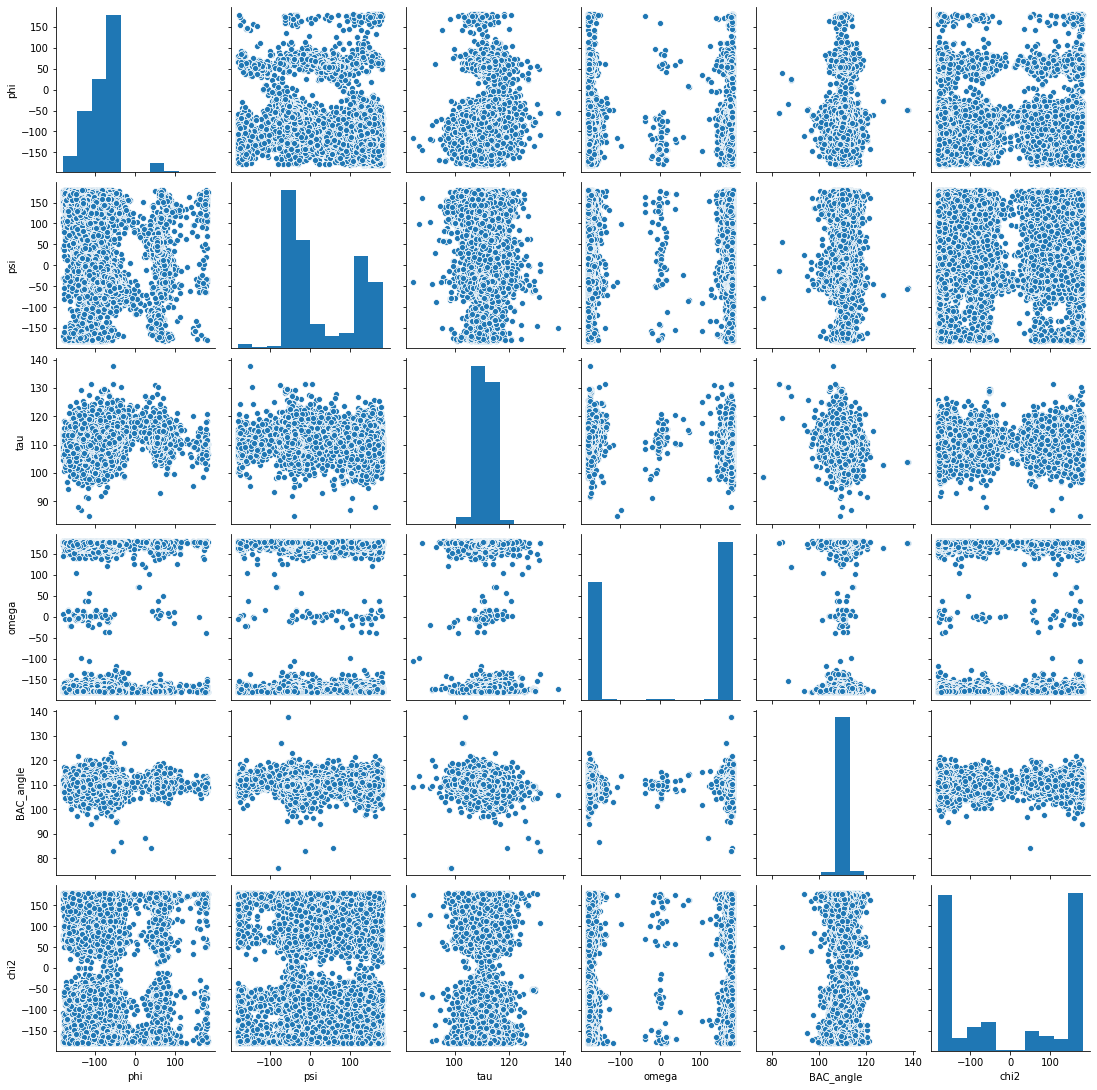

In [105]:
sns.pairplot(appended_data[appended_data["residue"] == "ARG"])

Scatterplots for secondary structure

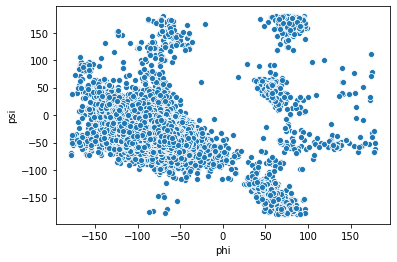

In [24]:
df = appended_data.dropna()
df.head()
sns.scatterplot(x="phi", y="psi", data=df[df["secondary"]=="H"])

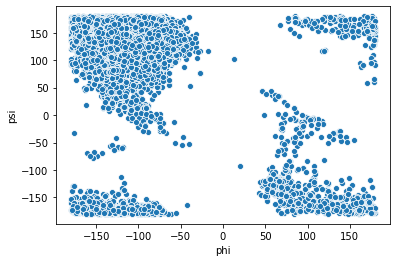

In [25]:
df = appended_data.dropna()
df.head()
sns.scatterplot(x="phi", y="psi", data=df[df["secondary"]=="B"])

In [45]:
smv = ["ASP", "GLU"]

Plotting psi angles for aa

29.864452008323116
84.61404004638351


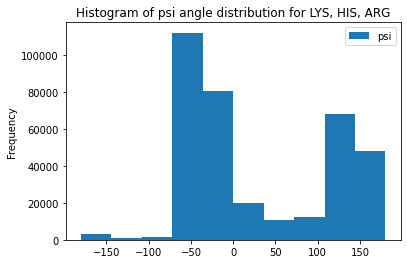

In [43]:
appended_data[appended_data["residue"].isin(smv)].plot(y = "psi", kind = "hist", title = "Histogram of psi angle distribution for LYS, HIS, ARG")
print(appended_data[appended_data["residue"].isin(smv)]["psi"].mean())
print(appended_data[appended_data["residue"].isin(smv)]["psi"].std())

mean: 27.6128923919352
standard deviation: 83.78892811438152
mean: 17.713492642744406
standard deviation: 80.92246475867944


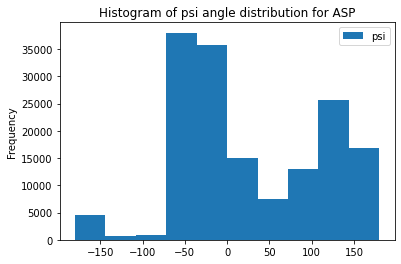

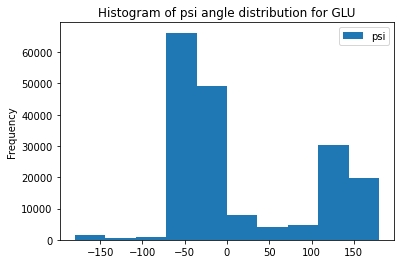

In [48]:
for aa in smv:
    print("mean: {:}".format(appended_data[appended_data["residue"] == aa]["psi"].mean()))
    print("standard deviation: {:}".format(appended_data[appended_data["residue"] == aa]["psi"].std()))
    appended_data[appended_data["residue"] == aa].plot(y = "psi", kind = "hist", title = "Histogram of psi angle distribution for "+aa)

Plotting tau values for aa

/home/ilya/anaconda3/envs/MLinChem/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


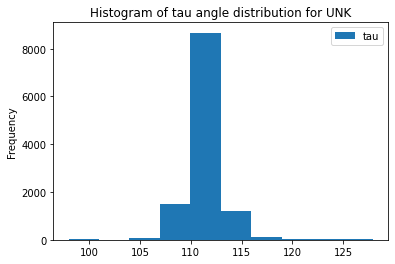

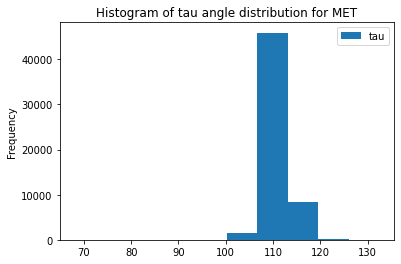

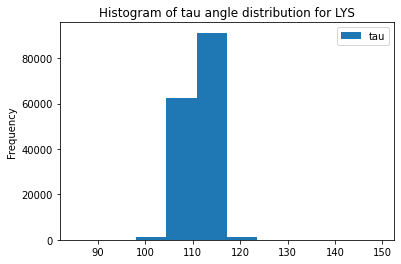

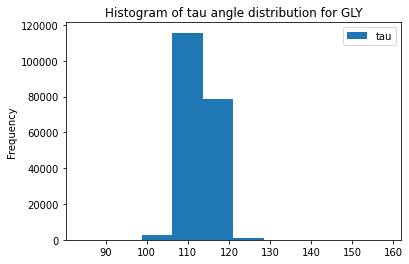

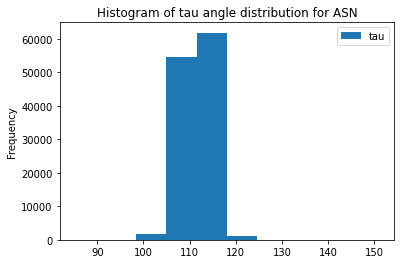

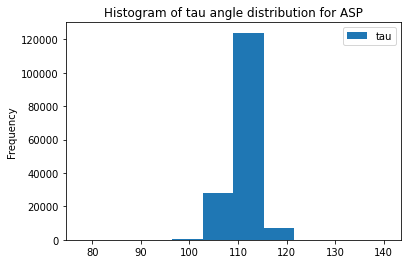

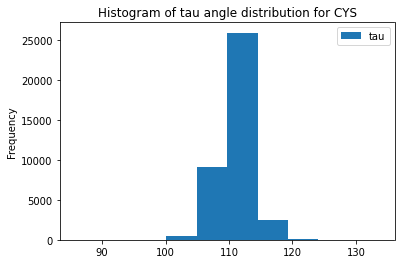

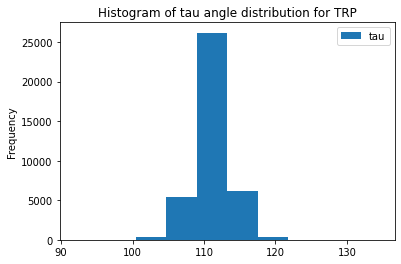

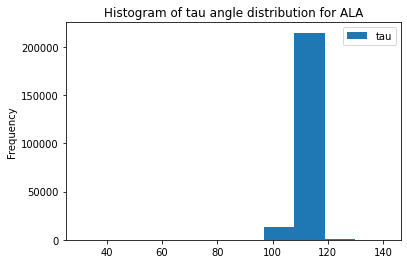

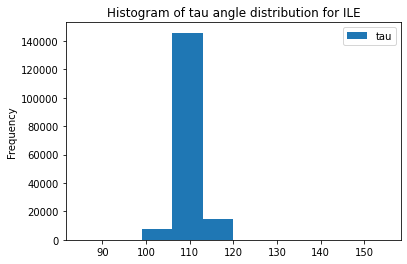

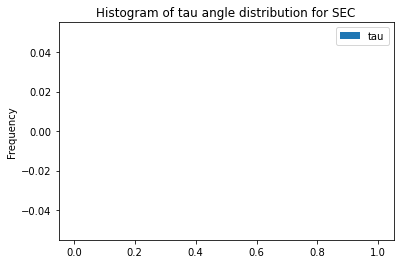

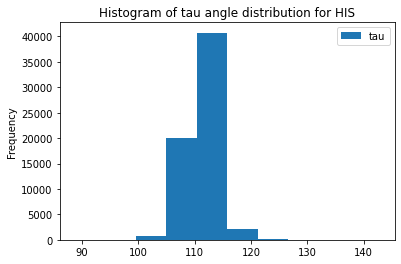

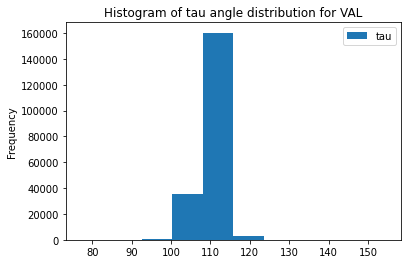

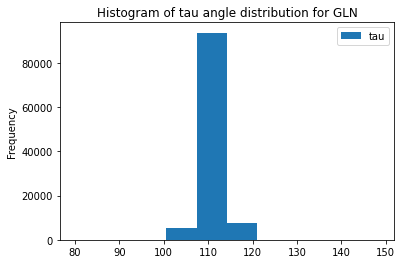

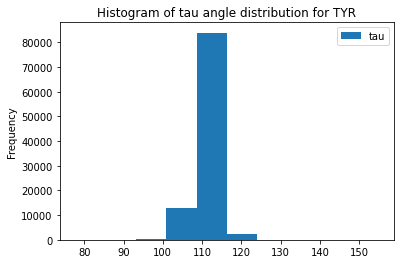

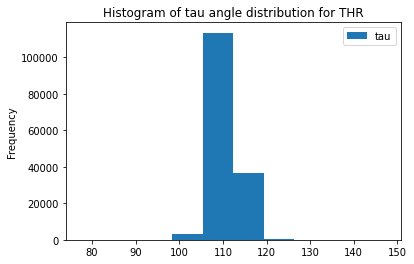

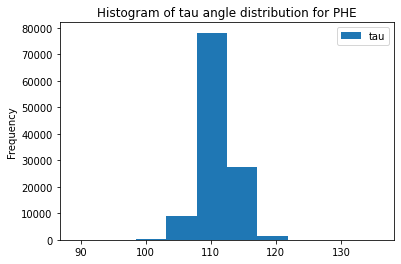

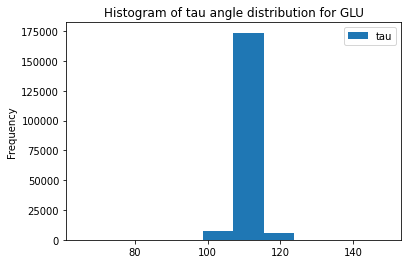

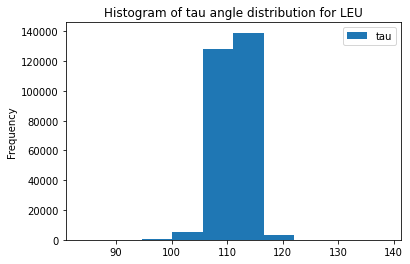

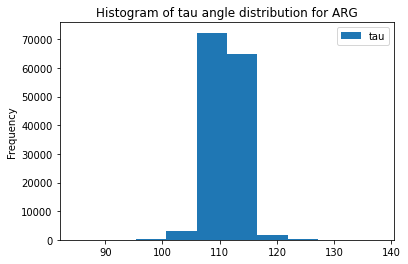

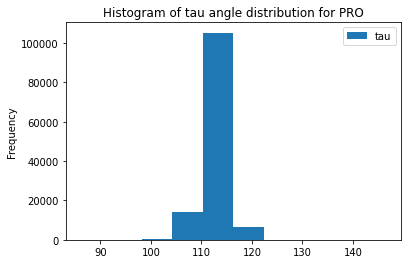

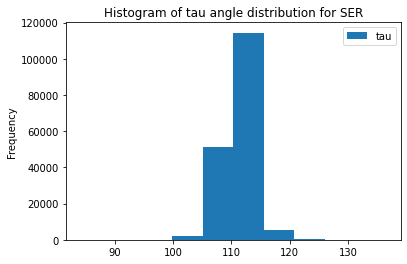

In [16]:
for aa in list(set(appended_data["residue"])):
    appended_data[appended_data["residue"] == aa].plot(y = "tau", kind = "hist", title = "Histogram of tau angle distribution for "+aa)

Plotting BAC values for aa

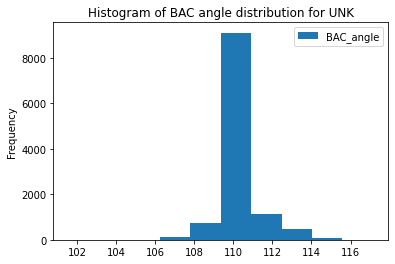

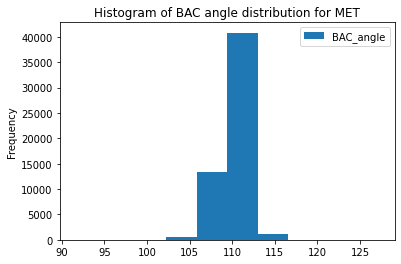

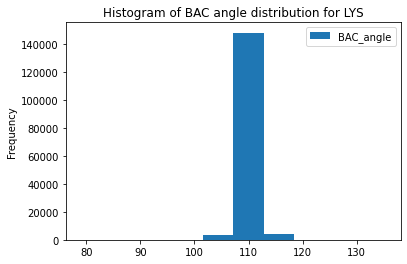

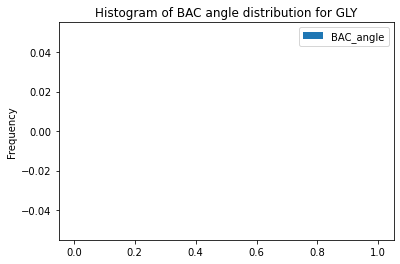

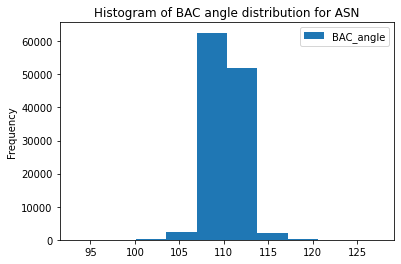

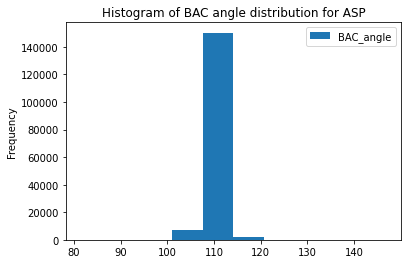

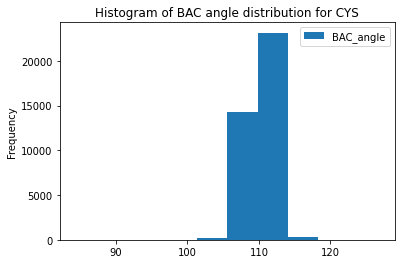

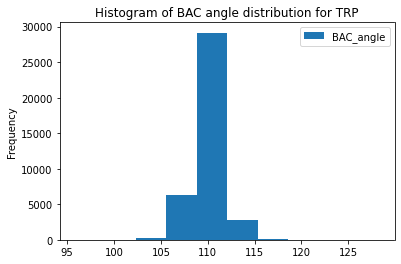

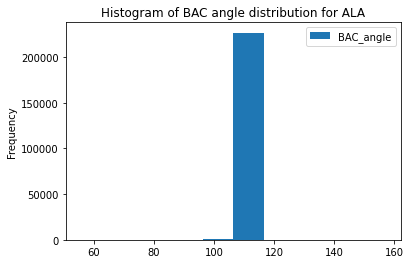

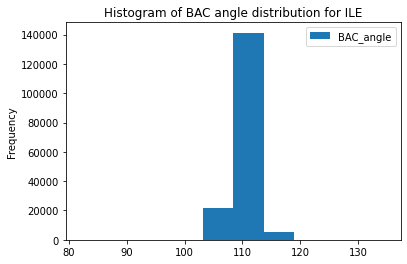

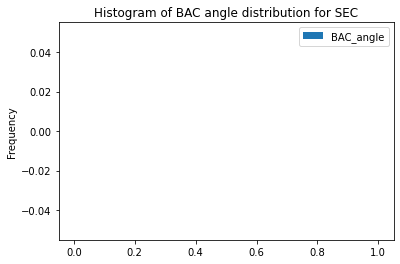

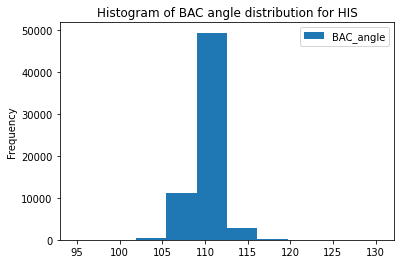

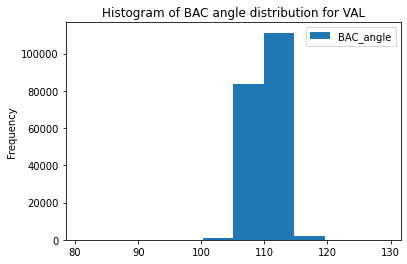

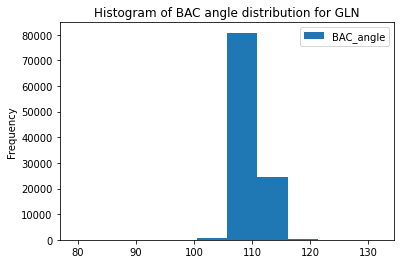

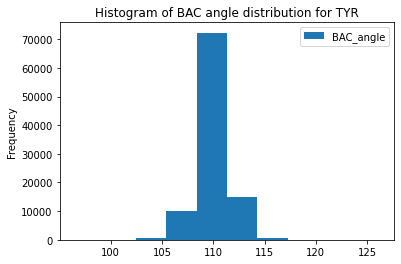

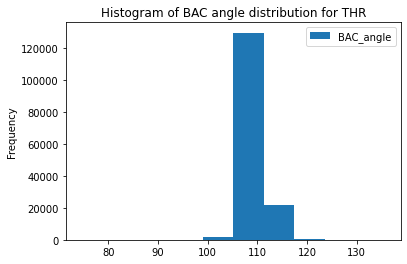

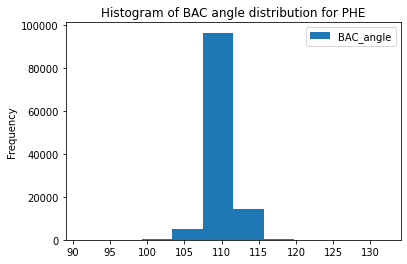

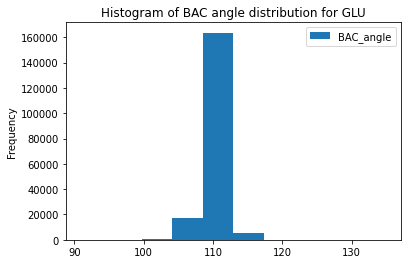

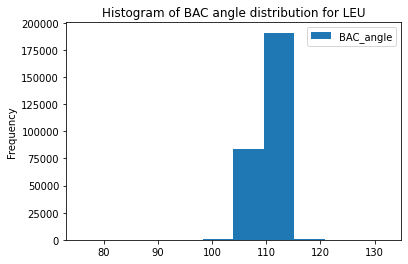

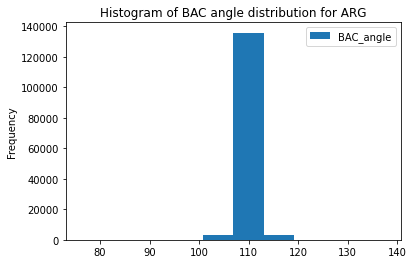

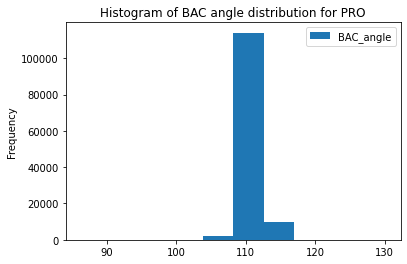

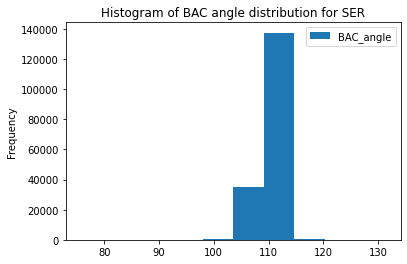

In [17]:
for aa in list(set(appended_data["residue"])):
    appended_data[appended_data["residue"] == aa].plot(y = "BAC_angle", kind = "hist", title = "Histogram of BAC angle distribution for "+aa)

Plotting chi2 values for aa

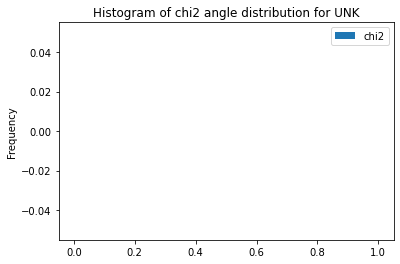

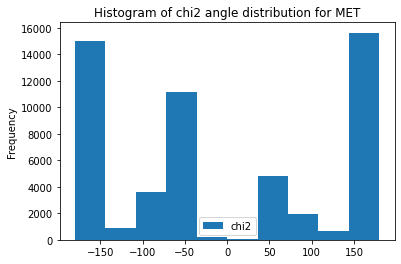

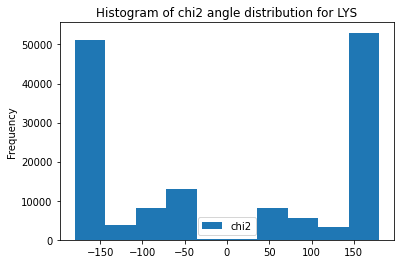

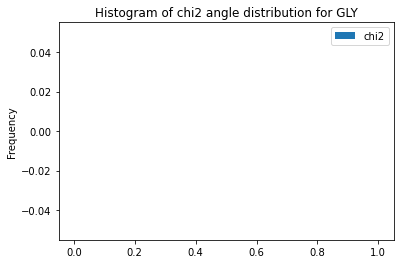

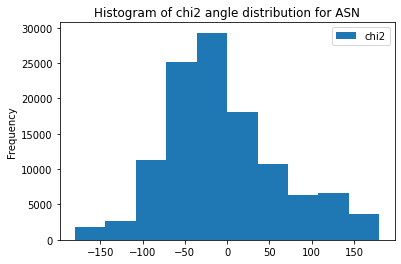

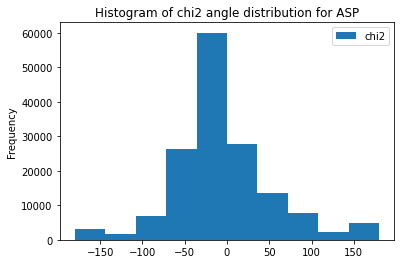

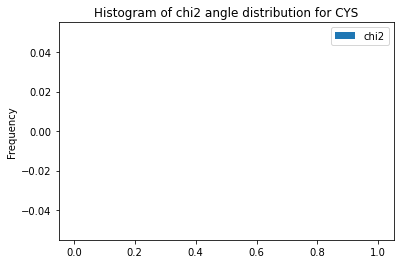

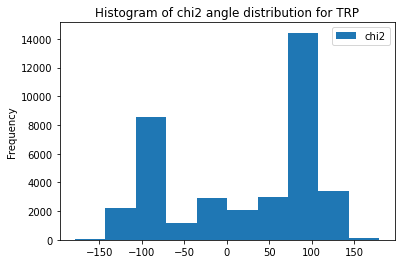

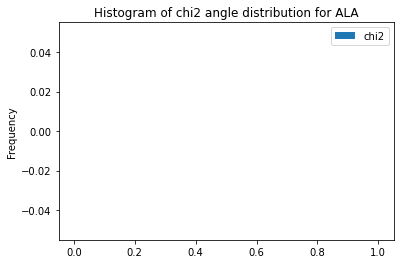

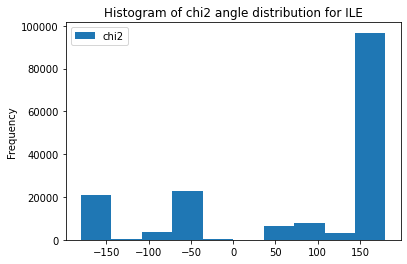

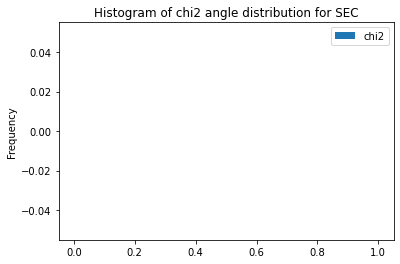

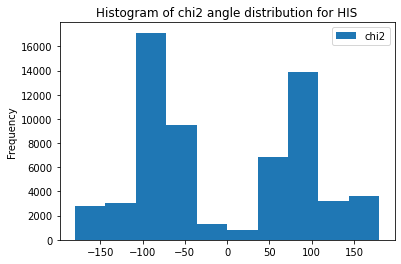

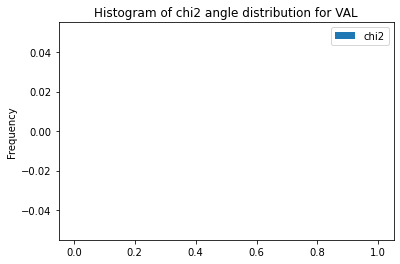

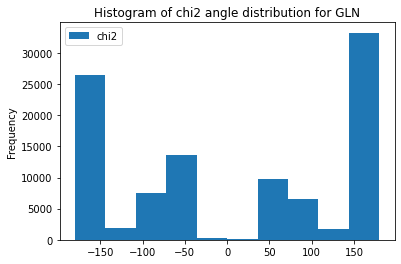

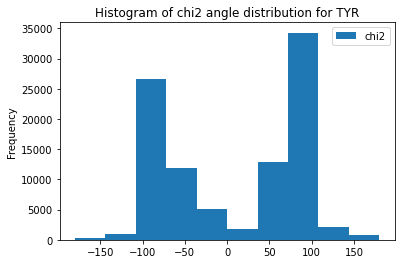

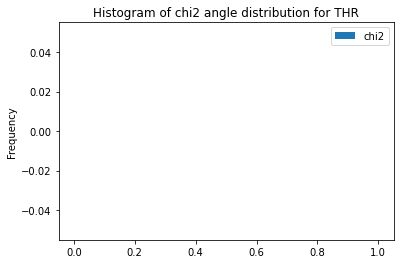

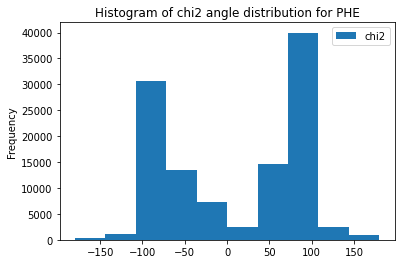

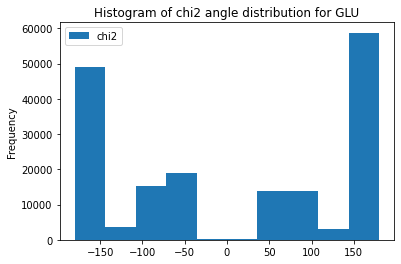

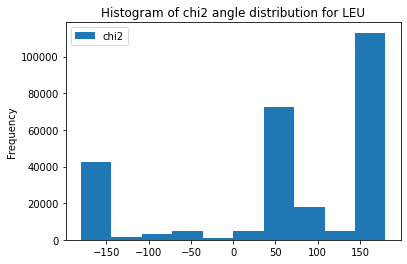

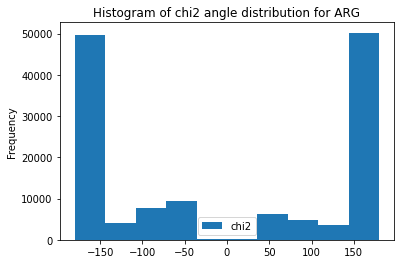

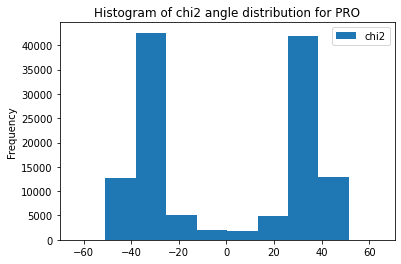

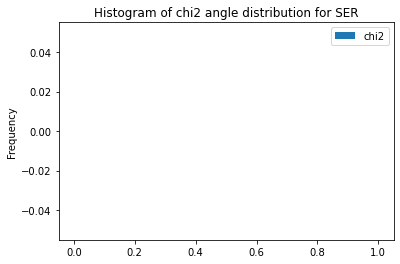

In [18]:
for aa in list(set(appended_data["residue"])):
    appended_data[appended_data["residue"] == aa].plot(y = "chi2", kind = "hist", title = "Histogram of chi2 angle distribution for "+aa)

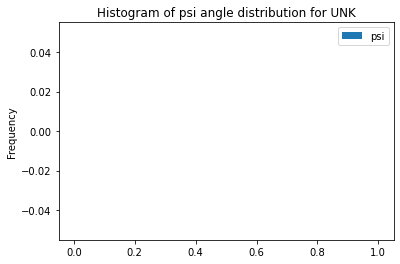

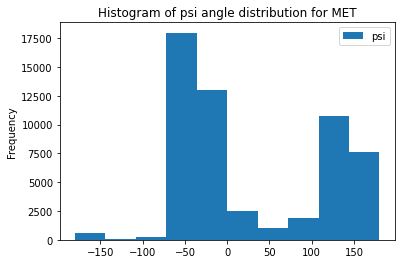

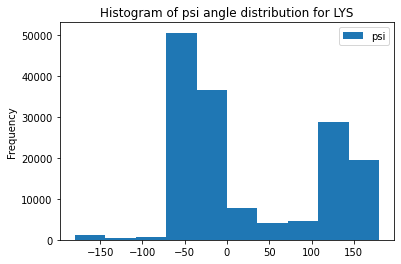

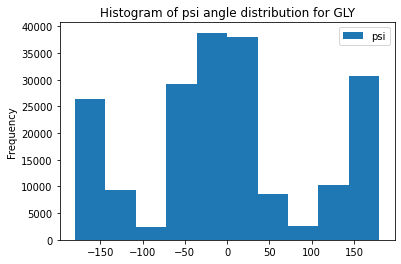

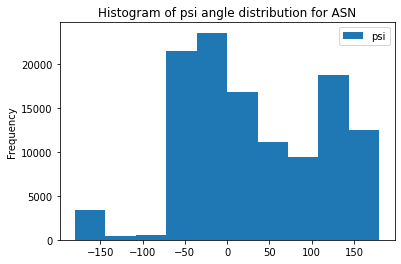

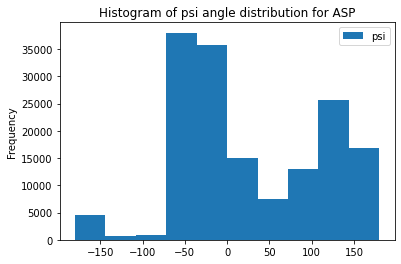

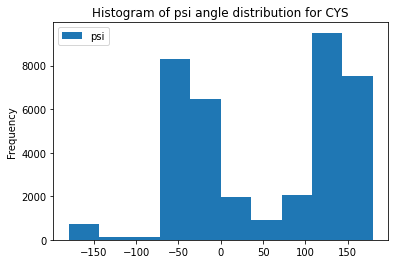

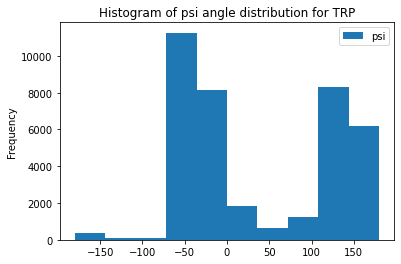

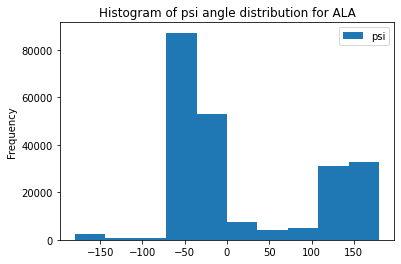

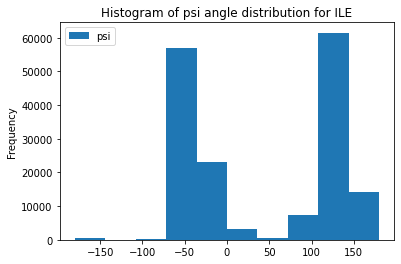

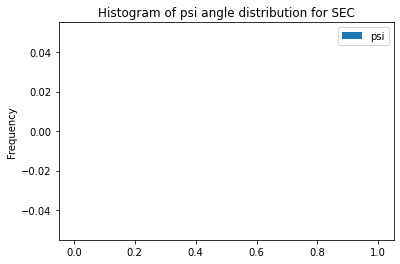

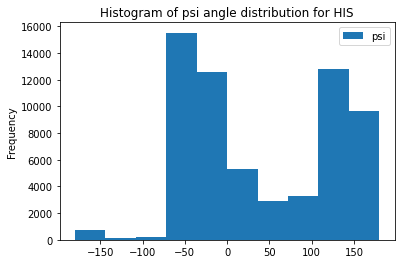

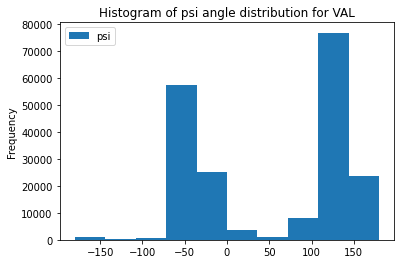

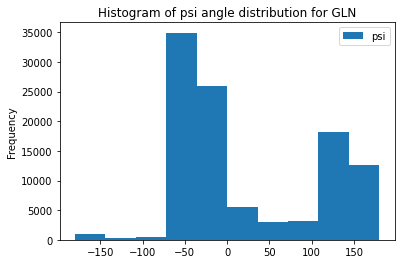

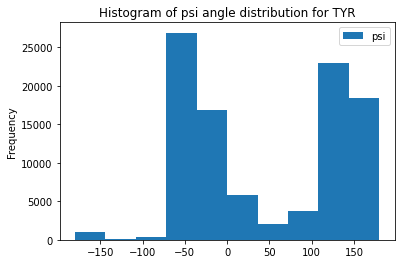

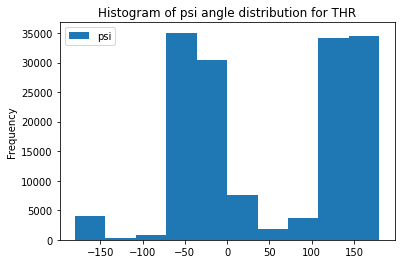

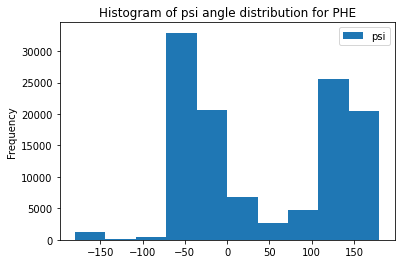

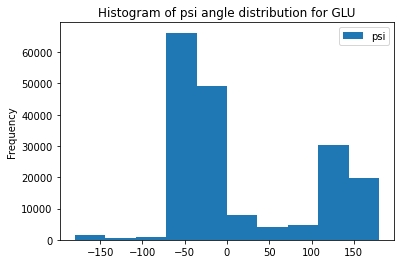

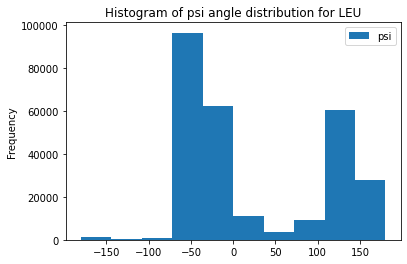

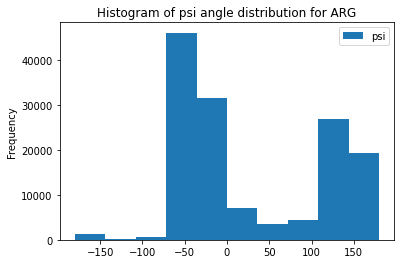

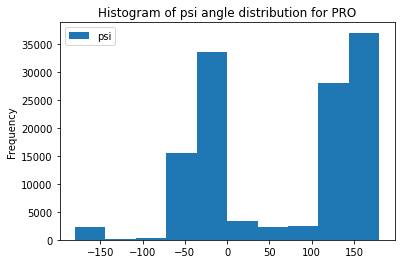

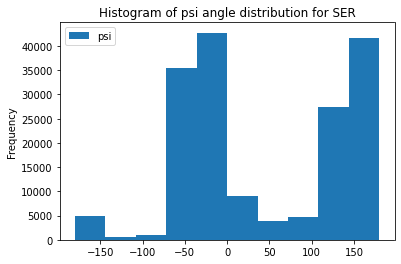

In [26]:
for aa in list(set(appended_data["residue"])):
    appended_data[appended_data["residue"] == aa].plot(y = "psi", kind = "hist", title = "Histogram of psi angle distribution for "+aa)

Bonds

1.4591641070613415
0.010743086355539982


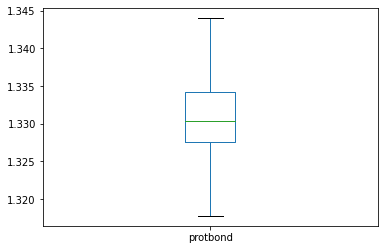

In [48]:
appended_data.plot(y = "protbond", kind ="box", showfliers=False)
print(appended_data["bondNCA"].mean())
print(appended_data["bondNCA"].std())

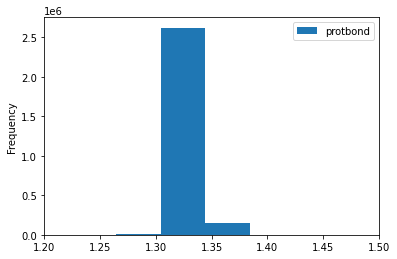

In [69]:
appended_data.plot(y = "protbond", kind ="hist", xlim=(1.2,1.5), bins = 800)

In [36]:
sc.stats.normaltest(list(appended_data["bondCAC"]))

NormaltestResult(statistic=nan, pvalue=nan)

In [88]:
aa_list = ['TYR',
 'THR',
 'PRO',
 'ARG',
 'LEU',
 'LYS',
 'GLN',
 'ASP',
 'ILE',
 'MET',
 'SER',
 'TRP',
 'GLY',
 'GLU',
 'CYS',
 'VAL',
 'PHE',
 'ALA',
 'ASN',
 'HIS',]

In [3]:
import statsmodels.api as sm
import pylab

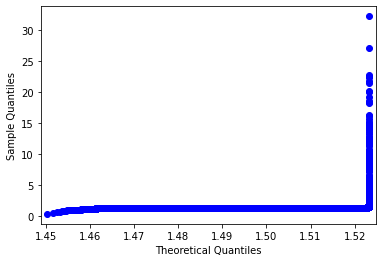

In [70]:
sm.qqplot(appended_data["protbond"], loc = 1.5, scale = 0.01, line='s')
pylab.show()

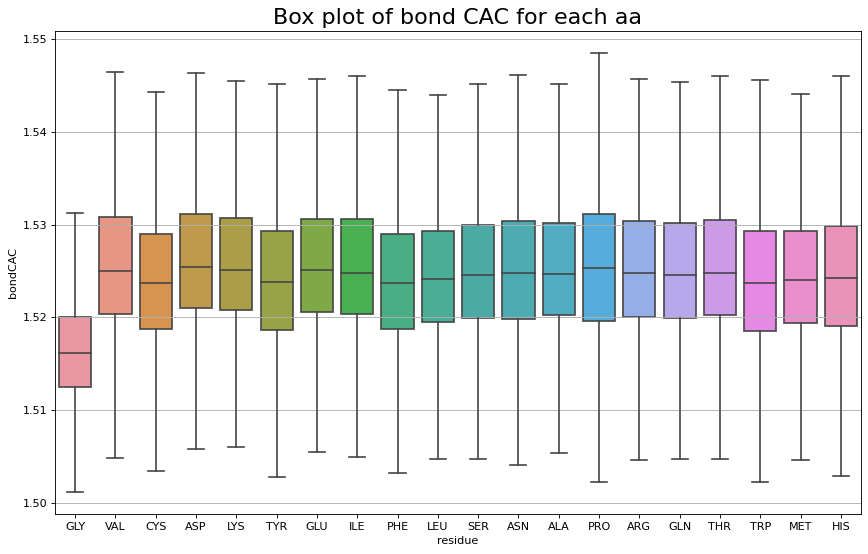

In [90]:
plt.figure(figsize=(13,8), dpi= 80)
flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none')
sns.boxplot(x='residue', y='bondCAC', data=appended_data[appended_data["residue"].isin(aa_list)], showfliers = False)
#sns.stripplot(x='residue', y='bondCAC', data=appended_data, color='black', size=3, jitter=1)
plt.title('Box plot of bond CAC for each aa', fontsize=20)
plt.grid(axis='y')
plt.show()

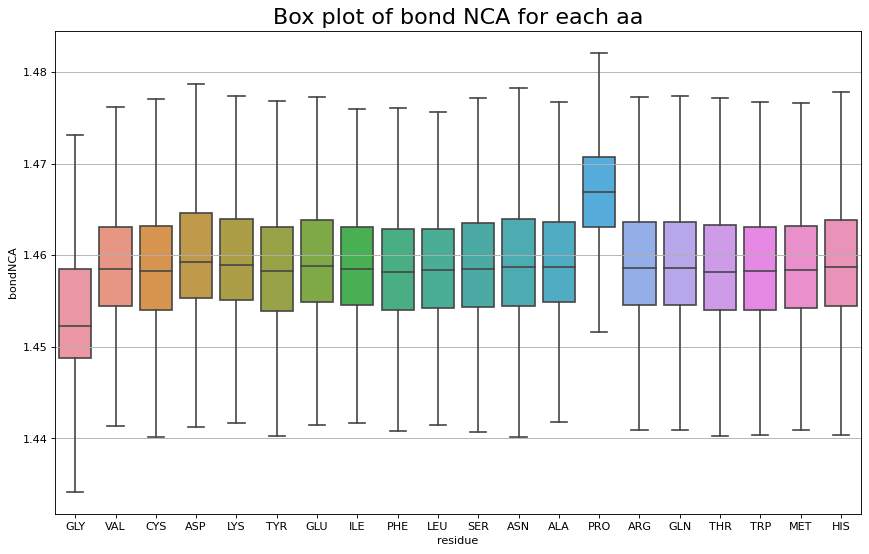

In [89]:
plt.figure(figsize=(13,8), dpi= 80)
flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none')
sns.boxplot(x='residue', y='bondNCA', data=appended_data[appended_data["residue"].isin(aa_list)], showfliers = False)
#sns.stripplot(x='residue', y='bondCAC', data=appended_data, color='black', size=3, jitter=1)
plt.title('Box plot of bond NCA for each aa', fontsize=20)
plt.grid(axis='y')
plt.show()

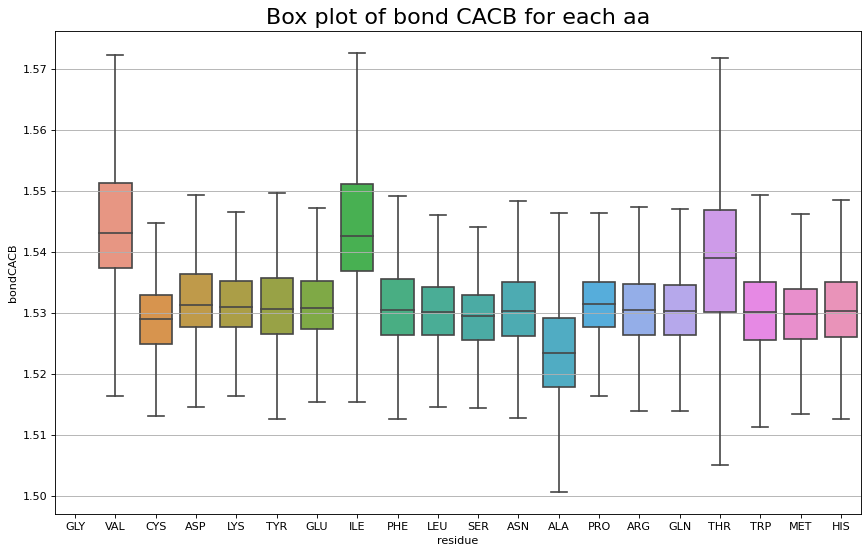

In [91]:
plt.figure(figsize=(13,8), dpi= 80)
flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none')
sns.boxplot(x='residue', y='bondCACB', data=appended_data[appended_data["residue"].isin(aa_list)], showfliers = False)
#sns.stripplot(x='residue', y='bondCAC', data=appended_data, color='black', size=3, jitter=1)
plt.title('Box plot of bond CACB for each aa', fontsize=20)
plt.grid(axis='y')
plt.show()

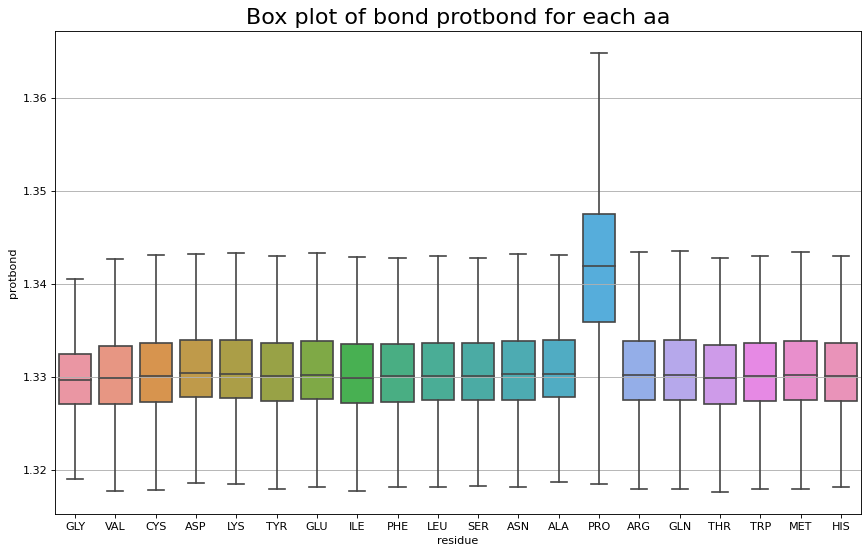

In [92]:
plt.figure(figsize=(13,8), dpi= 80)
flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none')
sns.boxplot(x='residue', y='protbond', data=appended_data[appended_data["residue"].isin(aa_list)], showfliers = False)
#sns.stripplot(x='residue', y='bondCAC', data=appended_data, color='black', size=3, jitter=1)
plt.title('Box plot of bond protbond for each aa', fontsize=20)
plt.grid(axis='y')
plt.show()